<a href="https://colab.research.google.com/github/Jeetaksh/Yoga-Pose-Identification/blob/main/BTP_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import random
import os
import gdown
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm


In [ ]:
def img_to_list(img):
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Flatten the array to a single list
    img_list = img_array.flatten().tolist()
    return img_list



In [ ]:
# Build a simple custom CNN
def build_custom_cnn(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes
    ])
    return model

In [ ]:
# Resize and process an image with the custom CNN
def resize_and_process_with_cnn(model, image_path, size=(32, 32)):
    try:
        # Read and resize the image
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Could not read image: {image_path}")
        resized_img = cv2.resize(img, size)
        resized_img = resized_img / 255.0  # Normalize to [0, 1]

        # Add batch dimension and process with the CNN
        input_data = np.expand_dims(resized_img, axis=0)
        features = model.predict(input_data)
        return features.squeeze()  # Remove batch dimension
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None


In [ ]:
# Process an image and save the CNN features
def process_image_with_cnn(model, file_path, output_folder_path, folder_path):
    try:
        # Process the image using the CNN
        cnn_features = resize_and_process_with_cnn(model, file_path)
        if cnn_features is not None:
            # Create a shortened relative path (avoid overly deep nesting)
            relative_path = os.path.relpath(file_path, folder_path)
            relative_path = os.path.sep.join(relative_path.split(os.path.sep)[-5:])  # Limit depth

            # Build the full output path
            new_file_path = os.path.join(output_folder_path, relative_path + ".npy")
            os.makedirs(os.path.dirname(new_file_path), exist_ok=True)

            # Save the CNN features
            np.save(new_file_path, cnn_features)
    except Exception as e:
        print(f"Error processing image {file_path}: {e}")

In [ ]:

# Process all images in a folder using the custom CNN
def process_images_in_folder_with_cnn(folder_path, model):
    try:
        image_files = []
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith(('.png', '.jpg', '.jpeg')):
                    image_files.append(os.path.join(root, file))

        # Create a new folder for CNN-processed features
        output_folder_path = os.path.join(folder_path, 'cnn_features')
        os.makedirs(output_folder_path, exist_ok=True)

        with ThreadPoolExecutor() as executor:
            list(
                tqdm(
                    executor.map(
                        lambda file_path: process_image_with_cnn(model, file_path, output_folder_path, folder_path),
                        image_files
                    ),
                    total=len(image_files),
                    desc="Processing images with CNN"
                )
            )
    except Exception as e:
        print(f"Error processing folder {folder_path}: {e}")


In [ ]:
# Function to download and extract the file
def download_and_extract_file(file_id, output_path):
    # Download file
    download_url = f"https://drive.google.com/uc?id={file_id}"
    downloaded_file = gdown.download(download_url, output_path, quiet=False)

    if downloaded_file is None:
        raise Exception("Error: File could not be downloaded.")

    print(f"File downloaded successfully: {downloaded_file}")

    # Extract if it's a zip file
    if downloaded_file.endswith('.zip'):
        extract_path = os.path.splitext(downloaded_file)[0]
        with zipfile.ZipFile(downloaded_file, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"File extracted to: {extract_path}")
        return extract_path
    return downloaded_file




# Main execution
if __name__ == "__main__":
    # File ID and output path
    file_id = '1WIcmjygbedbNex8LJNGea6_Juw-HR1ho'
    output_file = 'archive.zip'

    # Download and extract file
    archive_folder_path = download_and_extract_file(file_id, output_file)

    # Build the custom CNN
    input_shape = (32, 32, 3)
    custom_cnn_model = build_custom_cnn(input_shape)

    # Training the model
    train_data = np.random.rand(100, 32, 32, 3)  # 100 random images
    train_labels = np.random.randint(0, 10, 100)  # 10 random classes
    val_data = np.random.rand(20, 32, 32, 3)  # 20 random validation images
    val_labels = np.random.randint(0, 10, 20)

    custom_cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    custom_cnn_model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=5, batch_size=32)

    # Process the images using the CNN
    process_images_in_folder_with_cnn(archive_folder_path, custom_cnn_model)


Downloading...
From (original): https://drive.google.com/uc?id=1WIcmjygbedbNex8LJNGea6_Juw-HR1ho
From (redirected): https://drive.google.com/uc?id=1WIcmjygbedbNex8LJNGea6_Juw-HR1ho&confirm=t&uuid=b53a508a-398f-4d30-9a8c-02f968f2b502
To: /content/archive.zip
100%|██████████| 2.54G/2.54G [00:36<00:00, 69.1MB/s]


File downloaded successfully: archive.zip
File extracted to: archive
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.0768 - loss: 2.3580 - val_accuracy: 0.0000e+00 - val_loss: 2.4208
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1199 - loss: 2.2762 - val_accuracy: 0.1000 - val_loss: 2.3440
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1352 - loss: 2.2410 - val_accuracy: 0.1000 - val_loss: 2.3446
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1643 - loss: 2.2299 - val_accuracy: 0.1500 - val_loss: 2.3659
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1260 - loss: 2.2347 - val_accuracy: 0.1500 - val_loss: 2.4185


Processing images with CNN:   0%|          | 0/16767 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:   0%|          | 1/16767 [00:00<1:13:17,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:   0%|          | 7/16767 [00:00<22:51, 12.22it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:   0%|          | 11/16767 [00:00<16:53, 16.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing images with CNN:   0%|          | 13/16767 [00:00<17:02, 16.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:   0%|          | 15/16767 [00:01<16:28, 16.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:   0%|          | 17/16767 [00:01<21:06, 13.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing images with CNN:   0%|          | 20/16767 [00:01<18:05, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing images with CNN:   0%|          | 22/16767 [00:01<21:46, 12.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing images with CNN:   0%|          | 27/16767 [00:01<14:29, 19.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:   0%|          | 30/16767 [00:02<32:36,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:   0%|          | 35/16767 [00:02<21:46, 12.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:   0%|          | 38/16767 [00:02<18:31, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:   0%|          | 41/16767 [00:03<24:13, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:   0%|          | 45/16767 [00:03<27:07, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing images with CNN:   0%|          | 47/16767 [00:03<27:48, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:   0%|          | 51/16767 [00:04<23:37, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:   0%|          | 53/16767 [00:04<30:32,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing images with CNN:   0%|          | 58/16767 [00:04<21:37, 12.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:   0%|          | 61/16767 [00:04<22:09, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:   0%|          | 63/16767 [00:05<24:44, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:   0%|          | 66/16767 [00:05<25:00, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:   0%|          | 68/16767 [00:05<24:51, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:   0%|          | 70/16767 [00:05<25:02, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:   0%|          | 73/16767 [00:06<23:36, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:   0%|          | 75/16767 [00:06<24:07, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing images with CNN:   0%|          | 79/16767 [00:06<21:04, 13.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:   0%|          | 81/16767 [00:06<20:31, 13.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing images with CNN:   1%|          | 84/16767 [00:06<17:37, 15.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:   1%|          | 87/16767 [00:06<17:21, 16.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing images with CNN:   1%|          | 90/16767 [00:07<18:00, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing images with CNN:   1%|          | 93/16767 [00:07<17:06, 16.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing images with CNN:   1%|          | 95/16767 [00:07<17:39, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing images with CNN:   1%|          | 99/16767 [00:07<16:00, 17.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing images with CNN:   1%|          | 101/16767 [00:07<15:49, 17.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing images with CNN:   1%|          | 103/16767 [00:07<15:26, 17.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing images with CNN:   1%|          | 105/16767 [00:07<15:50, 17.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

Processing images with CNN:   1%|          | 107/16767 [00:08<20:50, 13.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing images with CNN:   1%|          | 111/16767 [00:08<16:04, 17.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing images with CNN:   1%|          | 113/16767 [00:08<17:41, 15.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing images with CNN:   1%|          | 115/16767 [00:08<17:38, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing images with CNN:   1%|          | 118/16767 [00:08<16:09, 17.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing images with CNN:   1%|          | 121/16767 [00:09<18:15, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:   1%|          | 125/16767 [00:09<14:56, 18.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Processing images with CNN:   1%|          | 127/16767 [00:09<15:29, 17.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:   1%|          | 129/16767 [00:09<16:32, 16.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing images with CNN:   1%|          | 132/16767 [00:09<14:27, 19.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing images with CNN:   1%|          | 135/16767 [00:09<17:24, 15.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing images with CNN:   1%|          | 139/16767 [00:09<14:00, 19.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Processing images with CNN:   1%|          | 142/16767 [00:10<17:38, 15.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing images with CNN:   1%|          | 144/16767 [00:10<19:23, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:   1%|          | 148/16767 [00:10<15:44, 17.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing images with CNN:   1%|          | 150/16767 [00:10<15:21, 18.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing images with CNN:   1%|          | 152/16767 [00:10<15:53, 17.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing images with CNN:   1%|          | 155/16767 [00:10<16:11, 17.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:   1%|          | 158/16767 [00:11<15:54, 17.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:   1%|          | 161/16767 [00:11<18:23, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing images with CNN:   1%|          | 165/16767 [00:11<15:25, 17.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing images with CNN:   1%|          | 167/16767 [00:11<16:57, 16.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:   1%|          | 170/16767 [00:11<15:03, 18.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:   1%|          | 172/16767 [00:12<20:32, 13.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing images with CNN:   1%|          | 176/16767 [00:12<17:46, 15.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing images with CNN:   1%|          | 178/16767 [00:12<18:08, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing images with CNN:   1%|          | 182/16767 [00:12<15:12, 18.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:   1%|          | 184/16767 [00:12<16:03, 17.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing images with CNN:   1%|          | 186/16767 [00:12<16:34, 16.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing images with CNN:   1%|          | 189/16767 [00:13<16:18, 16.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing images with CNN:   1%|          | 191/16767 [00:13<16:14, 17.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Error processing image archive/valid/Seated_Forward_Bend_pose_or_Paschimottanasana_/Seated_Forward_Bend_pose_or_Paschimottanasana__image_162.jpg: Could not read image: archive/valid/Seated_Forward_Bend_pose_or_Paschimottanasana_/Seated_Forward_Bend_pose_or_Paschimottanasana__image_162.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Processing images with CNN:   1%|          | 193/16767 [00:13<16:35, 16.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing images with CNN:   1%|          | 195/16767 [00:13<18:29, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing images with CNN:   1%|          | 197/16767 [00:13<17:34, 15.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing images with CNN:   1%|          | 199/16767 [00:13<18:24, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing images with CNN:   1%|          | 202/16767 [00:13<16:15, 16.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:   1%|          | 204/16767 [00:13<16:29, 16.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing images with CNN:   1%|          | 207/16767 [00:14<25:54, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

Processing images with CNN:   1%|▏         | 213/16767 [00:14<19:00, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing images with CNN:   1%|▏         | 219/16767 [00:14<14:19, 19.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing images with CNN:   1%|▏         | 222/16767 [00:15<16:46, 16.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing images with CNN:   1%|▏         | 226/16767 [00:15<15:06, 18.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing images with CNN:   1%|▏         | 229/16767 [00:15<17:49, 15.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing images with CNN:   1%|▏         | 233/16767 [00:15<15:41, 17.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Processing images with CNN:   1%|▏         | 236/16767 [00:15<16:01, 17.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:   1%|▏         | 239/16767 [00:16<16:49, 16.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:   1%|▏         | 241/16767 [00:16<20:08, 13.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:   1%|▏         | 243/16767 [00:16<21:42, 12.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:   1%|▏         | 246/16767 [00:16<23:32, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:   1%|▏         | 248/16767 [00:17<23:49, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:   1%|▏         | 251/16767 [00:17<21:42, 12.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing images with CNN:   2%|▏         | 253/16767 [00:18<50:35,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing images with CNN:   2%|▏         | 262/16767 [00:18<23:01, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:   2%|▏         | 265/16767 [00:18<24:27, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:   2%|▏         | 267/16767 [00:18<22:42, 12.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:   2%|▏         | 269/16767 [00:19<28:45,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:   2%|▏         | 271/16767 [00:19<29:41,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing images with CNN:   2%|▏         | 275/16767 [00:19<24:21, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing images with CNN:   2%|▏         | 277/16767 [00:19<23:32, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:   2%|▏         | 279/16767 [00:19<21:32, 12.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing images with CNN:   2%|▏         | 281/16767 [00:20<20:10, 13.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing images with CNN:   2%|▏         | 283/16767 [00:20<19:21, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing images with CNN:   2%|▏         | 286/16767 [00:20<18:55, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

Processing images with CNN:   2%|▏         | 288/16767 [00:20<21:28, 12.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing images with CNN:   2%|▏         | 293/16767 [00:20<14:59, 18.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing images with CNN:   2%|▏         | 296/16767 [00:21<16:38, 16.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:   2%|▏         | 299/16767 [00:21<15:42, 17.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing images with CNN:   2%|▏         | 301/16767 [00:21<19:36, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:   2%|▏         | 303/16767 [00:21<20:00, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing images with CNN:   2%|▏         | 307/16767 [00:21<16:32, 16.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing images with CNN:   2%|▏         | 310/16767 [00:21<16:45, 16.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing images with CNN:   2%|▏         | 313/16767 [00:22<14:46, 18.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing images with CNN:   2%|▏         | 316/16767 [00:22<15:02, 18.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Processing images with CNN:   2%|▏         | 318/16767 [00:22<15:01, 18.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing images with CNN:   2%|▏         | 320/16767 [00:22<16:49, 16.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing images with CNN:   2%|▏         | 323/16767 [00:22<17:11, 15.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:   2%|▏         | 326/16767 [00:22<15:49, 17.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:   2%|▏         | 328/16767 [00:22<16:40, 16.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing images with CNN:   2%|▏         | 330/16767 [00:23<16:48, 16.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

Processing images with CNN:   2%|▏         | 332/16767 [00:23<19:19, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:   2%|▏         | 335/16767 [00:23<15:54, 17.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing images with CNN:   2%|▏         | 338/16767 [00:23<18:03, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing images with CNN:   2%|▏         | 341/16767 [00:23<15:40, 17.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:   2%|▏         | 344/16767 [00:24<19:06, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing images with CNN:   2%|▏         | 349/16767 [00:24<14:38, 18.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing images with CNN:   2%|▏         | 352/16767 [00:24<16:18, 16.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing images with CNN:   2%|▏         | 354/16767 [00:24<15:52, 17.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:   2%|▏         | 356/16767 [00:24<20:32, 13.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing images with CNN:   2%|▏         | 362/16767 [00:25<15:34, 17.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:   2%|▏         | 364/16767 [00:25<16:25, 16.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:   2%|▏         | 366/16767 [00:25<16:49, 16.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:   2%|▏         | 368/16767 [00:25<19:00, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Processing images with CNN:   2%|▏         | 371/16767 [00:25<16:01, 17.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing images with CNN:   2%|▏         | 374/16767 [00:25<16:30, 16.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:   2%|▏         | 377/16767 [00:26<17:44, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:   2%|▏         | 380/16767 [00:26<15:16, 17.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:   2%|▏         | 382/16767 [00:26<17:41, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing images with CNN:   2%|▏         | 384/16767 [00:26<17:01, 16.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing images with CNN:   2%|▏         | 387/16767 [00:26<17:12, 15.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing images with CNN:   2%|▏         | 390/16767 [00:26<16:10, 16.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing images with CNN:   2%|▏         | 393/16767 [00:26<15:03, 18.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing images with CNN:   2%|▏         | 395/16767 [00:27<14:46, 18.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing images with CNN:   2%|▏         | 397/16767 [00:27<17:44, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing images with CNN:   2%|▏         | 399/16767 [00:27<17:20, 15.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:   2%|▏         | 401/16767 [00:27<17:33, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing images with CNN:   2%|▏         | 403/16767 [00:27<17:45, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing images with CNN:   2%|▏         | 405/16767 [00:27<18:01, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:   2%|▏         | 407/16767 [00:27<17:48, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Error processing image archive/valid/Cow_Face_Pose_or_Gomukhasana_/Cow_Face_Pose_or_Gomukhasana__image_180.jpg: Could not read image: archive/valid/Cow_Face_Pose_or_Gomukhasana_/Cow_Face_Pose_or_Gomukhasana__image_180.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:   2%|▏         | 411/16767 [00:28<16:04, 16.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:   2%|▏         | 413/16767 [00:28<16:10, 16.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing images with CNN:   2%|▏         | 415/16767 [00:28<16:32, 16.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing images with CNN:   2%|▏         | 418/16767 [00:28<13:57, 19.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

Processing images with CNN:   3%|▎         | 421/16767 [00:28<15:15, 17.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:   3%|▎         | 423/16767 [00:28<16:36, 16.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing images with CNN:   3%|▎         | 426/16767 [00:28<14:11, 19.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing images with CNN:   3%|▎         | 429/16767 [00:29<14:26, 18.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing images with CNN:   3%|▎         | 431/16767 [00:29<17:53, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing images with CNN:   3%|▎         | 434/16767 [00:29<18:06, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing images with CNN:   3%|▎         | 437/16767 [00:29<15:12, 17.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:   3%|▎         | 440/16767 [00:29<17:44, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing images with CNN:   3%|▎         | 442/16767 [00:29<16:55, 16.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:   3%|▎         | 444/16767 [00:30<21:16, 12.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:   3%|▎         | 446/16767 [00:30<23:46, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:   3%|▎         | 448/16767 [00:30<21:53, 12.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:   3%|▎         | 450/16767 [00:30<27:56,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:   3%|▎         | 453/16767 [00:31<25:36, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:   3%|▎         | 456/16767 [00:31<27:19,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Error processing image archive/valid/Supta_Virasana_Vajrasana/Supta_Virasana_Vajrasana_image_249.jpg: Could not read image: archive/valid/Supta_Virasana_Vajrasana/Supta_Virasana_Vajrasana_image_249.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:   3%|▎         | 458/16767 [00:32<47:34,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:   3%|▎         | 468/16767 [00:32<25:18, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:   3%|▎         | 472/16767 [00:32<22:50, 11.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step

Processing images with CNN:   3%|▎         | 474/16767 [00:33<27:26,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:   3%|▎         | 479/16767 [00:33<22:14, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing images with CNN:   3%|▎         | 481/16767 [00:33<28:11,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:   3%|▎         | 486/16767 [00:34<22:30, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing images with CNN:   3%|▎         | 490/16767 [00:34<19:43, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:   3%|▎         | 492/16767 [00:34<29:13,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:   3%|▎         | 499/16767 [00:35<17:40, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing images with CNN:   3%|▎         | 502/16767 [00:35<19:59, 13.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing images with CNN:   3%|▎         | 505/16767 [00:35<21:49, 12.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:   3%|▎         | 509/16767 [00:35<20:01, 13.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:   3%|▎         | 511/16767 [00:36<20:43, 13.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Processing images with CNN:   3%|▎         | 516/16767 [00:36<16:05, 16.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:   3%|▎         | 518/16767 [00:36<19:39, 13.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:   3%|▎         | 523/16767 [00:36<17:08, 15.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:   3%|▎         | 525/16767 [00:36<16:39, 16.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:   3%|▎         | 528/16767 [00:36<14:41, 18.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing images with CNN:   3%|▎         | 531/16767 [00:37<16:46, 16.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:   3%|▎         | 533/16767 [00:37<19:02, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing images with CNN:   3%|▎         | 536/16767 [00:37<17:09, 15.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing images with CNN:   3%|▎         | 538/16767 [00:37<17:09, 15.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:   3%|▎         | 540/16767 [00:37<17:34, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing images with CNN:   3%|▎         | 542/16767 [00:37<17:53, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing images with CNN:   3%|▎         | 545/16767 [00:38<19:40, 13.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing images with CNN:   3%|▎         | 548/16767 [00:38<16:15, 16.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing images with CNN:   3%|▎         | 550/16767 [00:38<16:03, 16.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing images with CNN:   3%|▎         | 552/16767 [00:38<18:51, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

Processing images with CNN:   3%|▎         | 555/16767 [00:38<15:58, 16.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing images with CNN:   3%|▎         | 557/16767 [00:39<21:20, 12.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:   3%|▎         | 560/16767 [00:39<19:19, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing images with CNN:   3%|▎         | 563/16767 [00:39<18:39, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing images with CNN:   3%|▎         | 566/16767 [00:39<19:09, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing images with CNN:   3%|▎         | 569/16767 [00:39<17:14, 15.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing images with CNN:   3%|▎         | 573/16767 [00:39<14:38, 18.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing images with CNN:   3%|▎         | 575/16767 [00:40<15:33, 17.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing images with CNN:   3%|▎         | 577/16767 [00:40<16:44, 16.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing images with CNN:   3%|▎         | 579/16767 [00:40<17:12, 15.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing images with CNN:   3%|▎         | 581/16767 [00:40<16:51, 16.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing images with CNN:   3%|▎         | 583/16767 [00:40<17:06, 15.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Processing images with CNN:   3%|▎         | 585/16767 [00:40<19:34, 13.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing images with CNN:   4%|▎         | 587/16767 [00:40<18:11, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:   4%|▎         | 590/16767 [00:41<16:59, 15.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:   4%|▎         | 592/16767 [00:41<19:35, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:   4%|▎         | 596/16767 [00:41<17:53, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:   4%|▎         | 598/16767 [00:41<20:42, 13.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:   4%|▎         | 603/16767 [00:42<22:41, 11.87it/s]

Error processing image archive/valid/Virasana_or_Vajrasana/Virasana_or_Vajrasana_image_276.jpg: Could not read image: archive/valid/Virasana_or_Vajrasana/Virasana_or_Vajrasana_image_276.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing images with CNN:   4%|▎         | 608/16767 [00:42<22:08, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing images with CNN:   4%|▎         | 615/16767 [00:42<17:13, 15.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing images with CNN:   4%|▎         | 619/16767 [00:42<14:29, 18.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:   4%|▎         | 622/16767 [00:43<17:58, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:   4%|▎         | 626/16767 [00:43<16:55, 15.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:   4%|▎         | 628/16767 [00:43<17:46, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing images with CNN:   4%|▍         | 632/16767 [00:43<16:23, 16.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:   4%|▍         | 634/16767 [00:44<24:20, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:   4%|▍         | 639/16767 [00:44<25:04, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:   4%|▍         | 641/16767 [00:45<25:18, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:   4%|▍         | 643/16767 [00:45<23:34, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Processing images with CNN:   4%|▍         | 645/16767 [00:45<41:13,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:   4%|▍         | 647/16767 [00:46<36:38,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:   4%|▍         | 650/16767 [00:46<31:36,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:   4%|▍         | 652/16767 [00:46<33:20,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:   4%|▍         | 654/16767 [00:46<28:36,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:   4%|▍         | 656/16767 [00:47<42:13,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:   4%|▍         | 662/16767 [00:47<25:47, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:   4%|▍         | 664/16767 [00:47<24:03, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:   4%|▍         | 667/16767 [00:47<19:55, 13.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:   4%|▍         | 669/16767 [00:48<24:52, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing images with CNN:   4%|▍         | 673/16767 [00:48<19:15, 13.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing images with CNN:   4%|▍         | 675/16767 [00:48<20:15, 13.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Processing images with CNN:   4%|▍         | 678/16767 [00:48<19:22, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing images with CNN:   4%|▍         | 681/16767 [00:48<20:47, 12.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing images with CNN:   4%|▍         | 684/16767 [00:49<18:03, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing images with CNN:   4%|▍         | 687/16767 [00:49<18:03, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing images with CNN:   4%|▍         | 690/16767 [00:49<17:10, 15.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing images with CNN:   4%|▍         | 692/16767 [00:49<16:25, 16.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing images with CNN:   4%|▍         | 694/16767 [00:49<16:53, 15.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:   4%|▍         | 697/16767 [00:49<15:48, 16.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing images with CNN:   4%|▍         | 699/16767 [00:50<22:35, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing images with CNN:   4%|▍         | 703/16767 [00:50<18:03, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing images with CNN:   4%|▍         | 705/16767 [00:50<19:49, 13.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

Processing images with CNN:   4%|▍         | 707/16767 [00:50<20:02, 13.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing images with CNN:   4%|▍         | 711/16767 [00:50<18:14, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing images with CNN:   4%|▍         | 713/16767 [00:51<17:12, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:   4%|▍         | 716/16767 [00:51<15:09, 17.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:   4%|▍         | 718/16767 [00:51<24:33, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:   4%|▍         | 722/16767 [00:51<18:37, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

Processing images with CNN:   4%|▍         | 724/16767 [00:52<33:43,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing images with CNN:   4%|▍         | 732/16767 [00:52<17:59, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:   4%|▍         | 735/16767 [00:52<17:23, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing images with CNN:   4%|▍         | 738/16767 [00:52<16:00, 16.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:   4%|▍         | 741/16767 [00:53<16:51, 15.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing images with CNN:   4%|▍         | 743/16767 [00:53<16:59, 15.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:   4%|▍         | 745/16767 [00:53<19:45, 13.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:   4%|▍         | 747/16767 [00:53<19:19, 13.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:   4%|▍         | 751/16767 [00:53<20:49, 12.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing images with CNN:   5%|▍         | 755/16767 [00:53<16:49, 15.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Error processing image archive/valid/Peacock_Pose_or_Mayurasana_/Peacock_Pose_or_Mayurasana__image_177.jpg: Could not read image: archive/valid/Peacock_Pose_or_Mayurasana_/Peacock_Pose_or_Mayurasana__image_177.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:   5%|▍         | 757/16767 [00:54<20:15, 13.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing images with CNN:   5%|▍         | 761/16767 [00:54<18:27, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing images with CNN:   5%|▍         | 764/16767 [00:54<17:14, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing images with CNN:   5%|▍         | 768/16767 [00:54<15:59, 16.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing images with CNN:   5%|▍         | 770/16767 [00:54<16:22, 16.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing images with CNN:   5%|▍         | 772/16767 [00:55<16:10, 16.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing images with CNN:   5%|▍         | 774/16767 [00:55<19:12, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:   5%|▍         | 776/16767 [00:55<17:54, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Error processing image archive/valid/Peacock_Pose_or_Mayurasana_/Peacock_Pose_or_Mayurasana__image_176.jpg: Could not read image: archive/valid/Peacock_Pose_or_Mayurasana_/Peacock_Pose_or_Mayurasana__image_176.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:   5%|▍         | 778/16767 [00:55<22:13, 11.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:   5%|▍         | 780/16767 [00:55<23:22, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing images with CNN:   5%|▍         | 782/16767 [00:56<30:23,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing images with CNN:   5%|▍         | 790/16767 [00:56<15:50, 16.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing images with CNN:   5%|▍         | 792/16767 [00:56<17:47, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:   5%|▍         | 794/16767 [00:56<17:22, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:   5%|▍         | 796/16767 [00:56<17:27, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:   5%|▍         | 798/16767 [00:57<17:43, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:   5%|▍         | 800/16767 [00:57<23:43, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:   5%|▍         | 804/16767 [00:57<27:27,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:   5%|▍         | 808/16767 [00:57<19:45, 13.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:   5%|▍         | 810/16767 [00:58<24:06, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:   5%|▍         | 812/16767 [00:58<24:41, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:   5%|▍         | 814/16767 [00:58<23:00, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:   5%|▍         | 816/16767 [00:58<24:58, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:   5%|▍         | 818/16767 [00:58<24:20, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:   5%|▍         | 820/16767 [00:59<27:14,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing images with CNN:   5%|▍         | 822/16767 [00:59<26:39,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:   5%|▍         | 824/16767 [00:59<31:45,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:   5%|▍         | 828/16767 [01:00<24:57, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:   5%|▍         | 830/16767 [01:00<28:36,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing images with CNN:   5%|▍         | 834/16767 [01:00<22:38, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:   5%|▍         | 836/16767 [01:00<25:48, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:   5%|▌         | 839/16767 [01:00<21:16, 12.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:   5%|▌         | 841/16767 [01:01<28:34,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step

Processing images with CNN:   5%|▌         | 843/16767 [01:01<27:46,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing images with CNN:   5%|▌         | 846/16767 [01:01<22:45, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing images with CNN:   5%|▌         | 848/16767 [01:01<21:27, 12.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing images with CNN:   5%|▌         | 850/16767 [01:01<21:09, 12.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing images with CNN:   5%|▌         | 852/16767 [01:02<21:23, 12.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing images with CNN:   5%|▌         | 854/16767 [01:02<20:30, 12.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing images with CNN:   5%|▌         | 856/16767 [01:02<19:06, 13.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing images with CNN:   5%|▌         | 858/16767 [01:02<19:47, 13.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing images with CNN:   5%|▌         | 860/16767 [01:02<18:07, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:   5%|▌         | 862/16767 [01:02<20:46, 12.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:   5%|▌         | 865/16767 [01:02<17:12, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:   5%|▌         | 867/16767 [01:03<24:39, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing images with CNN:   5%|▌         | 872/16767 [01:03<16:07, 16.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:   5%|▌         | 875/16767 [01:03<16:27, 16.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing images with CNN:   5%|▌         | 877/16767 [01:03<16:44, 15.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing images with CNN:   5%|▌         | 879/16767 [01:03<17:46, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing images with CNN:   5%|▌         | 881/16767 [01:04<20:20, 13.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

Processing images with CNN:   5%|▌         | 884/16767 [01:04<19:51, 13.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:   5%|▌         | 887/16767 [01:04<19:19, 13.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

Processing images with CNN:   5%|▌         | 890/16767 [01:04<19:03, 13.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:   5%|▌         | 893/16767 [01:04<16:51, 15.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:   5%|▌         | 896/16767 [01:05<18:16, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:   5%|▌         | 899/16767 [01:05<17:59, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing images with CNN:   5%|▌         | 902/16767 [01:05<18:23, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing images with CNN:   5%|▌         | 905/16767 [01:05<16:53, 15.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing images with CNN:   5%|▌         | 908/16767 [01:05<17:45, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:   5%|▌         | 911/16767 [01:06<20:05, 13.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing images with CNN:   5%|▌         | 915/16767 [01:06<16:15, 16.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:   5%|▌         | 917/16767 [01:06<16:03, 16.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing images with CNN:   5%|▌         | 920/16767 [01:06<15:06, 17.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing images with CNN:   5%|▌         | 922/16767 [01:06<16:53, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing images with CNN:   6%|▌         | 924/16767 [01:07<19:46, 13.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:   6%|▌         | 927/16767 [01:07<20:16, 13.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:   6%|▌         | 929/16767 [01:07<18:48, 14.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing images with CNN:   6%|▌         | 932/16767 [01:07<16:03, 16.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing images with CNN:   6%|▌         | 934/16767 [01:07<18:35, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing images with CNN:   6%|▌         | 936/16767 [01:08<25:37, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:   6%|▌         | 939/16767 [01:08<20:20, 12.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:   6%|▌         | 941/16767 [01:08<30:09,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing images with CNN:   6%|▌         | 947/16767 [01:08<17:00, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing images with CNN:   6%|▌         | 950/16767 [01:08<18:11, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:   6%|▌         | 953/16767 [01:09<18:37, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:   6%|▌         | 955/16767 [01:09<23:27, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing images with CNN:   6%|▌         | 960/16767 [01:09<18:39, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:   6%|▌         | 963/16767 [01:09<18:51, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:   6%|▌         | 966/16767 [01:10<20:57, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing images with CNN:   6%|▌         | 969/16767 [01:10<17:56, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing images with CNN:   6%|▌         | 972/16767 [01:10<17:24, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:   6%|▌         | 974/16767 [01:10<17:11, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing images with CNN:   6%|▌         | 976/16767 [01:10<18:22, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing images with CNN:   6%|▌         | 978/16767 [01:10<17:35, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing images with CNN:   6%|▌         | 980/16767 [01:11<18:28, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing images with CNN:   6%|▌         | 982/16767 [01:11<19:24, 13.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing images with CNN:   6%|▌         | 985/16767 [01:11<16:29, 15.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:   6%|▌         | 987/16767 [01:11<22:18, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:   6%|▌         | 989/16767 [01:11<20:31, 12.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:   6%|▌         | 991/16767 [01:12<22:15, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:   6%|▌         | 993/16767 [01:12<23:22, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:   6%|▌         | 995/16767 [01:12<26:56,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:   6%|▌         | 997/16767 [01:12<25:14, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:   6%|▌         | 999/16767 [01:12<22:22, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:   6%|▌         | 1001/16767 [01:13<27:52,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:   6%|▌         | 1003/16767 [01:13<25:29, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:   6%|▌         | 1006/16767 [01:13<26:40,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:   6%|▌         | 1008/16767 [01:13<27:37,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:   6%|▌         | 1012/16767 [01:14<26:08, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:   6%|▌         | 1014/16767 [01:14<31:43,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:   6%|▌         | 1018/16767 [01:14<24:38, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:   6%|▌         | 1020/16767 [01:15<26:24,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:   6%|▌         | 1022/16767 [01:15<25:30, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:   6%|▌         | 1024/16767 [01:15<26:11, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:   6%|▌         | 1026/16767 [01:15<27:01,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:   6%|▌         | 1027/16767 [01:15<27:32,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:   6%|▌         | 1031/16767 [01:16<21:59, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing images with CNN:   6%|▌         | 1033/16767 [01:16<22:00, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:   6%|▌         | 1036/16767 [01:16<18:31, 14.15it/s]

Error processing image archive/valid/Cockerel_Pose/Cockerel_Pose_image_124.jpg: Could not read image: archive/valid/Cockerel_Pose/Cockerel_Pose_image_124.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing images with CNN:   6%|▌         | 1038/16767 [01:16<19:51, 13.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing images with CNN:   6%|▌         | 1041/16767 [01:16<17:03, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:   6%|▌         | 1044/16767 [01:16<17:07, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing images with CNN:   6%|▌         | 1046/16767 [01:16<16:13, 16.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing images with CNN:   6%|▋         | 1048/16767 [01:17<15:56, 16.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing images with CNN:   6%|▋         | 1050/16767 [01:17<20:14, 12.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing images with CNN:   6%|▋         | 1054/16767 [01:17<15:18, 17.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:   6%|▋         | 1056/16767 [01:17<18:12, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing images with CNN:   6%|▋         | 1058/16767 [01:17<17:38, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:   6%|▋         | 1061/16767 [01:17<15:20, 17.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing images with CNN:   6%|▋         | 1063/16767 [01:18<17:14, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:   6%|▋         | 1065/16767 [01:18<21:02, 12.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing images with CNN:   6%|▋         | 1068/16767 [01:18<17:25, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:   6%|▋         | 1070/16767 [01:18<16:35, 15.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:   6%|▋         | 1072/16767 [01:18<18:04, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing images with CNN:   6%|▋         | 1074/16767 [01:18<16:43, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing images with CNN:   6%|▋         | 1076/16767 [01:18<18:16, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:   6%|▋         | 1079/16767 [01:19<14:46, 17.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing images with CNN:   6%|▋         | 1081/16767 [01:19<17:46, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing images with CNN:   6%|▋         | 1083/16767 [01:19<19:25, 13.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing images with CNN:   6%|▋         | 1086/16767 [01:19<16:56, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:   6%|▋         | 1088/16767 [01:19<17:41, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing images with CNN:   7%|▋         | 1090/16767 [01:19<18:35, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing images with CNN:   7%|▋         | 1093/16767 [01:20<17:25, 14.99it/s]

Error processing image archive/valid/Bound_Angle_Pose_or_Baddha_Konasana_/Bound_Angle_Pose_or_Baddha_Konasana__image_240.jpg: Could not read image: archive/valid/Bound_Angle_Pose_or_Baddha_Konasana_/Bound_Angle_Pose_or_Baddha_Konasana__image_240.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing images with CNN:   7%|▋         | 1095/16767 [01:20<16:34, 15.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:   7%|▋         | 1097/16767 [01:20<19:10, 13.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing images with CNN:   7%|▋         | 1100/16767 [01:20<16:01, 16.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:   7%|▋         | 1102/16767 [01:20<15:36, 16.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing images with CNN:   7%|▋         | 1104/16767 [01:20<16:12, 16.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing images with CNN:   7%|▋         | 1106/16767 [01:20<16:34, 15.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:   7%|▋         | 1108/16767 [01:21<18:05, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing images with CNN:   7%|▋         | 1110/16767 [01:21<17:49, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing images with CNN:   7%|▋         | 1112/16767 [01:21<17:30, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:   7%|▋         | 1114/16767 [01:21<18:27, 14.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:   7%|▋         | 1116/16767 [01:21<18:36, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:   7%|▋         | 1118/16767 [01:21<18:03, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing images with CNN:   7%|▋         | 1120/16767 [01:21<18:30, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:   7%|▋         | 1122/16767 [01:22<19:04, 13.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:   7%|▋         | 1124/16767 [01:22<18:10, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing images with CNN:   7%|▋         | 1126/16767 [01:22<21:03, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:   7%|▋         | 1129/16767 [01:22<18:41, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:   7%|▋         | 1131/16767 [01:22<20:03, 12.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:   7%|▋         | 1134/16767 [01:23<21:56, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing images with CNN:   7%|▋         | 1137/16767 [01:23<22:53, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Error processing image archive/valid/Four-Limbed_Staff_Pose_or_Chaturanga_Dandasana_/Four-Limbed_Staff_Pose_or_Chaturanga_Dandasana__image_178.jpg: Could not read image: archive/valid/Four-Limbed_Staff_Pose_or_Chaturanga_Dandasana_/Four-Limbed_Staff_Pose_or_Chaturanga_Dandasana__image_178.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing images with CNN:   7%|▋         | 1140/16767 [01:23<22:12, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:   7%|▋         | 1145/16767 [01:23<16:50, 15.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:   7%|▋         | 1148/16767 [01:23<16:20, 15.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing images with CNN:   7%|▋         | 1152/16767 [01:24<16:54, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing images with CNN:   7%|▋         | 1154/16767 [01:24<16:31, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:   7%|▋         | 1158/16767 [01:24<16:16, 15.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:   7%|▋         | 1160/16767 [01:24<16:45, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:   7%|▋         | 1162/16767 [01:24<16:01, 16.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Processing images with CNN:   7%|▋         | 1164/16767 [01:25<19:57, 13.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:   7%|▋         | 1166/16767 [01:25<19:37, 13.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:   7%|▋         | 1170/16767 [01:25<21:17, 12.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:   7%|▋         | 1174/16767 [01:25<15:58, 16.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:   7%|▋         | 1177/16767 [01:26<21:14, 12.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:   7%|▋         | 1179/16767 [01:26<20:36, 12.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:   7%|▋         | 1181/16767 [01:26<22:18, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:   7%|▋         | 1183/16767 [01:26<26:08,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:   7%|▋         | 1185/16767 [01:26<23:03, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:   7%|▋         | 1187/16767 [01:27<23:38, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing images with CNN:   7%|▋         | 1189/16767 [01:27<25:44, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:   7%|▋         | 1191/16767 [01:27<26:12,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:   7%|▋         | 1193/16767 [01:27<27:45,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:   7%|▋         | 1195/16767 [01:27<23:41, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:   7%|▋         | 1197/16767 [01:28<22:10, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:   7%|▋         | 1199/16767 [01:28<34:43,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step

Processing images with CNN:   7%|▋         | 1204/16767 [01:28<29:06,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step

Processing images with CNN:   7%|▋         | 1206/16767 [01:29<26:22,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:   7%|▋         | 1210/16767 [01:29<29:49,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:   7%|▋         | 1213/16767 [01:29<26:51,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:   7%|▋         | 1216/16767 [01:30<24:00, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:   7%|▋         | 1218/16767 [01:30<23:03, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:   7%|▋         | 1220/16767 [01:30<22:53, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing images with CNN:   7%|▋         | 1222/16767 [01:30<24:07, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing images with CNN:   7%|▋         | 1225/16767 [01:31<28:24,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing images with CNN:   7%|▋         | 1231/16767 [01:31<17:46, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:   7%|▋         | 1233/16767 [01:31<18:00, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing images with CNN:   7%|▋         | 1235/16767 [01:31<18:30, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing images with CNN:   7%|▋         | 1238/16767 [01:31<18:37, 13.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:   7%|▋         | 1240/16767 [01:31<19:41, 13.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:   7%|▋         | 1244/16767 [01:32<18:46, 13.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:   7%|▋         | 1246/16767 [01:32<19:11, 13.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:   7%|▋         | 1250/16767 [01:32<19:51, 13.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing images with CNN:   7%|▋         | 1254/16767 [01:33<28:48,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:   8%|▊         | 1258/16767 [01:33<21:58, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing images with CNN:   8%|▊         | 1261/16767 [01:33<25:31, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing images with CNN:   8%|▊         | 1267/16767 [01:34<18:46, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:   8%|▊         | 1270/16767 [01:34<18:10, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:   8%|▊         | 1273/16767 [01:34<18:36, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:   8%|▊         | 1275/16767 [01:34<17:30, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step

Processing images with CNN:   8%|▊         | 1277/16767 [01:34<19:12, 13.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing images with CNN:   8%|▊         | 1281/16767 [01:35<17:13, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing images with CNN:   8%|▊         | 1283/16767 [01:35<17:59, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:   8%|▊         | 1286/16767 [01:35<17:33, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing images with CNN:   8%|▊         | 1288/16767 [01:35<19:40, 13.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:   8%|▊         | 1290/16767 [01:35<18:14, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:   8%|▊         | 1293/16767 [01:35<16:14, 15.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing images with CNN:   8%|▊         | 1295/16767 [01:36<17:06, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing images with CNN:   8%|▊         | 1297/16767 [01:36<16:03, 16.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing images with CNN:   8%|▊         | 1299/16767 [01:36<17:37, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

Processing images with CNN:   8%|▊         | 1301/16767 [01:36<24:17, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing images with CNN:   8%|▊         | 1306/16767 [01:36<16:29, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:   8%|▊         | 1308/16767 [01:37<19:30, 13.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing images with CNN:   8%|▊         | 1311/16767 [01:37<16:16, 15.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing images with CNN:   8%|▊         | 1313/16767 [01:37<21:21, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing images with CNN:   8%|▊         | 1317/16767 [01:37<16:02, 16.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:   8%|▊         | 1320/16767 [01:37<17:38, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing images with CNN:   8%|▊         | 1323/16767 [01:38<18:23, 13.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing images with CNN:   8%|▊         | 1325/16767 [01:38<19:40, 13.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing images with CNN:   8%|▊         | 1327/16767 [01:38<19:23, 13.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing images with CNN:   8%|▊         | 1329/16767 [01:38<19:16, 13.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing images with CNN:   8%|▊         | 1332/16767 [01:38<17:52, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:   8%|▊         | 1334/16767 [01:38<17:05, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:   8%|▊         | 1336/16767 [01:38<16:50, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:   8%|▊         | 1338/16767 [01:39<17:22, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing images with CNN:   8%|▊         | 1340/16767 [01:39<19:50, 12.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing images with CNN:   8%|▊         | 1342/16767 [01:39<20:11, 12.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:   8%|▊         | 1345/16767 [01:39<17:35, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:   8%|▊         | 1347/16767 [01:39<18:21, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing images with CNN:   8%|▊         | 1349/16767 [01:39<18:29, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:   8%|▊         | 1352/16767 [01:40<19:54, 12.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing images with CNN:   8%|▊         | 1356/16767 [01:40<15:20, 16.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:   8%|▊         | 1358/16767 [01:40<23:56, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing images with CNN:   8%|▊         | 1360/16767 [01:40<25:49,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:   8%|▊         | 1363/16767 [01:41<23:18, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:   8%|▊         | 1365/16767 [01:41<23:21, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:   8%|▊         | 1367/16767 [01:41<21:42, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:   8%|▊         | 1369/16767 [01:41<29:28,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:   8%|▊         | 1371/16767 [01:41<25:02, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:   8%|▊         | 1374/16767 [01:42<22:15, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:   8%|▊         | 1376/16767 [01:42<25:52,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing images with CNN:   8%|▊         | 1378/16767 [01:42<28:05,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:   8%|▊         | 1381/16767 [01:44<1:02:21,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing images with CNN:   8%|▊         | 1391/16767 [01:44<27:13,  9.42it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step

Processing images with CNN:   8%|▊         | 1393/16767 [01:44<25:09, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing images with CNN:   8%|▊         | 1396/16767 [01:44<21:56, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:   8%|▊         | 1398/16767 [01:44<21:10, 12.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing images with CNN:   8%|▊         | 1400/16767 [01:44<19:44, 12.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:   8%|▊         | 1402/16767 [01:45<32:56,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing images with CNN:   8%|▊         | 1408/16767 [01:45<19:00, 13.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:   8%|▊         | 1411/16767 [01:46<21:47, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:   8%|▊         | 1416/16767 [01:46<17:56, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing images with CNN:   8%|▊         | 1419/16767 [01:46<18:34, 13.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing images with CNN:   8%|▊         | 1421/16767 [01:46<21:03, 12.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing images with CNN:   8%|▊         | 1424/16767 [01:46<18:58, 13.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:   9%|▊         | 1428/16767 [01:47<16:27, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing images with CNN:   9%|▊         | 1430/16767 [01:47<19:52, 12.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:   9%|▊         | 1433/16767 [01:47<16:49, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing images with CNN:   9%|▊         | 1435/16767 [01:47<17:24, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing images with CNN:   9%|▊         | 1437/16767 [01:47<18:05, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step

Processing images with CNN:   9%|▊         | 1439/16767 [01:47<17:03, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing images with CNN:   9%|▊         | 1441/16767 [01:48<18:38, 13.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:   9%|▊         | 1443/16767 [01:48<17:32, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:   9%|▊         | 1445/16767 [01:48<20:10, 12.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:   9%|▊         | 1447/16767 [01:48<20:01, 12.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing images with CNN:   9%|▊         | 1449/16767 [01:48<27:18,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing images with CNN:   9%|▊         | 1454/16767 [01:49<17:00, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing images with CNN:   9%|▊         | 1456/16767 [01:49<16:20, 15.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:   9%|▊         | 1458/16767 [01:49<16:32, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:   9%|▊         | 1460/16767 [01:49<21:01, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:   9%|▊         | 1463/16767 [01:49<20:54, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:   9%|▊         | 1466/16767 [01:50<30:04,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

Processing images with CNN:   9%|▉         | 1472/16767 [01:50<21:22, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

Processing images with CNN:   9%|▉         | 1476/16767 [01:50<17:25, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing images with CNN:   9%|▉         | 1478/16767 [01:51<20:54, 12.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing images with CNN:   9%|▉         | 1482/16767 [01:51<17:26, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing images with CNN:   9%|▉         | 1484/16767 [01:51<18:46, 13.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:   9%|▉         | 1486/16767 [01:51<19:00, 13.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:   9%|▉         | 1489/16767 [01:51<15:38, 16.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing images with CNN:   9%|▉         | 1491/16767 [01:51<17:18, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing images with CNN:   9%|▉         | 1493/16767 [01:51<16:23, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:   9%|▉         | 1495/16767 [01:52<15:47, 16.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:   9%|▉         | 1497/16767 [01:52<18:45, 13.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:   9%|▉         | 1499/16767 [01:52<17:22, 14.65it/s]

Error processing image archive/valid/Warrior_III_Pose_or_Virabhadrasana_III_/Warrior_III_Pose_or_Virabhadrasana_III__image_248.jpg: Could not read image: archive/valid/Warrior_III_Pose_or_Virabhadrasana_III_/Warrior_III_Pose_or_Virabhadrasana_III__image_248.jpg
Error processing image archive/valid/Warrior_III_Pose_or_Virabhadrasana_III_/Warrior_III_Pose_or_Virabhadrasana_III__image_234.jpg: Could not read image: archive/valid/Warrior_III_Pose_or_Virabhadrasana_III_/Warrior_III_Pose_or_Virabhadrasana_III__image_234.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing images with CNN:   9%|▉         | 1501/16767 [01:52<17:17, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing images with CNN:   9%|▉         | 1503/16767 [01:52<17:49, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:   9%|▉         | 1505/16767 [01:52<16:58, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:   9%|▉         | 1509/16767 [01:52<13:13, 19.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:   9%|▉         | 1511/16767 [01:53<14:42, 17.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:   9%|▉         | 1513/16767 [01:53<17:38, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:   9%|▉         | 1516/16767 [01:53<16:27, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing images with CNN:   9%|▉         | 1518/16767 [01:53<17:21, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:   9%|▉         | 1520/16767 [01:53<18:17, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing images with CNN:   9%|▉         | 1523/16767 [01:53<16:02, 15.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:   9%|▉         | 1525/16767 [01:54<15:55, 15.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:   9%|▉         | 1527/16767 [01:54<18:36, 13.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing images with CNN:   9%|▉         | 1529/16767 [01:54<17:23, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:   9%|▉         | 1531/16767 [01:54<16:40, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:   9%|▉         | 1533/16767 [01:54<19:07, 13.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing images with CNN:   9%|▉         | 1535/16767 [01:54<20:52, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:   9%|▉         | 1537/16767 [01:55<20:48, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:   9%|▉         | 1539/16767 [01:55<22:41, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing images with CNN:   9%|▉         | 1541/16767 [01:55<22:56, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing images with CNN:   9%|▉         | 1543/16767 [01:55<23:10, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:   9%|▉         | 1545/16767 [01:55<28:01,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:   9%|▉         | 1548/16767 [01:56<20:39, 12.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:   9%|▉         | 1550/16767 [01:56<31:06,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:   9%|▉         | 1553/16767 [01:56<28:18,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:   9%|▉         | 1556/16767 [01:57<26:18,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:   9%|▉         | 1559/16767 [01:57<24:27, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step

Processing images with CNN:   9%|▉         | 1562/16767 [01:57<31:31,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:   9%|▉         | 1567/16767 [01:58<40:59,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing images with CNN:   9%|▉         | 1576/16767 [01:59<21:30, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing images with CNN:   9%|▉         | 1579/16767 [01:59<21:33, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

Processing images with CNN:   9%|▉         | 1582/16767 [01:59<19:59, 12.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing images with CNN:   9%|▉         | 1584/16767 [01:59<22:08, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

Processing images with CNN:   9%|▉         | 1587/16767 [01:59<19:37, 12.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing images with CNN:   9%|▉         | 1589/16767 [02:00<19:52, 12.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:   9%|▉         | 1591/16767 [02:00<21:52, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  10%|▉         | 1594/16767 [02:00<18:28, 13.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:  10%|▉         | 1596/16767 [02:00<17:51, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:  10%|▉         | 1598/16767 [02:00<19:43, 12.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:  10%|▉         | 1602/16767 [02:00<17:20, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:  10%|▉         | 1604/16767 [02:01<21:45, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:  10%|▉         | 1609/16767 [02:01<18:30, 13.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:  10%|▉         | 1611/16767 [02:01<20:05, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing images with CNN:  10%|▉         | 1615/16767 [02:01<16:25, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing images with CNN:  10%|▉         | 1617/16767 [02:02<16:25, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:  10%|▉         | 1619/16767 [02:02<15:42, 16.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:  10%|▉         | 1621/16767 [02:02<20:23, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:  10%|▉         | 1623/16767 [02:02<19:46, 12.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing images with CNN:  10%|▉         | 1627/16767 [02:02<16:52, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  10%|▉         | 1630/16767 [02:02<16:22, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing images with CNN:  10%|▉         | 1633/16767 [02:03<19:06, 13.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing images with CNN:  10%|▉         | 1635/16767 [02:03<17:54, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:  10%|▉         | 1637/16767 [02:03<19:57, 12.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing images with CNN:  10%|▉         | 1640/16767 [02:03<18:17, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  10%|▉         | 1642/16767 [02:03<17:35, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing images with CNN:  10%|▉         | 1644/16767 [02:03<16:40, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing images with CNN:  10%|▉         | 1646/16767 [02:04<23:31, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing images with CNN:  10%|▉         | 1650/16767 [02:04<19:45, 12.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  10%|▉         | 1652/16767 [02:04<18:40, 13.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  10%|▉         | 1654/16767 [02:04<17:39, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing images with CNN:  10%|▉         | 1656/16767 [02:04<18:22, 13.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:  10%|▉         | 1658/16767 [02:05<16:52, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  10%|▉         | 1660/16767 [02:05<19:59, 12.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing images with CNN:  10%|▉         | 1662/16767 [02:05<18:36, 13.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:  10%|▉         | 1664/16767 [02:05<17:00, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

Processing images with CNN:  10%|▉         | 1666/16767 [02:05<20:52, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:  10%|▉         | 1670/16767 [02:05<15:32, 16.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step

Processing images with CNN:  10%|▉         | 1672/16767 [02:06<19:57, 12.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  10%|▉         | 1676/16767 [02:06<16:19, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:  10%|█         | 1678/16767 [02:06<20:36, 12.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing images with CNN:  10%|█         | 1682/16767 [02:06<15:48, 15.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing images with CNN:  10%|█         | 1685/16767 [02:06<15:58, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing images with CNN:  10%|█         | 1687/16767 [02:07<16:13, 15.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  10%|█         | 1689/16767 [02:07<17:14, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing images with CNN:  10%|█         | 1691/16767 [02:07<17:49, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  10%|█         | 1693/16767 [02:07<17:05, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Processing images with CNN:  10%|█         | 1695/16767 [02:07<17:02, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:  10%|█         | 1697/16767 [02:07<18:49, 13.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:  10%|█         | 1699/16767 [02:07<18:17, 13.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:  10%|█         | 1701/16767 [02:08<17:55, 14.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:  10%|█         | 1703/16767 [02:08<19:17, 13.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing images with CNN:  10%|█         | 1705/16767 [02:08<19:32, 12.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing images with CNN:  10%|█         | 1708/16767 [02:08<16:48, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  10%|█         | 1710/16767 [02:08<22:07, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  10%|█         | 1714/16767 [02:09<24:29, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  10%|█         | 1717/16767 [02:09<21:54, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing images with CNN:  10%|█         | 1720/16767 [02:09<22:36, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step

Processing images with CNN:  10%|█         | 1722/16767 [02:10<24:01, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  10%|█         | 1726/16767 [02:10<25:21,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step

Processing images with CNN:  10%|█         | 1729/16767 [02:10<23:08, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  10%|█         | 1732/16767 [02:11<27:21,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  10%|█         | 1735/16767 [02:11<23:16, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing images with CNN:  10%|█         | 1738/16767 [02:11<27:53,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step

Processing images with CNN:  10%|█         | 1741/16767 [02:11<22:15, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:  10%|█         | 1744/16767 [02:12<22:08, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing images with CNN:  10%|█         | 1746/16767 [02:12<29:23,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  10%|█         | 1750/16767 [02:12<22:49, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  10%|█         | 1752/16767 [02:13<24:03, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  10%|█         | 1754/16767 [02:13<22:46, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  10%|█         | 1756/16767 [02:13<24:08, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  10%|█         | 1758/16767 [02:13<30:13,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  10%|█         | 1760/16767 [02:14<38:48,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  11%|█         | 1766/16767 [02:14<20:31, 12.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  11%|█         | 1769/16767 [02:14<21:18, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing images with CNN:  11%|█         | 1771/16767 [02:15<35:57,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:  11%|█         | 1779/16767 [02:15<21:27, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing images with CNN:  11%|█         | 1782/16767 [02:15<19:04, 13.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  11%|█         | 1785/16767 [02:15<17:00, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:  11%|█         | 1788/16767 [02:16<17:24, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  11%|█         | 1790/16767 [02:16<17:00, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:  11%|█         | 1792/16767 [02:16<19:51, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:  11%|█         | 1794/16767 [02:16<20:47, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing images with CNN:  11%|█         | 1796/16767 [02:16<21:07, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:  11%|█         | 1799/16767 [02:17<18:11, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  11%|█         | 1802/16767 [02:17<20:40, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:  11%|█         | 1805/16767 [02:17<23:17, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:  11%|█         | 1809/16767 [02:17<18:07, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing images with CNN:  11%|█         | 1811/16767 [02:18<20:03, 12.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  11%|█         | 1814/16767 [02:18<17:49, 13.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:  11%|█         | 1816/16767 [02:18<20:35, 12.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  11%|█         | 1820/16767 [02:18<19:46, 12.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  11%|█         | 1822/16767 [02:18<18:42, 13.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing images with CNN:  11%|█         | 1825/16767 [02:19<25:37,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:  11%|█         | 1830/16767 [02:19<16:51, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing images with CNN:  11%|█         | 1833/16767 [02:19<16:49, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  11%|█         | 1835/16767 [02:19<17:20, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:  11%|█         | 1837/16767 [02:19<16:21, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing images with CNN:  11%|█         | 1839/16767 [02:20<27:06,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:  11%|█         | 1845/16767 [02:20<19:46, 12.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing images with CNN:  11%|█         | 1848/16767 [02:20<17:16, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:  11%|█         | 1850/16767 [02:20<17:09, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  11%|█         | 1852/16767 [02:21<19:31, 12.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing images with CNN:  11%|█         | 1854/16767 [02:21<22:55, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  11%|█         | 1859/16767 [02:21<15:55, 15.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing images with CNN:  11%|█         | 1861/16767 [02:21<19:06, 13.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  11%|█         | 1863/16767 [02:22<18:36, 13.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  11%|█         | 1866/16767 [02:22<18:16, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing images with CNN:  11%|█         | 1868/16767 [02:22<19:10, 12.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing images with CNN:  11%|█         | 1870/16767 [02:22<20:09, 12.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  11%|█         | 1872/16767 [02:22<20:02, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step

Processing images with CNN:  11%|█         | 1874/16767 [02:23<33:50,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  11%|█         | 1879/16767 [02:23<24:07, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:  11%|█         | 1882/16767 [02:24<28:04,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  11%|█         | 1884/16767 [02:24<25:26,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  11%|█         | 1886/16767 [02:24<23:11, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:  11%|█▏        | 1888/16767 [02:24<24:49,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  11%|█▏        | 1890/16767 [02:24<26:22,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  11%|█▏        | 1894/16767 [02:25<22:48, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  11%|█▏        | 1896/16767 [02:25<29:45,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  11%|█▏        | 1898/16767 [02:25<26:14,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  11%|█▏        | 1900/16767 [02:25<23:33, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  11%|█▏        | 1902/16767 [02:26<28:44,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  11%|█▏        | 1905/16767 [02:26<22:50, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  11%|█▏        | 1907/16767 [02:26<28:32,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  11%|█▏        | 1910/16767 [02:26<23:52, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  11%|█▏        | 1912/16767 [02:27<42:35,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  11%|█▏        | 1913/16767 [02:27<41:43,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  11%|█▏        | 1915/16767 [02:27<35:14,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing images with CNN:  11%|█▏        | 1919/16767 [02:28<27:36,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:  11%|█▏        | 1921/16767 [02:28<25:39,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing images with CNN:  11%|█▏        | 1925/16767 [02:28<21:38, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing images with CNN:  11%|█▏        | 1927/16767 [02:28<21:08, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing images with CNN:  12%|█▏        | 1930/16767 [02:28<17:11, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing images with CNN:  12%|█▏        | 1932/16767 [02:29<20:00, 12.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing images with CNN:  12%|█▏        | 1934/16767 [02:29<21:36, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing images with CNN:  12%|█▏        | 1936/16767 [02:29<19:10, 12.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing images with CNN:  12%|█▏        | 1938/16767 [02:29<20:10, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  12%|█▏        | 1940/16767 [02:29<22:29, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:  12%|█▏        | 1944/16767 [02:30<18:31, 13.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:  12%|█▏        | 1946/16767 [02:30<19:01, 12.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  12%|█▏        | 1949/16767 [02:30<17:05, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  12%|█▏        | 1951/16767 [02:30<21:56, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  12%|█▏        | 1955/16767 [02:30<16:03, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:  12%|█▏        | 1957/16767 [02:31<16:24, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  12%|█▏        | 1959/16767 [02:31<17:57, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:  12%|█▏        | 1961/16767 [02:31<18:01, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:  12%|█▏        | 1963/16767 [02:31<21:32, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  12%|█▏        | 1967/16767 [02:32<39:46,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing images with CNN:  12%|█▏        | 1978/16767 [02:32<18:01, 13.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  12%|█▏        | 1981/16767 [02:32<16:20, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:  12%|█▏        | 1984/16767 [02:33<15:58, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing images with CNN:  12%|█▏        | 1987/16767 [02:33<17:09, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing images with CNN:  12%|█▏        | 1989/16767 [02:33<17:17, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Error processing image archive/valid/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana_/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana__image_290.jpg: Could not read image: archive/valid/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana_/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana__image_290.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  12%|█▏        | 1991/16767 [02:33<19:12, 12.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  12%|█▏        | 1993/16767 [02:33<18:19, 13.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing images with CNN:  12%|█▏        | 1995/16767 [02:33<17:06, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  12%|█▏        | 1997/16767 [02:34<21:22, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  12%|█▏        | 1999/16767 [02:34<20:09, 12.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:  12%|█▏        | 2003/16767 [02:35<28:07,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:  12%|█▏        | 2010/16767 [02:35<16:23, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  12%|█▏        | 2013/16767 [02:35<17:39, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  12%|█▏        | 2015/16767 [02:35<17:19, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:  12%|█▏        | 2017/16767 [02:35<16:59, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:  12%|█▏        | 2019/16767 [02:35<17:38, 13.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing images with CNN:  12%|█▏        | 2021/16767 [02:36<18:01, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:  12%|█▏        | 2023/16767 [02:36<19:07, 12.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing images with CNN:  12%|█▏        | 2025/16767 [02:36<18:00, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:  12%|█▏        | 2027/16767 [02:36<18:28, 13.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing images with CNN:  12%|█▏        | 2029/16767 [02:36<19:55, 12.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing images with CNN:  12%|█▏        | 2032/16767 [02:37<22:22, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing images with CNN:  12%|█▏        | 2036/16767 [02:37<19:13, 12.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  12%|█▏        | 2038/16767 [02:37<21:41, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Processing images with CNN:  12%|█▏        | 2042/16767 [02:37<16:55, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  12%|█▏        | 2044/16767 [02:38<22:38, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  12%|█▏        | 2046/16767 [02:38<21:35, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  12%|█▏        | 2048/16767 [02:38<21:32, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  12%|█▏        | 2050/16767 [02:38<23:22, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  12%|█▏        | 2052/16767 [02:38<20:47, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing images with CNN:  12%|█▏        | 2054/16767 [02:38<20:03, 12.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  12%|█▏        | 2056/16767 [02:39<23:38, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  12%|█▏        | 2058/16767 [02:39<26:14,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  12%|█▏        | 2060/16767 [02:39<27:01,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  12%|█▏        | 2061/16767 [02:40<1:10:55,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Error processing image archive/valid/Garland_Pose_or_Malasana_/Garland_Pose_or_Malasana__image_243.jpg: Could not read image: archive/valid/Garland_Pose_or_Malasana_/Garland_Pose_or_Malasana__image_243.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  12%|█▏        | 2071/16767 [02:41<26:51,  9.12it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  12%|█▏        | 2075/16767 [02:41<21:26, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  12%|█▏        | 2078/16767 [02:41<24:36,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  12%|█▏        | 2080/16767 [02:42<39:49,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  12%|█▏        | 2089/16767 [02:42<22:13, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing images with CNN:  12%|█▏        | 2093/16767 [02:43<19:32, 12.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/stepError processing image archive/valid/Bow_Pose_or_Dhanurasana_/Bow_Pose_or_Dhanurasana__image_165.jpg: Could not read image: archive/valid/Bow_Pose_or_Dhanurasana_/Bow_Pose_or_Dhanurasana__image_165.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing images with CNN:  12%|█▏        | 2095/16767 [02:43<23:05, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing images with CNN:  13%|█▎        | 2099/16767 [02:43<17:57, 13.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:  13%|█▎        | 2102/16767 [02:43<17:39, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  13%|█▎        | 2104/16767 [02:43<18:08, 13.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:  13%|█▎        | 2107/16767 [02:43<16:55, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:  13%|█▎        | 2109/16767 [02:44<19:54, 12.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing images with CNN:  13%|█▎        | 2111/16767 [02:44<18:07, 13.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  13%|█▎        | 2113/16767 [02:44<18:16, 13.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Error processing image archive/valid/Bow_Pose_or_Dhanurasana_/Bow_Pose_or_Dhanurasana__image_208.jpg: Could not read image: archive/valid/Bow_Pose_or_Dhanurasana_/Bow_Pose_or_Dhanurasana__image_208.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  13%|█▎        | 2115/16767 [02:44<19:10, 12.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  13%|█▎        | 2118/16767 [02:44<16:17, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  13%|█▎        | 2120/16767 [02:44<15:34, 15.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  13%|█▎        | 2122/16767 [02:45<21:05, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  13%|█▎        | 2125/16767 [02:45<17:18, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing images with CNN:  13%|█▎        | 2127/16767 [02:45<18:02, 13.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:  13%|█▎        | 2129/16767 [02:45<17:54, 13.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing images with CNN:  13%|█▎        | 2131/16767 [02:45<20:26, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing images with CNN:  13%|█▎        | 2134/16767 [02:46<17:46, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing images with CNN:  13%|█▎        | 2136/16767 [02:46<18:41, 13.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  13%|█▎        | 2138/16767 [02:46<19:34, 12.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing images with CNN:  13%|█▎        | 2140/16767 [02:46<18:56, 12.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing images with CNN:  13%|█▎        | 2142/16767 [02:46<17:52, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing images with CNN:  13%|█▎        | 2144/16767 [02:46<19:59, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  13%|█▎        | 2146/16767 [02:47<19:05, 12.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:  13%|█▎        | 2148/16767 [02:47<21:19, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  13%|█▎        | 2150/16767 [02:47<19:46, 12.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing images with CNN:  13%|█▎        | 2152/16767 [02:47<19:07, 12.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing images with CNN:  13%|█▎        | 2154/16767 [02:47<17:47, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:  13%|█▎        | 2156/16767 [02:47<19:32, 12.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Processing images with CNN:  13%|█▎        | 2158/16767 [02:47<18:08, 13.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  13%|█▎        | 2160/16767 [02:48<18:21, 13.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing images with CNN:  13%|█▎        | 2162/16767 [02:48<18:27, 13.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing images with CNN:  13%|█▎        | 2164/16767 [02:48<20:10, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing images with CNN:  13%|█▎        | 2166/16767 [02:48<20:31, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  13%|█▎        | 2168/16767 [02:48<22:01, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  13%|█▎        | 2170/16767 [02:49<23:02, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  13%|█▎        | 2172/16767 [02:49<22:31, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  13%|█▎        | 2174/16767 [02:49<20:34, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  13%|█▎        | 2176/16767 [02:49<28:17,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing images with CNN:  13%|█▎        | 2181/16767 [02:50<27:27,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing images with CNN:  13%|█▎        | 2187/16767 [02:50<18:03, 13.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  13%|█▎        | 2189/16767 [02:50<18:40, 13.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Processing images with CNN:  13%|█▎        | 2193/16767 [02:50<18:49, 12.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:  13%|█▎        | 2195/16767 [02:51<26:19,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  13%|█▎        | 2200/16767 [02:51<19:45, 12.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing images with CNN:  13%|█▎        | 2204/16767 [02:51<17:07, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:  13%|█▎        | 2206/16767 [02:52<18:10, 13.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  13%|█▎        | 2208/16767 [02:52<19:36, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing images with CNN:  13%|█▎        | 2211/16767 [02:52<19:01, 12.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing images with CNN:  13%|█▎        | 2213/16767 [02:52<18:18, 13.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  13%|█▎        | 2215/16767 [02:52<21:24, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  13%|█▎        | 2217/16767 [02:53<22:08, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  13%|█▎        | 2219/16767 [02:53<23:20, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  13%|█▎        | 2221/16767 [02:53<25:07,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  13%|█▎        | 2223/16767 [02:53<25:02,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  13%|█▎        | 2227/16767 [02:54<25:44,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  13%|█▎        | 2229/16767 [02:54<25:57,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  13%|█▎        | 2233/16767 [02:54<24:46,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  13%|█▎        | 2236/16767 [02:54<20:26, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  13%|█▎        | 2238/16767 [02:54<18:58, 12.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  13%|█▎        | 2240/16767 [02:55<22:36, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step

Processing images with CNN:  13%|█▎        | 2242/16767 [02:55<20:57, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  13%|█▎        | 2244/16767 [02:55<24:55,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  13%|█▎        | 2246/16767 [02:56<45:36,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  13%|█▎        | 2251/16767 [02:56<25:20,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  13%|█▎        | 2255/16767 [02:56<23:26, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step

Processing images with CNN:  13%|█▎        | 2257/16767 [02:57<26:46,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing images with CNN:  13%|█▎        | 2261/16767 [02:57<24:47,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:  13%|█▎        | 2263/16767 [02:57<26:21,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing images with CNN:  14%|█▎        | 2267/16767 [02:58<21:54, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:  14%|█▎        | 2270/16767 [02:58<19:24, 12.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing images with CNN:  14%|█▎        | 2273/16767 [02:58<18:53, 12.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  14%|█▎        | 2276/16767 [02:58<16:40, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:  14%|█▎        | 2278/16767 [02:58<18:19, 13.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  14%|█▎        | 2280/16767 [02:59<20:37, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Processing images with CNN:  14%|█▎        | 2283/16767 [02:59<17:50, 13.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing images with CNN:  14%|█▎        | 2285/16767 [02:59<18:09, 13.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  14%|█▎        | 2287/16767 [02:59<18:30, 13.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing images with CNN:  14%|█▎        | 2289/16767 [02:59<17:51, 13.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  14%|█▎        | 2291/16767 [02:59<17:59, 13.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:  14%|█▎        | 2293/16767 [03:00<18:11, 13.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  14%|█▎        | 2295/16767 [03:00<18:07, 13.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  14%|█▎        | 2297/16767 [03:00<17:53, 13.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing images with CNN:  14%|█▎        | 2299/16767 [03:00<21:13, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:  14%|█▎        | 2303/16767 [03:00<17:19, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing images with CNN:  14%|█▎        | 2305/16767 [03:00<19:11, 12.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  14%|█▍        | 2307/16767 [03:01<19:08, 12.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing images with CNN:  14%|█▍        | 2310/16767 [03:01<18:47, 12.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:  14%|█▍        | 2312/16767 [03:01<18:36, 12.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  14%|█▍        | 2314/16767 [03:01<17:57, 13.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  14%|█▍        | 2316/16767 [03:01<18:24, 13.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  14%|█▍        | 2318/16767 [03:01<18:46, 12.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:  14%|█▍        | 2320/16767 [03:02<17:25, 13.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

Processing images with CNN:  14%|█▍        | 2322/16767 [03:02<21:17, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing images with CNN:  14%|█▍        | 2325/16767 [03:02<21:58, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:  14%|█▍        | 2328/16767 [03:02<20:28, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

Processing images with CNN:  14%|█▍        | 2331/16767 [03:03<17:55, 13.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  14%|█▍        | 2333/16767 [03:03<19:10, 12.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing images with CNN:  14%|█▍        | 2335/16767 [03:03<19:50, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:  14%|█▍        | 2337/16767 [03:03<19:38, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing images with CNN:  14%|█▍        | 2339/16767 [03:03<20:55, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing images with CNN:  14%|█▍        | 2341/16767 [03:03<20:41, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  14%|█▍        | 2345/16767 [03:04<17:14, 13.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing images with CNN:  14%|█▍        | 2347/16767 [03:04<19:25, 12.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

Processing images with CNN:  14%|█▍        | 2349/16767 [03:04<20:46, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing images with CNN:  14%|█▍        | 2352/16767 [03:04<16:53, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing images with CNN:  14%|█▍        | 2354/16767 [03:04<16:42, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:  14%|█▍        | 2356/16767 [03:04<17:59, 13.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:  14%|█▍        | 2358/16767 [03:05<21:28, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Processing images with CNN:  14%|█▍        | 2361/16767 [03:05<19:05, 12.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Processing images with CNN:  14%|█▍        | 2363/16767 [03:05<18:35, 12.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

Processing images with CNN:  14%|█▍        | 2365/16767 [03:05<19:06, 12.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing images with CNN:  14%|█▍        | 2367/16767 [03:05<19:10, 12.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  14%|█▍        | 2370/16767 [03:06<18:43, 12.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  14%|█▍        | 2372/16767 [03:06<18:11, 13.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing images with CNN:  14%|█▍        | 2374/16767 [03:06<22:55, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  14%|█▍        | 2376/16767 [03:06<21:27, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  14%|█▍        | 2378/16767 [03:06<18:46, 12.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  14%|█▍        | 2381/16767 [03:07<17:36, 13.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:  14%|█▍        | 2383/16767 [03:07<19:50, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:  14%|█▍        | 2385/16767 [03:07<20:11, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing images with CNN:  14%|█▍        | 2387/16767 [03:07<22:51, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:  14%|█▍        | 2390/16767 [03:07<19:51, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing images with CNN:  14%|█▍        | 2392/16767 [03:08<20:51, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  14%|█▍        | 2394/16767 [03:08<25:01,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  14%|█▍        | 2396/16767 [03:08<22:48, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  14%|█▍        | 2398/16767 [03:08<27:29,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  14%|█▍        | 2399/16767 [03:08<27:39,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  14%|█▍        | 2402/16767 [03:09<24:42,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  14%|█▍        | 2404/16767 [03:09<30:14,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  14%|█▍        | 2408/16767 [03:09<23:08, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step

Processing images with CNN:  14%|█▍        | 2410/16767 [03:10<26:47,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  14%|█▍        | 2412/16767 [03:10<27:08,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step

Processing images with CNN:  14%|█▍        | 2414/16767 [03:10<24:06,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  14%|█▍        | 2416/16767 [03:10<28:09,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing images with CNN:  14%|█▍        | 2417/16767 [03:11<41:26,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing images with CNN:  14%|█▍        | 2421/16767 [03:11<25:10,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step

Processing images with CNN:  14%|█▍        | 2424/16767 [03:11<23:23, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  14%|█▍        | 2426/16767 [03:11<22:44, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  14%|█▍        | 2428/16767 [03:11<21:09, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  14%|█▍        | 2430/16767 [03:12<29:38,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  15%|█▍        | 2433/16767 [03:12<24:01,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  15%|█▍        | 2435/16767 [03:12<27:58,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing images with CNN:  15%|█▍        | 2437/16767 [03:13<23:53, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:  15%|█▍        | 2439/16767 [03:13<24:01,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:  15%|█▍        | 2441/16767 [03:13<28:19,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  15%|█▍        | 2445/16767 [03:13<20:50, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  15%|█▍        | 2447/16767 [03:13<23:10, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:  15%|█▍        | 2452/16767 [03:14<16:50, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  15%|█▍        | 2454/16767 [03:14<21:30, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:  15%|█▍        | 2458/16767 [03:14<18:22, 12.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing images with CNN:  15%|█▍        | 2460/16767 [03:14<18:02, 13.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  15%|█▍        | 2462/16767 [03:15<17:32, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  15%|█▍        | 2464/16767 [03:15<18:20, 13.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Processing images with CNN:  15%|█▍        | 2466/16767 [03:15<18:10, 13.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing images with CNN:  15%|█▍        | 2468/16767 [03:15<19:33, 12.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing images with CNN:  15%|█▍        | 2470/16767 [03:15<17:36, 13.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:  15%|█▍        | 2472/16767 [03:15<18:07, 13.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  15%|█▍        | 2474/16767 [03:15<18:09, 13.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:  15%|█▍        | 2476/16767 [03:16<18:22, 12.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  15%|█▍        | 2478/16767 [03:16<18:23, 12.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  15%|█▍        | 2480/16767 [03:16<18:56, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  15%|█▍        | 2482/16767 [03:16<18:59, 12.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing images with CNN:  15%|█▍        | 2484/16767 [03:17<36:15,  6.56it/s]

Error processing image archive/valid/Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana_/Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana__image_235.jpg: Could not read image: archive/valid/Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana_/Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana__image_235.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing images with CNN:  15%|█▍        | 2491/16767 [03:17<18:12, 13.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing images with CNN:  15%|█▍        | 2493/16767 [03:17<17:39, 13.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:  15%|█▍        | 2495/16767 [03:17<17:45, 13.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  15%|█▍        | 2498/16767 [03:17<16:18, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  15%|█▍        | 2500/16767 [03:18<18:00, 13.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step

Processing images with CNN:  15%|█▍        | 2502/16767 [03:18<19:47, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  15%|█▍        | 2504/16767 [03:18<20:42, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing images with CNN:  15%|█▍        | 2507/16767 [03:18<17:33, 13.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  15%|█▍        | 2509/16767 [03:18<18:32, 12.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  15%|█▍        | 2511/16767 [03:18<17:44, 13.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing images with CNN:  15%|█▍        | 2513/16767 [03:19<26:54,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:  15%|█▌        | 2519/16767 [03:19<17:07, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing images with CNN:  15%|█▌        | 2521/16767 [03:19<18:08, 13.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing images with CNN:  15%|█▌        | 2523/16767 [03:20<19:58, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Processing images with CNN:  15%|█▌        | 2526/16767 [03:20<27:10,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing images with CNN:  15%|█▌        | 2528/16767 [03:20<26:07,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:  15%|█▌        | 2530/16767 [03:20<23:08, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  15%|█▌        | 2532/16767 [03:21<22:05, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  15%|█▌        | 2534/16767 [03:21<24:43,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  15%|█▌        | 2537/16767 [03:21<18:51, 12.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing images with CNN:  15%|█▌        | 2539/16767 [03:21<20:00, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  15%|█▌        | 2541/16767 [03:21<21:41, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:  15%|█▌        | 2544/16767 [03:21<16:57, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing images with CNN:  15%|█▌        | 2546/16767 [03:22<17:30, 13.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  15%|█▌        | 2548/16767 [03:22<20:44, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing images with CNN:  15%|█▌        | 2551/16767 [03:22<19:49, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

Processing images with CNN:  15%|█▌        | 2553/16767 [03:22<19:26, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing images with CNN:  15%|█▌        | 2555/16767 [03:22<17:39, 13.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  15%|█▌        | 2557/16767 [03:23<22:31, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  15%|█▌        | 2559/16767 [03:23<19:54, 11.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  15%|█▌        | 2561/16767 [03:23<17:38, 13.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  15%|█▌        | 2563/16767 [03:23<25:17,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:  15%|█▌        | 2565/16767 [03:23<22:21, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing images with CNN:  15%|█▌        | 2568/16767 [03:23<17:36, 13.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing images with CNN:  15%|█▌        | 2570/16767 [03:24<26:35,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  15%|█▌        | 2572/16767 [03:24<26:16,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  15%|█▌        | 2575/16767 [03:24<25:07,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  15%|█▌        | 2577/16767 [03:25<26:50,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  15%|█▌        | 2579/16767 [03:25<23:52,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  15%|█▌        | 2582/16767 [03:25<28:40,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  15%|█▌        | 2585/16767 [03:26<26:36,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  15%|█▌        | 2588/16767 [03:26<26:55,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  15%|█▌        | 2589/16767 [03:26<31:01,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  15%|█▌        | 2593/16767 [03:26<20:09, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step

Processing images with CNN:  15%|█▌        | 2595/16767 [03:27<29:04,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  16%|█▌        | 2600/16767 [03:27<27:03,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  16%|█▌        | 2602/16767 [03:28<27:12,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Processing images with CNN:  16%|█▌        | 2606/16767 [03:28<25:41,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing images with CNN:  16%|█▌        | 2608/16767 [03:28<23:31, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:  16%|█▌        | 2612/16767 [03:28<22:00, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:  16%|█▌        | 2618/16767 [03:29<18:08, 12.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

Processing images with CNN:  16%|█▌        | 2620/16767 [03:29<19:15, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:  16%|█▌        | 2624/16767 [03:29<16:34, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing images with CNN:  16%|█▌        | 2626/16767 [03:29<19:04, 12.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  16%|█▌        | 2628/16767 [03:30<19:06, 12.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Processing images with CNN:  16%|█▌        | 2631/16767 [03:30<19:33, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  16%|█▌        | 2634/16767 [03:30<18:50, 12.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:  16%|█▌        | 2636/16767 [03:30<18:48, 12.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  16%|█▌        | 2638/16767 [03:30<23:04, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  16%|█▌        | 2642/16767 [03:31<17:33, 13.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing images with CNN:  16%|█▌        | 2644/16767 [03:31<20:39, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  16%|█▌        | 2646/16767 [03:31<21:00, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing images with CNN:  16%|█▌        | 2649/16767 [03:31<19:37, 11.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing images with CNN:  16%|█▌        | 2652/16767 [03:32<19:09, 12.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:  16%|█▌        | 2654/16767 [03:32<19:25, 12.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing images with CNN:  16%|█▌        | 2656/16767 [03:32<19:16, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:  16%|█▌        | 2658/16767 [03:32<20:23, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  16%|█▌        | 2660/16767 [03:32<18:41, 12.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

Processing images with CNN:  16%|█▌        | 2662/16767 [03:32<17:30, 13.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:  16%|█▌        | 2664/16767 [03:33<20:35, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  16%|█▌        | 2666/16767 [03:33<18:23, 12.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Processing images with CNN:  16%|█▌        | 2668/16767 [03:33<22:21, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:  16%|█▌        | 2672/16767 [03:33<17:56, 13.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing images with CNN:  16%|█▌        | 2674/16767 [03:33<18:09, 12.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  16%|█▌        | 2676/16767 [03:33<17:26, 13.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:  16%|█▌        | 2678/16767 [03:34<17:49, 13.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing images with CNN:  16%|█▌        | 2680/16767 [03:34<19:10, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing images with CNN:  16%|█▌        | 2682/16767 [03:34<18:12, 12.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:  16%|█▌        | 2684/16767 [03:34<18:45, 12.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:  16%|█▌        | 2686/16767 [03:34<19:24, 12.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Processing images with CNN:  16%|█▌        | 2688/16767 [03:34<19:12, 12.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing images with CNN:  16%|█▌        | 2691/16767 [03:35<18:04, 12.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing images with CNN:  16%|█▌        | 2693/16767 [03:35<20:57, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing images with CNN:  16%|█▌        | 2696/16767 [03:35<19:18, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing images with CNN:  16%|█▌        | 2698/16767 [03:35<21:07, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  16%|█▌        | 2701/16767 [03:35<17:47, 13.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing images with CNN:  16%|█▌        | 2703/16767 [03:36<17:47, 13.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:  16%|█▌        | 2705/16767 [03:36<19:05, 12.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:  16%|█▌        | 2707/16767 [03:36<20:51, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing images with CNN:  16%|█▌        | 2709/16767 [03:36<18:50, 12.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:  16%|█▌        | 2711/16767 [03:36<19:45, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Processing images with CNN:  16%|█▌        | 2713/16767 [03:37<20:39, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing images with CNN:  16%|█▌        | 2715/16767 [03:37<25:33,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  16%|█▌        | 2719/16767 [03:37<20:59, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  16%|█▌        | 2721/16767 [03:37<21:55, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  16%|█▌        | 2723/16767 [03:38<25:05,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  16%|█▋        | 2726/16767 [03:38<37:22,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  16%|█▋        | 2732/16767 [03:39<32:47,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  16%|█▋        | 2738/16767 [03:39<21:03, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  16%|█▋        | 2741/16767 [03:40<24:43,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  16%|█▋        | 2744/16767 [03:40<21:11, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  16%|█▋        | 2746/16767 [03:40<26:31,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  16%|█▋        | 2748/16767 [03:40<25:46,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  16%|█▋        | 2750/16767 [03:41<23:46,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  16%|█▋        | 2752/16767 [03:41<27:39,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing images with CNN:  16%|█▋        | 2754/16767 [03:41<26:24,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  16%|█▋        | 2756/16767 [03:41<27:38,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  16%|█▋        | 2758/16767 [03:42<29:08,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  16%|█▋        | 2760/16767 [03:42<30:17,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  16%|█▋        | 2763/16767 [03:42<27:00,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  16%|█▋        | 2766/16767 [03:43<25:40,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step

Processing images with CNN:  17%|█▋        | 2767/16767 [03:43<31:46,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  17%|█▋        | 2769/16767 [03:43<29:52,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  17%|█▋        | 2771/16767 [03:43<24:37,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  17%|█▋        | 2773/16767 [03:43<28:21,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  17%|█▋        | 2775/16767 [03:44<26:32,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing images with CNN:  17%|█▋        | 2778/16767 [03:44<21:42, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:  17%|█▋        | 2780/16767 [03:44<26:24,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  17%|█▋        | 2783/16767 [03:44<21:39, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing images with CNN:  17%|█▋        | 2785/16767 [03:45<21:22, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing images with CNN:  17%|█▋        | 2787/16767 [03:45<24:21,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:  17%|█▋        | 2791/16767 [03:45<20:52, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

Processing images with CNN:  17%|█▋        | 2793/16767 [03:45<20:25, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  17%|█▋        | 2795/16767 [03:45<20:11, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  17%|█▋        | 2797/16767 [03:46<20:18, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing images with CNN:  17%|█▋        | 2799/16767 [03:46<19:46, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing images with CNN:  17%|█▋        | 2801/16767 [03:46<23:25,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Processing images with CNN:  17%|█▋        | 2805/16767 [03:46<18:39, 12.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  17%|█▋        | 2807/16767 [03:46<19:42, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:  17%|█▋        | 2810/16767 [03:47<15:53, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:  17%|█▋        | 2812/16767 [03:47<22:39, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing images with CNN:  17%|█▋        | 2816/16767 [03:47<16:24, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:  17%|█▋        | 2818/16767 [03:47<21:54, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing images with CNN:  17%|█▋        | 2821/16767 [03:48<17:35, 13.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing images with CNN:  17%|█▋        | 2823/16767 [03:48<20:26, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  17%|█▋        | 2825/16767 [03:48<22:04, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  17%|█▋        | 2828/16767 [03:48<21:30, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing images with CNN:  17%|█▋        | 2830/16767 [03:48<19:37, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  17%|█▋        | 2832/16767 [03:49<21:17, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:  17%|█▋        | 2836/16767 [03:49<17:49, 13.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing images with CNN:  17%|█▋        | 2838/16767 [03:49<19:48, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  17%|█▋        | 2840/16767 [03:49<19:40, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  17%|█▋        | 2843/16767 [03:50<19:36, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

Processing images with CNN:  17%|█▋        | 2846/16767 [03:50<18:10, 12.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Processing images with CNN:  17%|█▋        | 2849/16767 [03:50<18:20, 12.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  17%|█▋        | 2851/16767 [03:50<19:19, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  17%|█▋        | 2853/16767 [03:50<19:01, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing images with CNN:  17%|█▋        | 2855/16767 [03:50<19:14, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  17%|█▋        | 2857/16767 [03:51<17:29, 13.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing images with CNN:  17%|█▋        | 2859/16767 [03:51<25:01,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing images with CNN:  17%|█▋        | 2863/16767 [03:51<26:46,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  17%|█▋        | 2866/16767 [03:52<21:01, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  17%|█▋        | 2868/16767 [03:52<19:15, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing images with CNN:  17%|█▋        | 2871/16767 [03:52<18:42, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

Processing images with CNN:  17%|█▋        | 2873/16767 [03:52<20:58, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  17%|█▋        | 2877/16767 [03:52<16:53, 13.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing images with CNN:  17%|█▋        | 2879/16767 [03:53<19:49, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:  17%|█▋        | 2881/16767 [03:53<20:39, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:  17%|█▋        | 2884/16767 [03:53<17:18, 13.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing images with CNN:  17%|█▋        | 2886/16767 [03:53<18:44, 12.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  17%|█▋        | 2888/16767 [03:53<19:21, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  17%|█▋        | 2890/16767 [03:54<19:06, 12.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  17%|█▋        | 2892/16767 [03:54<22:10, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  17%|█▋        | 2894/16767 [03:54<22:27, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  17%|█▋        | 2896/16767 [03:54<23:45,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  17%|█▋        | 2898/16767 [03:54<26:07,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  17%|█▋        | 2899/16767 [03:55<26:42,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  17%|█▋        | 2901/16767 [03:55<25:56,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  17%|█▋        | 2903/16767 [03:55<31:31,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing images with CNN:  17%|█▋        | 2905/16767 [03:55<29:37,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  17%|█▋        | 2907/16767 [03:56<24:08,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  17%|█▋        | 2909/16767 [03:56<32:38,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  17%|█▋        | 2912/16767 [03:56<25:46,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step

Processing images with CNN:  17%|█▋        | 2915/16767 [03:57<29:26,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  17%|█▋        | 2920/16767 [03:57<20:29, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  17%|█▋        | 2922/16767 [03:57<23:55,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  17%|█▋        | 2926/16767 [03:57<21:57, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  17%|█▋        | 2928/16767 [03:58<24:28,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing images with CNN:  17%|█▋        | 2930/16767 [03:58<23:44,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  17%|█▋        | 2932/16767 [03:58<22:33, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  17%|█▋        | 2934/16767 [03:58<26:06,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  18%|█▊        | 2937/16767 [03:59<20:49, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:  18%|█▊        | 2939/16767 [03:59<25:41,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  18%|█▊        | 2941/16767 [03:59<27:02,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  18%|█▊        | 2944/16767 [03:59<23:55,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  18%|█▊        | 2946/16767 [04:00<27:24,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  18%|█▊        | 2949/16767 [04:00<25:45,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step

Processing images with CNN:  18%|█▊        | 2951/16767 [04:00<23:14,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  18%|█▊        | 2955/16767 [04:01<24:41,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  18%|█▊        | 2957/16767 [04:01<23:13,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  18%|█▊        | 2959/16767 [04:01<29:28,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  18%|█▊        | 2964/16767 [04:01<19:24, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  18%|█▊        | 2966/16767 [04:02<18:35, 12.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  18%|█▊        | 2969/16767 [04:02<17:39, 13.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:  18%|█▊        | 2971/16767 [04:02<21:37, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing images with CNN:  18%|█▊        | 2975/16767 [04:02<17:02, 13.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing images with CNN:  18%|█▊        | 2977/16767 [04:03<19:50, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  18%|█▊        | 2981/16767 [04:03<17:55, 12.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:  18%|█▊        | 2983/16767 [04:03<21:05, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  18%|█▊        | 2986/16767 [04:03<17:25, 13.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:  18%|█▊        | 2988/16767 [04:03<19:01, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  18%|█▊        | 2990/16767 [04:04<18:08, 12.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  18%|█▊        | 2992/16767 [04:04<17:30, 13.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing images with CNN:  18%|█▊        | 2994/16767 [04:04<21:40, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  18%|█▊        | 2996/16767 [04:04<19:52, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Processing images with CNN:  18%|█▊        | 2999/16767 [04:04<19:32, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing images with CNN:  18%|█▊        | 3001/16767 [04:04<18:32, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:  18%|█▊        | 3003/16767 [04:05<20:48, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing images with CNN:  18%|█▊        | 3005/16767 [04:05<21:11, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:  18%|█▊        | 3007/16767 [04:05<18:49, 12.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:  18%|█▊        | 3009/16767 [04:05<17:59, 12.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing images with CNN:  18%|█▊        | 3011/16767 [04:05<21:22, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  18%|█▊        | 3013/16767 [04:06<21:27, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing images with CNN:  18%|█▊        | 3017/16767 [04:06<18:22, 12.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:  18%|█▊        | 3019/16767 [04:06<20:25, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  18%|█▊        | 3021/16767 [04:06<22:43, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing images with CNN:  18%|█▊        | 3024/16767 [04:07<21:15, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  18%|█▊        | 3027/16767 [04:07<19:13, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  18%|█▊        | 3029/16767 [04:07<19:21, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:  18%|█▊        | 3031/16767 [04:07<19:43, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing images with CNN:  18%|█▊        | 3034/16767 [04:07<19:49, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing images with CNN:  18%|█▊        | 3036/16767 [04:08<20:06, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  18%|█▊        | 3038/16767 [04:08<18:22, 12.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing images with CNN:  18%|█▊        | 3040/16767 [04:08<20:31, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing images with CNN:  18%|█▊        | 3042/16767 [04:08<21:19, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  18%|█▊        | 3045/16767 [04:08<17:02, 13.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing images with CNN:  18%|█▊        | 3047/16767 [04:09<19:53, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  18%|█▊        | 3050/16767 [04:09<21:00, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  18%|█▊        | 3052/16767 [04:09<21:23, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:  18%|█▊        | 3054/16767 [04:09<30:46,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  18%|█▊        | 3058/16767 [04:10<22:56,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step

Processing images with CNN:  18%|█▊        | 3060/16767 [04:10<25:49,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  18%|█▊        | 3062/16767 [04:11<47:38,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  18%|█▊        | 3069/16767 [04:11<24:21,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  18%|█▊        | 3071/16767 [04:11<24:33,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  18%|█▊        | 3073/16767 [04:12<22:44, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step

Processing images with CNN:  18%|█▊        | 3075/16767 [04:12<26:00,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:  18%|█▊        | 3078/16767 [04:12<23:11,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  18%|█▊        | 3080/16767 [04:12<25:36,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  18%|█▊        | 3082/16767 [04:13<23:02,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  18%|█▊        | 3084/16767 [04:13<22:14, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  18%|█▊        | 3086/16767 [04:13<27:37,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  18%|█▊        | 3087/16767 [04:13<28:09,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  18%|█▊        | 3089/16767 [04:13<23:47,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  18%|█▊        | 3091/16767 [04:14<26:48,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  18%|█▊        | 3093/16767 [04:14<33:31,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  18%|█▊        | 3096/16767 [04:14<23:36,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  18%|█▊        | 3098/16767 [04:14<22:56,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  18%|█▊        | 3100/16767 [04:15<29:48,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Error processing image archive/valid/Yogic_sleep_pose/Yogic_sleep_pose_image_76.jpg: Could not read image: archive/valid/Yogic_sleep_pose/Yogic_sleep_pose_image_76.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  19%|█▊        | 3103/16767 [04:15<21:39, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step

Processing images with CNN:  19%|█▊        | 3105/16767 [04:15<30:50,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  19%|█▊        | 3111/16767 [04:15<16:38, 13.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  19%|█▊        | 3114/16767 [04:16<22:51,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:  19%|█▊        | 3118/16767 [04:16<21:43, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  19%|█▊        | 3120/16767 [04:17<21:14, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:  19%|█▊        | 3124/16767 [04:17<21:35, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

Processing images with CNN:  19%|█▊        | 3126/16767 [04:18<35:45,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step

Processing images with CNN:  19%|█▊        | 3131/16767 [04:18<23:34,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  19%|█▊        | 3133/16767 [04:18<24:35,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  19%|█▊        | 3135/16767 [04:18<22:49,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  19%|█▊        | 3137/16767 [04:18<21:27, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  19%|█▊        | 3139/16767 [04:19<37:08,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing images with CNN:  19%|█▉        | 3145/16767 [04:20<27:35,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:  19%|█▉        | 3152/16767 [04:20<17:29, 12.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing images with CNN:  19%|█▉        | 3154/16767 [04:20<18:31, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  19%|█▉        | 3157/16767 [04:20<16:29, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  19%|█▉        | 3159/16767 [04:21<21:12, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  19%|█▉        | 3162/16767 [04:21<17:45, 12.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  19%|█▉        | 3164/16767 [04:21<19:24, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing images with CNN:  19%|█▉        | 3166/16767 [04:21<20:08, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  19%|█▉        | 3168/16767 [04:21<19:14, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  19%|█▉        | 3170/16767 [04:21<19:31, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  19%|█▉        | 3172/16767 [04:22<21:47, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  19%|█▉        | 3175/16767 [04:22<21:41, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  19%|█▉        | 3177/16767 [04:22<20:23, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  19%|█▉        | 3179/16767 [04:22<18:55, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:  19%|█▉        | 3181/16767 [04:22<22:06, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  19%|█▉        | 3184/16767 [04:23<20:49, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing images with CNN:  19%|█▉        | 3187/16767 [04:23<20:33, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  19%|█▉        | 3189/16767 [04:23<20:57, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  19%|█▉        | 3192/16767 [04:23<19:15, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing images with CNN:  19%|█▉        | 3194/16767 [04:24<18:28, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:  19%|█▉        | 3196/16767 [04:24<21:30, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Processing images with CNN:  19%|█▉        | 3198/16767 [04:24<20:32, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  19%|█▉        | 3200/16767 [04:24<22:00, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  19%|█▉        | 3203/16767 [04:24<19:46, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  19%|█▉        | 3205/16767 [04:25<18:17, 12.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  19%|█▉        | 3207/16767 [04:25<23:18,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  19%|█▉        | 3209/16767 [04:25<26:26,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  19%|█▉        | 3212/16767 [04:25<22:16, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  19%|█▉        | 3214/16767 [04:26<21:17, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  19%|█▉        | 3216/16767 [04:26<38:40,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  19%|█▉        | 3222/16767 [04:27<22:39,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  19%|█▉        | 3224/16767 [04:27<23:03,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  19%|█▉        | 3226/16767 [04:27<24:06,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  19%|█▉        | 3228/16767 [04:27<27:49,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


Processing images with CNN:  19%|█▉        | 3231/16767 [04:28<29:58,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  19%|█▉        | 3233/16767 [04:28<26:44,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

Processing images with CNN:  19%|█▉        | 3235/16767 [04:28<26:30,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  19%|█▉        | 3237/16767 [04:28<24:48,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  19%|█▉        | 3239/16767 [04:29<27:55,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  19%|█▉        | 3240/16767 [04:29<37:05,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  19%|█▉        | 3244/16767 [04:29<27:24,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  19%|█▉        | 3245/16767 [04:30<52:09,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Error processing image archive/valid/Supta_Baddha_Konasana_/Supta_Baddha_Konasana__image_240.jpg: Could not read image: archive/valid/Supta_Baddha_Konasana_/Supta_Baddha_Konasana__image_240.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  19%|█▉        | 3253/16767 [04:30<21:55, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  19%|█▉        | 3256/16767 [04:31<24:35,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  19%|█▉        | 3261/16767 [04:31<22:53,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  19%|█▉        | 3263/16767 [04:31<20:54, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  19%|█▉        | 3266/16767 [04:31<17:59, 12.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  19%|█▉        | 3268/16767 [04:32<24:17,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  20%|█▉        | 3270/16767 [04:32<26:02,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  20%|█▉        | 3273/16767 [04:32<22:36,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  20%|█▉        | 3277/16767 [04:33<19:05, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  20%|█▉        | 3279/16767 [04:33<24:57,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Processing images with CNN:  20%|█▉        | 3284/16767 [04:33<19:15, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  20%|█▉        | 3286/16767 [04:33<18:53, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  20%|█▉        | 3288/16767 [04:34<21:30, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  20%|█▉        | 3290/16767 [04:34<19:40, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing images with CNN:  20%|█▉        | 3292/16767 [04:34<20:34, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  20%|█▉        | 3294/16767 [04:34<18:36, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  20%|█▉        | 3296/16767 [04:34<18:57, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  20%|█▉        | 3298/16767 [04:35<20:42, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  20%|█▉        | 3300/16767 [04:35<20:10, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  20%|█▉        | 3302/16767 [04:35<19:21, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:  20%|█▉        | 3304/16767 [04:35<19:39, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  20%|█▉        | 3306/16767 [04:35<20:05, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  20%|█▉        | 3308/16767 [04:35<19:33, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step

Processing images with CNN:  20%|█▉        | 3310/16767 [04:36<22:24, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  20%|█▉        | 3312/16767 [04:36<21:26, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Processing images with CNN:  20%|█▉        | 3314/16767 [04:36<21:24, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

Processing images with CNN:  20%|█▉        | 3316/16767 [04:36<21:33, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  20%|█▉        | 3320/16767 [04:37<20:35, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  20%|█▉        | 3322/16767 [04:37<20:06, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  20%|█▉        | 3325/16767 [04:37<16:50, 13.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing images with CNN:  20%|█▉        | 3327/16767 [04:37<19:16, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:  20%|█▉        | 3329/16767 [04:37<20:44, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Processing images with CNN:  20%|█▉        | 3331/16767 [04:38<20:26, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing images with CNN:  20%|█▉        | 3334/16767 [04:38<21:15, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:  20%|█▉        | 3336/16767 [04:38<21:43, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  20%|█▉        | 3338/16767 [04:38<20:03, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:  20%|█▉        | 3340/16767 [04:38<20:29, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step

Processing images with CNN:  20%|█▉        | 3342/16767 [04:39<23:03,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:  20%|█▉        | 3346/16767 [04:39<23:58,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  20%|█▉        | 3349/16767 [04:39<18:42, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  20%|█▉        | 3351/16767 [04:39<19:35, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:  20%|█▉        | 3353/16767 [04:40<19:17, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  20%|██        | 3355/16767 [04:40<19:09, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing images with CNN:  20%|██        | 3357/16767 [04:40<20:00, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  20%|██        | 3359/16767 [04:40<20:39, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  20%|██        | 3361/16767 [04:40<20:35, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  20%|██        | 3364/16767 [04:41<19:08, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  20%|██        | 3366/16767 [04:41<20:19, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing images with CNN:  20%|██        | 3368/16767 [04:41<23:48,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  20%|██        | 3369/16767 [04:41<26:09,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  20%|██        | 3371/16767 [04:42<29:19,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  20%|██        | 3373/16767 [04:42<26:17,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Processing images with CNN:  20%|██        | 3374/16767 [04:42<26:22,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  20%|██        | 3376/16767 [04:42<22:57,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  20%|██        | 3378/16767 [04:42<25:27,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  20%|██        | 3380/16767 [04:42<24:50,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  20%|██        | 3381/16767 [04:43<25:29,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  20%|██        | 3383/16767 [04:43<27:49,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  20%|██        | 3385/16767 [04:43<29:06,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  20%|██        | 3386/16767 [04:43<27:36,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  20%|██        | 3389/16767 [04:44<27:00,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing images with CNN:  20%|██        | 3390/16767 [04:44<28:49,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  20%|██        | 3392/16767 [04:44<27:28,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  20%|██        | 3394/16767 [04:44<23:27,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

Processing images with CNN:  20%|██        | 3395/16767 [04:44<32:04,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  20%|██        | 3397/16767 [04:45<29:54,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  20%|██        | 3400/16767 [04:45<23:13,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  20%|██        | 3402/16767 [04:45<34:42,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  20%|██        | 3406/16767 [04:46<24:25,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step

Processing images with CNN:  20%|██        | 3408/16767 [04:46<31:24,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  20%|██        | 3413/16767 [04:47<25:23,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing images with CNN:  20%|██        | 3415/16767 [04:47<25:07,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  20%|██        | 3416/16767 [04:47<32:03,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  20%|██        | 3421/16767 [04:47<18:44, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

Processing images with CNN:  20%|██        | 3424/16767 [04:48<24:35,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  20%|██        | 3430/16767 [04:48<22:15,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  20%|██        | 3432/16767 [04:48<21:37, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing images with CNN:  20%|██        | 3435/16767 [04:49<19:39, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  20%|██        | 3437/16767 [04:49<21:33, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  21%|██        | 3440/16767 [04:49<18:37, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:  21%|██        | 3442/16767 [04:49<19:09, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  21%|██        | 3445/16767 [04:49<17:49, 12.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:  21%|██        | 3447/16767 [04:50<20:21, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  21%|██        | 3449/16767 [04:50<18:04, 12.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing images with CNN:  21%|██        | 3451/16767 [04:50<20:01, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  21%|██        | 3453/16767 [04:50<22:23,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  21%|██        | 3455/16767 [04:50<21:16, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  21%|██        | 3457/16767 [04:51<19:13, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:  21%|██        | 3459/16767 [04:51<22:20,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Processing images with CNN:  21%|██        | 3461/16767 [04:51<22:51,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  21%|██        | 3464/16767 [04:51<22:48,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:  21%|██        | 3467/16767 [04:52<18:07, 12.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing images with CNN:  21%|██        | 3469/16767 [04:52<20:27, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  21%|██        | 3471/16767 [04:52<22:25,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  21%|██        | 3474/16767 [04:52<19:11, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  21%|██        | 3476/16767 [04:52<19:51, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  21%|██        | 3478/16767 [04:53<18:58, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Processing images with CNN:  21%|██        | 3480/16767 [04:53<19:51, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  21%|██        | 3482/16767 [04:53<22:46,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing images with CNN:  21%|██        | 3484/16767 [04:53<21:29, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  21%|██        | 3487/16767 [04:53<20:50, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  21%|██        | 3489/16767 [04:54<18:47, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  21%|██        | 3491/16767 [04:54<19:29, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:  21%|██        | 3493/16767 [04:54<21:50, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  21%|██        | 3495/16767 [04:54<20:38, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:  21%|██        | 3497/16767 [04:54<19:26, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing images with CNN:  21%|██        | 3499/16767 [04:55<19:39, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  21%|██        | 3501/16767 [04:55<20:13, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  21%|██        | 3503/16767 [04:55<21:00, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  21%|██        | 3505/16767 [04:55<19:29, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing images with CNN:  21%|██        | 3507/16767 [04:55<20:34, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  21%|██        | 3509/16767 [04:56<21:58, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing images with CNN:  21%|██        | 3512/16767 [04:56<22:03, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  21%|██        | 3514/16767 [04:56<22:56,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  21%|██        | 3515/16767 [04:56<26:06,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  21%|██        | 3517/16767 [04:56<21:30, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


Processing images with CNN:  21%|██        | 3519/16767 [04:57<22:46,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  21%|██        | 3521/16767 [04:58<53:48,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  21%|██        | 3528/16767 [04:58<27:20,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  21%|██        | 3531/16767 [04:58<26:37,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  21%|██        | 3533/16767 [04:59<25:01,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  21%|██        | 3535/16767 [04:59<22:57,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  21%|██        | 3537/16767 [04:59<22:09,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  21%|██        | 3539/16767 [04:59<28:46,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  21%|██        | 3543/16767 [04:59<20:20, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  21%|██        | 3545/16767 [05:00<32:59,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  21%|██        | 3550/16767 [05:00<25:13,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  21%|██        | 3553/16767 [05:01<26:35,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  21%|██        | 3556/16767 [05:01<27:35,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  21%|██        | 3559/16767 [05:01<23:24,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  21%|██        | 3561/16767 [05:02<21:02, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  21%|██▏       | 3563/16767 [05:02<24:45,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  21%|██▏       | 3565/16767 [05:02<24:27,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:  21%|██▏       | 3568/16767 [05:03<35:06,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  21%|██▏       | 3575/16767 [05:03<19:25, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:  21%|██▏       | 3577/16767 [05:03<18:16, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  21%|██▏       | 3579/16767 [05:03<19:58, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  21%|██▏       | 3581/16767 [05:04<21:09, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  21%|██▏       | 3583/16767 [05:04<19:02, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  21%|██▏       | 3585/16767 [05:04<19:44, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing images with CNN:  21%|██▏       | 3587/16767 [05:04<20:29, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  21%|██▏       | 3589/16767 [05:04<19:29, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  21%|██▏       | 3591/16767 [05:04<18:48, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  21%|██▏       | 3593/16767 [05:05<18:16, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:  21%|██▏       | 3595/16767 [05:05<22:03,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:  21%|██▏       | 3597/16767 [05:05<20:20, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  21%|██▏       | 3599/16767 [05:05<19:08, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  21%|██▏       | 3601/16767 [05:05<21:00, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  21%|██▏       | 3603/16767 [05:06<19:38, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  22%|██▏       | 3605/16767 [05:06<17:09, 12.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  22%|██▏       | 3607/16767 [05:06<24:28,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  22%|██▏       | 3610/16767 [05:06<18:37, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Processing images with CNN:  22%|██▏       | 3612/16767 [05:06<19:18, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing images with CNN:  22%|██▏       | 3614/16767 [05:07<18:59, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  22%|██▏       | 3616/16767 [05:07<20:23, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  22%|██▏       | 3618/16767 [05:07<21:56,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing images with CNN:  22%|██▏       | 3620/16767 [05:07<20:01, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  22%|██▏       | 3622/16767 [05:07<19:56, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:  22%|██▏       | 3624/16767 [05:08<23:58,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN:  22%|██▏       | 3627/16767 [05:08<34:31,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing images with CNN:  22%|██▏       | 3633/16767 [05:09<20:17, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  22%|██▏       | 3635/16767 [05:09<20:54, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  22%|██▏       | 3638/16767 [05:09<17:31, 12.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  22%|██▏       | 3640/16767 [05:09<19:28, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  22%|██▏       | 3642/16767 [05:09<23:34,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  22%|██▏       | 3645/16767 [05:10<19:37, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Processing images with CNN:  22%|██▏       | 3647/16767 [05:10<17:50, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:  22%|██▏       | 3649/16767 [05:10<21:27, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  22%|██▏       | 3652/16767 [05:10<17:31, 12.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  22%|██▏       | 3654/16767 [05:10<19:59, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing images with CNN:  22%|██▏       | 3656/16767 [05:11<21:39, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing images with CNN:  22%|██▏       | 3659/16767 [05:11<19:37, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  22%|██▏       | 3661/16767 [05:11<20:25, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:  22%|██▏       | 3663/16767 [05:11<18:05, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  22%|██▏       | 3665/16767 [05:11<18:25, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  22%|██▏       | 3667/16767 [05:12<22:50,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  22%|██▏       | 3670/16767 [05:12<23:00,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  22%|██▏       | 3672/16767 [05:12<23:18,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  22%|██▏       | 3674/16767 [05:13<24:46,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  22%|██▏       | 3677/16767 [05:13<22:15,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  22%|██▏       | 3679/16767 [05:13<24:34,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  22%|██▏       | 3680/16767 [05:13<27:08,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

Processing images with CNN:  22%|██▏       | 3682/16767 [05:13<24:22,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  22%|██▏       | 3684/16767 [05:14<24:28,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing images with CNN:  22%|██▏       | 3686/16767 [05:14<24:40,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  22%|██▏       | 3688/16767 [05:14<24:50,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  22%|██▏       | 3690/16767 [05:14<30:27,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:  22%|██▏       | 3694/16767 [05:15<22:38,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  22%|██▏       | 3696/16767 [05:15<25:00,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  22%|██▏       | 3697/16767 [05:15<25:00,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  22%|██▏       | 3701/16767 [05:15<16:09, 13.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  22%|██▏       | 3703/16767 [05:16<37:36,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step

Processing images with CNN:  22%|██▏       | 3705/16767 [05:16<31:04,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing images with CNN:  22%|██▏       | 3707/16767 [05:16<26:27,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  22%|██▏       | 3709/16767 [05:17<29:44,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step

Processing images with CNN:  22%|██▏       | 3711/16767 [05:17<24:45,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  22%|██▏       | 3713/16767 [05:17<22:48,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  22%|██▏       | 3715/16767 [05:17<25:02,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  22%|██▏       | 3717/16767 [05:18<30:03,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  22%|██▏       | 3720/16767 [05:18<23:34,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  22%|██▏       | 3723/16767 [05:18<23:43,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  22%|██▏       | 3725/16767 [05:18<20:47, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  22%|██▏       | 3727/16767 [05:19<22:04,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  22%|██▏       | 3729/16767 [05:19<24:11,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  22%|██▏       | 3731/16767 [05:19<21:27, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  22%|██▏       | 3734/16767 [05:19<17:49, 12.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  22%|██▏       | 3736/16767 [05:19<20:19, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  22%|██▏       | 3738/16767 [05:20<17:45, 12.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  22%|██▏       | 3740/16767 [05:20<20:42, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  22%|██▏       | 3742/16767 [05:20<27:14,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  22%|██▏       | 3744/16767 [05:20<27:42,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  22%|██▏       | 3747/16767 [05:21<21:20, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  22%|██▏       | 3749/16767 [05:21<18:40, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:  22%|██▏       | 3751/16767 [05:21<17:39, 12.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing images with CNN:  22%|██▏       | 3753/16767 [05:21<21:00, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  22%|██▏       | 3755/16767 [05:21<21:37, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  22%|██▏       | 3758/16767 [05:22<21:05, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing images with CNN:  22%|██▏       | 3760/16767 [05:22<21:24, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  22%|██▏       | 3763/16767 [05:22<18:30, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  22%|██▏       | 3765/16767 [05:22<24:14,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  22%|██▏       | 3770/16767 [05:23<21:47,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  23%|██▎       | 3776/16767 [05:23<20:38, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Processing images with CNN:  23%|██▎       | 3782/16767 [05:24<18:45, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  23%|██▎       | 3785/16767 [05:24<17:00, 12.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing images with CNN:  23%|██▎       | 3788/16767 [05:24<20:17, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  23%|██▎       | 3793/16767 [05:25<16:10, 13.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  23%|██▎       | 3795/16767 [05:25<19:11, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  23%|██▎       | 3797/16767 [05:25<18:13, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing images with CNN:  23%|██▎       | 3800/16767 [05:25<20:42, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  23%|██▎       | 3803/16767 [05:26<18:09, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  23%|██▎       | 3805/16767 [05:26<17:20, 12.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  23%|██▎       | 3807/16767 [05:26<19:35, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  23%|██▎       | 3809/16767 [05:26<23:19,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  23%|██▎       | 3812/16767 [05:26<20:10, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  23%|██▎       | 3814/16767 [05:27<18:54, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  23%|██▎       | 3816/16767 [05:27<17:33, 12.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:  23%|██▎       | 3818/16767 [05:27<19:53, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Processing images with CNN:  23%|██▎       | 3820/16767 [05:27<18:59, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:  23%|██▎       | 3822/16767 [05:27<19:58, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  23%|██▎       | 3824/16767 [05:27<18:26, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  23%|██▎       | 3826/16767 [05:28<21:34, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  23%|██▎       | 3828/16767 [05:28<20:02, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  23%|██▎       | 3830/16767 [05:28<23:34,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing images with CNN:  23%|██▎       | 3832/16767 [05:28<20:49, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  23%|██▎       | 3834/16767 [05:29<24:08,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  23%|██▎       | 3836/16767 [05:29<25:44,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  23%|██▎       | 3837/16767 [05:29<26:13,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  23%|██▎       | 3840/16767 [05:29<27:15,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  23%|██▎       | 3841/16767 [05:30<27:55,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  23%|██▎       | 3844/16767 [05:30<21:10, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  23%|██▎       | 3846/16767 [05:30<29:26,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  23%|██▎       | 3848/16767 [05:30<25:44,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Processing images with CNN:  23%|██▎       | 3851/16767 [05:30<18:57, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  23%|██▎       | 3853/16767 [05:31<27:05,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  23%|██▎       | 3857/16767 [05:31<19:52, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


Processing images with CNN:  23%|██▎       | 3859/16767 [05:32<35:00,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  23%|██▎       | 3864/16767 [05:32<25:31,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  23%|██▎       | 3866/16767 [05:33<27:38,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  23%|██▎       | 3870/16767 [05:33<25:29,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  23%|██▎       | 3872/16767 [05:33<26:37,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  23%|██▎       | 3873/16767 [05:33<25:59,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  23%|██▎       | 3876/16767 [05:34<23:39,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  23%|██▎       | 3877/16767 [05:34<23:55,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  23%|██▎       | 3878/16767 [05:34<23:30,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  23%|██▎       | 3880/16767 [05:34<20:08, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  23%|██▎       | 3882/16767 [05:34<23:46,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  23%|██▎       | 3884/16767 [05:34<20:59, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  23%|██▎       | 3886/16767 [05:35<21:37,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  23%|██▎       | 3888/16767 [05:35<24:14,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  23%|██▎       | 3890/16767 [05:35<20:56, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  23%|██▎       | 3892/16767 [05:35<24:14,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  23%|██▎       | 3894/16767 [05:36<22:57,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  23%|██▎       | 3896/16767 [05:36<20:30, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  23%|██▎       | 3898/16767 [05:36<25:14,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  23%|██▎       | 3899/16767 [05:36<37:26,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  23%|██▎       | 3904/16767 [05:37<20:03, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  23%|██▎       | 3906/16767 [05:37<23:36,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  23%|██▎       | 3909/16767 [05:37<19:45, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  23%|██▎       | 3911/16767 [05:37<21:13, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  23%|██▎       | 3913/16767 [05:38<20:46, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  23%|██▎       | 3915/16767 [05:38<20:11, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:  23%|██▎       | 3917/16767 [05:38<31:40,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  23%|██▎       | 3923/16767 [05:39<23:06,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  23%|██▎       | 3925/16767 [05:39<21:50,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  23%|██▎       | 3927/16767 [05:39<22:01,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing images with CNN:  23%|██▎       | 3929/16767 [05:39<22:44,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step

Processing images with CNN:  23%|██▎       | 3932/16767 [05:39<19:22, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  23%|██▎       | 3934/16767 [05:40<19:03, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  23%|██▎       | 3936/16767 [05:40<23:03,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:  23%|██▎       | 3938/16767 [05:40<22:58,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

Processing images with CNN:  24%|██▎       | 3941/16767 [05:40<20:28, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  24%|██▎       | 3944/16767 [05:41<17:04, 12.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:  24%|██▎       | 3946/16767 [05:41<19:39, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  24%|██▎       | 3948/16767 [05:41<18:45, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  24%|██▎       | 3950/16767 [05:41<19:42, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  24%|██▎       | 3952/16767 [05:41<19:30, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  24%|██▎       | 3954/16767 [05:42<22:00,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  24%|██▎       | 3956/16767 [05:42<22:05,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  24%|██▎       | 3958/16767 [05:42<19:49, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  24%|██▎       | 3960/16767 [05:42<24:50,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  24%|██▎       | 3963/16767 [05:43<20:56, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  24%|██▎       | 3965/16767 [05:43<19:11, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  24%|██▎       | 3967/16767 [05:43<23:49,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  24%|██▎       | 3970/16767 [05:43<19:50, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  24%|██▎       | 3972/16767 [05:43<18:50, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  24%|██▎       | 3974/16767 [05:44<23:08,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  24%|██▎       | 3976/16767 [05:44<22:53,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  24%|██▎       | 3978/16767 [05:44<20:36, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  24%|██▎       | 3980/16767 [05:44<21:22,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  24%|██▎       | 3982/16767 [05:45<28:34,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  24%|██▍       | 3985/16767 [05:45<24:31,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  24%|██▍       | 3986/16767 [05:45<26:12,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  24%|██▍       | 3988/16767 [05:45<25:34,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  24%|██▍       | 3990/16767 [05:45<23:25,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  24%|██▍       | 3991/16767 [05:46<26:49,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  24%|██▍       | 3992/16767 [05:46<30:11,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  24%|██▍       | 3994/16767 [05:46<25:39,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  24%|██▍       | 3997/16767 [05:46<24:13,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step

Processing images with CNN:  24%|██▍       | 3998/16767 [05:47<27:52,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  24%|██▍       | 4001/16767 [05:47<21:13, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  24%|██▍       | 4003/16767 [05:47<23:28,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  24%|██▍       | 4004/16767 [05:47<29:14,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  24%|██▍       | 4007/16767 [05:47<22:32,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  24%|██▍       | 4009/16767 [05:48<23:29,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  24%|██▍       | 4010/16767 [05:48<34:13,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  24%|██▍       | 4014/16767 [05:48<24:31,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  24%|██▍       | 4016/16767 [05:49<25:25,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  24%|██▍       | 4018/16767 [05:49<28:26,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  24%|██▍       | 4021/16767 [05:49<20:50, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  24%|██▍       | 4023/16767 [05:49<23:40,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing images with CNN:  24%|██▍       | 4025/16767 [05:50<21:37,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:  24%|██▍       | 4027/16767 [05:50<20:20, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  24%|██▍       | 4029/16767 [05:50<25:32,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  24%|██▍       | 4031/16767 [05:50<23:02,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  24%|██▍       | 4033/16767 [05:50<19:25, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  24%|██▍       | 4035/16767 [05:51<23:33,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  24%|██▍       | 4037/16767 [05:51<24:07,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  24%|██▍       | 4039/16767 [05:51<23:40,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  24%|██▍       | 4041/16767 [05:51<20:57, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  24%|██▍       | 4043/16767 [05:52<22:30,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  24%|██▍       | 4045/16767 [05:52<21:55,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  24%|██▍       | 4047/16767 [05:52<21:44,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  24%|██▍       | 4049/16767 [05:53<41:11,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  24%|██▍       | 4056/16767 [05:53<22:10,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  24%|██▍       | 4059/16767 [05:53<19:31, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  24%|██▍       | 4061/16767 [05:53<17:55, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  24%|██▍       | 4063/16767 [05:54<25:40,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  24%|██▍       | 4067/16767 [05:54<19:19, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  24%|██▍       | 4069/16767 [05:54<23:52,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  24%|██▍       | 4073/16767 [05:54<17:09, 12.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

Processing images with CNN:  24%|██▍       | 4075/16767 [05:55<24:13,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  24%|██▍       | 4079/16767 [05:55<18:05, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  24%|██▍       | 4081/16767 [05:55<22:35,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing images with CNN:  24%|██▍       | 4083/16767 [05:56<23:11,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  24%|██▍       | 4086/16767 [05:56<23:34,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Error processing image archive/test/Rajakapotasana/Rajakapotasana_image_269.jpg: Could not read image: archive/test/Rajakapotasana/Rajakapotasana_image_269.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  24%|██▍       | 4088/16767 [05:56<27:36,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  24%|██▍       | 4092/16767 [05:57<19:47, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  24%|██▍       | 4094/16767 [05:57<20:25, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  24%|██▍       | 4097/16767 [05:57<18:51, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  24%|██▍       | 4099/16767 [05:57<19:12, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  24%|██▍       | 4101/16767 [05:57<18:10, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  24%|██▍       | 4103/16767 [05:58<19:55, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  24%|██▍       | 4105/16767 [05:58<20:13, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  24%|██▍       | 4107/16767 [05:58<20:37, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  25%|██▍       | 4109/16767 [05:58<21:05, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  25%|██▍       | 4111/16767 [05:58<21:13,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  25%|██▍       | 4113/16767 [05:59<20:45, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:  25%|██▍       | 4115/16767 [05:59<20:11, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing images with CNN:  25%|██▍       | 4117/16767 [05:59<25:22,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  25%|██▍       | 4120/16767 [05:59<19:14, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  25%|██▍       | 4123/16767 [06:00<29:55,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Processing images with CNN:  25%|██▍       | 4127/16767 [06:00<21:51,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  25%|██▍       | 4129/16767 [06:00<23:00,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  25%|██▍       | 4131/16767 [06:01<20:23, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:  25%|██▍       | 4133/16767 [06:01<28:48,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  25%|██▍       | 4137/16767 [06:01<20:05, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  25%|██▍       | 4140/16767 [06:02<26:14,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  25%|██▍       | 4143/16767 [06:02<23:34,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  25%|██▍       | 4146/16767 [06:02<22:46,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  25%|██▍       | 4148/16767 [06:02<20:26, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  25%|██▍       | 4150/16767 [06:03<18:03, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  25%|██▍       | 4152/16767 [06:03<26:27,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:  25%|██▍       | 4155/16767 [06:03<22:58,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  25%|██▍       | 4158/16767 [06:04<22:51,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  25%|██▍       | 4160/16767 [06:04<26:32,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  25%|██▍       | 4164/16767 [06:04<24:14,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  25%|██▍       | 4165/16767 [06:04<24:02,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  25%|██▍       | 4168/16767 [06:05<19:08, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Processing images with CNN:  25%|██▍       | 4170/16767 [06:05<23:06,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:  25%|██▍       | 4172/16767 [06:05<19:49, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  25%|██▍       | 4174/16767 [06:05<19:57, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  25%|██▍       | 4176/16767 [06:06<22:25,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing images with CNN:  25%|██▍       | 4178/16767 [06:06<23:26,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  25%|██▍       | 4181/16767 [06:06<21:19,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  25%|██▍       | 4183/16767 [06:06<18:49, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  25%|██▍       | 4185/16767 [06:06<19:12, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  25%|██▍       | 4187/16767 [06:07<22:27,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  25%|██▍       | 4189/16767 [06:07<21:35,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  25%|██▍       | 4191/16767 [06:07<18:25, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  25%|██▌       | 4193/16767 [06:07<24:59,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  25%|██▌       | 4195/16767 [06:07<22:14,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  25%|██▌       | 4199/16767 [06:08<22:22,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  25%|██▌       | 4201/16767 [06:08<21:19,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  25%|██▌       | 4203/16767 [06:08<18:57, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  25%|██▌       | 4205/16767 [06:08<20:00, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  25%|██▌       | 4207/16767 [06:09<19:21, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  25%|██▌       | 4209/16767 [06:09<17:31, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  25%|██▌       | 4211/16767 [06:09<20:53, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  25%|██▌       | 4213/16767 [06:09<21:19,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  25%|██▌       | 4215/16767 [06:09<19:34, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  25%|██▌       | 4217/16767 [06:09<17:11, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  25%|██▌       | 4219/16767 [06:10<19:21, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step

Processing images with CNN:  25%|██▌       | 4221/16767 [06:10<20:56,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  25%|██▌       | 4224/16767 [06:10<22:58,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  25%|██▌       | 4227/16767 [06:11<21:34,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  25%|██▌       | 4230/16767 [06:11<21:18,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  25%|██▌       | 4233/16767 [06:11<18:56, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  25%|██▌       | 4235/16767 [06:11<18:38, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  25%|██▌       | 4237/16767 [06:11<18:12, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  25%|██▌       | 4239/16767 [06:12<19:24, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing images with CNN:  25%|██▌       | 4241/16767 [06:12<16:57, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  25%|██▌       | 4243/16767 [06:12<21:00,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  25%|██▌       | 4245/16767 [06:12<22:34,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  25%|██▌       | 4248/16767 [06:13<21:50,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  25%|██▌       | 4250/16767 [06:13<22:04,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  25%|██▌       | 4254/16767 [06:13<22:16,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  25%|██▌       | 4256/16767 [06:13<19:57, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

Processing images with CNN:  25%|██▌       | 4258/16767 [06:13<18:03, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  25%|██▌       | 4260/16767 [06:14<36:49,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  25%|██▌       | 4267/16767 [06:14<17:59, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  25%|██▌       | 4270/16767 [06:15<17:55, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  25%|██▌       | 4273/16767 [06:15<20:46, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  25%|██▌       | 4275/16767 [06:16<29:14,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  26%|██▌       | 4280/16767 [06:16<19:09, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Processing images with CNN:  26%|██▌       | 4283/16767 [06:17<28:00,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  26%|██▌       | 4285/16767 [06:17<31:33,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  26%|██▌       | 4287/16767 [06:17<28:04,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  26%|██▌       | 4290/16767 [06:17<25:58,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  26%|██▌       | 4292/16767 [06:18<23:21,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  26%|██▌       | 4294/16767 [06:18<27:14,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  26%|██▌       | 4296/16767 [06:18<23:48,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  26%|██▌       | 4298/16767 [06:18<22:49,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  26%|██▌       | 4300/16767 [06:19<26:04,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing images with CNN:  26%|██▌       | 4302/16767 [06:19<24:18,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  26%|██▌       | 4304/16767 [06:19<21:26,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  26%|██▌       | 4306/16767 [06:19<26:37,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  26%|██▌       | 4309/16767 [06:19<19:17, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  26%|██▌       | 4311/16767 [06:20<28:28,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  26%|██▌       | 4313/16767 [06:20<28:01,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  26%|██▌       | 4316/16767 [06:20<21:40,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  26%|██▌       | 4318/16767 [06:21<26:49,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  26%|██▌       | 4322/16767 [06:21<19:51, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  26%|██▌       | 4324/16767 [06:21<22:58,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step

Processing images with CNN:  26%|██▌       | 4326/16767 [06:21<21:21,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  26%|██▌       | 4329/16767 [06:22<18:04, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  26%|██▌       | 4331/16767 [06:22<20:45,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:  26%|██▌       | 4334/16767 [06:22<17:30, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  26%|██▌       | 4336/16767 [06:22<22:45,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing images with CNN:  26%|██▌       | 4340/16767 [06:23<16:53, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  26%|██▌       | 4342/16767 [06:23<23:14,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  26%|██▌       | 4347/16767 [06:23<16:30, 12.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  26%|██▌       | 4349/16767 [06:24<20:23, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  26%|██▌       | 4353/16767 [06:24<19:07, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  26%|██▌       | 4355/16767 [06:24<21:23,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  26%|██▌       | 4358/16767 [06:24<17:20, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  26%|██▌       | 4360/16767 [06:25<24:34,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  26%|██▌       | 4365/16767 [06:25<19:10, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  26%|██▌       | 4367/16767 [06:25<20:45,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  26%|██▌       | 4371/16767 [06:26<18:54, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  26%|██▌       | 4373/16767 [06:26<18:21, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  26%|██▌       | 4375/16767 [06:26<19:53, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  26%|██▌       | 4377/16767 [06:26<19:08, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  26%|██▌       | 4379/16767 [06:26<19:09, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing images with CNN:  26%|██▌       | 4382/16767 [06:27<17:09, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  26%|██▌       | 4384/16767 [06:27<28:53,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  26%|██▌       | 4389/16767 [06:27<19:08, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  26%|██▌       | 4391/16767 [06:28<19:45, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  26%|██▌       | 4393/16767 [06:28<23:37,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  26%|██▌       | 4396/16767 [06:28<19:40, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  26%|██▌       | 4398/16767 [06:28<21:02,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  26%|██▌       | 4400/16767 [06:29<22:21,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  26%|██▋       | 4403/16767 [06:29<24:29,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  26%|██▋       | 4405/16767 [06:29<23:55,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  26%|██▋       | 4408/16767 [06:30<19:36, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  26%|██▋       | 4410/16767 [06:30<19:16, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing images with CNN:  26%|██▋       | 4412/16767 [06:30<20:20, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  26%|██▋       | 4415/16767 [06:30<21:30,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  26%|██▋       | 4417/16767 [06:30<21:21,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  26%|██▋       | 4420/16767 [06:31<18:54, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  26%|██▋       | 4422/16767 [06:31<26:44,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  26%|██▋       | 4425/16767 [06:31<23:28,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  26%|██▋       | 4427/16767 [06:32<22:00,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  26%|██▋       | 4429/16767 [06:32<19:42, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  26%|██▋       | 4431/16767 [06:32<19:58, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  26%|██▋       | 4433/16767 [06:32<24:08,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  26%|██▋       | 4436/16767 [06:32<19:34, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  26%|██▋       | 4438/16767 [06:33<23:29,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  26%|██▋       | 4440/16767 [06:33<25:30,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  26%|██▋       | 4441/16767 [06:35<1:15:53,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


Processing images with CNN:  27%|██▋       | 4454/16767 [06:35<21:40,  9.47it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  27%|██▋       | 4457/16767 [06:35<20:39,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  27%|██▋       | 4459/16767 [06:36<22:51,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  27%|██▋       | 4461/16767 [06:36<23:45,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  27%|██▋       | 4465/16767 [06:36<21:53,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  27%|██▋       | 4467/16767 [06:36<20:45,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  27%|██▋       | 4469/16767 [06:36<18:30, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  27%|██▋       | 4471/16767 [06:37<22:03,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing images with CNN:  27%|██▋       | 4474/16767 [06:37<19:16, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step

Processing images with CNN:  27%|██▋       | 4477/16767 [06:37<20:29,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  27%|██▋       | 4480/16767 [06:38<34:45,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Error processing image archive/test/Standing_Forward_Bend_pose_or_Uttanasana_/Standing_Forward_Bend_pose_or_Uttanasana__image_436.jpg: Could not read image: archive/test/Standing_Forward_Bend_pose_or_Uttanasana_/Standing_Forward_Bend_pose_or_Uttanasana__image_436.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  27%|██▋       | 4487/16767 [06:39<27:07,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  27%|██▋       | 4493/16767 [06:39<20:39,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  27%|██▋       | 4496/16767 [06:39<18:51, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  27%|██▋       | 4499/16767 [06:40<26:34,  7.69it/s]

Error processing image archive/test/Standing_Forward_Bend_pose_or_Uttanasana_/Standing_Forward_Bend_pose_or_Uttanasana__image_407.jpg: Could not read image: archive/test/Standing_Forward_Bend_pose_or_Uttanasana_/Standing_Forward_Bend_pose_or_Uttanasana__image_407.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  27%|██▋       | 4505/16767 [06:40<19:05, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  27%|██▋       | 4508/16767 [06:41<18:19, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  27%|██▋       | 4511/16767 [06:41<19:04, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  27%|██▋       | 4513/16767 [06:41<17:43, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  27%|██▋       | 4515/16767 [06:41<18:03, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  27%|██▋       | 4517/16767 [06:42<25:17,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  27%|██▋       | 4520/16767 [06:42<20:00, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing images with CNN:  27%|██▋       | 4523/16767 [06:42<20:53,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  27%|██▋       | 4525/16767 [06:42<19:41, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  27%|██▋       | 4527/16767 [06:42<18:26, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  27%|██▋       | 4529/16767 [06:43<20:18, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  27%|██▋       | 4531/16767 [06:43<20:52,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  27%|██▋       | 4533/16767 [06:43<21:25,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  27%|██▋       | 4535/16767 [06:43<22:33,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing images with CNN:  27%|██▋       | 4538/16767 [06:44<22:08,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN:  27%|██▋       | 4539/16767 [06:44<23:38,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  27%|██▋       | 4541/16767 [06:44<20:29,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  27%|██▋       | 4544/16767 [06:44<22:55,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  27%|██▋       | 4546/16767 [06:45<21:24,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  27%|██▋       | 4550/16767 [06:45<23:38,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  27%|██▋       | 4552/16767 [06:45<20:29,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Processing images with CNN:  27%|██▋       | 4554/16767 [06:46<22:35,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  27%|██▋       | 4556/16767 [06:46<22:41,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  27%|██▋       | 4558/16767 [06:46<23:06,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  27%|██▋       | 4561/16767 [06:46<21:27,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  27%|██▋       | 4563/16767 [06:46<19:03, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  27%|██▋       | 4565/16767 [06:47<19:49, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  27%|██▋       | 4567/16767 [06:47<23:32,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  27%|██▋       | 4568/16767 [06:47<23:34,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  27%|██▋       | 4570/16767 [06:47<23:30,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  27%|██▋       | 4573/16767 [06:48<21:07,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  27%|██▋       | 4574/16767 [06:48<21:51,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  27%|██▋       | 4576/16767 [06:48<25:58,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step

Processing images with CNN:  27%|██▋       | 4577/16767 [06:49<50:51,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing images with CNN:  27%|██▋       | 4586/16767 [06:49<17:34, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  27%|██▋       | 4589/16767 [06:50<23:18,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  27%|██▋       | 4592/16767 [06:50<19:53, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  27%|██▋       | 4594/16767 [06:50<26:20,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing images with CNN:  27%|██▋       | 4597/16767 [06:50<22:27,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  27%|██▋       | 4599/16767 [06:51<26:53,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  27%|██▋       | 4601/16767 [06:51<23:42,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  27%|██▋       | 4603/16767 [06:51<20:14, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  27%|██▋       | 4605/16767 [06:51<21:50,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  27%|██▋       | 4607/16767 [06:52<25:35,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  27%|██▋       | 4609/16767 [06:52<23:25,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  28%|██▊       | 4611/16767 [06:52<19:42, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  28%|██▊       | 4613/16767 [06:52<19:57, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  28%|██▊       | 4615/16767 [06:52<20:02, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  28%|██▊       | 4617/16767 [06:53<22:05,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  28%|██▊       | 4619/16767 [06:53<22:28,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  28%|██▊       | 4621/16767 [06:53<20:20,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  28%|██▊       | 4623/16767 [06:53<21:34,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  28%|██▊       | 4625/16767 [06:53<19:25, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  28%|██▊       | 4627/16767 [06:54<19:45, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  28%|██▊       | 4629/16767 [06:54<18:30, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  28%|██▊       | 4631/16767 [06:54<21:57,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  28%|██▊       | 4633/16767 [06:54<18:45, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  28%|██▊       | 4635/16767 [06:54<19:31, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  28%|██▊       | 4637/16767 [06:55<23:30,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  28%|██▊       | 4640/16767 [06:55<19:49, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  28%|██▊       | 4642/16767 [06:55<23:32,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  28%|██▊       | 4645/16767 [06:55<18:15, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  28%|██▊       | 4647/16767 [06:56<20:48,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Error processing image archive/test/Fish_Pose_or_Matsyasana_/Fish_Pose_or_Matsyasana__image_254.jpg: Could not read image: archive/test/Fish_Pose_or_Matsyasana_/Fish_Pose_or_Matsyasana__image_254.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  28%|██▊       | 4649/16767 [06:56<27:48,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  28%|██▊       | 4653/16767 [06:56<19:24, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  28%|██▊       | 4655/16767 [06:56<18:20, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  28%|██▊       | 4657/16767 [06:57<16:34, 12.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  28%|██▊       | 4659/16767 [06:57<20:42,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  28%|██▊       | 4661/16767 [06:57<20:28,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  28%|██▊       | 4664/16767 [06:57<18:06, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  28%|██▊       | 4666/16767 [06:57<18:58, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  28%|██▊       | 4668/16767 [06:58<27:51,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  28%|██▊       | 4672/16767 [06:58<20:25,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  28%|██▊       | 4674/16767 [06:59<23:14,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  28%|██▊       | 4678/16767 [06:59<20:14,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  28%|██▊       | 4680/16767 [06:59<21:43,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  28%|██▊       | 4683/16767 [06:59<17:55, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  28%|██▊       | 4685/16767 [07:00<20:13,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing images with CNN:  28%|██▊       | 4687/16767 [07:00<20:47,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  28%|██▊       | 4689/16767 [07:00<18:08, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  28%|██▊       | 4691/16767 [07:00<22:08,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  28%|██▊       | 4693/16767 [07:00<21:59,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Processing images with CNN:  28%|██▊       | 4697/16767 [07:01<19:47, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  28%|██▊       | 4699/16767 [07:01<19:53, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  28%|██▊       | 4701/16767 [07:01<19:42, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  28%|██▊       | 4703/16767 [07:01<20:52,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing images with CNN:  28%|██▊       | 4705/16767 [07:02<22:14,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  28%|██▊       | 4707/16767 [07:02<25:52,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  28%|██▊       | 4710/16767 [07:02<22:49,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  28%|██▊       | 4712/16767 [07:02<19:30, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  28%|██▊       | 4714/16767 [07:03<19:55, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  28%|██▊       | 4716/16767 [07:03<29:23,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  28%|██▊       | 4720/16767 [07:04<26:42,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  28%|██▊       | 4723/16767 [07:04<20:55,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:  28%|██▊       | 4726/16767 [07:04<22:15,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  28%|██▊       | 4729/16767 [07:04<22:49,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  28%|██▊       | 4732/16767 [07:05<18:05, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  28%|██▊       | 4734/16767 [07:05<24:11,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  28%|██▊       | 4736/16767 [07:05<26:26,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing images with CNN:  28%|██▊       | 4738/16767 [07:06<33:34,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  28%|██▊       | 4742/16767 [07:06<23:50,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  28%|██▊       | 4744/16767 [07:06<22:59,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  28%|██▊       | 4746/16767 [07:06<21:01,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  28%|██▊       | 4748/16767 [07:07<22:42,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  28%|██▊       | 4750/16767 [07:07<19:30, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  28%|██▊       | 4752/16767 [07:07<22:38,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  28%|██▊       | 4754/16767 [07:07<21:28,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  28%|██▊       | 4757/16767 [07:08<27:37,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  28%|██▊       | 4760/16767 [07:08<20:20,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  28%|██▊       | 4763/16767 [07:08<24:51,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  28%|██▊       | 4766/16767 [07:09<19:19, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  28%|██▊       | 4769/16767 [07:09<27:30,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  28%|██▊       | 4775/16767 [07:10<21:35,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  28%|██▊       | 4777/16767 [07:10<23:55,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  29%|██▊       | 4781/16767 [07:11<23:50,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  29%|██▊       | 4783/16767 [07:11<23:50,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  29%|██▊       | 4786/16767 [07:11<23:16,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  29%|██▊       | 4791/16767 [07:11<17:09, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  29%|██▊       | 4793/16767 [07:12<21:08,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  29%|██▊       | 4798/16767 [07:12<18:02, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  29%|██▊       | 4800/16767 [07:12<17:15, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  29%|██▊       | 4802/16767 [07:12<16:25, 12.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  29%|██▊       | 4804/16767 [07:13<20:52,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:  29%|██▊       | 4806/16767 [07:13<19:26, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  29%|██▊       | 4809/16767 [07:13<23:15,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  29%|██▊       | 4811/16767 [07:13<21:25,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  29%|██▊       | 4815/16767 [07:14<21:58,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  29%|██▉       | 4821/16767 [07:14<20:06,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  29%|██▉       | 4825/16767 [07:15<16:28, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  29%|██▉       | 4827/16767 [07:15<20:20,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  29%|██▉       | 4829/16767 [07:15<19:38, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  29%|██▉       | 4832/16767 [07:15<17:22, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  29%|██▉       | 4834/16767 [07:16<20:16,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  29%|██▉       | 4836/16767 [07:16<20:09,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  29%|██▉       | 4838/16767 [07:16<21:25,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step

Processing images with CNN:  29%|██▉       | 4840/16767 [07:16<20:42,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  29%|██▉       | 4842/16767 [07:16<19:16, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  29%|██▉       | 4844/16767 [07:17<21:22,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing images with CNN:  29%|██▉       | 4846/16767 [07:17<19:42, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:  29%|██▉       | 4848/16767 [07:17<21:23,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  29%|██▉       | 4849/16767 [07:17<24:38,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  29%|██▉       | 4852/16767 [07:18<19:58,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing images with CNN:  29%|██▉       | 4854/16767 [07:18<21:27,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing images with CNN:  29%|██▉       | 4855/16767 [07:18<23:19,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  29%|██▉       | 4858/16767 [07:18<19:57,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  29%|██▉       | 4859/16767 [07:18<22:10,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  29%|██▉       | 4860/16767 [07:18<21:54,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  29%|██▉       | 4861/16767 [07:19<27:08,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Processing images with CNN:  29%|██▉       | 4864/16767 [07:19<38:57,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  29%|██▉       | 4865/16767 [07:20<35:51,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  29%|██▉       | 4866/16767 [07:20<37:40,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  29%|██▉       | 4868/16767 [07:20<31:36,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Processing images with CNN:  29%|██▉       | 4870/16767 [07:20<29:01,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  29%|██▉       | 4872/16767 [07:20<23:05,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  29%|██▉       | 4874/16767 [07:21<26:51,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  29%|██▉       | 4876/16767 [07:21<25:08,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  29%|██▉       | 4879/16767 [07:21<18:42, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  29%|██▉       | 4881/16767 [07:21<19:18, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  29%|██▉       | 4883/16767 [07:22<23:05,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  29%|██▉       | 4885/16767 [07:22<20:53,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  29%|██▉       | 4887/16767 [07:22<21:27,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  29%|██▉       | 4889/16767 [07:22<25:06,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  29%|██▉       | 4892/16767 [07:22<18:53, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing images with CNN:  29%|██▉       | 4894/16767 [07:23<20:00,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  29%|██▉       | 4896/16767 [07:23<28:18,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  29%|██▉       | 4899/16767 [07:24<25:42,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  29%|██▉       | 4902/16767 [07:24<20:21,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  29%|██▉       | 4905/16767 [07:24<20:56,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  29%|██▉       | 4907/16767 [07:24<22:50,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  29%|██▉       | 4911/16767 [07:25<21:13,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

Processing images with CNN:  29%|██▉       | 4913/16767 [07:25<21:16,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  29%|██▉       | 4917/16767 [07:25<21:45,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  29%|██▉       | 4920/16767 [07:25<17:30, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  29%|██▉       | 4922/16767 [07:26<17:05, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  29%|██▉       | 4924/16767 [07:26<19:50,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  29%|██▉       | 4926/16767 [07:26<18:16, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  29%|██▉       | 4928/16767 [07:26<17:17, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  29%|██▉       | 4930/16767 [07:27<38:43,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Processing images with CNN:  29%|██▉       | 4939/16767 [07:27<17:28, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  29%|██▉       | 4941/16767 [07:28<20:27,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  29%|██▉       | 4943/16767 [07:28<26:59,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  30%|██▉       | 4949/16767 [07:28<16:45, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  30%|██▉       | 4952/16767 [07:29<18:52, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  30%|██▉       | 4954/16767 [07:29<20:07,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  30%|██▉       | 4956/16767 [07:29<18:33, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing images with CNN:  30%|██▉       | 4958/16767 [07:29<19:10, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  30%|██▉       | 4961/16767 [07:30<20:23,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  30%|██▉       | 4963/16767 [07:30<26:01,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  30%|██▉       | 4967/16767 [07:30<18:27, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  30%|██▉       | 4969/16767 [07:31<18:54, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  30%|██▉       | 4971/16767 [07:31<18:03, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  30%|██▉       | 4973/16767 [07:31<20:33,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  30%|██▉       | 4975/16767 [07:31<19:43,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  30%|██▉       | 4977/16767 [07:31<17:17, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  30%|██▉       | 4979/16767 [07:32<20:15,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  30%|██▉       | 4981/16767 [07:32<34:28,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  30%|██▉       | 4985/16767 [07:33<23:43,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  30%|██▉       | 4988/16767 [07:33<19:37, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  30%|██▉       | 4990/16767 [07:33<25:45,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  30%|██▉       | 4992/16767 [07:33<21:57,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  30%|██▉       | 4995/16767 [07:34<20:01,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  30%|██▉       | 4997/16767 [07:34<20:46,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  30%|██▉       | 4999/16767 [07:34<18:14, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  30%|██▉       | 5001/16767 [07:34<19:55,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  30%|██▉       | 5003/16767 [07:34<19:43,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  30%|██▉       | 5005/16767 [07:34<17:47, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  30%|██▉       | 5007/16767 [07:35<19:50,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  30%|██▉       | 5009/16767 [07:35<21:44,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  30%|██▉       | 5011/16767 [07:35<21:26,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  30%|██▉       | 5012/16767 [07:35<21:48,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  30%|██▉       | 5014/16767 [07:35<19:27, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing images with CNN:  30%|██▉       | 5016/16767 [07:36<21:10,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  30%|██▉       | 5017/16767 [07:36<25:01,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  30%|██▉       | 5018/16767 [07:36<24:30,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  30%|██▉       | 5019/16767 [07:36<25:14,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  30%|██▉       | 5022/16767 [07:37<24:18,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  30%|██▉       | 5023/16767 [07:37<27:01,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


Processing images with CNN:  30%|██▉       | 5026/16767 [07:37<18:57, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:  30%|██▉       | 5028/16767 [07:38<39:41,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:  30%|███       | 5034/16767 [07:38<23:38,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  30%|███       | 5036/16767 [07:38<21:42,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  30%|███       | 5039/16767 [07:39<22:59,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  30%|███       | 5042/16767 [07:39<18:18, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  30%|███       | 5044/16767 [07:39<18:22, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  30%|███       | 5046/16767 [07:39<21:08,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  30%|███       | 5049/16767 [07:40<18:14, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  30%|███       | 5051/16767 [07:40<28:46,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  30%|███       | 5056/16767 [07:40<18:07, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  30%|███       | 5058/16767 [07:40<17:11, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  30%|███       | 5060/16767 [07:41<20:24,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  30%|███       | 5062/16767 [07:41<20:32,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  30%|███       | 5065/16767 [07:41<21:32,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  30%|███       | 5067/16767 [07:41<19:31,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  30%|███       | 5070/16767 [07:42<15:09, 12.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  30%|███       | 5072/16767 [07:42<22:36,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  30%|███       | 5074/16767 [07:42<19:15, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  30%|███       | 5077/16767 [07:42<20:48,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  30%|███       | 5080/16767 [07:43<19:06, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  30%|███       | 5082/16767 [07:43<18:13, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  30%|███       | 5084/16767 [07:43<18:48, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  30%|███       | 5086/16767 [07:43<18:58, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  30%|███       | 5088/16767 [07:43<18:09, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  30%|███       | 5090/16767 [07:44<19:06, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  30%|███       | 5092/16767 [07:44<22:24,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  30%|███       | 5093/16767 [07:44<22:08,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  30%|███       | 5095/16767 [07:44<19:02, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  30%|███       | 5097/16767 [07:44<19:55,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing images with CNN:  30%|███       | 5099/16767 [07:45<25:27,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  30%|███       | 5102/16767 [07:45<19:46,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step

Processing images with CNN:  30%|███       | 5104/16767 [07:45<21:28,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  30%|███       | 5106/16767 [07:45<20:02,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  30%|███       | 5108/16767 [07:46<18:36, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  30%|███       | 5110/16767 [07:46<23:37,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  31%|███       | 5114/16767 [07:46<19:10, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step

Processing images with CNN:  31%|███       | 5117/16767 [07:47<19:25, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing images with CNN:  31%|███       | 5119/16767 [07:47<17:24, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing images with CNN:  31%|███       | 5121/16767 [07:47<18:06, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  31%|███       | 5123/16767 [07:47<25:31,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  31%|███       | 5126/16767 [07:48<21:31,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  31%|███       | 5130/16767 [07:48<22:03,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing images with CNN:  31%|███       | 5132/16767 [07:48<21:36,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Processing images with CNN:  31%|███       | 5136/16767 [07:49<24:04,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  31%|███       | 5139/16767 [07:49<18:59, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  31%|███       | 5141/16767 [07:49<17:08, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  31%|███       | 5143/16767 [07:49<20:30,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  31%|███       | 5145/16767 [07:50<19:32,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing images with CNN:  31%|███       | 5148/16767 [07:50<24:40,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  31%|███       | 5151/16767 [07:50<19:12, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  31%|███       | 5154/16767 [07:51<23:41,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  31%|███       | 5156/16767 [07:51<20:30,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  31%|███       | 5158/16767 [07:51<23:37,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  31%|███       | 5160/16767 [07:51<21:18,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  31%|███       | 5162/16767 [07:52<21:32,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  31%|███       | 5164/16767 [07:52<26:08,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  31%|███       | 5167/16767 [07:52<19:07, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  31%|███       | 5169/16767 [07:52<19:44,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  31%|███       | 5171/16767 [07:53<24:40,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  31%|███       | 5173/16767 [07:53<24:13,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  31%|███       | 5175/16767 [07:53<21:34,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  31%|███       | 5177/16767 [07:53<25:49,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  31%|███       | 5181/16767 [07:54<19:45,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  31%|███       | 5183/16767 [07:54<22:58,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  31%|███       | 5184/16767 [07:54<22:53,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  31%|███       | 5189/16767 [07:55<21:20,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  31%|███       | 5190/16767 [07:55<22:57,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  31%|███       | 5195/16767 [07:55<18:55, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  31%|███       | 5197/16767 [07:55<17:21, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  31%|███       | 5199/16767 [07:56<17:02, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Error processing image archive/train/Happy_Baby_Pose_or_Ananda_Balasana_/Happy_Baby_Pose_or_Ananda_Balasana__image_32.jpg: Could not read image: archive/train/Happy_Baby_Pose_or_Ananda_Balasana_/Happy_Baby_Pose_or_Ananda_Balasana__image_32.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  31%|███       | 5201/16767 [07:56<21:48,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  31%|███       | 5205/16767 [07:56<18:58, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  31%|███       | 5208/16767 [07:56<17:53, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  31%|███       | 5210/16767 [07:57<16:40, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:  31%|███       | 5212/16767 [07:57<16:36, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  31%|███       | 5214/16767 [07:57<19:09, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  31%|███       | 5216/16767 [07:57<17:12, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  31%|███       | 5218/16767 [07:57<16:09, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  31%|███       | 5220/16767 [07:58<18:27, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  31%|███       | 5222/16767 [07:58<24:21,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  31%|███       | 5226/16767 [07:58<18:44, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  31%|███       | 5228/16767 [07:58<20:34,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  31%|███       | 5230/16767 [07:59<19:08, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  31%|███       | 5232/16767 [07:59<17:22, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  31%|███       | 5234/16767 [07:59<22:58,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  31%|███       | 5236/16767 [07:59<19:25,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  31%|███       | 5238/16767 [07:59<17:44, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing images with CNN:  31%|███▏      | 5240/16767 [08:00<24:15,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  31%|███▏      | 5242/16767 [08:00<24:56,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  31%|███▏      | 5245/16767 [08:00<18:30, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  31%|███▏      | 5247/16767 [08:01<28:21,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  31%|███▏      | 5252/16767 [08:01<18:06, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  31%|███▏      | 5254/16767 [08:01<19:17,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  31%|███▏      | 5256/16767 [08:01<17:54, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  31%|███▏      | 5258/16767 [08:02<17:50, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  31%|███▏      | 5260/16767 [08:02<20:03,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  31%|███▏      | 5263/16767 [08:02<22:08,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  31%|███▏      | 5265/16767 [08:02<19:53,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  31%|███▏      | 5268/16767 [08:02<15:06, 12.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  31%|███▏      | 5270/16767 [08:03<28:37,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step

Processing images with CNN:  31%|███▏      | 5275/16767 [08:03<18:04, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  31%|███▏      | 5277/16767 [08:04<18:20, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  31%|███▏      | 5279/16767 [08:04<16:53, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  31%|███▏      | 5281/16767 [08:04<21:13,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  32%|███▏      | 5283/16767 [08:04<19:25,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  32%|███▏      | 5286/16767 [08:04<15:43, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  32%|███▏      | 5288/16767 [08:05<19:34,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  32%|███▏      | 5290/16767 [08:05<20:23,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  32%|███▏      | 5292/16767 [08:05<30:27,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  32%|███▏      | 5296/16767 [08:06<20:12,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  32%|███▏      | 5298/16767 [08:06<28:33,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  32%|███▏      | 5303/16767 [08:06<17:40, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  32%|███▏      | 5305/16767 [08:07<24:12,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  32%|███▏      | 5309/16767 [08:07<23:29,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  32%|███▏      | 5312/16767 [08:08<20:52,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  32%|███▏      | 5315/16767 [08:08<22:25,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Error processing image archive/train/Warrior_I_Pose_or_Virabhadrasana_I_/Warrior_I_Pose_or_Virabhadrasana_I__image_51.jpg: Could not read image: archive/train/Warrior_I_Pose_or_Virabhadrasana_I_/Warrior_I_Pose_or_Virabhadrasana_I__image_51.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  32%|███▏      | 5317/16767 [08:08<25:20,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  32%|███▏      | 5321/16767 [08:09<19:08,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  32%|███▏      | 5323/16767 [08:09<18:54, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  32%|███▏      | 5326/16767 [08:09<16:43, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  32%|███▏      | 5328/16767 [08:09<21:38,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  32%|███▏      | 5332/16767 [08:10<20:12,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  32%|███▏      | 5334/16767 [08:10<21:35,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  32%|███▏      | 5335/16767 [08:10<21:18,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  32%|███▏      | 5338/16767 [08:10<18:49, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  32%|███▏      | 5340/16767 [08:11<19:48,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  32%|███▏      | 5342/16767 [08:11<17:29, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  32%|███▏      | 5344/16767 [08:11<18:59, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  32%|███▏      | 5346/16767 [08:11<20:12,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  32%|███▏      | 5349/16767 [08:11<15:41, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  32%|███▏      | 5351/16767 [08:11<14:37, 13.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  32%|███▏      | 5353/16767 [08:12<20:24,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  32%|███▏      | 5355/16767 [08:12<19:35,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  32%|███▏      | 5358/16767 [08:12<20:31,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:  32%|███▏      | 5361/16767 [08:12<16:26, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  32%|███▏      | 5363/16767 [08:13<19:00, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  32%|███▏      | 5365/16767 [08:13<21:19,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  32%|███▏      | 5368/16767 [08:13<16:37, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  32%|███▏      | 5370/16767 [08:13<17:00, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  32%|███▏      | 5372/16767 [08:14<17:38, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing images with CNN:  32%|███▏      | 5374/16767 [08:14<19:10,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  32%|███▏      | 5376/16767 [08:14<23:19,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  32%|███▏      | 5379/16767 [08:14<17:24, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing images with CNN:  32%|███▏      | 5381/16767 [08:15<20:38,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  32%|███▏      | 5384/16767 [08:15<18:23, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  32%|███▏      | 5386/16767 [08:15<18:35, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  32%|███▏      | 5388/16767 [08:15<19:31,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  32%|███▏      | 5390/16767 [08:15<17:57, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  32%|███▏      | 5392/16767 [08:16<17:43, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Processing images with CNN:  32%|███▏      | 5394/16767 [08:16<18:07, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  32%|███▏      | 5396/16767 [08:16<18:32, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  32%|███▏      | 5398/16767 [08:16<19:25,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  32%|███▏      | 5400/16767 [08:16<17:32, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Processing images with CNN:  32%|███▏      | 5402/16767 [08:17<24:34,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  32%|███▏      | 5406/16767 [08:17<18:32, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  32%|███▏      | 5408/16767 [08:17<18:27, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  32%|███▏      | 5410/16767 [08:17<16:32, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  32%|███▏      | 5412/16767 [08:18<16:20, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  32%|███▏      | 5414/16767 [08:18<18:29, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  32%|███▏      | 5416/16767 [08:18<20:26,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  32%|███▏      | 5418/16767 [08:18<17:47, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  32%|███▏      | 5420/16767 [08:18<16:45, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  32%|███▏      | 5422/16767 [08:18<16:54, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


Processing images with CNN:  32%|███▏      | 5424/16767 [08:19<32:27,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  32%|███▏      | 5426/16767 [08:19<26:11,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  32%|███▏      | 5428/16767 [08:19<23:02,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step

Processing images with CNN:  32%|███▏      | 5430/16767 [08:20<27:26,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  32%|███▏      | 5433/16767 [08:20<22:51,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  32%|███▏      | 5435/16767 [08:20<22:02,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  32%|███▏      | 5437/16767 [08:21<21:02,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  32%|███▏      | 5439/16767 [08:21<20:26,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  32%|███▏      | 5441/16767 [08:21<23:08,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing images with CNN:  32%|███▏      | 5442/16767 [08:21<27:46,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  32%|███▏      | 5445/16767 [08:22<22:37,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  32%|███▏      | 5447/16767 [08:22<23:21,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  32%|███▏      | 5448/16767 [08:22<23:31,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step

Processing images with CNN:  32%|███▏      | 5449/16767 [08:22<27:53,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  33%|███▎      | 5453/16767 [08:23<20:30,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing images with CNN:  33%|███▎      | 5454/16767 [08:23<24:01,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  33%|███▎      | 5456/16767 [08:23<23:37,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  33%|███▎      | 5458/16767 [08:23<21:11,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  33%|███▎      | 5459/16767 [08:23<23:55,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  33%|███▎      | 5462/16767 [08:24<22:20,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  33%|███▎      | 5464/16767 [08:24<19:50,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  33%|███▎      | 5465/16767 [08:24<22:19,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  33%|███▎      | 5467/16767 [08:24<20:05,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  33%|███▎      | 5468/16767 [08:24<23:48,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  33%|███▎      | 5470/16767 [08:25<22:31,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step

Processing images with CNN:  33%|███▎      | 5471/16767 [08:25<24:27,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  33%|███▎      | 5473/16767 [08:25<21:47,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  33%|███▎      | 5474/16767 [08:25<23:05,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  33%|███▎      | 5476/16767 [08:25<24:01,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  33%|███▎      | 5477/16767 [08:26<27:29,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  33%|███▎      | 5481/16767 [08:26<18:30, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  33%|███▎      | 5482/16767 [08:26<22:02,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  33%|███▎      | 5483/16767 [08:26<23:03,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  33%|███▎      | 5484/16767 [08:26<22:30,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  33%|███▎      | 5488/16767 [08:27<20:48,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing images with CNN:  33%|███▎      | 5489/16767 [08:27<21:53,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  33%|███▎      | 5491/16767 [08:27<28:57,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  33%|███▎      | 5496/16767 [08:27<16:54, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  33%|███▎      | 5499/16767 [08:28<20:41,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  33%|███▎      | 5501/16767 [08:29<30:48,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  33%|███▎      | 5508/16767 [08:29<16:05, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  33%|███▎      | 5511/16767 [08:29<19:19,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  33%|███▎      | 5513/16767 [08:29<19:32,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  33%|███▎      | 5516/16767 [08:30<18:26, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  33%|███▎      | 5521/16767 [08:30<18:09, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  33%|███▎      | 5523/16767 [08:30<17:13, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  33%|███▎      | 5525/16767 [08:30<16:19, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing images with CNN:  33%|███▎      | 5527/16767 [08:31<19:04,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  33%|███▎      | 5529/16767 [08:31<18:54,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:  33%|███▎      | 5531/16767 [08:32<36:07,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step

Processing images with CNN:  33%|███▎      | 5540/16767 [08:32<17:07, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  33%|███▎      | 5542/16767 [08:32<16:52, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  33%|███▎      | 5544/16767 [08:32<16:40, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  33%|███▎      | 5546/16767 [08:33<18:13, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  33%|███▎      | 5548/16767 [08:33<18:17, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  33%|███▎      | 5550/16767 [08:33<17:59, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:  33%|███▎      | 5552/16767 [08:33<17:20, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  33%|███▎      | 5554/16767 [08:33<18:01, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

Processing images with CNN:  33%|███▎      | 5556/16767 [08:34<19:06,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  33%|███▎      | 5558/16767 [08:34<19:50,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  33%|███▎      | 5559/16767 [08:34<23:07,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  33%|███▎      | 5561/16767 [08:34<20:42,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  33%|███▎      | 5564/16767 [08:35<17:34, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  33%|███▎      | 5566/16767 [08:35<20:56,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  33%|███▎      | 5569/16767 [08:35<21:51,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  33%|███▎      | 5571/16767 [08:35<19:57,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  33%|███▎      | 5573/16767 [08:36<17:59, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  33%|███▎      | 5575/16767 [08:36<26:20,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  33%|███▎      | 5579/16767 [08:36<17:14, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  33%|███▎      | 5581/16767 [08:37<24:25,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  33%|███▎      | 5583/16767 [08:37<21:29,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  33%|███▎      | 5586/16767 [08:37<16:38, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing images with CNN:  33%|███▎      | 5588/16767 [08:37<23:33,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  33%|███▎      | 5592/16767 [08:38<16:35, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Processing images with CNN:  33%|███▎      | 5594/16767 [08:38<24:09,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  33%|███▎      | 5596/16767 [08:38<22:30,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  33%|███▎      | 5599/16767 [08:39<25:09,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  33%|███▎      | 5603/16767 [08:39<19:51,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  33%|███▎      | 5605/16767 [08:39<21:42,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  33%|███▎      | 5607/16767 [08:40<25:29,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  33%|███▎      | 5610/16767 [08:40<20:50,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  33%|███▎      | 5612/16767 [08:40<21:26,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  33%|███▎      | 5614/16767 [08:40<18:30, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  33%|███▎      | 5616/16767 [08:41<22:17,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  34%|███▎      | 5619/16767 [08:41<22:20,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  34%|███▎      | 5620/16767 [08:42<44:16,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  34%|███▎      | 5627/16767 [08:42<20:22,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  34%|███▎      | 5629/16767 [08:43<29:52,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  34%|███▎      | 5637/16767 [08:43<15:40, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  34%|███▎      | 5640/16767 [08:43<17:02, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  34%|███▎      | 5643/16767 [08:43<16:15, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing images with CNN:  34%|███▎      | 5645/16767 [08:44<17:23, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  34%|███▎      | 5647/16767 [08:44<20:34,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  34%|███▎      | 5650/16767 [08:44<18:35,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  34%|███▎      | 5653/16767 [08:45<17:11, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

Processing images with CNN:  34%|███▎      | 5655/16767 [08:45<19:04,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  34%|███▎      | 5657/16767 [08:45<17:07, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing images with CNN:  34%|███▍      | 5659/16767 [08:45<19:06,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  34%|███▍      | 5661/16767 [08:45<19:10,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  34%|███▍      | 5663/16767 [08:46<18:28, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  34%|███▍      | 5665/16767 [08:46<17:34, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  34%|███▍      | 5667/16767 [08:46<23:35,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  34%|███▍      | 5670/16767 [08:46<17:18, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  34%|███▍      | 5672/16767 [08:47<29:36,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  34%|███▍      | 5674/16767 [08:47<28:47,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  34%|███▍      | 5678/16767 [08:47<20:47,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  34%|███▍      | 5681/16767 [08:48<18:13, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  34%|███▍      | 5683/16767 [08:48<19:19,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  34%|███▍      | 5685/16767 [08:48<21:12,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  34%|███▍      | 5686/16767 [08:48<24:04,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  34%|███▍      | 5689/16767 [08:49<18:24, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing images with CNN:  34%|███▍      | 5691/16767 [08:49<19:12,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  34%|███▍      | 5693/16767 [08:49<17:26, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  34%|███▍      | 5695/16767 [08:50<39:07,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  34%|███▍      | 5701/16767 [08:52<49:02,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  34%|███▍      | 5717/16767 [08:52<17:09, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

Processing images with CNN:  34%|███▍      | 5721/16767 [08:52<17:27, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  34%|███▍      | 5724/16767 [08:53<18:04, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  34%|███▍      | 5727/16767 [08:53<18:15, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  34%|███▍      | 5729/16767 [08:53<17:31, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  34%|███▍      | 5731/16767 [08:54<19:31,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  34%|███▍      | 5733/16767 [08:54<20:04,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:  34%|███▍      | 5735/16767 [08:54<18:08, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  34%|███▍      | 5737/16767 [08:54<18:53,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  34%|███▍      | 5739/16767 [08:54<21:07,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  34%|███▍      | 5741/16767 [08:55<18:15, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing images with CNN:  34%|███▍      | 5743/16767 [08:55<16:52, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  34%|███▍      | 5745/16767 [08:55<22:13,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  34%|███▍      | 5747/16767 [08:55<25:55,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step

Processing images with CNN:  34%|███▍      | 5750/16767 [08:56<22:17,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  34%|███▍      | 5751/16767 [08:56<22:16,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  34%|███▍      | 5754/16767 [08:56<18:10, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  34%|███▍      | 5756/16767 [08:56<22:56,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  34%|███▍      | 5759/16767 [08:57<17:55, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  34%|███▍      | 5761/16767 [08:57<21:30,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  34%|███▍      | 5763/16767 [08:57<22:11,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  34%|███▍      | 5765/16767 [08:57<22:13,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:  34%|███▍      | 5767/16767 [08:58<25:16,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  34%|███▍      | 5771/16767 [08:58<20:08,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  34%|███▍      | 5773/16767 [08:58<20:11,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  34%|███▍      | 5774/16767 [08:59<25:40,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  34%|███▍      | 5779/16767 [08:59<18:19,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  34%|███▍      | 5781/16767 [08:59<17:33, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  34%|███▍      | 5783/16767 [08:59<17:25, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  35%|███▍      | 5785/16767 [09:00<18:17, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  35%|███▍      | 5787/16767 [09:00<18:01, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  35%|███▍      | 5789/16767 [09:00<16:07, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  35%|███▍      | 5791/16767 [09:00<17:44, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  35%|███▍      | 5793/16767 [09:00<18:46,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  35%|███▍      | 5797/16767 [09:01<17:42, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step

Processing images with CNN:  35%|███▍      | 5799/16767 [09:01<18:05, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  35%|███▍      | 5803/16767 [09:01<18:40,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  35%|███▍      | 5804/16767 [09:01<18:53,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  35%|███▍      | 5807/16767 [09:02<14:50, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  35%|███▍      | 5809/16767 [09:02<20:00,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  35%|███▍      | 5811/16767 [09:02<18:32,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  35%|███▍      | 5815/16767 [09:02<18:00, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  35%|███▍      | 5817/16767 [09:03<17:00, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  35%|███▍      | 5819/16767 [09:03<15:18, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  35%|███▍      | 5821/16767 [09:03<20:45,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  35%|███▍      | 5823/16767 [09:03<18:31,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  35%|███▍      | 5827/16767 [09:04<19:53,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  35%|███▍      | 5832/16767 [09:04<13:09, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  35%|███▍      | 5834/16767 [09:04<17:56, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  35%|███▍      | 5836/16767 [09:04<16:27, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  35%|███▍      | 5839/16767 [09:05<23:02,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  35%|███▍      | 5845/16767 [09:05<15:41, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing images with CNN:  35%|███▍      | 5847/16767 [09:05<15:49, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  35%|███▍      | 5849/16767 [09:06<16:20, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing images with CNN:  35%|███▍      | 5851/16767 [09:06<15:45, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  35%|███▍      | 5853/16767 [09:06<17:40, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  35%|███▍      | 5855/16767 [09:06<18:26,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  35%|███▍      | 5857/16767 [09:06<16:13, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  35%|███▍      | 5859/16767 [09:07<31:00,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  35%|███▍      | 5864/16767 [09:07<19:39,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  35%|███▍      | 5866/16767 [09:08<18:51,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing images with CNN:  35%|███▍      | 5868/16767 [09:08<19:18,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  35%|███▌      | 5870/16767 [09:08<22:28,  8.08it/s]

Error processing image archive/train/Akarna_Dhanurasana/Akarna_Dhanurasana_image_17.jpg: Could not read image: archive/train/Akarna_Dhanurasana/Akarna_Dhanurasana_image_17.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  35%|███▌      | 5872/16767 [09:08<20:51,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  35%|███▌      | 5874/16767 [09:09<22:52,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  35%|███▌      | 5878/16767 [09:09<15:34, 11.66it/s]

Error processing image archive/train/Akarna_Dhanurasana/Akarna_Dhanurasana_image_36.jpg: Could not read image: archive/train/Akarna_Dhanurasana/Akarna_Dhanurasana_image_36.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  35%|███▌      | 5880/16767 [09:09<19:50,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  35%|███▌      | 5882/16767 [09:09<18:20,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  35%|███▌      | 5884/16767 [09:09<17:58, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  35%|███▌      | 5886/16767 [09:10<19:23,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


Processing images with CNN:  35%|███▌      | 5888/16767 [09:10<18:44,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing images with CNN:  35%|███▌      | 5890/16767 [09:10<19:25,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  35%|███▌      | 5892/16767 [09:10<22:18,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  35%|███▌      | 5895/16767 [09:11<19:17,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  35%|███▌      | 5896/16767 [09:11<26:03,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  35%|███▌      | 5898/16767 [09:11<22:38,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  35%|███▌      | 5901/16767 [09:11<17:20, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  35%|███▌      | 5903/16767 [09:12<21:59,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  35%|███▌      | 5905/16767 [09:12<22:36,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  35%|███▌      | 5908/16767 [09:12<22:41,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  35%|███▌      | 5911/16767 [09:13<18:33,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  35%|███▌      | 5913/16767 [09:13<18:35,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  35%|███▌      | 5915/16767 [09:13<22:11,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  35%|███▌      | 5917/16767 [09:14<26:05,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  35%|███▌      | 5920/16767 [09:14<22:24,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  35%|███▌      | 5923/16767 [09:14<24:25,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  35%|███▌      | 5929/16767 [09:15<20:57,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  35%|███▌      | 5932/16767 [09:15<17:26, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  35%|███▌      | 5935/16767 [09:15<17:43, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  35%|███▌      | 5937/16767 [09:16<18:31,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Processing images with CNN:  35%|███▌      | 5939/16767 [09:16<19:51,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  35%|███▌      | 5941/16767 [09:16<18:01, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  35%|███▌      | 5943/16767 [09:16<17:26, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  35%|███▌      | 5946/16767 [09:16<14:49, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  35%|███▌      | 5948/16767 [09:17<17:39, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing images with CNN:  35%|███▌      | 5950/16767 [09:17<18:02,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  36%|███▌      | 5953/16767 [09:17<18:35,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  36%|███▌      | 5956/16767 [09:17<14:27, 12.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  36%|███▌      | 5958/16767 [09:18<18:13,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  36%|███▌      | 5960/16767 [09:18<19:45,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  36%|███▌      | 5963/16767 [09:18<19:58,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  36%|███▌      | 5966/16767 [09:18<16:12, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  36%|███▌      | 5969/16767 [09:19<19:20,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  36%|███▌      | 5971/16767 [09:19<18:31,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  36%|███▌      | 5975/16767 [09:19<18:50,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  36%|███▌      | 5977/16767 [09:19<17:29, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  36%|███▌      | 5981/16767 [09:20<18:30,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  36%|███▌      | 5983/16767 [09:20<16:40, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  36%|███▌      | 5985/16767 [09:20<16:11, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  36%|███▌      | 5987/16767 [09:20<18:10,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  36%|███▌      | 5989/16767 [09:21<37:22,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  36%|███▌      | 5993/16767 [09:22<25:37,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing images with CNN:  36%|███▌      | 5996/16767 [09:22<21:26,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  36%|███▌      | 5998/16767 [09:22<21:19,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing images with CNN:  36%|███▌      | 6000/16767 [09:22<21:00,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  36%|███▌      | 6003/16767 [09:23<16:50, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  36%|███▌      | 6005/16767 [09:23<16:50, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  36%|███▌      | 6007/16767 [09:23<15:51, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  36%|███▌      | 6009/16767 [09:23<17:20, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  36%|███▌      | 6011/16767 [09:23<18:00,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  36%|███▌      | 6013/16767 [09:24<19:42,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  36%|███▌      | 6014/16767 [09:24<22:18,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  36%|███▌      | 6016/16767 [09:24<20:57,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Processing images with CNN:  36%|███▌      | 6018/16767 [09:24<20:22,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  36%|███▌      | 6019/16767 [09:24<22:13,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step

Processing images with CNN:  36%|███▌      | 6022/16767 [09:25<28:10,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  36%|███▌      | 6026/16767 [09:25<18:33,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  36%|███▌      | 6028/16767 [09:25<19:52,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  36%|███▌      | 6030/16767 [09:26<17:56,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step

Processing images with CNN:  36%|███▌      | 6032/16767 [09:26<16:38, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  36%|███▌      | 6034/16767 [09:26<20:46,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  36%|███▌      | 6036/16767 [09:26<21:40,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  36%|███▌      | 6039/16767 [09:26<18:02,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  36%|███▌      | 6041/16767 [09:27<23:14,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  36%|███▌      | 6045/16767 [09:28<36:04,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  36%|███▌      | 6052/16767 [09:28<18:51,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  36%|███▌      | 6055/16767 [09:28<17:52,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  36%|███▌      | 6058/16767 [09:29<18:00,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  36%|███▌      | 6061/16767 [09:29<22:14,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  36%|███▌      | 6065/16767 [09:29<17:01, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  36%|███▌      | 6067/16767 [09:30<21:47,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  36%|███▌      | 6071/16767 [09:30<15:51, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  36%|███▌      | 6073/16767 [09:31<21:53,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  36%|███▌      | 6076/16767 [09:31<25:50,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step

Processing images with CNN:  36%|███▋      | 6080/16767 [09:31<18:19,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  36%|███▋      | 6084/16767 [09:32<19:40,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  36%|███▋      | 6090/16767 [09:32<16:59, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  36%|███▋      | 6092/16767 [09:32<15:42, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  36%|███▋      | 6096/16767 [09:33<18:47,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  36%|███▋      | 6100/16767 [09:33<14:38, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  36%|███▋      | 6102/16767 [09:33<18:54,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  36%|███▋      | 6105/16767 [09:34<15:57, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  36%|███▋      | 6108/16767 [09:34<17:59,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  36%|███▋      | 6110/16767 [09:34<16:31, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing images with CNN:  36%|███▋      | 6112/16767 [09:34<17:14, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  36%|███▋      | 6114/16767 [09:35<17:31, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  36%|███▋      | 6116/16767 [09:35<17:04, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  36%|███▋      | 6118/16767 [09:35<17:06, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  37%|███▋      | 6120/16767 [09:35<19:33,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  37%|███▋      | 6121/16767 [09:35<20:27,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  37%|███▋      | 6123/16767 [09:35<17:13, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  37%|███▋      | 6125/16767 [09:36<15:43, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  37%|███▋      | 6127/16767 [09:36<19:56,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  37%|███▋      | 6130/16767 [09:36<14:24, 12.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing images with CNN:  37%|███▋      | 6132/16767 [09:36<15:54, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  37%|███▋      | 6134/16767 [09:36<16:34, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  37%|███▋      | 6136/16767 [09:37<15:43, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step

Processing images with CNN:  37%|███▋      | 6138/16767 [09:38<34:02,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  37%|███▋      | 6146/16767 [09:38<14:44, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  37%|███▋      | 6149/16767 [09:38<18:17,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  37%|███▋      | 6155/16767 [09:39<17:55,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing images with CNN:  37%|███▋      | 6158/16767 [09:39<15:34, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  37%|███▋      | 6161/16767 [09:39<17:02, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  37%|███▋      | 6163/16767 [09:39<18:08,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  37%|███▋      | 6167/16767 [09:40<19:25,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  37%|███▋      | 6171/16767 [09:40<16:31, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  37%|███▋      | 6173/16767 [09:41<21:18,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  37%|███▋      | 6177/16767 [09:41<15:51, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  37%|███▋      | 6179/16767 [09:41<17:26, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  37%|███▋      | 6181/16767 [09:41<17:07, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  37%|███▋      | 6183/16767 [09:42<25:28,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  37%|███▋      | 6189/16767 [09:42<15:40, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  37%|███▋      | 6191/16767 [09:42<17:57,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  37%|███▋      | 6195/16767 [09:43<15:35, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  37%|███▋      | 6197/16767 [09:43<18:22,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  37%|███▋      | 6200/16767 [09:43<14:45, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  37%|███▋      | 6202/16767 [09:44<21:41,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  37%|███▋      | 6205/16767 [09:44<18:37,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  37%|███▋      | 6207/16767 [09:44<16:25, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  37%|███▋      | 6209/16767 [09:44<20:33,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  37%|███▋      | 6211/16767 [09:45<21:26,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  37%|███▋      | 6214/16767 [09:45<23:11,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  37%|███▋      | 6218/16767 [09:45<16:38, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  37%|███▋      | 6220/16767 [09:46<21:41,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing images with CNN:  37%|███▋      | 6224/16767 [09:46<16:04, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:  37%|███▋      | 6226/16767 [09:46<18:14,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  37%|███▋      | 6229/16767 [09:46<14:59, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  37%|███▋      | 6231/16767 [09:47<17:39,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  37%|███▋      | 6233/16767 [09:47<17:35,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  37%|███▋      | 6235/16767 [09:47<23:16,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing images with CNN:  37%|███▋      | 6239/16767 [09:47<16:12, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  37%|███▋      | 6241/16767 [09:47<15:47, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  37%|███▋      | 6243/16767 [09:48<17:05, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  37%|███▋      | 6245/16767 [09:48<18:06,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  37%|███▋      | 6247/16767 [09:48<19:35,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  37%|███▋      | 6249/16767 [09:48<16:52, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step

Processing images with CNN:  37%|███▋      | 6251/16767 [09:49<15:44, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  37%|███▋      | 6253/16767 [09:49<19:18,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  37%|███▋      | 6255/16767 [09:49<18:37,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  37%|███▋      | 6259/16767 [09:49<17:42,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step

Processing images with CNN:  37%|███▋      | 6261/16767 [09:50<16:19, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  37%|███▋      | 6264/16767 [09:50<24:06,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  37%|███▋      | 6270/16767 [09:51<18:33,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  37%|███▋      | 6274/16767 [09:51<15:47, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  37%|███▋      | 6276/16767 [09:51<17:12, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  37%|███▋      | 6280/16767 [09:51<12:58, 13.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  37%|███▋      | 6282/16767 [09:52<19:00,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Error processing image archive/train/Split pose/Split pose_image_60.jpg: Could not read image: archive/train/Split pose/Split pose_image_60.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  37%|███▋      | 6285/16767 [09:52<19:28,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  38%|███▊      | 6288/16767 [09:52<17:46,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  38%|███▊      | 6293/16767 [09:53<15:51, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  38%|███▊      | 6295/16767 [09:53<16:59, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  38%|███▊      | 6297/16767 [09:53<15:16, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  38%|███▊      | 6299/16767 [09:53<17:03, 10.23it/s]

Error processing image archive/train/Split pose/Split pose_image_185.jpg: Could not read image: archive/train/Split pose/Split pose_image_185.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step

Processing images with CNN:  38%|███▊      | 6301/16767 [09:54<16:58, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  38%|███▊      | 6304/16767 [09:54<13:57, 12.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  38%|███▊      | 6306/16767 [09:54<16:54, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  38%|███▊      | 6308/16767 [09:54<17:39,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  38%|███▊      | 6311/16767 [09:55<18:30,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step

Processing images with CNN:  38%|███▊      | 6314/16767 [09:55<15:52, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  38%|███▊      | 6317/16767 [09:55<18:37,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  38%|███▊      | 6319/16767 [09:55<16:23, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing images with CNN:  38%|███▊      | 6322/16767 [09:55<13:48, 12.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  38%|███▊      | 6324/16767 [09:56<18:39,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  38%|███▊      | 6326/16767 [09:56<17:02, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  38%|███▊      | 6328/16767 [09:56<15:04, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  38%|███▊      | 6330/16767 [09:56<20:54,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  38%|███▊      | 6332/16767 [09:57<17:54,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  38%|███▊      | 6335/16767 [09:57<22:01,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  38%|███▊      | 6337/16767 [09:57<19:27,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  38%|███▊      | 6341/16767 [09:58<19:01,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  38%|███▊      | 6343/16767 [09:58<17:47,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  38%|███▊      | 6346/16767 [09:58<14:31, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  38%|███▊      | 6348/16767 [09:58<20:11,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  38%|███▊      | 6350/16767 [09:59<18:15,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  38%|███▊      | 6352/16767 [09:59<16:00, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  38%|███▊      | 6354/16767 [09:59<22:26,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  38%|███▊      | 6356/16767 [09:59<18:45,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  38%|███▊      | 6358/16767 [09:59<16:02, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  38%|███▊      | 6360/16767 [10:00<20:19,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step

Processing images with CNN:  38%|███▊      | 6362/16767 [10:00<18:12,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  38%|███▊      | 6364/16767 [10:00<15:58, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing images with CNN:  38%|███▊      | 6366/16767 [10:00<23:45,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing images with CNN:  38%|███▊      | 6369/16767 [10:01<21:15,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step

Processing images with CNN:  38%|███▊      | 6371/16767 [10:01<29:00,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  38%|███▊      | 6377/16767 [10:01<16:31, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  38%|███▊      | 6379/16767 [10:02<15:41, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  38%|███▊      | 6381/16767 [10:02<21:19,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing images with CNN:  38%|███▊      | 6386/16767 [10:02<15:50, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step

Processing images with CNN:  38%|███▊      | 6388/16767 [10:03<18:02,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  38%|███▊      | 6392/16767 [10:03<15:10, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  38%|███▊      | 6394/16767 [10:03<17:25,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  38%|███▊      | 6398/16767 [10:03<15:13, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:  38%|███▊      | 6400/16767 [10:04<17:04, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  38%|███▊      | 6404/16767 [10:04<16:14, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  38%|███▊      | 6406/16767 [10:04<16:46, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  38%|███▊      | 6408/16767 [10:05<19:11,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  38%|███▊      | 6411/16767 [10:05<15:02, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  38%|███▊      | 6413/16767 [10:05<15:18, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  38%|███▊      | 6415/16767 [10:05<18:25,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  38%|███▊      | 6418/16767 [10:05<16:42, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  38%|███▊      | 6420/16767 [10:06<17:48,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  38%|███▊      | 6423/16767 [10:06<16:04, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  38%|███▊      | 6426/16767 [10:06<15:25, 11.17it/s]

Error processing image archive/train/Cow_Face_Pose_or_Gomukhasana_/Cow_Face_Pose_or_Gomukhasana__image_22.jpg: Could not read image: archive/train/Cow_Face_Pose_or_Gomukhasana_/Cow_Face_Pose_or_Gomukhasana__image_22.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing images with CNN:  38%|███▊      | 6429/16767 [10:06<13:40, 12.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  38%|███▊      | 6431/16767 [10:07<15:04, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step

Processing images with CNN:  38%|███▊      | 6433/16767 [10:07<14:04, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  38%|███▊      | 6436/16767 [10:07<14:33, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  38%|███▊      | 6438/16767 [10:07<16:03, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  38%|███▊      | 6442/16767 [10:08<14:42, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing images with CNN:  38%|███▊      | 6444/16767 [10:08<17:36,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  38%|███▊      | 6448/16767 [10:08<15:11, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  38%|███▊      | 6450/16767 [10:08<14:58, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  38%|███▊      | 6454/16767 [10:09<15:24, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  39%|███▊      | 6456/16767 [10:09<16:21, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  39%|███▊      | 6460/16767 [10:09<15:32, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  39%|███▊      | 6462/16767 [10:10<17:16,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  39%|███▊      | 6466/16767 [10:10<15:53, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step

Processing images with CNN:  39%|███▊      | 6468/16767 [10:10<16:02, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  39%|███▊      | 6472/16767 [10:10<15:17, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  39%|███▊      | 6474/16767 [10:11<16:37, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  39%|███▊      | 6478/16767 [10:11<16:16, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  39%|███▊      | 6480/16767 [10:11<16:19, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  39%|███▊      | 6484/16767 [10:12<16:44, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Processing images with CNN:  39%|███▊      | 6486/16767 [10:12<20:10,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  39%|███▊      | 6490/16767 [10:12<18:29,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  39%|███▊      | 6493/16767 [10:12<15:46, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  39%|███▊      | 6496/16767 [10:13<17:47,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  39%|███▉      | 6498/16767 [10:13<17:33,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  39%|███▉      | 6502/16767 [10:13<16:19, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  39%|███▉      | 6504/16767 [10:14<19:27,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  39%|███▉      | 6508/16767 [10:14<15:10, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  39%|███▉      | 6510/16767 [10:14<18:12,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  39%|███▉      | 6512/16767 [10:14<17:08,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  39%|███▉      | 6514/16767 [10:15<16:28, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:  39%|███▉      | 6516/16767 [10:15<21:15,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  39%|███▉      | 6520/16767 [10:15<16:51, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  39%|███▉      | 6522/16767 [10:16<17:06,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  39%|███▉      | 6524/16767 [10:16<16:27, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  39%|███▉      | 6526/16767 [10:16<17:58,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  39%|███▉      | 6528/16767 [10:16<19:20,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  39%|███▉      | 6532/16767 [10:17<26:38,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  39%|███▉      | 6534/16767 [10:17<22:54,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step

Processing images with CNN:  39%|███▉      | 6536/16767 [10:17<21:46,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  39%|███▉      | 6538/16767 [10:18<23:11,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  39%|███▉      | 6540/16767 [10:18<20:42,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  39%|███▉      | 6543/16767 [10:18<16:06, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing images with CNN:  39%|███▉      | 6545/16767 [10:18<18:16,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  39%|███▉      | 6548/16767 [10:18<14:47, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  39%|███▉      | 6550/16767 [10:19<20:05,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  39%|███▉      | 6552/16767 [10:19<17:07,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  39%|███▉      | 6555/16767 [10:19<15:51, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  39%|███▉      | 6557/16767 [10:20<19:29,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing images with CNN:  39%|███▉      | 6560/16767 [10:20<15:29, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  39%|███▉      | 6562/16767 [10:20<19:14,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step

Processing images with CNN:  39%|███▉      | 6564/16767 [10:20<19:43,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  39%|███▉      | 6568/16767 [10:21<15:41, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing images with CNN:  39%|███▉      | 6570/16767 [10:21<17:12,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  39%|███▉      | 6572/16767 [10:21<15:51, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  39%|███▉      | 6574/16767 [10:21<16:42, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

Processing images with CNN:  39%|███▉      | 6576/16767 [10:21<15:43, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Processing images with CNN:  39%|███▉      | 6578/16767 [10:22<15:23, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  39%|███▉      | 6580/16767 [10:22<19:15,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  39%|███▉      | 6583/16767 [10:22<16:53, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  39%|███▉      | 6586/16767 [10:22<16:52, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  39%|███▉      | 6588/16767 [10:23<16:29, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  39%|███▉      | 6590/16767 [10:23<14:34, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  39%|███▉      | 6592/16767 [10:23<15:38, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  39%|███▉      | 6594/16767 [10:23<17:07,  9.90it/s]

Error processing image archive/train/Supta_Virasana_Vajrasana/Supta_Virasana_Vajrasana_image_129.jpg: Could not read image: archive/train/Supta_Virasana_Vajrasana/Supta_Virasana_Vajrasana_image_129.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  39%|███▉      | 6596/16767 [10:23<15:44, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  39%|███▉      | 6598/16767 [10:23<15:37, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  39%|███▉      | 6600/16767 [10:24<16:17, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  39%|███▉      | 6602/16767 [10:24<19:00,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  39%|███▉      | 6606/16767 [10:24<15:31, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN:  39%|███▉      | 6608/16767 [10:24<16:33, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  39%|███▉      | 6610/16767 [10:25<15:40, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  39%|███▉      | 6612/16767 [10:25<17:47,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  39%|███▉      | 6613/16767 [10:25<19:50,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  39%|███▉      | 6614/16767 [10:25<19:50,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  39%|███▉      | 6617/16767 [10:25<13:38, 12.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  39%|███▉      | 6619/16767 [10:26<19:23,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  39%|███▉      | 6621/16767 [10:26<16:20, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  40%|███▉      | 6624/16767 [10:26<18:04,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  40%|███▉      | 6626/16767 [10:26<16:58,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing images with CNN:  40%|███▉      | 6628/16767 [10:26<14:48, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing images with CNN:  40%|███▉      | 6630/16767 [10:27<20:02,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  40%|███▉      | 6632/16767 [10:27<17:33,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  40%|███▉      | 6634/16767 [10:27<15:48, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Processing images with CNN:  40%|███▉      | 6636/16767 [10:27<19:29,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  40%|███▉      | 6640/16767 [10:28<15:40, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  40%|███▉      | 6642/16767 [10:28<19:08,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  40%|███▉      | 6644/16767 [10:28<17:42,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  40%|███▉      | 6646/16767 [10:28<16:46, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  40%|███▉      | 6648/16767 [10:29<19:48,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  40%|███▉      | 6649/16767 [10:29<20:42,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  40%|███▉      | 6652/16767 [10:29<17:37,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  40%|███▉      | 6654/16767 [10:30<21:45,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  40%|███▉      | 6655/16767 [10:30<22:29,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  40%|███▉      | 6658/16767 [10:30<20:32,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  40%|███▉      | 6660/16767 [10:30<20:25,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  40%|███▉      | 6664/16767 [10:30<14:50, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  40%|███▉      | 6666/16767 [10:31<20:19,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  40%|███▉      | 6668/16767 [10:31<17:32,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  40%|███▉      | 6670/16767 [10:31<16:02, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  40%|███▉      | 6672/16767 [10:32<21:24,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  40%|███▉      | 6674/16767 [10:32<18:31,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  40%|███▉      | 6676/16767 [10:32<19:17,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  40%|███▉      | 6678/16767 [10:32<24:51,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step

Processing images with CNN:  40%|███▉      | 6681/16767 [10:33<19:39,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  40%|███▉      | 6683/16767 [10:33<18:10,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  40%|███▉      | 6685/16767 [10:33<20:26,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  40%|███▉      | 6687/16767 [10:33<22:47,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  40%|███▉      | 6690/16767 [10:34<19:04,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  40%|███▉      | 6692/16767 [10:34<16:32, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  40%|███▉      | 6694/16767 [10:34<19:12,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  40%|███▉      | 6696/16767 [10:34<17:46,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  40%|███▉      | 6698/16767 [10:35<20:39,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  40%|███▉      | 6699/16767 [10:35<32:21,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  40%|███▉      | 6705/16767 [10:35<16:09, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  40%|████      | 6708/16767 [10:36<15:29, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  40%|████      | 6710/16767 [10:36<17:26,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  40%|████      | 6712/16767 [10:36<21:29,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  40%|████      | 6715/16767 [10:36<16:38, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  40%|████      | 6717/16767 [10:37<15:32, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing images with CNN:  40%|████      | 6719/16767 [10:37<17:03,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Error processing image archive/train/Supta_Virasana_Vajrasana/Supta_Virasana_Vajrasana_image_111.jpg: Could not read image: archive/train/Supta_Virasana_Vajrasana/Supta_Virasana_Vajrasana_image_111.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  40%|████      | 6721/16767 [10:37<17:54,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  40%|████      | 6723/16767 [10:37<16:37, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  40%|████      | 6725/16767 [10:37<16:36, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  40%|████      | 6728/16767 [10:38<18:48,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  40%|████      | 6731/16767 [10:38<14:26, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:  40%|████      | 6733/16767 [10:38<15:41, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  40%|████      | 6735/16767 [10:38<17:09,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  40%|████      | 6737/16767 [10:38<14:53, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  40%|████      | 6739/16767 [10:39<17:06,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step

Processing images with CNN:  40%|████      | 6741/16767 [10:39<18:17,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  40%|████      | 6744/16767 [10:39<16:46,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  40%|████      | 6747/16767 [10:40<19:30,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  40%|████      | 6750/16767 [10:41<36:25,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  40%|████      | 6761/16767 [10:41<14:43, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  40%|████      | 6764/16767 [10:42<17:47,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  40%|████      | 6769/16767 [10:42<16:27, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  40%|████      | 6771/16767 [10:42<16:07, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  40%|████      | 6775/16767 [10:43<16:19, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  40%|████      | 6777/16767 [10:43<16:37, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing images with CNN:  40%|████      | 6779/16767 [10:44<26:57,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  40%|████      | 6786/16767 [10:44<16:31, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  40%|████      | 6788/16767 [10:44<17:00,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  41%|████      | 6791/16767 [10:44<15:32, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  41%|████      | 6793/16767 [10:45<16:16, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  41%|████      | 6795/16767 [10:45<15:35, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  41%|████      | 6797/16767 [10:45<19:02,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  41%|████      | 6799/16767 [10:45<18:21,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  41%|████      | 6802/16767 [10:45<13:58, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  41%|████      | 6804/16767 [10:46<20:36,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  41%|████      | 6806/16767 [10:46<18:14,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  41%|████      | 6809/16767 [10:46<20:14,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  41%|████      | 6812/16767 [10:47<15:35, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  41%|████      | 6814/16767 [10:47<24:41,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:  41%|████      | 6820/16767 [10:48<18:54,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  41%|████      | 6822/16767 [10:48<17:14,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing images with CNN:  41%|████      | 6824/16767 [10:48<15:52, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  41%|████      | 6826/16767 [10:48<18:39,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  41%|████      | 6828/16767 [10:48<16:55,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  41%|████      | 6830/16767 [10:49<16:08, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  41%|████      | 6832/16767 [10:49<17:48,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing images with CNN:  41%|████      | 6834/16767 [10:49<21:04,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  41%|████      | 6837/16767 [10:49<17:14,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  41%|████      | 6839/16767 [10:50<16:25, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing images with CNN:  41%|████      | 6841/16767 [10:50<25:54,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  41%|████      | 6847/16767 [10:50<14:29, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing images with CNN:  41%|████      | 6849/16767 [10:51<14:31, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  41%|████      | 6851/16767 [10:51<16:16, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  41%|████      | 6853/16767 [10:51<16:46,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  41%|████      | 6855/16767 [10:51<14:47, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  41%|████      | 6857/16767 [10:51<16:01, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  41%|████      | 6859/16767 [10:52<16:34,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  41%|████      | 6861/16767 [10:52<14:29, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  41%|████      | 6863/16767 [10:52<18:00,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  41%|████      | 6865/16767 [10:52<15:57, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  41%|████      | 6867/16767 [10:52<14:59, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Processing images with CNN:  41%|████      | 6869/16767 [10:53<16:09, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  41%|████      | 6871/16767 [10:53<18:59,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  41%|████      | 6872/16767 [10:53<20:59,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  41%|████      | 6874/16767 [10:53<17:24,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  41%|████      | 6876/16767 [10:54<19:42,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Processing images with CNN:  41%|████      | 6878/16767 [10:54<23:08,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  41%|████      | 6883/16767 [10:54<19:23,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  41%|████      | 6887/16767 [10:55<14:12, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  41%|████      | 6889/16767 [10:55<18:42,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  41%|████      | 6893/16767 [10:55<15:27, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  41%|████      | 6895/16767 [10:56<17:58,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  41%|████      | 6898/16767 [10:56<14:49, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing images with CNN:  41%|████      | 6900/16767 [10:56<14:50, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing images with CNN:  41%|████      | 6902/16767 [10:57<26:42,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing images with CNN:  41%|████      | 6907/16767 [10:57<17:36,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step

Processing images with CNN:  41%|████      | 6909/16767 [10:57<16:18, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  41%|████      | 6911/16767 [10:57<14:26, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  41%|████      | 6913/16767 [10:57<18:33,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  41%|████      | 6915/16767 [10:58<16:29,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  41%|████▏     | 6918/16767 [10:58<18:30,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  41%|████▏     | 6920/16767 [10:58<16:20, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  41%|████▏     | 6924/16767 [10:58<16:01, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  41%|████▏     | 6926/16767 [10:59<17:03,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  41%|████▏     | 6930/16767 [10:59<16:10, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  41%|████▏     | 6932/16767 [10:59<15:47, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  41%|████▏     | 6934/16767 [10:59<14:09, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  41%|████▏     | 6936/16767 [11:00<18:19,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  41%|████▏     | 6938/16767 [11:00<16:31,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  41%|████▏     | 6940/16767 [11:00<16:48,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  41%|████▏     | 6942/16767 [11:00<18:51,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  41%|████▏     | 6945/16767 [11:01<16:46,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  41%|████▏     | 6948/16767 [11:01<18:34,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step

Processing images with CNN:  41%|████▏     | 6951/16767 [11:01<16:35,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing images with CNN:  41%|████▏     | 6954/16767 [11:02<18:27,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  41%|████▏     | 6957/16767 [11:02<17:01,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  42%|████▏     | 6960/16767 [11:02<17:40,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step

Processing images with CNN:  42%|████▏     | 6963/16767 [11:03<15:40, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing images with CNN:  42%|████▏     | 6965/16767 [11:03<20:10,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  42%|████▏     | 6967/16767 [11:03<19:33,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  42%|████▏     | 6969/16767 [11:03<18:51,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  42%|████▏     | 6971/16767 [11:04<20:49,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing images with CNN:  42%|████▏     | 6973/16767 [11:04<21:42,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  42%|████▏     | 6976/16767 [11:04<17:33,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  42%|████▏     | 6978/16767 [11:04<16:32,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  42%|████▏     | 6980/16767 [11:05<19:48,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  42%|████▏     | 6983/16767 [11:05<17:39,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  42%|████▏     | 6985/16767 [11:05<20:14,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  42%|████▏     | 6988/16767 [11:05<15:44, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  42%|████▏     | 6990/16767 [11:06<15:04, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  42%|████▏     | 6992/16767 [11:06<22:20,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  42%|████▏     | 6995/16767 [11:06<18:34,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  42%|████▏     | 6998/16767 [11:07<18:02,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  42%|████▏     | 7000/16767 [11:07<16:29,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  42%|████▏     | 7002/16767 [11:07<19:02,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  42%|████▏     | 7004/16767 [11:07<18:10,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  42%|████▏     | 7007/16767 [11:08<17:03,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN:  42%|████▏     | 7009/16767 [11:08<16:22,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  42%|████▏     | 7011/16767 [11:08<16:04, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  42%|████▏     | 7013/16767 [11:08<20:29,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  42%|████▏     | 7016/16767 [11:09<20:38,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  42%|████▏     | 7018/16767 [11:09<18:04,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

Processing images with CNN:  42%|████▏     | 7020/16767 [11:09<15:26, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  42%|████▏     | 7022/16767 [11:09<16:25,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  42%|████▏     | 7024/16767 [11:09<18:20,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  42%|████▏     | 7028/16767 [11:10<14:58, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

Processing images with CNN:  42%|████▏     | 7030/16767 [11:10<17:37,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing images with CNN:  42%|████▏     | 7034/16767 [11:10<16:16,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  42%|████▏     | 7036/16767 [11:11<16:37,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  42%|████▏     | 7040/16767 [11:11<16:42,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  42%|████▏     | 7041/16767 [11:11<17:43,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  42%|████▏     | 7043/16767 [11:11<15:17, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  42%|████▏     | 7046/16767 [11:12<15:35, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing images with CNN:  42%|████▏     | 7048/16767 [11:12<14:05, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  42%|████▏     | 7051/16767 [11:12<11:40, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  42%|████▏     | 7053/16767 [11:12<17:34,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  42%|████▏     | 7056/16767 [11:12<13:53, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  42%|████▏     | 7058/16767 [11:13<19:17,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  42%|████▏     | 7060/16767 [11:13<20:03,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  42%|████▏     | 7064/16767 [11:13<17:20,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  42%|████▏     | 7066/16767 [11:14<15:14, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  42%|████▏     | 7068/16767 [11:14<15:16, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  42%|████▏     | 7070/16767 [11:14<17:52,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  42%|████▏     | 7074/16767 [11:14<15:53, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step

Processing images with CNN:  42%|████▏     | 7076/16767 [11:15<17:36,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Processing images with CNN:  42%|████▏     | 7078/16767 [11:15<16:59,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  42%|████▏     | 7080/16767 [11:15<19:11,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step

Processing images with CNN:  42%|████▏     | 7082/16767 [11:15<17:34,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  42%|████▏     | 7085/16767 [11:16<13:50, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  42%|████▏     | 7087/16767 [11:16<28:55,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step

Processing images with CNN:  42%|████▏     | 7089/16767 [11:17<24:18,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  42%|████▏     | 7092/16767 [11:17<34:01,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  42%|████▏     | 7098/16767 [11:18<20:19,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  42%|████▏     | 7100/16767 [11:18<18:20,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  42%|████▏     | 7102/16767 [11:18<18:48,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  42%|████▏     | 7104/16767 [11:18<18:41,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  42%|████▏     | 7106/16767 [11:19<19:03,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Processing images with CNN:  42%|████▏     | 7108/16767 [11:19<19:46,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  42%|████▏     | 7110/16767 [11:19<21:09,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  42%|████▏     | 7111/16767 [11:19<21:00,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  42%|████▏     | 7112/16767 [11:19<21:11,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  42%|████▏     | 7114/16767 [11:20<22:12,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  42%|████▏     | 7115/16767 [11:20<25:13,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  42%|████▏     | 7117/16767 [11:20<21:10,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  42%|████▏     | 7120/16767 [11:21<20:07,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  42%|████▏     | 7122/16767 [11:21<17:32,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing images with CNN:  42%|████▏     | 7123/16767 [11:21<18:23,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  42%|████▏     | 7125/16767 [11:21<17:00,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  43%|████▎     | 7126/16767 [11:21<20:30,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  43%|████▎     | 7128/16767 [11:21<16:47,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  43%|████▎     | 7130/16767 [11:21<14:59, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  43%|████▎     | 7132/16767 [11:22<18:32,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  43%|████▎     | 7133/16767 [11:22<35:32,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  43%|████▎     | 7140/16767 [11:23<17:53,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  43%|████▎     | 7143/16767 [11:23<15:23, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  43%|████▎     | 7145/16767 [11:23<14:37, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  43%|████▎     | 7147/16767 [11:23<16:57,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  43%|████▎     | 7149/16767 [11:24<18:52,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  43%|████▎     | 7153/16767 [11:24<16:25,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  43%|████▎     | 7155/16767 [11:24<15:07, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  43%|████▎     | 7157/16767 [11:24<14:36, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  43%|████▎     | 7159/16767 [11:25<16:21,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  43%|████▎     | 7161/16767 [11:25<20:20,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  43%|████▎     | 7164/16767 [11:26<22:09,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  43%|████▎     | 7170/16767 [11:26<14:02, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  43%|████▎     | 7172/16767 [11:26<15:32, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  43%|████▎     | 7174/16767 [11:26<15:28, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  43%|████▎     | 7177/16767 [11:27<15:26, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  43%|████▎     | 7179/16767 [11:27<15:24, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  43%|████▎     | 7181/16767 [11:27<15:17, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  43%|████▎     | 7183/16767 [11:27<15:53, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:  43%|████▎     | 7185/16767 [11:27<15:56, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  43%|████▎     | 7187/16767 [11:27<15:31, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  43%|████▎     | 7189/16767 [11:28<17:02,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  43%|████▎     | 7190/16767 [11:28<21:31,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  43%|████▎     | 7191/16767 [11:28<22:54,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  43%|████▎     | 7195/16767 [11:28<14:09, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  43%|████▎     | 7197/16767 [11:29<16:15,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  43%|████▎     | 7199/16767 [11:29<15:40, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  43%|████▎     | 7201/16767 [11:29<13:59, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  43%|████▎     | 7203/16767 [11:29<17:18,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  43%|████▎     | 7205/16767 [11:29<15:46, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  43%|████▎     | 7207/16767 [11:30<15:37, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  43%|████▎     | 7209/16767 [11:30<20:38,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  43%|████▎     | 7212/16767 [11:30<14:46, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  43%|████▎     | 7214/16767 [11:30<15:03, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  43%|████▎     | 7216/16767 [11:31<22:49,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  43%|████▎     | 7219/16767 [11:31<16:57,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  43%|████▎     | 7221/16767 [11:31<16:49,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  43%|████▎     | 7223/16767 [11:31<16:48,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  43%|████▎     | 7225/16767 [11:32<15:34, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  43%|████▎     | 7227/16767 [11:32<18:58,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing images with CNN:  43%|████▎     | 7230/16767 [11:32<18:45,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  43%|████▎     | 7232/16767 [11:32<16:25,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  43%|████▎     | 7234/16767 [11:33<22:13,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  43%|████▎     | 7237/16767 [11:33<17:01,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step

Processing images with CNN:  43%|████▎     | 7239/16767 [11:34<33:48,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  43%|████▎     | 7247/16767 [11:34<15:13, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  43%|████▎     | 7250/16767 [11:35<17:16,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  43%|████▎     | 7252/16767 [11:36<34:45,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  43%|████▎     | 7263/16767 [11:36<14:59, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  43%|████▎     | 7267/16767 [11:37<16:47,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing images with CNN:  43%|████▎     | 7270/16767 [11:37<14:29, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  43%|████▎     | 7273/16767 [11:37<16:10,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  43%|████▎     | 7276/16767 [11:37<14:16, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  43%|████▎     | 7279/16767 [11:38<15:53,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  43%|████▎     | 7283/16767 [11:38<14:37, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  43%|████▎     | 7285/16767 [11:38<15:08, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  43%|████▎     | 7287/16767 [11:39<15:22, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  43%|████▎     | 7289/16767 [11:39<15:53,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  43%|████▎     | 7291/16767 [11:39<14:23, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  43%|████▎     | 7293/16767 [11:39<14:16, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  44%|████▎     | 7295/16767 [11:39<15:53,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  44%|████▎     | 7298/16767 [11:40<15:10, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  44%|████▎     | 7300/16767 [11:40<14:32, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  44%|████▎     | 7302/16767 [11:40<15:39, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  44%|████▎     | 7304/16767 [11:40<16:20,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  44%|████▎     | 7306/16767 [11:40<16:36,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  44%|████▎     | 7308/16767 [11:41<19:38,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  44%|████▎     | 7311/16767 [11:41<17:00,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  44%|████▎     | 7314/16767 [11:41<14:26, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  44%|████▎     | 7316/16767 [11:41<16:42,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  44%|████▎     | 7318/16767 [11:42<14:36, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  44%|████▎     | 7320/16767 [11:42<13:14, 11.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  44%|████▎     | 7322/16767 [11:42<18:39,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  44%|████▎     | 7325/16767 [11:42<16:09,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:  44%|████▎     | 7327/16767 [11:43<19:06,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing images with CNN:  44%|████▎     | 7330/16767 [11:43<17:21,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step

Processing images with CNN:  44%|████▎     | 7333/16767 [11:43<17:28,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  44%|████▎     | 7334/16767 [11:44<24:46,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  44%|████▍     | 7339/16767 [11:44<15:47,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  44%|████▍     | 7343/16767 [11:44<13:48, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  44%|████▍     | 7345/16767 [11:44<14:59, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  44%|████▍     | 7348/16767 [11:45<12:48, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  44%|████▍     | 7350/16767 [11:45<19:16,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  44%|████▍     | 7355/16767 [11:46<15:39, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  44%|████▍     | 7357/16767 [11:46<16:24,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  44%|████▍     | 7361/16767 [11:46<15:13, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  44%|████▍     | 7363/16767 [11:46<16:44,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  44%|████▍     | 7366/16767 [11:47<14:01, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  44%|████▍     | 7368/16767 [11:47<18:39,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  44%|████▍     | 7370/16767 [11:47<21:26,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  44%|████▍     | 7374/16767 [11:48<16:25,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step

Processing images with CNN:  44%|████▍     | 7376/16767 [11:48<19:41,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  44%|████▍     | 7380/16767 [11:48<16:54,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  44%|████▍     | 7382/16767 [11:49<16:45,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  44%|████▍     | 7385/16767 [11:49<13:47, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  44%|████▍     | 7387/16767 [11:49<17:08,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  44%|████▍     | 7389/16767 [11:49<15:08, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  44%|████▍     | 7391/16767 [11:49<14:49, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  44%|████▍     | 7393/16767 [11:50<15:40,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  44%|████▍     | 7395/16767 [11:50<14:26, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  44%|████▍     | 7397/16767 [11:50<21:12,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  44%|████▍     | 7399/16767 [11:50<17:23,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  44%|████▍     | 7401/16767 [11:50<15:59,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  44%|████▍     | 7403/16767 [11:51<19:18,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing images with CNN:  44%|████▍     | 7405/16767 [11:51<17:58,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  44%|████▍     | 7408/16767 [11:51<15:32, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  44%|████▍     | 7410/16767 [11:52<19:44,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  44%|████▍     | 7414/16767 [11:52<13:48, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  44%|████▍     | 7416/16767 [11:52<18:34,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  44%|████▍     | 7420/16767 [11:52<13:48, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  44%|████▍     | 7422/16767 [11:53<17:00,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  44%|████▍     | 7424/16767 [11:53<17:37,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  44%|████▍     | 7427/16767 [11:53<14:21, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  44%|████▍     | 7429/16767 [11:53<15:00, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  44%|████▍     | 7431/16767 [11:54<15:04, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  44%|████▍     | 7433/16767 [11:54<14:29, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  44%|████▍     | 7435/16767 [11:54<13:30, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  44%|████▍     | 7437/16767 [11:54<15:09, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  44%|████▍     | 7439/16767 [11:54<14:41, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  44%|████▍     | 7441/16767 [11:54<13:30, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  44%|████▍     | 7443/16767 [11:55<16:14,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  44%|████▍     | 7445/16767 [11:55<16:47,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  44%|████▍     | 7447/16767 [11:55<14:30, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  44%|████▍     | 7449/16767 [11:55<17:52,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  44%|████▍     | 7451/16767 [11:56<16:17,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  44%|████▍     | 7454/16767 [11:56<13:49, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  44%|████▍     | 7456/16767 [11:56<16:11,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  44%|████▍     | 7458/16767 [11:56<16:55,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  44%|████▍     | 7461/16767 [11:56<12:43, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  45%|████▍     | 7463/16767 [11:57<17:00,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  45%|████▍     | 7468/16767 [11:57<15:01, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  45%|████▍     | 7470/16767 [11:57<14:57, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:  45%|████▍     | 7474/16767 [11:58<13:55, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  45%|████▍     | 7476/16767 [11:58<15:36,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  45%|████▍     | 7480/16767 [11:58<15:32,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:  45%|████▍     | 7482/16767 [11:59<17:09,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  45%|████▍     | 7486/16767 [11:59<15:59,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  45%|████▍     | 7487/16767 [11:59<16:06,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  45%|████▍     | 7488/16767 [11:59<16:55,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  45%|████▍     | 7492/16767 [12:00<14:08, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  45%|████▍     | 7494/16767 [12:00<16:23,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  45%|████▍     | 7498/16767 [12:00<14:41, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  45%|████▍     | 7500/16767 [12:00<16:08,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  45%|████▍     | 7504/16767 [12:01<13:28, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  45%|████▍     | 7506/16767 [12:01<23:05,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  45%|████▍     | 7511/16767 [12:02<14:21, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  45%|████▍     | 7514/16767 [12:02<16:42,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing images with CNN:  45%|████▍     | 7516/16767 [12:02<16:39,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  45%|████▍     | 7520/16767 [12:03<17:43,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  45%|████▍     | 7523/16767 [12:03<22:02,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:  45%|████▍     | 7526/16767 [12:05<35:01,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  45%|████▍     | 7535/16767 [12:05<21:45,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Processing images with CNN:  45%|████▍     | 7540/16767 [12:05<16:16,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  45%|████▍     | 7544/16767 [12:06<14:28, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  45%|████▌     | 7546/16767 [12:06<17:09,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  45%|████▌     | 7550/16767 [12:06<14:57, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  45%|████▌     | 7552/16767 [12:07<17:11,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing images with CNN:  45%|████▌     | 7554/16767 [12:07<18:00,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  45%|████▌     | 7557/16767 [12:07<16:44,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  45%|████▌     | 7559/16767 [12:08<19:33,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing images with CNN:  45%|████▌     | 7562/16767 [12:08<15:56,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  45%|████▌     | 7564/16767 [12:08<14:51, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  45%|████▌     | 7566/16767 [12:08<16:40,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  45%|████▌     | 7568/16767 [12:08<17:22,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  45%|████▌     | 7571/16767 [12:09<14:20, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  45%|████▌     | 7573/16767 [12:09<14:47, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  45%|████▌     | 7575/16767 [12:09<17:59,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  45%|████▌     | 7578/16767 [12:09<14:18, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  45%|████▌     | 7580/16767 [12:10<24:58,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  45%|████▌     | 7585/16767 [12:10<16:21,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  45%|████▌     | 7587/16767 [12:10<14:30, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  45%|████▌     | 7589/16767 [12:11<14:08, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  45%|████▌     | 7591/16767 [12:11<17:00,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  45%|████▌     | 7593/16767 [12:11<15:16, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  45%|████▌     | 7595/16767 [12:11<16:03,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  45%|████▌     | 7597/16767 [12:12<25:36,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  45%|████▌     | 7602/16767 [12:12<16:46,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  45%|████▌     | 7606/16767 [12:13<15:24,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:  45%|████▌     | 7608/16767 [12:13<14:23, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  45%|████▌     | 7610/16767 [12:13<13:02, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  45%|████▌     | 7612/16767 [12:13<16:32,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  45%|████▌     | 7614/16767 [12:13<15:25,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  45%|████▌     | 7616/16767 [12:13<14:03, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  45%|████▌     | 7618/16767 [12:14<30:21,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  45%|████▌     | 7627/16767 [12:15<20:35,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  45%|████▌     | 7628/16767 [12:16<22:10,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing images with CNN:  46%|████▌     | 7633/16767 [12:16<18:35,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  46%|████▌     | 7634/16767 [12:16<18:26,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  46%|████▌     | 7637/16767 [12:16<15:48,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  46%|████▌     | 7639/16767 [12:17<17:55,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  46%|████▌     | 7640/16767 [12:17<22:13,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  46%|████▌     | 7645/16767 [12:17<15:38,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  46%|████▌     | 7647/16767 [12:17<14:07, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing images with CNN:  46%|████▌     | 7650/16767 [12:18<13:40, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  46%|████▌     | 7652/16767 [12:18<17:35,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  46%|████▌     | 7654/16767 [12:19<40:15,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  46%|████▌     | 7660/16767 [12:20<27:19,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step

Processing images with CNN:  46%|████▌     | 7668/16767 [12:20<14:44, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  46%|████▌     | 7671/16767 [12:21<21:46,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  46%|████▌     | 7677/16767 [12:21<15:40,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  46%|████▌     | 7680/16767 [12:22<14:08, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step

Processing images with CNN:  46%|████▌     | 7683/16767 [12:22<17:46,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  46%|████▌     | 7688/16767 [12:22<14:40, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

Processing images with CNN:  46%|████▌     | 7690/16767 [12:23<16:28,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  46%|████▌     | 7694/16767 [12:23<15:03, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  46%|████▌     | 7696/16767 [12:23<17:07,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  46%|████▌     | 7700/16767 [12:24<13:45, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  46%|████▌     | 7702/16767 [12:24<16:02,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  46%|████▌     | 7706/16767 [12:24<13:33, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

Processing images with CNN:  46%|████▌     | 7708/16767 [12:25<16:05,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  46%|████▌     | 7712/16767 [12:25<12:29, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  46%|████▌     | 7714/16767 [12:25<16:55,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  46%|████▌     | 7718/16767 [12:25<13:40, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  46%|████▌     | 7720/16767 [12:26<16:16,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  46%|████▌     | 7722/16767 [12:26<14:31, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  46%|████▌     | 7724/16767 [12:26<12:47, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  46%|████▌     | 7726/16767 [12:26<13:59, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:  46%|████▌     | 7728/16767 [12:26<12:27, 12.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  46%|████▌     | 7730/16767 [12:27<15:01, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  46%|████▌     | 7732/16767 [12:27<14:44, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing images with CNN:  46%|████▌     | 7734/16767 [12:27<14:25, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  46%|████▌     | 7736/16767 [12:27<14:55, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  46%|████▌     | 7738/16767 [12:27<15:29,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  46%|████▌     | 7740/16767 [12:28<14:21, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  46%|████▌     | 7742/16767 [12:28<14:53, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  46%|████▌     | 7744/16767 [12:28<16:21,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing images with CNN:  46%|████▌     | 7746/16767 [12:28<14:10, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  46%|████▌     | 7748/16767 [12:28<12:21, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  46%|████▌     | 7750/16767 [12:29<15:54,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  46%|████▌     | 7753/16767 [12:29<12:01, 12.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  46%|████▋     | 7755/16767 [12:29<25:49,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  46%|████▋     | 7760/16767 [12:30<14:38, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  46%|████▋     | 7763/16767 [12:30<13:18, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  46%|████▋     | 7766/16767 [12:30<15:37,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  46%|████▋     | 7769/16767 [12:30<13:36, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  46%|████▋     | 7771/16767 [12:31<14:10, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing images with CNN:  46%|████▋     | 7773/16767 [12:31<15:24,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  46%|████▋     | 7777/16767 [12:31<14:55, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  46%|████▋     | 7779/16767 [12:32<18:09,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  46%|████▋     | 7783/16767 [12:32<14:49, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  46%|████▋     | 7785/16767 [12:33<23:46,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  46%|████▋     | 7793/16767 [12:33<14:06, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  46%|████▋     | 7795/16767 [12:34<25:09,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  47%|████▋     | 7804/16767 [12:34<14:00, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  47%|████▋     | 7806/16767 [12:35<16:05,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  47%|████▋     | 7810/16767 [12:35<14:26, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:  47%|████▋     | 7812/16767 [12:35<13:42, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  47%|████▋     | 7814/16767 [12:35<15:52,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  47%|████▋     | 7816/16767 [12:36<15:45,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing images with CNN:  47%|████▋     | 7818/16767 [12:36<16:11,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  47%|████▋     | 7820/16767 [12:36<14:07, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  47%|████▋     | 7822/16767 [12:36<16:55,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  47%|████▋     | 7824/16767 [12:37<17:21,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  47%|████▋     | 7826/16767 [12:37<14:34, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  47%|████▋     | 7828/16767 [12:37<15:26,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Processing images with CNN:  47%|████▋     | 7830/16767 [12:37<21:31,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  47%|████▋     | 7834/16767 [12:38<14:46, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  47%|████▋     | 7836/16767 [12:38<16:44,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  47%|████▋     | 7838/16767 [12:38<17:29,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  47%|████▋     | 7841/16767 [12:38<13:20, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  47%|████▋     | 7843/16767 [12:39<32:59,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  47%|████▋     | 7853/16767 [12:40<15:17,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  47%|████▋     | 7855/16767 [12:40<14:37, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  47%|████▋     | 7858/16767 [12:40<13:28, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  47%|████▋     | 7860/16767 [12:40<15:06,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  47%|████▋     | 7862/16767 [12:41<13:45, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  47%|████▋     | 7864/16767 [12:41<14:37, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  47%|████▋     | 7866/16767 [12:41<16:46,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  47%|████▋     | 7870/16767 [12:42<15:25,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  47%|████▋     | 7872/16767 [12:42<17:33,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  47%|████▋     | 7876/16767 [12:42<16:41,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  47%|████▋     | 7880/16767 [12:43<22:09,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  47%|████▋     | 7887/16767 [12:43<14:29, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  47%|████▋     | 7889/16767 [12:44<15:00,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  47%|████▋     | 7891/16767 [12:44<13:46, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  47%|████▋     | 7894/16767 [12:44<14:30, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  47%|████▋     | 7896/16767 [12:46<39:59,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  47%|████▋     | 7912/16767 [12:46<12:17, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  47%|████▋     | 7917/16767 [12:47<12:59, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  47%|████▋     | 7921/16767 [12:47<15:17,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  47%|████▋     | 7924/16767 [12:47<14:04, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing images with CNN:  47%|████▋     | 7927/16767 [12:48<14:34, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  47%|████▋     | 7930/16767 [12:48<13:50, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  47%|████▋     | 7932/16767 [12:48<16:24,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  47%|████▋     | 7936/16767 [12:49<13:54, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  47%|████▋     | 7938/16767 [12:49<15:23,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  47%|████▋     | 7942/16767 [12:49<14:56,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  47%|████▋     | 7944/16767 [12:49<15:00,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  47%|████▋     | 7946/16767 [12:50<13:56, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  47%|████▋     | 7948/16767 [12:50<15:21,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:  47%|████▋     | 7950/16767 [12:50<14:58,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  47%|████▋     | 7952/16767 [12:50<16:45,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  47%|████▋     | 7954/16767 [12:51<16:51,  8.71it/s]

Error processing image archive/train/Wind_Relieving_pose_or_Pawanmuktasana/Wind_Relieving_pose_or_Pawanmuktasana_image_48.jpg: Could not read image: archive/train/Wind_Relieving_pose_or_Pawanmuktasana/Wind_Relieving_pose_or_Pawanmuktasana_image_48.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  47%|████▋     | 7956/16767 [12:51<16:25,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  47%|████▋     | 7958/16767 [12:51<21:04,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  47%|████▋     | 7962/16767 [12:51<13:20, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Error processing image archive/train/Wind_Relieving_pose_or_Pawanmuktasana/Wind_Relieving_pose_or_Pawanmuktasana_image_64.jpg: Could not read image: archive/train/Wind_Relieving_pose_or_Pawanmuktasana/Wind_Relieving_pose_or_Pawanmuktasana_image_64.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  47%|████▋     | 7964/16767 [12:52<16:55,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing images with CNN:  48%|████▊     | 7966/16767 [12:52<16:37,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  48%|████▊     | 7968/16767 [12:52<19:28,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  48%|████▊     | 7970/16767 [12:54<43:44,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  48%|████▊     | 7982/16767 [12:54<15:29,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  48%|████▊     | 7986/16767 [12:54<14:52,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  48%|████▊     | 7989/16767 [12:55<14:14, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  48%|████▊     | 7992/16767 [12:55<15:48,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  48%|████▊     | 7995/16767 [12:55<14:24, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  48%|████▊     | 7997/16767 [12:55<14:25, 10.13it/s]

Error processing image archive/train/Wind_Relieving_pose_or_Pawanmuktasana/Wind_Relieving_pose_or_Pawanmuktasana_image_62.jpg: Could not read image: archive/train/Wind_Relieving_pose_or_Pawanmuktasana/Wind_Relieving_pose_or_Pawanmuktasana_image_62.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  48%|████▊     | 7999/16767 [12:56<15:30,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  48%|████▊     | 8001/16767 [12:56<13:59, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  48%|████▊     | 8004/16767 [12:56<12:49, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  48%|████▊     | 8006/16767 [12:56<14:01, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing images with CNN:  48%|████▊     | 8009/16767 [12:57<16:40,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  48%|████▊     | 8014/16767 [12:57<12:23, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  48%|████▊     | 8016/16767 [12:57<13:32, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  48%|████▊     | 8019/16767 [12:57<11:19, 12.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  48%|████▊     | 8021/16767 [12:58<14:48,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing images with CNN:  48%|████▊     | 8023/16767 [12:58<15:30,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  48%|████▊     | 8026/16767 [12:58<13:15, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  48%|████▊     | 8028/16767 [12:58<12:35, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  48%|████▊     | 8030/16767 [13:00<37:27,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  48%|████▊     | 8043/16767 [13:00<12:10, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  48%|████▊     | 8047/16767 [13:00<13:28, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  48%|████▊     | 8050/16767 [13:01<13:47, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  48%|████▊     | 8053/16767 [13:01<14:07, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Error processing image archive/train/Wind_Relieving_pose_or_Pawanmuktasana/Wind_Relieving_pose_or_Pawanmuktasana_image_65.jpg: Could not read image: archive/train/Wind_Relieving_pose_or_Pawanmuktasana/Wind_Relieving_pose_or_Pawanmuktasana_image_65.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  48%|████▊     | 8055/16767 [13:02<20:47,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  48%|████▊     | 8064/16767 [13:02<13:08, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  48%|████▊     | 8067/16767 [13:02<11:33, 12.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Error processing image archive/train/Plank_Pose_or_Kumbhakasana_/Plank_Pose_or_Kumbhakasana__image_1.jpg: Could not read image: archive/train/Plank_Pose_or_Kumbhakasana_/Plank_Pose_or_Kumbhakasana__image_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  48%|████▊     | 8070/16767 [13:03<13:17, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step

Processing images with CNN:  48%|████▊     | 8073/16767 [13:03<11:44, 12.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  48%|████▊     | 8076/16767 [13:03<10:43, 13.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  48%|████▊     | 8078/16767 [13:03<12:36, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  48%|████▊     | 8080/16767 [13:03<12:44, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  48%|████▊     | 8082/16767 [13:04<12:26, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  48%|████▊     | 8084/16767 [13:04<15:02,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  48%|████▊     | 8086/16767 [13:04<13:34, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  48%|████▊     | 8088/16767 [13:04<13:59, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  48%|████▊     | 8090/16767 [13:05<15:26,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  48%|████▊     | 8092/16767 [13:05<16:36,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  48%|████▊     | 8093/16767 [13:05<28:30,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

Processing images with CNN:  48%|████▊     | 8099/16767 [13:06<14:42,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  48%|████▊     | 8101/16767 [13:06<16:08,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing images with CNN:  48%|████▊     | 8103/16767 [13:06<16:00,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  48%|████▊     | 8105/16767 [13:06<15:44,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  48%|████▊     | 8107/16767 [13:07<16:23,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  48%|████▊     | 8108/16767 [13:07<17:18,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  48%|████▊     | 8110/16767 [13:07<16:04,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  48%|████▊     | 8112/16767 [13:07<14:24, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  48%|████▊     | 8114/16767 [13:07<17:47,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  48%|████▊     | 8115/16767 [13:08<18:22,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  48%|████▊     | 8117/16767 [13:08<15:17,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  48%|████▊     | 8119/16767 [13:08<15:47,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing images with CNN:  48%|████▊     | 8120/16767 [13:08<22:24,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  48%|████▊     | 8123/16767 [13:09<16:59,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  48%|████▊     | 8126/16767 [13:09<19:00,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  48%|████▊     | 8130/16767 [13:09<13:56, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  49%|████▊     | 8132/16767 [13:10<16:46,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:  49%|████▊     | 8135/16767 [13:10<12:59, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  49%|████▊     | 8137/16767 [13:10<14:24,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  49%|████▊     | 8139/16767 [13:10<17:41,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  49%|████▊     | 8142/16767 [13:10<14:07, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step

Processing images with CNN:  49%|████▊     | 8144/16767 [13:11<21:33,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  49%|████▊     | 8150/16767 [13:12<16:34,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  49%|████▊     | 8152/16767 [13:12<14:44,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  49%|████▊     | 8156/16767 [13:12<14:56,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  49%|████▊     | 8160/16767 [13:12<11:37, 12.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  49%|████▊     | 8162/16767 [13:13<22:23,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  49%|████▊     | 8168/16767 [13:14<18:07,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  49%|████▊     | 8170/16767 [13:14<20:06,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  49%|████▊     | 8173/16767 [13:14<16:25,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing images with CNN:  49%|████▉     | 8175/16767 [13:14<14:57,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  49%|████▉     | 8178/16767 [13:15<14:27,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  49%|████▉     | 8180/16767 [13:15<14:08, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  49%|████▉     | 8182/16767 [13:15<17:42,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  49%|████▉     | 8184/16767 [13:15<17:11,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  49%|████▉     | 8188/16767 [13:16<11:49, 12.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  49%|████▉     | 8190/16767 [13:16<15:44,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  49%|████▉     | 8193/16767 [13:16<12:11, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  49%|████▉     | 8195/16767 [13:16<14:58,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  49%|████▉     | 8197/16767 [13:17<19:22,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  49%|████▉     | 8201/16767 [13:17<14:14, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  49%|████▉     | 8203/16767 [13:17<13:53, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  49%|████▉     | 8205/16767 [13:18<14:44,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  49%|████▉     | 8207/16767 [13:18<14:15, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  49%|████▉     | 8209/16767 [13:18<15:57,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  49%|████▉     | 8212/16767 [13:18<12:14, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  49%|████▉     | 8214/16767 [13:19<16:56,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  49%|████▉     | 8217/16767 [13:19<15:06,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  49%|████▉     | 8220/16767 [13:19<14:31,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  49%|████▉     | 8222/16767 [13:19<13:55, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  49%|████▉     | 8224/16767 [13:19<12:33, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  49%|████▉     | 8226/16767 [13:20<14:40,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  49%|████▉     | 8228/16767 [13:20<13:18, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  49%|████▉     | 8230/16767 [13:20<13:18, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:  49%|████▉     | 8232/16767 [13:20<13:25, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  49%|████▉     | 8234/16767 [13:20<15:31,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  49%|████▉     | 8236/16767 [13:21<13:39, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  49%|████▉     | 8238/16767 [13:21<14:57,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  49%|████▉     | 8240/16767 [13:21<15:02,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  49%|████▉     | 8242/16767 [13:21<13:40, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing images with CNN:  49%|████▉     | 8244/16767 [13:21<14:15,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  49%|████▉     | 8246/16767 [13:22<15:55,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN:  49%|████▉     | 8247/16767 [13:22<16:32,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Processing images with CNN:  49%|████▉     | 8249/16767 [13:22<14:20,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  49%|████▉     | 8251/16767 [13:22<15:33,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  49%|████▉     | 8252/16767 [13:22<18:02,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  49%|████▉     | 8255/16767 [13:23<13:01, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  49%|████▉     | 8257/16767 [13:23<16:08,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing images with CNN:  49%|████▉     | 8259/16767 [13:23<17:22,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  49%|████▉     | 8261/16767 [13:25<57:58,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  49%|████▉     | 8277/16767 [13:26<14:31,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing images with CNN:  49%|████▉     | 8280/16767 [13:26<13:29, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  49%|████▉     | 8283/16767 [13:26<14:59,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  49%|████▉     | 8286/16767 [13:26<13:50, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  49%|████▉     | 8288/16767 [13:27<13:42, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  49%|████▉     | 8290/16767 [13:27<15:01,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  49%|████▉     | 8292/16767 [13:27<13:35, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  49%|████▉     | 8294/16767 [13:28<20:29,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  49%|████▉     | 8299/16767 [13:28<14:18,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  50%|████▉     | 8301/16767 [13:28<15:14,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  50%|████▉     | 8305/16767 [13:28<13:23, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  50%|████▉     | 8307/16767 [13:29<12:37, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  50%|████▉     | 8309/16767 [13:29<12:59, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  50%|████▉     | 8311/16767 [13:29<14:46,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  50%|████▉     | 8314/16767 [13:29<14:10,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step

Processing images with CNN:  50%|████▉     | 8317/16767 [13:30<14:14,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  50%|████▉     | 8320/16767 [13:30<14:26,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  50%|████▉     | 8323/16767 [13:30<14:31,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  50%|████▉     | 8325/16767 [13:30<12:59, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  50%|████▉     | 8327/16767 [13:31<12:34, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  50%|████▉     | 8329/16767 [13:31<14:19,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  50%|████▉     | 8331/16767 [13:31<20:20,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  50%|████▉     | 8337/16767 [13:32<11:51, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  50%|████▉     | 8339/16767 [13:32<15:13,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  50%|████▉     | 8341/16767 [13:32<18:29,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  50%|████▉     | 8345/16767 [13:33<13:21, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  50%|████▉     | 8347/16767 [13:33<12:25, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  50%|████▉     | 8349/16767 [13:33<13:02, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  50%|████▉     | 8352/16767 [13:33<14:32,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  50%|████▉     | 8355/16767 [13:34<16:05,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  50%|████▉     | 8357/16767 [13:34<14:37,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  50%|████▉     | 8361/16767 [13:34<13:10, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  50%|████▉     | 8363/16767 [13:34<12:15, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  50%|████▉     | 8367/16767 [13:35<13:15, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  50%|████▉     | 8369/16767 [13:35<12:56, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  50%|████▉     | 8373/16767 [13:35<14:04,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  50%|████▉     | 8375/16767 [13:35<12:42, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  50%|████▉     | 8379/16767 [13:36<14:45,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  50%|████▉     | 8383/16767 [13:36<11:20, 12.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  50%|█████     | 8385/16767 [13:36<14:43,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  50%|█████     | 8389/16767 [13:37<11:22, 12.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step

Processing images with CNN:  50%|█████     | 8391/16767 [13:37<13:33, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  50%|█████     | 8394/16767 [13:37<11:39, 11.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  50%|█████     | 8396/16767 [13:37<11:41, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step

Processing images with CNN:  50%|█████     | 8398/16767 [13:38<14:16,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step

Processing images with CNN:  50%|█████     | 8401/16767 [13:38<14:29,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  50%|█████     | 8403/16767 [13:38<13:30, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  50%|█████     | 8405/16767 [13:38<14:06,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  50%|█████     | 8407/16767 [13:39<16:08,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  50%|█████     | 8409/16767 [13:39<14:11,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  50%|█████     | 8411/16767 [13:39<13:30, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  50%|█████     | 8413/16767 [13:39<16:54,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  50%|█████     | 8416/16767 [13:40<21:53,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  50%|█████     | 8420/16767 [13:40<14:13,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  50%|█████     | 8424/16767 [13:40<14:42,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  50%|█████     | 8427/16767 [13:41<12:12, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  50%|█████     | 8429/16767 [13:41<11:25, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  50%|█████     | 8431/16767 [13:41<18:23,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing images with CNN:  50%|█████     | 8436/16767 [13:42<19:19,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  50%|█████     | 8442/16767 [13:42<15:07,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  50%|█████     | 8445/16767 [13:43<14:06,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  50%|█████     | 8448/16767 [13:43<15:36,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  50%|█████     | 8450/16767 [13:44<25:12,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step

Processing images with CNN:  50%|█████     | 8459/16767 [13:44<13:00, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  50%|█████     | 8461/16767 [13:44<12:21, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step

Processing images with CNN:  50%|█████     | 8463/16767 [13:45<12:28, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing images with CNN:  50%|█████     | 8465/16767 [13:45<14:34,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  50%|█████     | 8467/16767 [13:45<20:00,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  51%|█████     | 8473/16767 [13:46<13:29, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  51%|█████     | 8476/16767 [13:46<14:45,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  51%|█████     | 8479/16767 [13:48<31:02,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  51%|█████     | 8491/16767 [13:48<14:41,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  51%|█████     | 8496/16767 [13:48<11:44, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  51%|█████     | 8499/16767 [13:48<10:44, 12.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Processing images with CNN:  51%|█████     | 8502/16767 [13:49<11:57, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  51%|█████     | 8504/16767 [13:49<12:24, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:  51%|█████     | 8506/16767 [13:49<12:58, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  51%|█████     | 8508/16767 [13:49<13:22, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  51%|█████     | 8510/16767 [13:50<13:30, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  51%|█████     | 8512/16767 [13:50<18:08,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  51%|█████     | 8516/16767 [13:50<12:24, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  51%|█████     | 8518/16767 [13:51<15:54,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  51%|█████     | 8522/16767 [13:51<11:22, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  51%|█████     | 8524/16767 [13:51<13:41, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  51%|█████     | 8526/16767 [13:51<13:13, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  51%|█████     | 8530/16767 [13:52<13:06, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  51%|█████     | 8532/16767 [13:52<13:24, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  51%|█████     | 8536/16767 [13:52<12:59, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  51%|█████     | 8538/16767 [13:52<11:41, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  51%|█████     | 8541/16767 [13:52<10:22, 13.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  51%|█████     | 8543/16767 [13:53<13:59,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  51%|█████     | 8547/16767 [13:53<10:53, 12.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  51%|█████     | 8549/16767 [13:53<14:11,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  51%|█████     | 8551/16767 [13:54<12:33, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  51%|█████     | 8553/16767 [13:54<13:26, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  51%|█████     | 8555/16767 [13:54<15:43,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  51%|█████     | 8559/16767 [13:54<13:31, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step

Processing images with CNN:  51%|█████     | 8561/16767 [13:55<15:22,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:  51%|█████     | 8565/16767 [13:55<14:00,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  51%|█████     | 8567/16767 [13:55<15:13,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  51%|█████     | 8569/16767 [13:55<13:30, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  51%|█████     | 8571/16767 [13:56<13:36, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  51%|█████     | 8573/16767 [13:56<15:02,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:  51%|█████     | 8575/16767 [13:56<14:30,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  51%|█████     | 8577/16767 [13:56<13:54,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  51%|█████     | 8579/16767 [13:57<15:17,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  51%|█████     | 8581/16767 [13:57<14:37,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  51%|█████     | 8582/16767 [13:57<15:46,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  51%|█████     | 8585/16767 [13:57<14:48,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step

Processing images with CNN:  51%|█████     | 8588/16767 [13:58<14:21,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  51%|█████     | 8591/16767 [13:58<14:20,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  51%|█████▏    | 8594/16767 [13:58<14:58,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  51%|█████▏    | 8597/16767 [13:58<13:56,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  51%|█████▏    | 8599/16767 [13:59<12:56, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  51%|█████▏    | 8601/16767 [13:59<15:10,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  51%|█████▏    | 8603/16767 [13:59<15:15,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  51%|█████▏    | 8607/16767 [13:59<13:12, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  51%|█████▏    | 8609/16767 [14:00<13:25, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  51%|█████▏    | 8612/16767 [14:00<11:45, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  51%|█████▏    | 8614/16767 [14:00<17:31,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:  51%|█████▏    | 8619/16767 [14:01<12:10, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  51%|█████▏    | 8621/16767 [14:01<14:08,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  51%|█████▏    | 8625/16767 [14:01<12:52, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  51%|█████▏    | 8627/16767 [14:01<11:46, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  51%|█████▏    | 8630/16767 [14:01<09:50, 13.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  51%|█████▏    | 8632/16767 [14:02<14:14,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  51%|█████▏    | 8635/16767 [14:02<11:32, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  52%|█████▏    | 8637/16767 [14:02<12:19, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:  52%|█████▏    | 8639/16767 [14:02<11:51, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  52%|█████▏    | 8642/16767 [14:03<12:18, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  52%|█████▏    | 8644/16767 [14:03<16:19,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  52%|█████▏    | 8648/16767 [14:03<11:53, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  52%|█████▏    | 8650/16767 [14:04<14:11,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  52%|█████▏    | 8654/16767 [14:04<12:23, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  52%|█████▏    | 8656/16767 [14:04<14:09,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  52%|█████▏    | 8660/16767 [14:04<11:50, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  52%|█████▏    | 8662/16767 [14:05<15:55,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  52%|█████▏    | 8666/16767 [14:05<12:44, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  52%|█████▏    | 8668/16767 [14:05<12:30, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  52%|█████▏    | 8671/16767 [14:06<17:29,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  52%|█████▏    | 8677/16767 [14:06<13:00, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  52%|█████▏    | 8680/16767 [14:06<11:01, 12.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  52%|█████▏    | 8683/16767 [14:07<13:37,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  52%|█████▏    | 8685/16767 [14:07<14:23,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  52%|█████▏    | 8689/16767 [14:07<13:48,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  52%|█████▏    | 8691/16767 [14:08<13:56,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  52%|█████▏    | 8695/16767 [14:08<13:18, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  52%|█████▏    | 8697/16767 [14:08<11:59, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  52%|█████▏    | 8699/16767 [14:08<10:50, 12.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  52%|█████▏    | 8701/16767 [14:09<14:03,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  52%|█████▏    | 8703/16767 [14:09<12:41, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  52%|█████▏    | 8707/16767 [14:10<20:38,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  52%|█████▏    | 8709/16767 [14:10<20:07,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing images with CNN:  52%|█████▏    | 8713/16767 [14:10<15:50,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing images with CNN:  52%|█████▏    | 8715/16767 [14:10<14:17,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  52%|█████▏    | 8717/16767 [14:11<15:07,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  52%|█████▏    | 8719/16767 [14:11<18:31,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  52%|█████▏    | 8720/16767 [14:11<18:58,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  52%|█████▏    | 8725/16767 [14:12<16:12,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  52%|█████▏    | 8727/16767 [14:12<14:02,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Processing images with CNN:  52%|█████▏    | 8729/16767 [14:12<13:34,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  52%|█████▏    | 8731/16767 [14:12<16:19,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  52%|█████▏    | 8733/16767 [14:13<14:36,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  52%|█████▏    | 8735/16767 [14:13<13:29,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  52%|█████▏    | 8737/16767 [14:13<17:39,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  52%|█████▏    | 8740/16767 [14:13<14:45,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  52%|█████▏    | 8743/16767 [14:14<16:27,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  52%|█████▏    | 8746/16767 [14:14<12:34, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing images with CNN:  52%|█████▏    | 8748/16767 [14:14<12:59, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

Processing images with CNN:  52%|█████▏    | 8750/16767 [14:14<15:51,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  52%|█████▏    | 8753/16767 [14:15<12:59, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  52%|█████▏    | 8755/16767 [14:15<15:14,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step

Processing images with CNN:  52%|█████▏    | 8757/16767 [14:15<13:59,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  52%|█████▏    | 8759/16767 [14:15<13:22,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  52%|█████▏    | 8761/16767 [14:16<16:26,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing images with CNN:  52%|█████▏    | 8766/16767 [14:16<11:22, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  52%|█████▏    | 8768/16767 [14:16<13:30,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  52%|█████▏    | 8770/16767 [14:16<12:30, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  52%|█████▏    | 8772/16767 [14:17<12:22, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  52%|█████▏    | 8774/16767 [14:17<14:48,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  52%|█████▏    | 8776/16767 [14:17<12:57, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  52%|█████▏    | 8778/16767 [14:17<12:43, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  52%|█████▏    | 8780/16767 [14:17<12:38, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  52%|█████▏    | 8782/16767 [14:18<13:06, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  52%|█████▏    | 8784/16767 [14:18<13:14, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  52%|█████▏    | 8786/16767 [14:18<15:04,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  52%|█████▏    | 8789/16767 [14:18<13:39,  9.74it/s]

Error processing image archive/train/Cockerel_Pose/Cockerel_Pose_image_11.jpg: Could not read image: archive/train/Cockerel_Pose/Cockerel_Pose_image_11.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  52%|█████▏    | 8791/16767 [14:19<14:58,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  52%|█████▏    | 8794/16767 [14:19<11:26, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  52%|█████▏    | 8796/16767 [14:19<13:12, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Error processing image archive/train/Cockerel_Pose/Cockerel_Pose_image_105.jpg: Could not read image: archive/train/Cockerel_Pose/Cockerel_Pose_image_105.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  52%|█████▏    | 8798/16767 [14:19<17:16,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  52%|█████▏    | 8802/16767 [14:20<11:16, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  53%|█████▎    | 8804/16767 [14:20<10:22, 12.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:  53%|█████▎    | 8806/16767 [14:20<10:27, 12.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  53%|█████▎    | 8808/16767 [14:20<13:10, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  53%|█████▎    | 8810/16767 [14:20<13:12, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  53%|█████▎    | 8813/16767 [14:21<14:48,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  53%|█████▎    | 8816/16767 [14:21<13:35,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:  53%|█████▎    | 8819/16767 [14:21<12:04, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  53%|█████▎    | 8821/16767 [14:21<11:21, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  53%|█████▎    | 8823/16767 [14:22<12:10, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing images with CNN:  53%|█████▎    | 8825/16767 [14:22<12:54, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  53%|█████▎    | 8827/16767 [14:22<11:37, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  53%|█████▎    | 8829/16767 [14:22<12:25, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  53%|█████▎    | 8831/16767 [14:22<13:32,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  53%|█████▎    | 8833/16767 [14:22<12:13, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  53%|█████▎    | 8835/16767 [14:23<12:33, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  53%|█████▎    | 8837/16767 [14:23<13:33,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  53%|█████▎    | 8839/16767 [14:23<13:30,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  53%|█████▎    | 8841/16767 [14:23<11:46, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  53%|█████▎    | 8843/16767 [14:24<13:45,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing images with CNN:  53%|█████▎    | 8845/16767 [14:24<15:42,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  53%|█████▎    | 8848/16767 [14:24<14:30,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  53%|█████▎    | 8851/16767 [14:25<15:29,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  53%|█████▎    | 8854/16767 [14:25<14:02,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  53%|█████▎    | 8856/16767 [14:25<12:17, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  53%|█████▎    | 8858/16767 [14:26<21:16,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  53%|█████▎    | 8863/16767 [14:26<15:15,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  53%|█████▎    | 8866/16767 [14:26<12:33, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  53%|█████▎    | 8868/16767 [14:26<14:50,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  53%|█████▎    | 8870/16767 [14:27<13:20,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  53%|█████▎    | 8872/16767 [14:27<12:01, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  53%|█████▎    | 8874/16767 [14:27<13:59,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  53%|█████▎    | 8876/16767 [14:27<13:43,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  53%|█████▎    | 8879/16767 [14:27<13:43,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  53%|█████▎    | 8881/16767 [14:28<13:18,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing images with CNN:  53%|█████▎    | 8883/16767 [14:28<14:32,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  53%|█████▎    | 8885/16767 [14:28<17:47,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  53%|█████▎    | 8888/16767 [14:28<13:53,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  53%|█████▎    | 8890/16767 [14:29<12:07, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  53%|█████▎    | 8892/16767 [14:29<15:24,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  53%|█████▎    | 8894/16767 [14:29<13:29,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing images with CNN:  53%|█████▎    | 8897/16767 [14:30<15:56,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing images with CNN:  53%|█████▎    | 8901/16767 [14:30<12:08, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

Processing images with CNN:  53%|█████▎    | 8903/16767 [14:30<17:47,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing images with CNN:  53%|█████▎    | 8908/16767 [14:31<12:46, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  53%|█████▎    | 8910/16767 [14:31<14:26,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  53%|█████▎    | 8914/16767 [14:31<12:44, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  53%|█████▎    | 8916/16767 [14:32<14:20,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  53%|█████▎    | 8919/16767 [14:32<16:47,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  53%|█████▎    | 8922/16767 [14:32<13:13,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  53%|█████▎    | 8925/16767 [14:32<13:34,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step

Processing images with CNN:  53%|█████▎    | 8927/16767 [14:33<14:06,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  53%|█████▎    | 8931/16767 [14:33<13:52,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  53%|█████▎    | 8933/16767 [14:33<14:14,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:  53%|█████▎    | 8937/16767 [14:34<14:27,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  53%|█████▎    | 8942/16767 [14:34<11:16, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  53%|█████▎    | 8944/16767 [14:34<12:53, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  53%|█████▎    | 8948/16767 [14:35<11:44, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  53%|█████▎    | 8950/16767 [14:35<12:14, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  53%|█████▎    | 8952/16767 [14:35<11:17, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  53%|█████▎    | 8954/16767 [14:35<12:53, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Processing images with CNN:  53%|█████▎    | 8956/16767 [14:38<58:05,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  54%|█████▎    | 8982/16767 [14:39<11:30, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  54%|█████▎    | 8985/16767 [14:39<11:54, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing images with CNN:  54%|█████▎    | 8988/16767 [14:40<15:05,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  54%|█████▎    | 8993/16767 [14:41<21:08,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  54%|█████▎    | 9006/16767 [14:41<11:16, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Error processing image archive/train/Bound_Angle_Pose_or_Baddha_Konasana_/Bound_Angle_Pose_or_Baddha_Konasana__image_186.jpg: Could not read image: archive/train/Bound_Angle_Pose_or_Baddha_Konasana_/Bound_Angle_Pose_or_Baddha_Konasana__image_186.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  54%|█████▎    | 9011/16767 [14:43<17:02,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  54%|█████▍    | 9019/16767 [14:43<12:27, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  54%|█████▍    | 9023/16767 [14:43<11:58, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  54%|█████▍    | 9026/16767 [14:44<12:47, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  54%|█████▍    | 9029/16767 [14:44<13:40,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  54%|█████▍    | 9032/16767 [14:44<13:26,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  54%|█████▍    | 9034/16767 [14:45<13:36,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  54%|█████▍    | 9036/16767 [14:45<13:00,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  54%|█████▍    | 9038/16767 [14:45<13:33,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  54%|█████▍    | 9040/16767 [14:45<16:35,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  54%|█████▍    | 9044/16767 [14:46<13:30,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing images with CNN:  54%|█████▍    | 9046/16767 [14:46<15:21,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  54%|█████▍    | 9050/16767 [14:46<13:13,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  54%|█████▍    | 9052/16767 [14:47<22:59,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  54%|█████▍    | 9060/16767 [14:47<11:15, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  54%|█████▍    | 9063/16767 [14:48<12:59,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  54%|█████▍    | 9066/16767 [14:48<12:05, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  54%|█████▍    | 9068/16767 [14:48<14:24,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  54%|█████▍    | 9070/16767 [14:49<13:25,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  54%|█████▍    | 9073/16767 [14:49<16:47,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  54%|█████▍    | 9077/16767 [14:49<11:46, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  54%|█████▍    | 9079/16767 [14:49<12:21, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  54%|█████▍    | 9081/16767 [14:50<13:21,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  54%|█████▍    | 9083/16767 [14:50<13:00,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  54%|█████▍    | 9085/16767 [14:50<12:32, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  54%|█████▍    | 9087/16767 [14:50<12:14, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  54%|█████▍    | 9089/16767 [14:51<14:20,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  54%|█████▍    | 9091/16767 [14:51<13:10,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  54%|█████▍    | 9093/16767 [14:51<12:41, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  54%|█████▍    | 9095/16767 [14:51<14:40,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  54%|█████▍    | 9096/16767 [14:51<17:00,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  54%|█████▍    | 9099/16767 [14:52<12:12, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  54%|█████▍    | 9101/16767 [14:52<12:41, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  54%|█████▍    | 9103/16767 [14:52<13:40,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  54%|█████▍    | 9105/16767 [14:52<12:12, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  54%|█████▍    | 9107/16767 [14:52<12:53,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  54%|█████▍    | 9109/16767 [14:53<13:34,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  54%|█████▍    | 9112/16767 [14:53<09:58, 12.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  54%|█████▍    | 9114/16767 [14:53<14:30,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  54%|█████▍    | 9117/16767 [14:53<12:53,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  54%|█████▍    | 9120/16767 [14:54<13:35,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  54%|█████▍    | 9124/16767 [14:54<10:40, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  54%|█████▍    | 9126/16767 [14:54<13:06,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  54%|█████▍    | 9128/16767 [14:54<12:06, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  54%|█████▍    | 9131/16767 [14:54<09:27, 13.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  54%|█████▍    | 9133/16767 [14:55<14:22,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  54%|█████▍    | 9136/16767 [14:55<11:01, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  54%|█████▍    | 9138/16767 [14:56<16:11,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  55%|█████▍    | 9140/16767 [14:56<17:53,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  55%|█████▍    | 9144/16767 [14:56<12:27, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  55%|█████▍    | 9147/16767 [14:56<09:59, 12.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  55%|█████▍    | 9149/16767 [14:56<11:59, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  55%|█████▍    | 9153/16767 [14:57<10:42, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  55%|█████▍    | 9155/16767 [14:57<13:11,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  55%|█████▍    | 9158/16767 [14:57<10:41, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  55%|█████▍    | 9160/16767 [14:57<10:23, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:  55%|█████▍    | 9162/16767 [14:58<13:08,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


Processing images with CNN:  55%|█████▍    | 9164/16767 [14:58<13:41,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  55%|█████▍    | 9167/16767 [14:59<17:41,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:  55%|█████▍    | 9173/16767 [14:59<12:30, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  55%|█████▍    | 9175/16767 [14:59<12:41,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  55%|█████▍    | 9178/16767 [14:59<10:47, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  55%|█████▍    | 9180/16767 [15:00<13:25,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  55%|█████▍    | 9182/16767 [15:00<14:58,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  55%|█████▍    | 9185/16767 [15:00<12:39,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  55%|█████▍    | 9187/16767 [15:00<12:34, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  55%|█████▍    | 9189/16767 [15:00<11:54, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  55%|█████▍    | 9191/16767 [15:01<12:14, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing images with CNN:  55%|█████▍    | 9193/16767 [15:01<14:06,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  55%|█████▍    | 9196/16767 [15:01<14:15,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  55%|█████▍    | 9198/16767 [15:02<17:09,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  55%|█████▍    | 9202/16767 [15:02<13:20,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  55%|█████▍    | 9204/16767 [15:02<13:22,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  55%|█████▍    | 9205/16767 [15:02<14:35,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing images with CNN:  55%|█████▍    | 9208/16767 [15:03<15:41,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  55%|█████▍    | 9211/16767 [15:03<13:28,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  55%|█████▍    | 9213/16767 [15:03<12:50,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  55%|█████▍    | 9215/16767 [15:03<12:09, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  55%|█████▍    | 9217/16767 [15:04<12:39,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  55%|█████▍    | 9219/16767 [15:04<12:07, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing images with CNN:  55%|█████▍    | 9221/16767 [15:04<10:33, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  55%|█████▌    | 9223/16767 [15:04<13:13,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  55%|█████▌    | 9225/16767 [15:04<12:24, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  55%|█████▌    | 9227/16767 [15:04<10:54, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  55%|█████▌    | 9229/16767 [15:05<13:49,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  55%|█████▌    | 9231/16767 [15:05<12:15, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  55%|█████▌    | 9233/16767 [15:05<10:44, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  55%|█████▌    | 9235/16767 [15:05<13:26,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  55%|█████▌    | 9237/16767 [15:06<12:40,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  55%|█████▌    | 9240/16767 [15:06<12:00, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  55%|█████▌    | 9242/16767 [15:06<13:36,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  55%|█████▌    | 9244/16767 [15:08<37:21,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  55%|█████▌    | 9253/16767 [15:08<14:31,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Error processing image archive/train/Supported_Shoulderstand_pose_or_Salamba_Sarvangasana_/Supported_Shoulderstand_pose_or_Salamba_Sarvangasana__image_11.jpg: Could not read image: archive/train/Supported_Shoulderstand_pose_or_Salamba_Sarvangasana_/Supported_Shoulderstand_pose_or_Salamba_Sarvangasana__image_11.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  55%|█████▌    | 9256/16767 [15:08<15:19,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  55%|█████▌    | 9259/16767 [15:08<13:30,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Processing images with CNN:  55%|█████▌    | 9261/16767 [15:09<13:20,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  55%|█████▌    | 9263/16767 [15:09<12:51,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  55%|█████▌    | 9265/16767 [15:09<16:28,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  55%|█████▌    | 9269/16767 [15:09<11:52, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  55%|█████▌    | 9271/16767 [15:10<12:05, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  55%|█████▌    | 9273/16767 [15:10<11:08, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  55%|█████▌    | 9275/16767 [15:10<12:06, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  55%|█████▌    | 9277/16767 [15:10<13:23,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  55%|█████▌    | 9279/16767 [15:10<11:56, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  55%|█████▌    | 9281/16767 [15:11<11:19, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  55%|█████▌    | 9283/16767 [15:11<12:37,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  55%|█████▌    | 9285/16767 [15:11<12:00, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  55%|█████▌    | 9287/16767 [15:11<10:56, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  55%|█████▌    | 9289/16767 [15:11<13:25,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  55%|█████▌    | 9291/16767 [15:12<11:53, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  55%|█████▌    | 9293/16767 [15:12<10:16, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  55%|█████▌    | 9295/16767 [15:12<14:08,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  55%|█████▌    | 9297/16767 [15:12<13:13,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  55%|█████▌    | 9300/16767 [15:13<12:51,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Processing images with CNN:  55%|█████▌    | 9302/16767 [15:13<13:40,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  55%|█████▌    | 9304/16767 [15:13<13:36,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  56%|█████▌    | 9306/16767 [15:13<11:54, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  56%|█████▌    | 9308/16767 [15:14<16:59,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  56%|█████▌    | 9310/16767 [15:14<15:04,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  56%|█████▌    | 9313/16767 [15:14<13:49,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  56%|█████▌    | 9315/16767 [15:14<15:11,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  56%|█████▌    | 9319/16767 [15:15<12:42,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  56%|█████▌    | 9321/16767 [15:15<12:31,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  56%|█████▌    | 9323/16767 [15:15<14:03,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  56%|█████▌    | 9325/16767 [15:15<13:53,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  56%|█████▌    | 9326/16767 [15:16<15:21,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step

Processing images with CNN:  56%|█████▌    | 9328/16767 [15:16<13:14,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  56%|█████▌    | 9330/16767 [15:16<18:32,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  56%|█████▌    | 9334/16767 [15:16<12:12, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  56%|█████▌    | 9336/16767 [15:17<15:11,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Processing images with CNN:  56%|█████▌    | 9338/16767 [15:17<13:24,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  56%|█████▌    | 9340/16767 [15:17<11:34, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  56%|█████▌    | 9342/16767 [15:17<16:35,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step

Processing images with CNN:  56%|█████▌    | 9344/16767 [15:18<15:21,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  56%|█████▌    | 9348/16767 [15:18<14:49,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  56%|█████▌    | 9350/16767 [15:18<15:31,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  56%|█████▌    | 9354/16767 [15:19<12:32,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  56%|█████▌    | 9356/16767 [15:19<14:09,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  56%|█████▌    | 9359/16767 [15:19<11:11, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  56%|█████▌    | 9361/16767 [15:19<13:29,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  56%|█████▌    | 9363/16767 [15:20<12:09, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  56%|█████▌    | 9365/16767 [15:20<11:19, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  56%|█████▌    | 9367/16767 [15:20<15:34,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  56%|█████▌    | 9370/16767 [15:20<12:30,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  56%|█████▌    | 9373/16767 [15:21<13:31,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  56%|█████▌    | 9377/16767 [15:21<11:10, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  56%|█████▌    | 9379/16767 [15:21<14:36,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  56%|█████▌    | 9383/16767 [15:22<10:43, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:  56%|█████▌    | 9385/16767 [15:22<10:44, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  56%|█████▌    | 9387/16767 [15:22<11:48, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  56%|█████▌    | 9389/16767 [15:22<13:11,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  56%|█████▌    | 9391/16767 [15:22<12:01, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  56%|█████▌    | 9393/16767 [15:23<12:51,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  56%|█████▌    | 9395/16767 [15:23<12:07, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  56%|█████▌    | 9397/16767 [15:23<11:17, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  56%|█████▌    | 9399/16767 [15:23<12:58,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  56%|█████▌    | 9401/16767 [15:23<12:03, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  56%|█████▌    | 9403/16767 [15:24<19:55,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  56%|█████▌    | 9409/16767 [15:24<11:44, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  56%|█████▌    | 9411/16767 [15:25<14:49,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  56%|█████▌    | 9413/16767 [15:25<13:36,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  56%|█████▌    | 9415/16767 [15:25<16:12,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  56%|█████▌    | 9417/16767 [15:25<13:56,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  56%|█████▌    | 9419/16767 [15:25<11:59, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  56%|█████▌    | 9421/16767 [15:26<15:11,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  56%|█████▌    | 9423/16767 [15:26<17:15,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  56%|█████▌    | 9427/16767 [15:26<12:20,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  56%|█████▌    | 9429/16767 [15:27<11:32, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  56%|█████▌    | 9431/16767 [15:27<16:28,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  56%|█████▋    | 9436/16767 [15:27<10:19, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  56%|█████▋    | 9438/16767 [15:28<12:42,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Error processing image archive/train/Legs-Up-the-Wall_Pose_or_Viparita_Karani_/Legs-Up-the-Wall_Pose_or_Viparita_Karani__image_45.jpg: Could not read image: archive/train/Legs-Up-the-Wall_Pose_or_Viparita_Karani_/Legs-Up-the-Wall_Pose_or_Viparita_Karani__image_45.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  56%|█████▋    | 9440/16767 [15:28<12:33,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  56%|█████▋    | 9443/16767 [15:28<13:31,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  56%|█████▋    | 9445/16767 [15:28<12:02, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  56%|█████▋    | 9449/16767 [15:28<08:35, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  56%|█████▋    | 9451/16767 [15:29<13:25,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing images with CNN:  56%|█████▋    | 9453/16767 [15:29<12:14,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  56%|█████▋    | 9456/16767 [15:29<11:28, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  56%|█████▋    | 9458/16767 [15:30<13:48,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing images with CNN:  56%|█████▋    | 9460/16767 [15:30<12:04, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  56%|█████▋    | 9462/16767 [15:30<11:35, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  56%|█████▋    | 9464/16767 [15:30<15:40,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  56%|█████▋    | 9466/16767 [15:31<17:16,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  56%|█████▋    | 9469/16767 [15:31<16:24,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  56%|█████▋    | 9473/16767 [15:31<11:09, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  57%|█████▋    | 9475/16767 [15:32<18:39,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  57%|█████▋    | 9480/16767 [15:32<14:12,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  57%|█████▋    | 9483/16767 [15:32<12:42,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  57%|█████▋    | 9485/16767 [15:33<11:24, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  57%|█████▋    | 9487/16767 [15:33<12:52,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  57%|█████▋    | 9489/16767 [15:33<16:27,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  57%|█████▋    | 9493/16767 [15:34<12:23,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  57%|█████▋    | 9495/16767 [15:34<11:36, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  57%|█████▋    | 9497/16767 [15:34<13:04,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  57%|█████▋    | 9499/16767 [15:34<12:39,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Processing images with CNN:  57%|█████▋    | 9501/16767 [15:35<15:13,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  57%|█████▋    | 9503/16767 [15:35<12:50,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  57%|█████▋    | 9505/16767 [15:35<13:39,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  57%|█████▋    | 9507/16767 [15:35<13:47,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing images with CNN:  57%|█████▋    | 9509/16767 [15:35<12:33,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  57%|█████▋    | 9511/16767 [15:36<23:06,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  57%|█████▋    | 9519/16767 [15:36<09:50, 12.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  57%|█████▋    | 9522/16767 [15:37<12:03, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


Processing images with CNN:  57%|█████▋    | 9524/16767 [15:37<12:19,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  57%|█████▋    | 9526/16767 [15:37<12:46,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  57%|█████▋    | 9528/16767 [15:37<12:13,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  57%|█████▋    | 9530/16767 [15:38<12:22,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  57%|█████▋    | 9532/16767 [15:38<11:13, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  57%|█████▋    | 9534/16767 [15:38<12:53,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  57%|█████▋    | 9536/16767 [15:38<13:51,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  57%|█████▋    | 9539/16767 [15:38<12:02, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  57%|█████▋    | 9541/16767 [15:40<29:44,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  57%|█████▋    | 9551/16767 [15:40<11:28, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  57%|█████▋    | 9554/16767 [15:40<10:50, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Error processing image archive/train/Standing_big_toe_hold_pose_or_Utthita_Padangusthasana/Standing_big_toe_hold_pose_or_Utthita_Padangusthasana_image_137.jpg: Could not read image: archive/train/Standing_big_toe_hold_pose_or_Utthita_Padangusthasana/Standing_big_toe_hold_pose_or_Utthita_Padangusthasana_image_137.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  57%|█████▋    | 9557/16767 [15:41<17:14,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  57%|█████▋    | 9563/16767 [15:41<11:19, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing images with CNN:  57%|█████▋    | 9566/16767 [15:41<09:49, 12.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  57%|█████▋    | 9569/16767 [15:42<11:14, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Processing images with CNN:  57%|█████▋    | 9572/16767 [15:42<09:35, 12.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  57%|█████▋    | 9575/16767 [15:42<12:09,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  57%|█████▋    | 9577/16767 [15:42<11:16, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  57%|█████▋    | 9579/16767 [15:43<13:10,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  57%|█████▋    | 9581/16767 [15:43<12:19,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  57%|█████▋    | 9584/16767 [15:43<10:03, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  57%|█████▋    | 9586/16767 [15:43<12:07,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  57%|█████▋    | 9588/16767 [15:44<12:35,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing images with CNN:  57%|█████▋    | 9590/16767 [15:44<10:59, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  57%|█████▋    | 9592/16767 [15:44<14:36,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  57%|█████▋    | 9594/16767 [15:44<12:59,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  57%|█████▋    | 9597/16767 [15:45<12:46,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  57%|█████▋    | 9599/16767 [15:45<13:27,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


Processing images with CNN:  57%|█████▋    | 9601/16767 [15:45<13:28,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  57%|█████▋    | 9602/16767 [15:45<15:01,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  57%|█████▋    | 9603/16767 [15:45<14:41,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  57%|█████▋    | 9606/16767 [15:46<09:54, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  57%|█████▋    | 9608/16767 [15:46<15:15,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  57%|█████▋    | 9610/16767 [15:46<15:17,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  57%|█████▋    | 9613/16767 [15:46<11:02, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  57%|█████▋    | 9615/16767 [15:47<12:56,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  57%|█████▋    | 9617/16767 [15:47<15:16,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  57%|█████▋    | 9621/16767 [15:47<11:24, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  57%|█████▋    | 9623/16767 [15:48<15:48,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  57%|█████▋    | 9627/16767 [15:48<11:23, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  57%|█████▋    | 9629/16767 [15:48<16:07,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  57%|█████▋    | 9633/16767 [15:49<11:40, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Error processing image archive/train/Standing_big_toe_hold_pose_or_Utthita_Padangusthasana/Standing_big_toe_hold_pose_or_Utthita_Padangusthasana_image_87.jpg: Could not read image: archive/train/Standing_big_toe_hold_pose_or_Utthita_Padangusthasana/Standing_big_toe_hold_pose_or_Utthita_Padangustha

Processing images with CNN:  57%|█████▋    | 9635/16767 [15:52<49:53,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  58%|█████▊    | 9662/16767 [15:52<10:49, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  58%|█████▊    | 9665/16767 [15:52<10:56, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  58%|█████▊    | 9668/16767 [15:53<11:12, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  58%|█████▊    | 9670/16767 [15:53<10:57, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  58%|█████▊    | 9674/16767 [15:53<11:25, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  58%|█████▊    | 9676/16767 [15:53<10:47, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  58%|█████▊    | 9679/16767 [15:54<11:41, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  58%|█████▊    | 9681/16767 [15:54<10:37, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  58%|█████▊    | 9683/16767 [15:54<11:09, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  58%|█████▊    | 9685/16767 [15:54<12:25,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  58%|█████▊    | 9689/16767 [15:55<11:19, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  58%|█████▊    | 9691/16767 [15:55<11:40, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  58%|█████▊    | 9695/16767 [15:55<11:25, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  58%|█████▊    | 9697/16767 [15:56<11:40, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  58%|█████▊    | 9699/16767 [15:56<10:30, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  58%|█████▊    | 9701/16767 [15:56<13:07,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  58%|█████▊    | 9703/16767 [15:56<11:48,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  58%|█████▊    | 9707/16767 [15:57<12:59,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  58%|█████▊    | 9709/16767 [15:57<11:25, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  58%|█████▊    | 9713/16767 [15:57<13:09,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  58%|█████▊    | 9718/16767 [15:58<09:40, 12.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step

Processing images with CNN:  58%|█████▊    | 9720/16767 [15:58<14:18,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  58%|█████▊    | 9724/16767 [15:58<10:50, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing images with CNN:  58%|█████▊    | 9726/16767 [15:58<11:38, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing images with CNN:  58%|█████▊    | 9728/16767 [15:59<11:56,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  58%|█████▊    | 9730/16767 [15:59<11:03, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  58%|█████▊    | 9732/16767 [15:59<11:53,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  58%|█████▊    | 9734/16767 [15:59<11:21, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  58%|█████▊    | 9736/16767 [15:59<10:56, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  58%|█████▊    | 9738/16767 [16:00<11:52,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  58%|█████▊    | 9740/16767 [16:00<11:03, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  58%|█████▊    | 9742/16767 [16:00<11:30, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  58%|█████▊    | 9744/16767 [16:00<11:09, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  58%|█████▊    | 9746/16767 [16:00<10:08, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  58%|█████▊    | 9748/16767 [16:01<10:43, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  58%|█████▊    | 9750/16767 [16:01<12:40,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  58%|█████▊    | 9753/16767 [16:01<09:29, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  58%|█████▊    | 9755/16767 [16:01<13:11,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step

Processing images with CNN:  58%|█████▊    | 9758/16767 [16:02<11:21, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  58%|█████▊    | 9760/16767 [16:02<12:30,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  58%|█████▊    | 9762/16767 [16:02<12:00,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  58%|█████▊    | 9764/16767 [16:02<11:57,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  58%|█████▊    | 9766/16767 [16:03<13:45,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  58%|█████▊    | 9769/16767 [16:03<11:50,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  58%|█████▊    | 9772/16767 [16:03<12:40,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  58%|█████▊    | 9774/16767 [16:03<11:50,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  58%|█████▊    | 9778/16767 [16:04<12:15,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


Processing images with CNN:  58%|█████▊    | 9780/16767 [16:04<17:47,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  58%|█████▊    | 9781/16767 [16:05<19:37,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  58%|█████▊    | 9784/16767 [16:05<15:28,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  58%|█████▊    | 9786/16767 [16:05<14:40,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing images with CNN:  58%|█████▊    | 9788/16767 [16:05<12:58,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  58%|█████▊    | 9790/16767 [16:05<11:26, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing images with CNN:  58%|█████▊    | 9792/16767 [16:06<13:04,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  58%|█████▊    | 9794/16767 [16:06<14:21,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  58%|█████▊    | 9796/16767 [16:06<13:26,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing images with CNN:  58%|█████▊    | 9798/16767 [16:07<17:30,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  58%|█████▊    | 9802/16767 [16:07<13:27,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  58%|█████▊    | 9804/16767 [16:07<11:35, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  58%|█████▊    | 9806/16767 [16:07<11:54,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  58%|█████▊    | 9808/16767 [16:07<12:43,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  59%|█████▊    | 9810/16767 [16:08<11:57,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  59%|█████▊    | 9812/16767 [16:08<12:23,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  59%|█████▊    | 9814/16767 [16:08<12:22,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing images with CNN:  59%|█████▊    | 9816/16767 [16:08<12:48,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  59%|█████▊    | 9818/16767 [16:08<11:18, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

Processing images with CNN:  59%|█████▊    | 9820/16767 [16:09<11:47,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing images with CNN:  59%|█████▊    | 9822/16767 [16:09<10:26, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  59%|█████▊    | 9824/16767 [16:09<13:26,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  59%|█████▊    | 9826/16767 [16:09<12:07,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN:  59%|█████▊    | 9828/16767 [16:10<11:37,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  59%|█████▊    | 9830/16767 [16:10<15:10,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  59%|█████▊    | 9834/16767 [16:10<10:02, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  59%|█████▊    | 9836/16767 [16:10<12:36,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  59%|█████▊    | 9838/16767 [16:11<11:20, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  59%|█████▊    | 9840/16767 [16:11<10:26, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  59%|█████▊    | 9842/16767 [16:11<13:35,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  59%|█████▊    | 9846/16767 [16:11<10:19, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  59%|█████▊    | 9848/16767 [16:12<12:15,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  59%|█████▉    | 9852/16767 [16:12<09:25, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  59%|█████▉    | 9854/16767 [16:12<12:00,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  59%|█████▉    | 9857/16767 [16:12<09:24, 12.25it/s]

Error processing image archive/train/Supported_Headstand_pose_or_Salamba_Sirsasana_/Supported_Headstand_pose_or_Salamba_Sirsasana__image_15.jpg: Could not read image: archive/train/Supported_Headstand_pose_or_Salamba_Sirsasana_/Supported_Headstand_pose_or_Salamba_Sirsasana__image_15.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  59%|█████▉    | 9859/16767 [16:13<13:06,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  59%|█████▉    | 9861/16767 [16:13<11:48,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  59%|█████▉    | 9864/16767 [16:13<16:47,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  59%|█████▉    | 9870/16767 [16:14<09:37, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  59%|█████▉    | 9873/16767 [16:14<13:12,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  59%|█████▉    | 9875/16767 [16:14<12:43,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  59%|█████▉    | 9878/16767 [16:15<14:06,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  59%|█████▉    | 9882/16767 [16:15<10:17, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  59%|█████▉    | 9884/16767 [16:15<12:30,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  59%|█████▉    | 9887/16767 [16:16<10:29, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing images with CNN:  59%|█████▉    | 9889/16767 [16:16<10:02, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  59%|█████▉    | 9891/16767 [16:16<11:52,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing images with CNN:  59%|█████▉    | 9893/16767 [16:16<13:04,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  59%|█████▉    | 9896/16767 [16:17<12:30,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  59%|█████▉    | 9899/16767 [16:17<11:40,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  59%|█████▉    | 9901/16767 [16:17<10:36, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  59%|█████▉    | 9903/16767 [16:17<10:46, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  59%|█████▉    | 9905/16767 [16:17<11:44,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  59%|█████▉    | 9907/16767 [16:18<13:11,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  59%|█████▉    | 9909/16767 [16:18<15:00,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  59%|█████▉    | 9912/16767 [16:18<12:50,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  59%|█████▉    | 9916/16767 [16:19<10:52, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  59%|█████▉    | 9918/16767 [16:19<11:16, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  59%|█████▉    | 9920/16767 [16:19<11:15, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  59%|█████▉    | 9922/16767 [16:19<10:54, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing images with CNN:  59%|█████▉    | 9924/16767 [16:19<12:54,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:  59%|█████▉    | 9927/16767 [16:20<09:50, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  59%|█████▉    | 9929/16767 [16:20<15:23,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  59%|█████▉    | 9931/16767 [16:20<13:40,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  59%|█████▉    | 9933/16767 [16:21<21:00,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  59%|█████▉    | 9939/16767 [16:21<12:03,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  59%|█████▉    | 9941/16767 [16:22<12:54,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  59%|█████▉    | 9944/16767 [16:22<10:27, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  59%|█████▉    | 9946/16767 [16:22<12:14,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  59%|█████▉    | 9948/16767 [16:22<13:56,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  59%|█████▉    | 9951/16767 [16:23<14:35,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:  59%|█████▉    | 9955/16767 [16:23<10:51, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  59%|█████▉    | 9957/16767 [16:23<13:06,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  59%|█████▉    | 9961/16767 [16:23<10:02, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  59%|█████▉    | 9963/16767 [16:24<12:34,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  59%|█████▉    | 9966/16767 [16:24<12:08,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  59%|█████▉    | 9969/16767 [16:24<11:16, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  59%|█████▉    | 9972/16767 [16:25<11:42,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  59%|█████▉    | 9975/16767 [16:25<11:16, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  60%|█████▉    | 9977/16767 [16:25<11:16, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  60%|█████▉    | 9979/16767 [16:25<12:00,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  60%|█████▉    | 9982/16767 [16:26<10:34, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  60%|█████▉    | 9984/16767 [16:26<11:22,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  60%|█████▉    | 9986/16767 [16:26<10:14, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  60%|█████▉    | 9988/16767 [16:26<11:19,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  60%|█████▉    | 9990/16767 [16:27<11:53,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  60%|█████▉    | 9992/16767 [16:27<19:38,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  60%|█████▉    | 9995/16767 [16:28<25:54,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  60%|█████▉    | 10007/16767 [16:28<09:37, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  60%|█████▉    | 10010/16767 [16:29<10:00, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  60%|█████▉    | 10013/16767 [16:29<10:16, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  60%|█████▉    | 10015/16767 [16:29<10:32, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  60%|█████▉    | 10017/16767 [16:29<09:40, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  60%|█████▉    | 10019/16767 [16:30<11:48,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  60%|█████▉    | 10021/16767 [16:30<10:38, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  60%|█████▉    | 10023/16767 [16:30<10:07, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  60%|█████▉    | 10025/16767 [16:30<10:52, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  60%|█████▉    | 10027/16767 [16:30<11:11, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  60%|█████▉    | 10029/16767 [16:31<09:58, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  60%|█████▉    | 10031/16767 [16:31<10:21, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  60%|█████▉    | 10033/16767 [16:31<11:35,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  60%|█████▉    | 10036/16767 [16:31<11:37,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  60%|█████▉    | 10038/16767 [16:31<10:16, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  60%|█████▉    | 10040/16767 [16:32<12:08,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  60%|█████▉    | 10042/16767 [16:32<12:42,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:  60%|█████▉    | 10045/16767 [16:32<10:56, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:  60%|█████▉    | 10048/16767 [16:32<10:51, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  60%|█████▉    | 10051/16767 [16:33<11:43,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

Processing images with CNN:  60%|█████▉    | 10054/16767 [16:33<11:37,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  60%|█████▉    | 10057/16767 [16:33<11:52,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  60%|█████▉    | 10058/16767 [16:34<12:01,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  60%|█████▉    | 10060/16767 [16:34<11:57,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

Processing images with CNN:  60%|██████    | 10063/16767 [16:34<11:04, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  60%|██████    | 10065/16767 [16:34<11:00, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  60%|██████    | 10067/16767 [16:35<12:53,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  60%|██████    | 10069/16767 [16:35<11:03, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  60%|██████    | 10071/16767 [16:35<14:49,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  60%|██████    | 10075/16767 [16:35<09:59, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  60%|██████    | 10077/16767 [16:36<17:29,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  60%|██████    | 10079/16767 [16:36<16:54,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing images with CNN:  60%|██████    | 10083/16767 [16:37<12:13,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  60%|██████    | 10086/16767 [16:37<09:42, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  60%|██████    | 10088/16767 [16:37<12:20,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  60%|██████    | 10090/16767 [16:37<11:59,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  60%|██████    | 10092/16767 [16:37<12:09,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  60%|██████    | 10094/16767 [16:38<14:49,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  60%|██████    | 10096/16767 [16:38<14:26,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  60%|██████    | 10099/16767 [16:38<10:58, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  60%|██████    | 10101/16767 [16:38<11:29,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  60%|██████    | 10103/16767 [16:39<13:40,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  60%|██████    | 10105/16767 [16:39<14:10,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  60%|██████    | 10106/16767 [16:39<14:18,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  60%|██████    | 10108/16767 [16:39<13:26,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  60%|██████    | 10111/16767 [16:40<11:00, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  60%|██████    | 10113/16767 [16:40<10:47, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  60%|██████    | 10115/16767 [16:40<10:31, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  60%|██████    | 10117/16767 [16:40<11:45,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  60%|██████    | 10120/16767 [16:41<13:12,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  60%|██████    | 10124/16767 [16:41<10:13, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  60%|██████    | 10126/16767 [16:41<11:09,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  60%|██████    | 10128/16767 [16:41<10:09, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  60%|██████    | 10130/16767 [16:41<10:44, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Processing images with CNN:  60%|██████    | 10132/16767 [16:42<11:11,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  60%|██████    | 10136/16767 [16:42<10:47, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  60%|██████    | 10138/16767 [16:42<10:51, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  60%|██████    | 10142/16767 [16:43<11:06,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  60%|██████    | 10144/16767 [16:43<10:48, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  61%|██████    | 10147/16767 [16:43<08:57, 12.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  61%|██████    | 10149/16767 [16:43<12:47,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  61%|██████    | 10153/16767 [16:44<09:12, 11.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  61%|██████    | 10155/16767 [16:44<12:19,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  61%|██████    | 10158/16767 [16:44<10:16, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  61%|██████    | 10160/16767 [16:45<13:20,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing images with CNN:  61%|██████    | 10163/16767 [16:45<10:34, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  61%|██████    | 10165/16767 [16:45<10:05, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  61%|██████    | 10167/16767 [16:45<11:38,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  61%|██████    | 10169/16767 [16:45<10:53, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  61%|██████    | 10171/16767 [16:47<34:08,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  61%|██████    | 10184/16767 [16:47<10:10, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  61%|██████    | 10189/16767 [16:48<10:15, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  61%|██████    | 10193/16767 [16:48<11:02,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  61%|██████    | 10196/16767 [16:49<11:44,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  61%|██████    | 10199/16767 [16:49<11:08,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  61%|██████    | 10201/16767 [16:49<11:04,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  61%|██████    | 10203/16767 [16:49<10:39, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  61%|██████    | 10205/16767 [16:49<11:08,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  61%|██████    | 10207/16767 [16:50<11:52,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  61%|██████    | 10209/16767 [16:50<11:36,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  61%|██████    | 10211/16767 [16:50<10:11, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  61%|██████    | 10213/16767 [16:51<16:02,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing images with CNN:  61%|██████    | 10215/16767 [16:51<13:27,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing images with CNN:  61%|██████    | 10217/16767 [16:51<11:45,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  61%|██████    | 10219/16767 [16:51<12:50,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  61%|██████    | 10221/16767 [16:51<11:56,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  61%|██████    | 10224/16767 [16:52<11:01,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  61%|██████    | 10226/16767 [16:52<13:29,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  61%|██████    | 10228/16767 [16:52<16:25,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  61%|██████    | 10232/16767 [16:53<11:23,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  61%|██████    | 10234/16767 [16:53<10:02, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  61%|██████    | 10236/16767 [16:53<11:55,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  61%|██████    | 10238/16767 [16:53<12:47,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  61%|██████    | 10241/16767 [16:53<09:39, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step

Processing images with CNN:  61%|██████    | 10243/16767 [16:54<13:57,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  61%|██████    | 10246/16767 [16:54<11:30,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  61%|██████    | 10248/16767 [16:54<13:08,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  61%|██████    | 10250/16767 [16:55<12:27,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  61%|██████    | 10252/16767 [16:55<11:06,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:  61%|██████    | 10254/16767 [16:55<18:04,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing images with CNN:  61%|██████    | 10260/16767 [16:56<11:11,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  61%|██████    | 10262/16767 [16:56<10:33, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  61%|██████    | 10265/16767 [16:56<08:34, 12.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  61%|██████    | 10267/16767 [16:56<11:34,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  61%|██████▏   | 10270/16767 [16:56<08:58, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Processing images with CNN:  61%|██████▏   | 10272/16767 [16:57<17:07,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  61%|██████▏   | 10274/16767 [16:57<15:03,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing images with CNN:  61%|██████▏   | 10276/16767 [16:58<12:43,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  61%|██████▏   | 10278/16767 [16:58<14:22,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  61%|██████▏   | 10280/16767 [16:58<13:19,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  61%|██████▏   | 10283/16767 [16:58<13:11,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  61%|██████▏   | 10285/16767 [16:59<17:18,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  61%|██████▏   | 10289/16767 [16:59<11:33,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  61%|██████▏   | 10291/16767 [16:59<10:17, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  61%|██████▏   | 10294/16767 [16:59<09:50, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  61%|██████▏   | 10296/16767 [17:00<14:19,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  61%|██████▏   | 10300/16767 [17:00<09:56, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  61%|██████▏   | 10302/16767 [17:00<09:02, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  61%|██████▏   | 10304/16767 [17:00<09:38, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  61%|██████▏   | 10306/16767 [17:01<10:30, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  61%|██████▏   | 10308/16767 [17:01<10:59,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  61%|██████▏   | 10310/16767 [17:01<09:35, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  62%|██████▏   | 10312/16767 [17:01<10:24, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  62%|██████▏   | 10314/16767 [17:02<12:15,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  62%|██████▏   | 10316/16767 [17:02<17:42,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  62%|██████▏   | 10320/16767 [17:02<11:24,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step

Processing images with CNN:  62%|██████▏   | 10322/16767 [17:03<13:48,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  62%|██████▏   | 10326/16767 [17:03<09:38, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  62%|██████▏   | 10328/16767 [17:03<11:51,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  62%|██████▏   | 10330/16767 [17:03<10:58,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  62%|██████▏   | 10332/16767 [17:03<09:32, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  62%|██████▏   | 10334/16767 [17:04<12:48,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  62%|██████▏   | 10336/16767 [17:04<11:37,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  62%|██████▏   | 10339/16767 [17:04<13:00,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  62%|██████▏   | 10342/16767 [17:05<10:42, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing images with CNN:  62%|██████▏   | 10344/16767 [17:05<11:25,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  62%|██████▏   | 10346/16767 [17:05<13:13,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing images with CNN:  62%|██████▏   | 10348/16767 [17:05<11:10,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  62%|██████▏   | 10350/16767 [17:06<23:14,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  62%|██████▏   | 10357/16767 [17:07<11:10,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  62%|██████▏   | 10359/16767 [17:07<14:51,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing images with CNN:  62%|██████▏   | 10361/16767 [17:07<13:36,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  62%|██████▏   | 10365/16767 [17:08<11:40,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  62%|██████▏   | 10368/16767 [17:08<10:44,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  62%|██████▏   | 10370/16767 [17:08<10:06, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  62%|██████▏   | 10372/16767 [17:08<13:18,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step

Processing images with CNN:  62%|██████▏   | 10375/16767 [17:09<11:09,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  62%|██████▏   | 10377/16767 [17:09<11:51,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  62%|██████▏   | 10379/16767 [17:09<11:24,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing images with CNN:  62%|██████▏   | 10381/16767 [17:09<12:40,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  62%|██████▏   | 10383/16767 [17:10<11:35,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  62%|██████▏   | 10385/16767 [17:10<11:53,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  62%|██████▏   | 10386/16767 [17:10<11:41,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  62%|██████▏   | 10387/16767 [17:10<11:55,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  62%|██████▏   | 10388/16767 [17:10<14:25,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  62%|██████▏   | 10389/16767 [17:10<13:50,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  62%|██████▏   | 10391/16767 [17:11<12:19,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  62%|██████▏   | 10393/16767 [17:11<13:00,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  62%|██████▏   | 10394/16767 [17:11<14:42,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  62%|██████▏   | 10395/16767 [17:11<14:16,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  62%|██████▏   | 10397/16767 [17:11<10:49,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  62%|██████▏   | 10399/16767 [17:11<09:48, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step

Processing images with CNN:  62%|██████▏   | 10401/16767 [17:12<10:25, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  62%|██████▏   | 10403/16767 [17:12<09:16, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  62%|██████▏   | 10405/16767 [17:12<13:34,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


Processing images with CNN:  62%|██████▏   | 10408/16767 [17:12<12:38,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  62%|██████▏   | 10411/16767 [17:13<13:25,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  62%|██████▏   | 10415/16767 [17:13<10:06, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  62%|██████▏   | 10417/16767 [17:13<11:02,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  62%|██████▏   | 10421/16767 [17:14<09:44, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  62%|██████▏   | 10423/16767 [17:14<11:13,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Error processing image archive/train/Locust_Pose_or_Salabhasana_/Locust_Pose_or_Salabhasana__image_120.jpg: Could not read image: archive/train/Locust_Pose_or_Salabhasana_/Locust_Pose_or_Salabhasana__image_120.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  62%|██████▏   | 10426/16767 [17:14<09:02, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  62%|██████▏   | 10428/16767 [17:14<11:16,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  62%|██████▏   | 10430/16767 [17:15<10:17, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  62%|██████▏   | 10434/16767 [17:15<08:26, 12.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step

Processing images with CNN:  62%|██████▏   | 10436/16767 [17:15<11:13,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  62%|██████▏   | 10440/16767 [17:15<08:36, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step

Processing images with CNN:  62%|██████▏   | 10442/16767 [17:16<10:33,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing images with CNN:  62%|██████▏   | 10444/16767 [17:16<09:40, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  62%|██████▏   | 10447/16767 [17:16<10:25, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  62%|██████▏   | 10449/16767 [17:16<10:08, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  62%|██████▏   | 10451/16767 [17:17<10:33,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  62%|██████▏   | 10453/16767 [17:17<12:09,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  62%|██████▏   | 10455/16767 [17:17<10:35,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  62%|██████▏   | 10457/16767 [17:17<10:24, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  62%|██████▏   | 10459/16767 [17:17<11:58,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  62%|██████▏   | 10461/16767 [17:18<10:33,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  62%|██████▏   | 10463/16767 [17:18<10:14, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  62%|██████▏   | 10465/16767 [17:18<10:32,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  62%|██████▏   | 10467/16767 [17:18<10:00, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  62%|██████▏   | 10469/16767 [17:18<10:31,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  62%|██████▏   | 10471/16767 [17:19<10:29, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  62%|██████▏   | 10473/16767 [17:19<12:02,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  62%|██████▏   | 10475/16767 [17:19<10:12, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  62%|██████▏   | 10477/16767 [17:19<09:33, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  62%|██████▏   | 10479/16767 [17:19<09:43, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  63%|██████▎   | 10481/16767 [17:20<09:28, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  63%|██████▎   | 10483/16767 [17:20<10:46,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  63%|██████▎   | 10485/16767 [17:20<09:31, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  63%|██████▎   | 10487/16767 [17:20<09:01, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  63%|██████▎   | 10489/16767 [17:20<10:46,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  63%|██████▎   | 10492/16767 [17:21<09:37, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  63%|██████▎   | 10495/16767 [17:21<12:05,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  63%|██████▎   | 10498/16767 [17:21<11:08,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:  63%|██████▎   | 10501/16767 [17:22<10:16, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing images with CNN:  63%|██████▎   | 10503/16767 [17:22<10:13, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  63%|██████▎   | 10505/16767 [17:22<12:37,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  63%|██████▎   | 10507/16767 [17:22<12:02,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  63%|██████▎   | 10509/16767 [17:23<14:01,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  63%|██████▎   | 10510/16767 [17:23<14:15,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  63%|██████▎   | 10513/16767 [17:23<10:37,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  63%|██████▎   | 10515/16767 [17:23<13:04,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  63%|██████▎   | 10519/16767 [17:24<09:47, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  63%|██████▎   | 10521/16767 [17:24<12:38,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  63%|██████▎   | 10522/16767 [17:24<13:24,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  63%|██████▎   | 10523/16767 [17:25<27:25,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  63%|██████▎   | 10532/16767 [17:25<09:44, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  63%|██████▎   | 10535/16767 [17:26<11:43,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  63%|██████▎   | 10538/16767 [17:26<09:49, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  63%|██████▎   | 10540/16767 [17:26<11:14,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  63%|██████▎   | 10542/16767 [17:26<10:50,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  63%|██████▎   | 10544/16767 [17:27<09:30, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Processing images with CNN:  63%|██████▎   | 10546/16767 [17:27<10:43,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  63%|██████▎   | 10549/16767 [17:27<09:26, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  63%|██████▎   | 10552/16767 [17:27<10:48,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  63%|██████▎   | 10554/16767 [17:27<09:31, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  63%|██████▎   | 10556/16767 [17:28<09:44, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  63%|██████▎   | 10558/16767 [17:28<13:08,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  63%|██████▎   | 10561/16767 [17:28<10:11, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  63%|██████▎   | 10563/16767 [17:28<09:10, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  63%|██████▎   | 10565/16767 [17:29<13:59,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  63%|██████▎   | 10568/16767 [17:29<10:33,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:  63%|██████▎   | 10570/16767 [17:29<12:44,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  63%|██████▎   | 10573/16767 [17:30<10:14, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  63%|██████▎   | 10575/16767 [17:30<16:05,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  63%|██████▎   | 10580/16767 [17:30<10:27,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  63%|██████▎   | 10582/16767 [17:31<12:09,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  63%|██████▎   | 10584/16767 [17:31<12:00,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  63%|██████▎   | 10587/16767 [17:31<10:19,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  63%|██████▎   | 10589/16767 [17:31<09:48, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  63%|██████▎   | 10591/16767 [17:32<11:06,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  63%|██████▎   | 10593/16767 [17:32<10:21,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  63%|██████▎   | 10595/16767 [17:32<09:31, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  63%|██████▎   | 10597/16767 [17:32<12:18,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  63%|██████▎   | 10600/16767 [17:33<09:43, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  63%|██████▎   | 10602/16767 [17:33<10:06, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  63%|██████▎   | 10604/16767 [17:33<10:28,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  63%|██████▎   | 10606/16767 [17:33<10:11, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  63%|██████▎   | 10608/16767 [17:33<10:22,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  63%|██████▎   | 10610/16767 [17:33<08:59, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  63%|██████▎   | 10612/16767 [17:34<10:55,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:  63%|██████▎   | 10614/16767 [17:34<10:40,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  63%|██████▎   | 10616/16767 [17:34<10:30,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  63%|██████▎   | 10618/16767 [17:34<09:39, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  63%|██████▎   | 10620/16767 [17:34<09:30, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Processing images with CNN:  63%|██████▎   | 10622/16767 [17:35<11:01,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  63%|██████▎   | 10624/16767 [17:35<10:37,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  63%|██████▎   | 10626/16767 [17:35<10:12, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  63%|██████▎   | 10628/16767 [17:36<15:37,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  63%|██████▎   | 10634/16767 [17:36<11:44,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  63%|██████▎   | 10636/16767 [17:36<10:49,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  63%|██████▎   | 10639/16767 [17:36<08:57, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  63%|██████▎   | 10641/16767 [17:37<11:53,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  63%|██████▎   | 10643/16767 [17:37<10:30,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  63%|██████▎   | 10645/16767 [17:37<09:22, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  63%|██████▎   | 10647/16767 [17:38<12:29,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  64%|██████▎   | 10649/16767 [17:38<10:44,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing images with CNN:  64%|██████▎   | 10651/16767 [17:38<09:15, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  64%|██████▎   | 10653/16767 [17:38<13:05,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  64%|██████▎   | 10656/16767 [17:38<09:31, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  64%|██████▎   | 10658/16767 [17:39<14:11,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  64%|██████▎   | 10662/16767 [17:39<09:58, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  64%|██████▎   | 10664/16767 [17:39<11:03,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  64%|██████▎   | 10666/16767 [17:40<10:19,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  64%|██████▎   | 10668/16767 [17:40<09:38, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  64%|██████▎   | 10670/16767 [17:40<15:26,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  64%|██████▎   | 10672/16767 [17:40<12:42,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  64%|██████▎   | 10675/16767 [17:41<12:25,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing images with CNN:  64%|██████▎   | 10677/16767 [17:42<21:41,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  64%|██████▎   | 10686/16767 [17:42<10:57,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  64%|██████▎   | 10688/16767 [17:43<14:48,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  64%|██████▍   | 10690/16767 [17:43<16:26,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  64%|██████▍   | 10697/16767 [17:44<10:29,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing images with CNN:  64%|██████▍   | 10701/16767 [17:44<09:45, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  64%|██████▍   | 10704/16767 [17:44<08:23, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  64%|██████▍   | 10706/16767 [17:45<12:56,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  64%|██████▍   | 10708/16767 [17:45<13:56,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Error processing image archive/train/Heron_Pose_or_Krounchasana_/Heron_Pose_or_Krounchasana__image_37.jpg: Could not read image: archive/train/Heron_Pose_or_Krounchasana_/Heron_Pose_or_Krounchasana__image_37.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  64%|██████▍   | 10714/16767 [17:45<09:25, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  64%|██████▍   | 10716/16767 [17:46<13:41,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  64%|██████▍   | 10722/16767 [17:46<09:19, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  64%|██████▍   | 10724/16767 [17:46<08:57, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  64%|██████▍   | 10726/16767 [17:46<09:29, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  64%|██████▍   | 10728/16767 [17:47<10:31,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  64%|██████▍   | 10730/16767 [17:47<12:54,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  64%|██████▍   | 10733/16767 [17:47<09:58, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  64%|██████▍   | 10735/16767 [17:48<10:53,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing images with CNN:  64%|██████▍   | 10737/16767 [17:48<11:22,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  64%|██████▍   | 10740/16767 [17:48<11:01,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step

Processing images with CNN:  64%|██████▍   | 10742/16767 [17:48<10:21,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  64%|██████▍   | 10745/16767 [17:48<08:19, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  64%|██████▍   | 10747/16767 [17:49<09:50, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  64%|██████▍   | 10751/16767 [17:49<08:48, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

Processing images with CNN:  64%|██████▍   | 10753/16767 [17:49<09:18, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  64%|██████▍   | 10756/16767 [17:49<07:53, 12.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  64%|██████▍   | 10758/16767 [17:50<10:22,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  64%|██████▍   | 10761/16767 [17:50<08:03, 12.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  64%|██████▍   | 10763/16767 [17:50<09:37, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  64%|██████▍   | 10765/16767 [17:50<09:37, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  64%|██████▍   | 10768/16767 [17:51<08:25, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step

Processing images with CNN:  64%|██████▍   | 10770/16767 [17:51<10:32,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


Processing images with CNN:  64%|██████▍   | 10774/16767 [17:52<14:47,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN:  64%|██████▍   | 10776/16767 [17:52<14:09,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  64%|██████▍   | 10780/16767 [17:52<12:08,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing images with CNN:  64%|██████▍   | 10781/16767 [17:53<25:14,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  64%|██████▍   | 10791/16767 [17:54<10:45,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  64%|██████▍   | 10794/16767 [17:54<10:48,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  64%|██████▍   | 10797/16767 [17:54<10:44,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  64%|██████▍   | 10799/16767 [17:55<15:57,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  64%|██████▍   | 10805/16767 [17:55<10:40,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  64%|██████▍   | 10807/16767 [17:56<10:45,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  64%|██████▍   | 10809/16767 [17:56<10:03,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  64%|██████▍   | 10811/16767 [17:57<19:34,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing images with CNN:  65%|██████▍   | 10819/16767 [17:57<09:56,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  65%|██████▍   | 10821/16767 [17:57<09:23, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing images with CNN:  65%|██████▍   | 10823/16767 [17:58<12:55,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  65%|██████▍   | 10825/16767 [17:59<26:33,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  65%|██████▍   | 10838/16767 [18:00<10:29,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  65%|██████▍   | 10840/16767 [18:00<09:59,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  65%|██████▍   | 10842/16767 [18:00<10:41,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  65%|██████▍   | 10845/16767 [18:00<10:25,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  65%|██████▍   | 10848/16767 [18:01<10:19,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  65%|██████▍   | 10851/16767 [18:01<10:32,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  65%|██████▍   | 10853/16767 [18:01<09:43, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  65%|██████▍   | 10855/16767 [18:01<09:01, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  65%|██████▍   | 10857/16767 [18:02<10:37,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  65%|██████▍   | 10859/16767 [18:02<10:09,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  65%|██████▍   | 10863/16767 [18:02<10:34,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  65%|██████▍   | 10865/16767 [18:02<09:58,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  65%|██████▍   | 10869/16767 [18:03<09:48, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step

Processing images with CNN:  65%|██████▍   | 10871/16767 [18:03<09:33, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  65%|██████▍   | 10873/16767 [18:03<08:58, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  65%|██████▍   | 10875/16767 [18:03<10:00,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  65%|██████▍   | 10877/16767 [18:04<10:03,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  65%|██████▍   | 10879/16767 [18:04<08:53, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  65%|██████▍   | 10881/16767 [18:04<09:57,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  65%|██████▍   | 10883/16767 [18:04<11:18,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  65%|██████▍   | 10885/16767 [18:05<12:18,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  65%|██████▍   | 10888/16767 [18:05<09:50,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  65%|██████▍   | 10890/16767 [18:05<09:46, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  65%|██████▍   | 10892/16767 [18:05<10:31,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  65%|██████▍   | 10893/16767 [18:05<10:50,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  65%|██████▍   | 10894/16767 [18:06<24:57,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  65%|██████▌   | 10903/16767 [18:06<08:21, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  65%|██████▌   | 10906/16767 [18:07<10:26,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

Processing images with CNN:  65%|██████▌   | 10910/16767 [18:07<11:01,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  65%|██████▌   | 10914/16767 [18:08<09:12, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  65%|██████▌   | 10916/16767 [18:08<11:15,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  65%|██████▌   | 10920/16767 [18:10<20:30,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  65%|██████▌   | 10932/16767 [18:10<11:09,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  65%|██████▌   | 10937/16767 [18:10<09:37, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  65%|██████▌   | 10939/16767 [18:11<10:15,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  65%|██████▌   | 10941/16767 [18:11<10:02,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  65%|██████▌   | 10943/16767 [18:11<10:31,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  65%|██████▌   | 10945/16767 [18:11<09:44,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  65%|██████▌   | 10947/16767 [18:11<09:42,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  65%|██████▌   | 10949/16767 [18:12<11:20,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  65%|██████▌   | 10950/16767 [18:12<12:06,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  65%|██████▌   | 10953/16767 [18:12<09:30, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing images with CNN:  65%|██████▌   | 10955/16767 [18:12<11:20,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  65%|██████▌   | 10958/16767 [18:13<09:18, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  65%|██████▌   | 10960/16767 [18:13<08:57, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  65%|██████▌   | 10962/16767 [18:13<10:53,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  65%|██████▌   | 10964/16767 [18:13<09:38, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Processing images with CNN:  65%|██████▌   | 10966/16767 [18:13<09:52,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  65%|██████▌   | 10968/16767 [18:14<11:27,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  65%|██████▌   | 10970/16767 [18:14<10:27,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  65%|██████▌   | 10972/16767 [18:14<12:07,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  65%|██████▌   | 10974/16767 [18:15<11:26,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  65%|██████▌   | 10977/16767 [18:15<11:55,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  65%|██████▌   | 10980/16767 [18:15<10:15,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  65%|██████▌   | 10982/16767 [18:15<09:28, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  66%|██████▌   | 10984/16767 [18:16<13:30,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  66%|██████▌   | 10989/16767 [18:16<09:32, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  66%|██████▌   | 10991/16767 [18:16<09:19, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  66%|██████▌   | 10994/16767 [18:16<07:22, 13.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  66%|██████▌   | 10996/16767 [18:17<09:35, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  66%|██████▌   | 10998/16767 [18:17<10:34,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  66%|██████▌   | 11001/16767 [18:17<11:31,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  66%|██████▌   | 11004/16767 [18:18<09:01, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  66%|██████▌   | 11007/16767 [18:18<10:23,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  66%|██████▌   | 11009/16767 [18:18<09:19, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  66%|██████▌   | 11011/16767 [18:18<08:39, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  66%|██████▌   | 11013/16767 [18:19<10:09,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  66%|██████▌   | 11015/16767 [18:19<19:27,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  66%|██████▌   | 11024/16767 [18:20<08:47, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  66%|██████▌   | 11026/16767 [18:20<10:03,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  66%|██████▌   | 11030/16767 [18:20<08:37, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Processing images with CNN:  66%|██████▌   | 11032/16767 [18:20<08:59, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  66%|██████▌   | 11034/16767 [18:21<09:18, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  66%|██████▌   | 11036/16767 [18:21<10:03,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  66%|██████▌   | 11038/16767 [18:21<09:30, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  66%|██████▌   | 11040/16767 [18:21<09:08, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  66%|██████▌   | 11042/16767 [18:21<08:36, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing images with CNN:  66%|██████▌   | 11044/16767 [18:22<10:56,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step

Processing images with CNN:  66%|██████▌   | 11046/16767 [18:22<09:21, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  66%|██████▌   | 11048/16767 [18:22<09:10, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  66%|██████▌   | 11050/16767 [18:22<08:42, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step

Processing images with CNN:  66%|██████▌   | 11052/16767 [18:22<08:46, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  66%|██████▌   | 11054/16767 [18:23<09:34,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  66%|██████▌   | 11056/16767 [18:23<08:24, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  66%|██████▌   | 11058/16767 [18:23<09:39,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  66%|██████▌   | 11060/16767 [18:23<10:08,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  66%|██████▌   | 11063/16767 [18:24<10:15,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  66%|██████▌   | 11067/16767 [18:24<08:24, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  66%|██████▌   | 11069/16767 [18:24<09:58,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  66%|██████▌   | 11071/16767 [18:24<09:08, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  66%|██████▌   | 11073/16767 [18:24<08:31, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  66%|██████▌   | 11075/16767 [18:25<10:08,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  66%|██████▌   | 11078/16767 [18:25<07:55, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  66%|██████▌   | 11080/16767 [18:25<11:15,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  66%|██████▌   | 11084/16767 [18:26<08:28, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  66%|██████▌   | 11086/16767 [18:26<11:13,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing images with CNN:  66%|██████▌   | 11089/16767 [18:26<09:28,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:  66%|██████▌   | 11092/16767 [18:26<08:50, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  66%|██████▌   | 11094/16767 [18:27<09:55,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  66%|██████▌   | 11096/16767 [18:27<08:39, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  66%|██████▌   | 11098/16767 [18:27<09:56,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  66%|██████▌   | 11100/16767 [18:27<10:07,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  66%|██████▌   | 11102/16767 [18:28<09:50,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  66%|██████▌   | 11104/16767 [18:28<13:15,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  66%|██████▌   | 11108/16767 [18:28<08:58, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  66%|██████▋   | 11110/16767 [18:28<09:41,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  66%|██████▋   | 11112/16767 [18:29<09:00, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  66%|██████▋   | 11114/16767 [18:29<09:28,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  66%|██████▋   | 11116/16767 [18:29<09:48,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  66%|██████▋   | 11118/16767 [18:30<18:43,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  66%|██████▋   | 11125/16767 [18:30<08:36, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  66%|██████▋   | 11128/16767 [18:30<09:06, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  66%|██████▋   | 11130/16767 [18:31<10:01,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  66%|██████▋   | 11132/16767 [18:32<18:49,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  66%|██████▋   | 11140/16767 [18:32<11:38,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  66%|██████▋   | 11145/16767 [18:32<08:26, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  66%|██████▋   | 11148/16767 [18:33<09:14, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  67%|██████▋   | 11151/16767 [18:33<08:20, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  67%|██████▋   | 11153/16767 [18:33<09:50,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  67%|██████▋   | 11155/16767 [18:33<09:00, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  67%|██████▋   | 11157/16767 [18:33<08:06, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  67%|██████▋   | 11159/16767 [18:34<09:46,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  67%|██████▋   | 11161/16767 [18:34<14:09,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  67%|██████▋   | 11167/16767 [18:35<08:18, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  67%|██████▋   | 11169/16767 [18:35<08:41, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  67%|██████▋   | 11171/16767 [18:35<13:39,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  67%|██████▋   | 11178/16767 [18:36<08:19, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step

Processing images with CNN:  67%|██████▋   | 11180/16767 [18:36<11:49,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  67%|██████▋   | 11186/16767 [18:37<08:16, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  67%|██████▋   | 11189/16767 [18:37<09:33,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  67%|██████▋   | 11192/16767 [18:37<09:17, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  67%|██████▋   | 11195/16767 [18:38<09:19,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  67%|██████▋   | 11198/16767 [18:38<07:46, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing images with CNN:  67%|██████▋   | 11200/16767 [18:38<07:40, 12.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  67%|██████▋   | 11202/16767 [18:38<09:31,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  67%|██████▋   | 11205/16767 [18:38<08:53, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  67%|██████▋   | 11207/16767 [18:39<09:02, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  67%|██████▋   | 11209/16767 [18:39<09:19,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  67%|██████▋   | 11211/16767 [18:39<08:48, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  67%|██████▋   | 11213/16767 [18:39<09:13, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  67%|██████▋   | 11215/16767 [18:39<09:16,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  67%|██████▋   | 11217/16767 [18:40<08:48, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  67%|██████▋   | 11219/16767 [18:40<11:29,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Processing images with CNN:  67%|██████▋   | 11223/16767 [18:40<07:39, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  67%|██████▋   | 11225/16767 [18:40<08:32, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  67%|██████▋   | 11228/16767 [18:40<07:11, 12.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  67%|██████▋   | 11230/16767 [18:41<10:52,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step

Processing images with CNN:  67%|██████▋   | 11232/16767 [18:41<09:37,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  67%|██████▋   | 11235/16767 [18:41<07:25, 12.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  67%|██████▋   | 11237/16767 [18:42<09:40,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  67%|██████▋   | 11239/16767 [18:42<09:46,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step

Processing images with CNN:  67%|██████▋   | 11242/16767 [18:42<11:24,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  67%|██████▋   | 11246/16767 [18:42<08:11, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  67%|██████▋   | 11248/16767 [18:43<11:06,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  67%|██████▋   | 11250/16767 [18:43<09:55,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  67%|██████▋   | 11252/16767 [18:43<08:39, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  67%|██████▋   | 11254/16767 [18:44<11:54,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  67%|██████▋   | 11257/16767 [18:44<09:15,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  67%|██████▋   | 11259/16767 [18:44<10:39,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  67%|██████▋   | 11261/16767 [18:44<10:58,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  67%|██████▋   | 11263/16767 [18:45<10:53,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  67%|██████▋   | 11266/16767 [18:45<11:50,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  67%|██████▋   | 11268/16767 [18:45<10:04,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  67%|██████▋   | 11270/16767 [18:45<09:51,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  67%|██████▋   | 11272/16767 [18:45<08:49, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  67%|██████▋   | 11274/16767 [18:46<13:27,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  67%|██████▋   | 11279/16767 [18:46<09:09,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  67%|██████▋   | 11281/16767 [18:47<17:51,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing images with CNN:  67%|██████▋   | 11286/16767 [18:48<11:55,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  67%|██████▋   | 11290/16767 [18:48<10:39,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  67%|██████▋   | 11292/16767 [18:48<11:00,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  67%|██████▋   | 11296/16767 [18:49<09:48,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  67%|██████▋   | 11298/16767 [18:49<09:33,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  67%|██████▋   | 11301/16767 [18:49<07:41, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  67%|██████▋   | 11303/16767 [18:49<11:48,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  67%|██████▋   | 11305/16767 [18:50<12:11,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing images with CNN:  67%|██████▋   | 11308/16767 [18:50<09:46,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  67%|██████▋   | 11310/16767 [18:50<09:30,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  67%|██████▋   | 11312/16767 [18:50<08:47, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  67%|██████▋   | 11314/16767 [18:50<08:47, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  67%|██████▋   | 11316/16767 [18:51<08:59, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  68%|██████▊   | 11318/16767 [18:51<08:53, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  68%|██████▊   | 11320/16767 [18:51<08:02, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  68%|██████▊   | 11322/16767 [18:51<10:28,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  68%|██████▊   | 11325/16767 [18:52<11:46,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  68%|██████▊   | 11329/16767 [18:52<08:44, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  68%|██████▊   | 11331/16767 [18:52<08:21, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  68%|██████▊   | 11333/16767 [18:52<08:32, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  68%|██████▊   | 11335/16767 [18:52<08:32, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  68%|██████▊   | 11337/16767 [18:53<07:36, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  68%|██████▊   | 11339/16767 [18:54<24:28,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  68%|██████▊   | 11351/16767 [18:54<08:06, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  68%|██████▊   | 11355/16767 [18:55<07:59, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  68%|██████▊   | 11358/16767 [18:55<08:19, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  68%|██████▊   | 11361/16767 [18:55<08:57, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  68%|██████▊   | 11363/16767 [18:55<08:36, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  68%|██████▊   | 11365/16767 [18:56<08:50, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  68%|██████▊   | 11367/16767 [18:56<09:47,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing images with CNN:  68%|██████▊   | 11369/16767 [18:56<09:29,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  68%|██████▊   | 11371/16767 [18:56<08:19, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  68%|██████▊   | 11373/16767 [18:57<10:02,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  68%|██████▊   | 11375/16767 [18:57<10:20,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  68%|██████▊   | 11377/16767 [18:57<08:43, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  68%|██████▊   | 11379/16767 [18:57<11:59,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  68%|██████▊   | 11384/16767 [18:58<09:06,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step

Processing images with CNN:  68%|██████▊   | 11386/16767 [18:58<10:07,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  68%|██████▊   | 11390/16767 [18:58<09:12,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  68%|██████▊   | 11392/16767 [18:59<10:29,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing images with CNN:  68%|██████▊   | 11394/16767 [18:59<09:06,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  68%|██████▊   | 11396/16767 [18:59<09:01,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/stepError processing image archive/train/Cat_Cow_Pose_or_Marjaryasana_/Cat_Cow_Pose_or_Marjaryasana__image_67.jpg: Could not read image: archive/train/Cat_Cow_Pose_or_Marjaryasana_/Cat_Cow_Pose_or_Marjaryasana__image_67.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  68%|██████▊   | 11398/16767 [18:59<10:36,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  68%|██████▊   | 11401/16767 [19:00<08:56, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  68%|██████▊   | 11403/16767 [19:00<12:50,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  68%|██████▊   | 11409/16767 [19:01<09:29,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  68%|██████▊   | 11411/16767 [19:01<09:32,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  68%|██████▊   | 11414/16767 [19:01<08:34, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  68%|██████▊   | 11416/16767 [19:01<09:03,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  68%|██████▊   | 11418/16767 [19:01<09:54,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  68%|██████▊   | 11421/16767 [19:02<10:01,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  68%|██████▊   | 11424/16767 [19:02<08:47, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  68%|██████▊   | 11427/16767 [19:02<08:42, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  68%|██████▊   | 11429/16767 [19:02<07:45, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  68%|██████▊   | 11431/16767 [19:03<07:38, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  68%|██████▊   | 11433/16767 [19:03<09:16,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  68%|██████▊   | 11436/16767 [19:03<08:32, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  68%|██████▊   | 11439/16767 [19:03<08:18, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  68%|██████▊   | 11441/16767 [19:04<08:13, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  68%|██████▊   | 11443/16767 [19:04<08:12, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  68%|██████▊   | 11446/16767 [19:04<09:30,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  68%|██████▊   | 11449/16767 [19:04<08:45, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  68%|██████▊   | 11451/16767 [19:05<09:19,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  68%|██████▊   | 11454/16767 [19:05<08:05, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  68%|██████▊   | 11456/16767 [19:05<07:27, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  68%|██████▊   | 11458/16767 [19:05<09:20,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  68%|██████▊   | 11460/16767 [19:05<08:02, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  68%|██████▊   | 11462/16767 [19:06<08:03, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  68%|██████▊   | 11464/16767 [19:06<14:56,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  68%|██████▊   | 11469/16767 [19:07<10:13,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  68%|██████▊   | 11472/16767 [19:07<08:49,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  68%|██████▊   | 11474/16767 [19:08<14:51,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  68%|██████▊   | 11477/16767 [19:08<16:36,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  68%|██████▊   | 11485/16767 [19:09<08:58,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  69%|██████▊   | 11487/16767 [19:09<08:58,  9.81it/s]

Error processing image archive/train/Tree_Pose_or_Vrksasana_/Tree_Pose_or_Vrksasana__image_92.jpg: Could not read image: archive/train/Tree_Pose_or_Vrksasana_/Tree_Pose_or_Vrksasana__image_92.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  69%|██████▊   | 11489/16767 [19:09<08:44, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  69%|██████▊   | 11491/16767 [19:09<09:39,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  69%|██████▊   | 11495/16767 [19:10<07:48, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  69%|██████▊   | 11498/16767 [19:10<10:11,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  69%|██████▊   | 11502/16767 [19:10<07:25, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  69%|██████▊   | 11504/16767 [19:11<16:58,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  69%|██████▊   | 11513/16767 [19:12<07:58, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  69%|██████▊   | 11517/16767 [19:12<07:59, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step

Processing images with CNN:  69%|██████▊   | 11520/16767 [19:12<09:17,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  69%|██████▊   | 11523/16767 [19:12<07:54, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  69%|██████▊   | 11526/16767 [19:13<09:41,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  69%|██████▉   | 11528/16767 [19:13<09:19,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  69%|██████▉   | 11531/16767 [19:13<08:20, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  69%|██████▉   | 11533/16767 [19:14<09:14,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  69%|██████▉   | 11535/16767 [19:14<09:15,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  69%|██████▉   | 11537/16767 [19:14<08:57,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  69%|██████▉   | 11539/16767 [19:14<11:17,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  69%|██████▉   | 11542/16767 [19:15<08:30, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Processing images with CNN:  69%|██████▉   | 11544/16767 [19:15<08:48,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  69%|██████▉   | 11546/16767 [19:15<09:38,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  69%|██████▉   | 11548/16767 [19:15<09:17,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  69%|██████▉   | 11550/16767 [19:16<10:01,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing images with CNN:  69%|██████▉   | 11551/16767 [19:16<12:22,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  69%|██████▉   | 11555/16767 [19:16<07:29, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  69%|██████▉   | 11557/16767 [19:16<11:17,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  69%|██████▉   | 11560/16767 [19:17<08:32, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  69%|██████▉   | 11562/16767 [19:17<09:11,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  69%|██████▉   | 11566/16767 [19:17<10:10,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  69%|██████▉   | 11569/16767 [19:18<10:09,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  69%|██████▉   | 11572/16767 [19:18<09:07,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  69%|██████▉   | 11574/16767 [19:18<07:56, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  69%|██████▉   | 11576/16767 [19:19<10:17,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  69%|██████▉   | 11579/16767 [19:19<07:38, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  69%|██████▉   | 11581/16767 [19:19<11:28,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step

Processing images with CNN:  69%|██████▉   | 11585/16767 [19:19<07:45, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  69%|██████▉   | 11587/16767 [19:20<10:33,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  69%|██████▉   | 11590/16767 [19:20<08:06, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  69%|██████▉   | 11593/16767 [19:20<09:37,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step

Processing images with CNN:  69%|██████▉   | 11595/16767 [19:20<08:33, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  69%|██████▉   | 11599/16767 [19:21<10:47,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  69%|██████▉   | 11605/16767 [19:21<08:27, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  69%|██████▉   | 11607/16767 [19:22<07:44, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  69%|██████▉   | 11609/16767 [19:22<07:31, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  69%|██████▉   | 11611/16767 [19:22<09:02,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  69%|██████▉   | 11613/16767 [19:23<16:32,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  69%|██████▉   | 11621/16767 [19:23<08:13, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  69%|██████▉   | 11623/16767 [19:23<08:28, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  69%|██████▉   | 11625/16767 [19:24<07:51, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  69%|██████▉   | 11627/16767 [19:24<08:28, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  69%|██████▉   | 11629/16767 [19:24<08:53,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  69%|██████▉   | 11632/16767 [19:24<08:00, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:  69%|██████▉   | 11634/16767 [19:25<08:31, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step

Processing images with CNN:  69%|██████▉   | 11636/16767 [19:25<08:01, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  69%|██████▉   | 11638/16767 [19:25<08:05, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  69%|██████▉   | 11640/16767 [19:25<08:49,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  69%|██████▉   | 11642/16767 [19:25<08:27, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  69%|██████▉   | 11644/16767 [19:26<09:51,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing images with CNN:  69%|██████▉   | 11646/16767 [19:26<09:10,  9.31it/s]

Error processing image archive/train/Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana_/Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana__image_196.jpg: Could not read image: archive/train/Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana_/Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana__image_196.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  69%|██████▉   | 11649/16767 [19:26<08:49,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  69%|██████▉   | 11651/16767 [19:26<08:47,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  70%|██████▉   | 11654/16767 [19:26<06:59, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  70%|██████▉   | 11656/16767 [19:27<09:27,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  70%|██████▉   | 11658/16767 [19:27<13:49,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  70%|██████▉   | 11662/16767 [19:28<09:51,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  70%|██████▉   | 11667/16767 [19:28<08:39,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  70%|██████▉   | 11669/16767 [19:28<08:01, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Processing images with CNN:  70%|██████▉   | 11671/16767 [19:28<09:03,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  70%|██████▉   | 11673/16767 [19:29<08:30,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  70%|██████▉   | 11675/16767 [19:29<10:58,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  70%|██████▉   | 11678/16767 [19:29<08:42,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  70%|██████▉   | 11680/16767 [19:29<08:31,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  70%|██████▉   | 11682/16767 [19:30<08:21, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  70%|██████▉   | 11684/16767 [19:30<10:46,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  70%|██████▉   | 11686/16767 [19:30<09:19,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  70%|██████▉   | 11688/16767 [19:30<08:09, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  70%|██████▉   | 11690/16767 [19:32<22:02,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  70%|██████▉   | 11700/16767 [19:32<09:20,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  70%|██████▉   | 11702/16767 [19:32<09:03,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  70%|██████▉   | 11705/16767 [19:32<07:30, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  70%|██████▉   | 11707/16767 [19:33<10:21,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step

Processing images with CNN:  70%|██████▉   | 11712/16767 [19:33<10:28,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  70%|██████▉   | 11718/16767 [19:34<08:50,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  70%|██████▉   | 11720/16767 [19:34<08:16, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  70%|██████▉   | 11724/16767 [19:34<08:31,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  70%|██████▉   | 11726/16767 [19:35<07:44, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step

Processing images with CNN:  70%|██████▉   | 11730/16767 [19:35<09:10,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  70%|██████▉   | 11734/16767 [19:35<06:57, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  70%|██████▉   | 11736/16767 [19:36<09:13,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  70%|███████   | 11739/16767 [19:36<07:34, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  70%|███████   | 11742/16767 [19:36<08:25,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  70%|███████   | 11747/16767 [19:36<06:30, 12.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  70%|███████   | 11749/16767 [19:37<08:10, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  70%|███████   | 11751/16767 [19:37<07:27, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  70%|███████   | 11753/16767 [19:37<07:00, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  70%|███████   | 11755/16767 [19:37<07:53, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  70%|███████   | 11757/16767 [19:37<07:26, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  70%|███████   | 11759/16767 [19:38<08:03, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  70%|███████   | 11761/16767 [19:38<10:15,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  70%|███████   | 11762/16767 [19:38<11:00,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  70%|███████   | 11765/16767 [19:38<08:23,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  70%|███████   | 11767/16767 [19:39<07:42, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  70%|███████   | 11769/16767 [19:39<07:10, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  70%|███████   | 11771/16767 [19:39<08:24,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  70%|███████   | 11773/16767 [19:39<07:36, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  70%|███████   | 11775/16767 [19:39<08:34,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  70%|███████   | 11777/16767 [19:39<07:35, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  70%|███████   | 11779/16767 [19:40<07:46, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  70%|███████   | 11781/16767 [19:40<08:37,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  70%|███████   | 11783/16767 [19:40<08:35,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  70%|███████   | 11785/16767 [19:40<07:16, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  70%|███████   | 11787/16767 [19:40<07:58, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing images with CNN:  70%|███████   | 11789/16767 [19:41<09:13,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing images with CNN:  70%|███████   | 11793/16767 [19:42<12:52,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  70%|███████   | 11794/16767 [19:42<14:22,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  70%|███████   | 11799/16767 [19:42<09:38,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  70%|███████   | 11801/16767 [19:42<08:57,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  70%|███████   | 11803/16767 [19:42<08:25,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  70%|███████   | 11805/16767 [19:43<09:41,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  70%|███████   | 11808/16767 [19:43<07:54, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  70%|███████   | 11810/16767 [19:43<07:32, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  70%|███████   | 11812/16767 [19:43<08:40,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  70%|███████   | 11815/16767 [19:44<06:48, 12.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  70%|███████   | 11817/16767 [19:44<10:07,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  70%|███████   | 11819/16767 [19:44<09:40,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing images with CNN:  71%|███████   | 11822/16767 [19:44<07:59, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  71%|███████   | 11824/16767 [19:45<09:02,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step

Processing images with CNN:  71%|███████   | 11826/16767 [19:45<08:39,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  71%|███████   | 11828/16767 [19:45<08:30,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  71%|███████   | 11830/16767 [19:45<09:36,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  71%|███████   | 11832/16767 [19:45<08:11, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  71%|███████   | 11834/16767 [19:46<08:30,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  71%|███████   | 11836/16767 [19:46<09:21,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  71%|███████   | 11838/16767 [19:46<08:03, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  71%|███████   | 11840/16767 [19:47<11:14,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  71%|███████   | 11844/16767 [19:47<07:46, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  71%|███████   | 11846/16767 [19:47<11:15,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  71%|███████   | 11850/16767 [19:47<08:12,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:  71%|███████   | 11852/16767 [19:48<10:17,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  71%|███████   | 11856/16767 [19:48<08:14,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  71%|███████   | 11858/16767 [19:49<09:35,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  71%|███████   | 11860/16767 [19:49<15:07,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  71%|███████   | 11866/16767 [19:50<09:59,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  71%|███████   | 11869/16767 [19:50<09:07,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  71%|███████   | 11871/16767 [19:50<08:14,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  71%|███████   | 11873/16767 [19:50<07:57, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  71%|███████   | 11875/16767 [19:50<08:24,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  71%|███████   | 11877/16767 [19:51<08:10,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing images with CNN:  71%|███████   | 11879/16767 [19:51<08:06, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  71%|███████   | 11881/16767 [19:51<07:57, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing images with CNN:  71%|███████   | 11883/16767 [19:51<08:54,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  71%|███████   | 11886/16767 [19:51<07:33, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  71%|███████   | 11888/16767 [19:52<08:37,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  71%|███████   | 11890/16767 [19:52<07:30, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  71%|███████   | 11892/16767 [19:52<07:44, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN:  71%|███████   | 11894/16767 [19:52<08:09,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  71%|███████   | 11896/16767 [19:52<07:24, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  71%|███████   | 11898/16767 [19:53<09:28,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  71%|███████   | 11900/16767 [19:53<08:24,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing images with CNN:  71%|███████   | 11902/16767 [19:53<07:30, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  71%|███████   | 11904/16767 [19:53<09:14,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing images with CNN:  71%|███████   | 11906/16767 [19:54<08:46,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  71%|███████   | 11908/16767 [19:54<15:29,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  71%|███████   | 11915/16767 [19:55<08:40,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  71%|███████   | 11918/16767 [19:55<08:19,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  71%|███████   | 11923/16767 [19:55<06:28, 12.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  71%|███████   | 11925/16767 [19:56<10:09,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  71%|███████   | 11930/16767 [19:56<06:55, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  71%|███████   | 11933/16767 [19:56<06:51, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  71%|███████   | 11935/16767 [19:56<06:56, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  71%|███████   | 11937/16767 [19:57<08:23,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  71%|███████   | 11940/16767 [19:57<07:31, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  71%|███████   | 11942/16767 [19:57<09:44,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  71%|███████   | 11945/16767 [19:58<13:24,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  71%|███████▏  | 11953/16767 [19:59<08:02,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  71%|███████▏  | 11955/16767 [19:59<07:39, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  71%|███████▏  | 11959/16767 [19:59<07:45, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  71%|███████▏  | 11961/16767 [19:59<07:26, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  71%|███████▏  | 11963/16767 [20:00<10:15,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN:  71%|███████▏  | 11969/16767 [20:00<06:18, 12.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  71%|███████▏  | 11971/16767 [20:00<07:46, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  71%|███████▏  | 11973/16767 [20:00<07:47, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  71%|███████▏  | 11975/16767 [20:01<06:55, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  71%|███████▏  | 11977/16767 [20:01<08:53,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  71%|███████▏  | 11979/16767 [20:01<09:06,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  71%|███████▏  | 11982/16767 [20:02<08:59,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  71%|███████▏  | 11984/16767 [20:02<08:16,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  71%|███████▏  | 11986/16767 [20:02<07:47, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  71%|███████▏  | 11988/16767 [20:03<18:13,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  72%|███████▏  | 11995/16767 [20:03<09:11,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  72%|███████▏  | 11998/16767 [20:03<08:00,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Error processing image archive/train/Side_Crane_(Crow)_Pose_or_Parsva_Bakasana_/Side_Crane_(Crow)_Pose_or_Parsva_Bakasana__image_33.jpg: Could not read image: archive/train/Side_Crane_(Crow)_Pose_or_Parsva_Bakasana_/Side_Crane_(Crow)_Pose_or_Parsva_Bakasana__image_33.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  72%|███████▏  | 12000/16767 [20:04<09:20,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  72%|███████▏  | 12004/16767 [20:04<08:35,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  72%|███████▏  | 12007/16767 [20:04<08:07,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing images with CNN:  72%|███████▏  | 12009/16767 [20:05<08:48,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  72%|███████▏  | 12011/16767 [20:05<08:15,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  72%|███████▏  | 12013/16767 [20:05<07:55, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  72%|███████▏  | 12015/16767 [20:05<08:49,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing images with CNN:  72%|███████▏  | 12016/16767 [20:06<09:43,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  72%|███████▏  | 12019/16767 [20:06<08:14,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  72%|███████▏  | 12020/16767 [20:06<09:54,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  72%|███████▏  | 12022/16767 [20:06<10:08,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Processing images with CNN:  72%|███████▏  | 12025/16767 [20:07<10:31,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  72%|███████▏  | 12028/16767 [20:07<10:04,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  72%|███████▏  | 12031/16767 [20:08<13:41,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing images with CNN:  72%|███████▏  | 12034/16767 [20:08<10:21,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  72%|███████▏  | 12040/16767 [20:08<07:34, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  72%|███████▏  | 12043/16767 [20:08<06:25, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step

Processing images with CNN:  72%|███████▏  | 12046/16767 [20:09<08:27,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  72%|███████▏  | 12051/16767 [20:09<05:57, 13.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  72%|███████▏  | 12054/16767 [20:10<07:56,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Error processing image archive/train/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana_/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana__image_117.jpg: Could not read image: archive/train/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana_/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana__image_117.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  72%|███████▏  | 12058/16767 [20:10<08:56,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  72%|███████▏  | 12062/16767 [20:10<06:50, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  72%|███████▏  | 12065/16767 [20:11<07:45, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:  72%|███████▏  | 12069/16767 [20:12<12:21,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  72%|███████▏  | 12079/16767 [20:12<06:18, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  72%|███████▏  | 12082/16767 [20:12<06:49, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Processing images with CNN:  72%|███████▏  | 12085/16767 [20:12<06:21, 12.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  72%|███████▏  | 12088/16767 [20:13<07:23, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  72%|███████▏  | 12090/16767 [20:13<07:37, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  72%|███████▏  | 12093/16767 [20:13<07:35, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  72%|███████▏  | 12095/16767 [20:14<08:41,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  72%|███████▏  | 12099/16767 [20:14<08:55,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  72%|███████▏  | 12105/16767 [20:15<07:00, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Processing images with CNN:  72%|███████▏  | 12107/16767 [20:15<06:48, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  72%|███████▏  | 12109/16767 [20:15<07:05, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  72%|███████▏  | 12111/16767 [20:15<07:12, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  72%|███████▏  | 12113/16767 [20:15<07:43, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  72%|███████▏  | 12116/16767 [20:16<06:50, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step

Processing images with CNN:  72%|███████▏  | 12118/16767 [20:16<08:50,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  72%|███████▏  | 12122/16767 [20:16<07:17, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  72%|███████▏  | 12124/16767 [20:17<08:41,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  72%|███████▏  | 12127/16767 [20:17<07:34, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  72%|███████▏  | 12129/16767 [20:17<08:18,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  72%|███████▏  | 12130/16767 [20:17<08:54,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  72%|███████▏  | 12132/16767 [20:17<07:57,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  72%|███████▏  | 12134/16767 [20:18<07:23, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing images with CNN:  72%|███████▏  | 12136/16767 [20:18<09:11,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:  72%|███████▏  | 12137/16767 [20:18<09:48,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  72%|███████▏  | 12140/16767 [20:18<08:48,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  72%|███████▏  | 12143/16767 [20:19<09:47,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  72%|███████▏  | 12146/16767 [20:19<09:08,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  72%|███████▏  | 12149/16767 [20:19<07:12, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  72%|███████▏  | 12151/16767 [20:19<08:06,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing images with CNN:  72%|███████▏  | 12153/16767 [20:20<08:45,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  72%|███████▏  | 12154/16767 [20:20<12:11,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  73%|███████▎  | 12157/16767 [20:20<09:14,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  73%|███████▎  | 12160/16767 [20:20<07:05, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  73%|███████▎  | 12162/16767 [20:21<08:00,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  73%|███████▎  | 12164/16767 [20:21<07:47,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  73%|███████▎  | 12166/16767 [20:21<08:00,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN:  73%|███████▎  | 12168/16767 [20:22<09:29,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  73%|███████▎  | 12171/16767 [20:22<07:46,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  73%|███████▎  | 12173/16767 [20:22<07:49,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  73%|███████▎  | 12176/16767 [20:22<09:41,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  73%|███████▎  | 12179/16767 [20:23<08:04,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing images with CNN:  73%|███████▎  | 12181/16767 [20:23<07:29, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  73%|███████▎  | 12183/16767 [20:23<06:32, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  73%|███████▎  | 12185/16767 [20:23<08:03,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  73%|███████▎  | 12187/16767 [20:23<06:57, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  73%|███████▎  | 12189/16767 [20:24<07:04, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:  73%|███████▎  | 12191/16767 [20:24<06:54, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  73%|███████▎  | 12193/16767 [20:24<07:33, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  73%|███████▎  | 12195/16767 [20:24<06:39, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  73%|███████▎  | 12197/16767 [20:24<07:01, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  73%|███████▎  | 12199/16767 [20:25<08:32,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing images with CNN:  73%|███████▎  | 12201/16767 [20:25<07:36, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step

Processing images with CNN:  73%|███████▎  | 12203/16767 [20:26<14:04,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Processing images with CNN:  73%|███████▎  | 12209/16767 [20:26<07:38,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  73%|███████▎  | 12211/16767 [20:26<06:52, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  73%|███████▎  | 12213/16767 [20:26<08:09,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  73%|███████▎  | 12215/16767 [20:26<07:07, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  73%|███████▎  | 12217/16767 [20:26<07:11, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  73%|███████▎  | 12219/16767 [20:27<07:42,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  73%|███████▎  | 12222/16767 [20:27<07:25, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  73%|███████▎  | 12224/16767 [20:27<07:56,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  73%|███████▎  | 12226/16767 [20:27<07:12, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  73%|███████▎  | 12228/16767 [20:28<07:12, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  73%|███████▎  | 12230/16767 [20:28<08:49,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  73%|███████▎  | 12234/16767 [20:28<06:53, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  73%|███████▎  | 12236/16767 [20:28<08:07,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Processing images with CNN:  73%|███████▎  | 12238/16767 [20:29<07:13, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  73%|███████▎  | 12241/16767 [20:29<07:18, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  73%|███████▎  | 12245/16767 [20:29<05:51, 12.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  73%|███████▎  | 12247/16767 [20:29<07:39,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  73%|███████▎  | 12249/16767 [20:30<06:57, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  73%|███████▎  | 12253/16767 [20:30<07:02, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  73%|███████▎  | 12255/16767 [20:31<11:20,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  73%|███████▎  | 12264/16767 [20:31<06:35, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Processing images with CNN:  73%|███████▎  | 12267/16767 [20:32<08:54,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  73%|███████▎  | 12269/16767 [20:32<09:25,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step

Processing images with CNN:  73%|███████▎  | 12272/16767 [20:32<08:41,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing images with CNN:  73%|███████▎  | 12275/16767 [20:33<09:53,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  73%|███████▎  | 12279/16767 [20:33<07:44,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  73%|███████▎  | 12281/16767 [20:34<10:23,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  73%|███████▎  | 12285/16767 [20:34<08:05,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  73%|███████▎  | 12287/16767 [20:34<08:59,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  73%|███████▎  | 12289/16767 [20:34<07:48,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  73%|███████▎  | 12291/16767 [20:34<07:20, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  73%|███████▎  | 12293/16767 [20:35<08:47,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  73%|███████▎  | 12295/16767 [20:35<07:30,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  73%|███████▎  | 12297/16767 [20:35<08:17,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  73%|███████▎  | 12299/16767 [20:35<08:23,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  73%|███████▎  | 12301/16767 [20:35<07:06, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  73%|███████▎  | 12303/16767 [20:36<08:43,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  73%|███████▎  | 12305/16767 [20:36<09:22,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  73%|███████▎  | 12306/16767 [20:36<09:17,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  73%|███████▎  | 12309/16767 [20:37<08:17,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


Processing images with CNN:  73%|███████▎  | 12311/16767 [20:37<09:28,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  73%|███████▎  | 12315/16767 [20:37<08:09,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

Processing images with CNN:  73%|███████▎  | 12317/16767 [20:37<08:27,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing images with CNN:  73%|███████▎  | 12320/16767 [20:38<06:24, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  73%|███████▎  | 12322/16767 [20:38<07:36,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  74%|███████▎  | 12324/16767 [20:38<07:52,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  74%|███████▎  | 12326/16767 [20:38<07:25,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  74%|███████▎  | 12328/16767 [20:38<06:44, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  74%|███████▎  | 12330/16767 [20:39<08:38,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  74%|███████▎  | 12332/16767 [20:39<08:02,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Processing images with CNN:  74%|███████▎  | 12334/16767 [20:42<43:39,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  74%|███████▎  | 12364/16767 [20:43<06:22, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  74%|███████▍  | 12370/16767 [20:43<06:23, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  74%|███████▍  | 12374/16767 [20:44<06:57, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  74%|███████▍  | 12377/16767 [20:44<06:58, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  74%|███████▍  | 12380/16767 [20:44<06:58, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  74%|███████▍  | 12382/16767 [20:44<06:49, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  74%|███████▍  | 12384/16767 [20:45<06:39, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  74%|███████▍  | 12386/16767 [20:45<07:06, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  74%|███████▍  | 12388/16767 [20:45<07:21,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  74%|███████▍  | 12390/16767 [20:45<07:50,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  74%|███████▍  | 12393/16767 [20:46<13:35,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing images with CNN:  74%|███████▍  | 12402/16767 [20:47<07:50,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  74%|███████▍  | 12404/16767 [20:47<07:26,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  74%|███████▍  | 12407/16767 [20:47<06:19, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  74%|███████▍  | 12409/16767 [20:47<07:20,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  74%|███████▍  | 12411/16767 [20:48<08:44,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  74%|███████▍  | 12413/16767 [20:48<07:44,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  74%|███████▍  | 12416/16767 [20:49<12:39,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step

Processing images with CNN:  74%|███████▍  | 12423/16767 [20:49<07:51,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  74%|███████▍  | 12426/16767 [20:50<08:21,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  74%|███████▍  | 12429/16767 [20:50<08:59,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step

Processing images with CNN:  74%|███████▍  | 12432/16767 [20:50<07:32,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  74%|███████▍  | 12435/16767 [20:51<08:41,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  74%|███████▍  | 12438/16767 [20:51<07:23,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing images with CNN:  74%|███████▍  | 12440/16767 [20:51<06:45, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  74%|███████▍  | 12442/16767 [20:51<08:35,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  74%|███████▍  | 12444/16767 [20:52<07:35,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  74%|███████▍  | 12446/16767 [20:52<06:47, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  74%|███████▍  | 12448/16767 [20:53<15:20,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  74%|███████▍  | 12456/16767 [20:53<06:39, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  74%|███████▍  | 12459/16767 [20:53<07:48,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  74%|███████▍  | 12462/16767 [20:54<06:51, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  74%|███████▍  | 12464/16767 [20:54<08:15,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  74%|███████▍  | 12466/16767 [20:54<07:39,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  74%|███████▍  | 12469/16767 [20:54<06:24, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  74%|███████▍  | 12471/16767 [20:55<07:16,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  74%|███████▍  | 12473/16767 [20:55<06:58, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing images with CNN:  74%|███████▍  | 12475/16767 [20:55<06:29, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  74%|███████▍  | 12477/16767 [20:55<08:18,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step

Processing images with CNN:  74%|███████▍  | 12479/16767 [20:55<07:29,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  74%|███████▍  | 12482/16767 [20:56<08:29,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  74%|███████▍  | 12484/16767 [20:56<07:24,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  74%|███████▍  | 12487/16767 [20:56<05:38, 12.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  74%|███████▍  | 12489/16767 [20:56<07:14,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  74%|███████▍  | 12491/16767 [20:56<06:25, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing images with CNN:  75%|███████▍  | 12494/16767 [20:57<08:10,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  75%|███████▍  | 12497/16767 [20:58<11:24,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  75%|███████▍  | 12505/16767 [20:58<06:53, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  75%|███████▍  | 12507/16767 [20:58<06:26, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  75%|███████▍  | 12511/16767 [20:59<07:31,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  75%|███████▍  | 12513/16767 [21:01<20:52,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  75%|███████▍  | 12533/16767 [21:01<05:59, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  75%|███████▍  | 12538/16767 [21:02<06:09, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  75%|███████▍  | 12542/16767 [21:02<06:10, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  75%|███████▍  | 12545/16767 [21:02<06:29, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  75%|███████▍  | 12548/16767 [21:02<06:19, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  75%|███████▍  | 12551/16767 [21:03<07:17,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  75%|███████▍  | 12553/16767 [21:05<19:19,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  75%|███████▍  | 12568/16767 [21:05<07:39,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing images with CNN:  75%|███████▍  | 12571/16767 [21:06<07:47,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  75%|███████▍  | 12574/16767 [21:06<07:33,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  75%|███████▌  | 12576/16767 [21:06<07:31,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  75%|███████▌  | 12579/16767 [21:07<07:02,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  75%|███████▌  | 12581/16767 [21:07<07:42,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  75%|███████▌  | 12583/16767 [21:07<06:52, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  75%|███████▌  | 12585/16767 [21:07<07:23,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  75%|███████▌  | 12587/16767 [21:08<09:07,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


Processing images with CNN:  75%|███████▌  | 12590/16767 [21:08<07:21,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  75%|███████▌  | 12592/16767 [21:08<09:20,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  75%|███████▌  | 12596/16767 [21:08<06:48, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:  75%|███████▌  | 12598/16767 [21:09<07:57,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  75%|███████▌  | 12600/16767 [21:09<07:41,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  75%|███████▌  | 12602/16767 [21:09<07:03,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  75%|███████▌  | 12604/16767 [21:09<07:02,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  75%|███████▌  | 12606/16767 [21:10<07:44,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  75%|███████▌  | 12609/16767 [21:10<05:55, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  75%|███████▌  | 12611/16767 [21:10<06:42, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  75%|███████▌  | 12613/16767 [21:10<06:58,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  75%|███████▌  | 12615/16767 [21:10<06:18, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  75%|███████▌  | 12617/16767 [21:11<06:32, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  75%|███████▌  | 12619/16767 [21:11<06:50, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  75%|███████▌  | 12621/16767 [21:11<07:08,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  75%|███████▌  | 12623/16767 [21:12<12:35,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Processing images with CNN:  75%|███████▌  | 12629/16767 [21:12<07:10,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  75%|███████▌  | 12631/16767 [21:12<07:19,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  75%|███████▌  | 12633/16767 [21:12<06:55,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  75%|███████▌  | 12635/16767 [21:13<07:34,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  75%|███████▌  | 12638/16767 [21:13<06:53,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  75%|███████▌  | 12641/16767 [21:13<07:05,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  75%|███████▌  | 12644/16767 [21:13<06:31, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  75%|███████▌  | 12646/16767 [21:14<05:50, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  75%|███████▌  | 12648/16767 [21:14<07:48,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  75%|███████▌  | 12650/16767 [21:14<07:10,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  75%|███████▌  | 12652/16767 [21:14<06:24, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  75%|███████▌  | 12654/16767 [21:15<07:14,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  75%|███████▌  | 12656/16767 [21:15<07:01,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  75%|███████▌  | 12658/16767 [21:15<06:29, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  76%|███████▌  | 12660/16767 [21:15<07:42,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  76%|███████▌  | 12662/16767 [21:15<07:37,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  76%|███████▌  | 12663/16767 [21:16<11:51,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  76%|███████▌  | 12669/16767 [21:16<06:00, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  76%|███████▌  | 12671/16767 [21:16<06:20, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  76%|███████▌  | 12673/16767 [21:16<06:08, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  76%|███████▌  | 12675/16767 [21:17<06:06, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  76%|███████▌  | 12678/16767 [21:17<05:01, 13.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  76%|███████▌  | 12680/16767 [21:17<07:22,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  76%|███████▌  | 12684/16767 [21:17<05:00, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing images with CNN:  76%|███████▌  | 12687/16767 [21:18<07:34,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  76%|███████▌  | 12691/16767 [21:18<07:09,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  76%|███████▌  | 12693/16767 [21:18<06:24, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  76%|███████▌  | 12697/16767 [21:19<06:33, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  76%|███████▌  | 12699/16767 [21:19<06:30, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step

Processing images with CNN:  76%|███████▌  | 12703/16767 [21:19<07:33,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

Processing images with CNN:  76%|███████▌  | 12709/16767 [21:20<07:30,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  76%|███████▌  | 12715/16767 [21:21<06:59,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  76%|███████▌  | 12718/16767 [21:21<06:09, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing images with CNN:  76%|███████▌  | 12720/16767 [21:21<05:56, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  76%|███████▌  | 12722/16767 [21:21<07:06,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  76%|███████▌  | 12724/16767 [21:21<06:18, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing images with CNN:  76%|███████▌  | 12726/16767 [21:22<06:02, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  76%|███████▌  | 12728/16767 [21:22<08:12,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  76%|███████▌  | 12731/16767 [21:22<06:15, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Processing images with CNN:  76%|███████▌  | 12733/16767 [21:23<12:41,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  76%|███████▌  | 12735/16767 [21:23<11:28,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  76%|███████▌  | 12738/16767 [21:24<09:40,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  76%|███████▌  | 12740/16767 [21:24<08:31,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  76%|███████▌  | 12742/16767 [21:24<09:10,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  76%|███████▌  | 12744/16767 [21:24<08:53,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

Processing images with CNN:  76%|███████▌  | 12746/16767 [21:24<07:38,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  76%|███████▌  | 12748/16767 [21:25<08:21,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  76%|███████▌  | 12750/16767 [21:25<08:58,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  76%|███████▌  | 12754/16767 [21:25<06:33, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  76%|███████▌  | 12756/16767 [21:26<07:46,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  76%|███████▌  | 12759/16767 [21:26<06:10, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  76%|███████▌  | 12761/16767 [21:26<05:55, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step

Processing images with CNN:  76%|███████▌  | 12763/16767 [21:26<08:19,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  76%|███████▌  | 12765/16767 [21:27<06:59,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  76%|███████▌  | 12768/16767 [21:27<09:38,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  76%|███████▌  | 12774/16767 [21:28<07:04,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  76%|███████▌  | 12776/16767 [21:28<07:06,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing images with CNN:  76%|███████▌  | 12780/16767 [21:28<07:38,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  76%|███████▋  | 12786/16767 [21:29<06:23, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step

Processing images with CNN:  76%|███████▋  | 12790/16767 [21:29<05:06, 12.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  76%|███████▋  | 12792/16767 [21:29<06:31, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  76%|███████▋  | 12794/16767 [21:30<06:48,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  76%|███████▋  | 12798/16767 [21:30<06:24, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  76%|███████▋  | 12800/16767 [21:30<06:23, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Processing images with CNN:  76%|███████▋  | 12804/16767 [21:30<05:49, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  76%|███████▋  | 12806/16767 [21:31<05:46, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  76%|███████▋  | 12809/16767 [21:31<05:28, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  76%|███████▋  | 12811/16767 [21:31<06:11, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  76%|███████▋  | 12813/16767 [21:31<06:07, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  76%|███████▋  | 12815/16767 [21:31<05:40, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  76%|███████▋  | 12817/16767 [21:32<06:16, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  76%|███████▋  | 12819/16767 [21:32<05:30, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  76%|███████▋  | 12821/16767 [21:32<06:43,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  76%|███████▋  | 12823/16767 [21:32<06:55,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  76%|███████▋  | 12826/16767 [21:32<05:19, 12.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  77%|███████▋  | 12828/16767 [21:33<07:37,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  77%|███████▋  | 12830/16767 [21:33<06:34,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  77%|███████▋  | 12832/16767 [21:33<05:42, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  77%|███████▋  | 12834/16767 [21:33<07:14,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  77%|███████▋  | 12836/16767 [21:33<06:20, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  77%|███████▋  | 12839/16767 [21:34<04:53, 13.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  77%|███████▋  | 12841/16767 [21:34<07:31,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  77%|███████▋  | 12846/16767 [21:34<06:51,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  77%|███████▋  | 12848/16767 [21:35<06:09, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing images with CNN:  77%|███████▋  | 12850/16767 [21:35<06:55,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


Processing images with CNN:  77%|███████▋  | 12852/16767 [21:35<07:37,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  77%|███████▋  | 12854/16767 [21:35<06:28, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  77%|███████▋  | 12857/16767 [21:36<06:09, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  77%|███████▋  | 12859/16767 [21:36<07:06,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  77%|███████▋  | 12861/16767 [21:36<07:40,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  77%|███████▋  | 12864/16767 [21:36<07:50,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  77%|███████▋  | 12867/16767 [21:38<13:54,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  77%|███████▋  | 12876/16767 [21:38<06:57,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  77%|███████▋  | 12878/16767 [21:38<07:06,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  77%|███████▋  | 12880/16767 [21:38<06:38,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  77%|███████▋  | 12882/16767 [21:39<07:11,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing images with CNN:  77%|███████▋  | 12885/16767 [21:39<08:05,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  77%|███████▋  | 12888/16767 [21:39<06:44,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  77%|███████▋  | 12891/16767 [21:40<06:44,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  77%|███████▋  | 12893/16767 [21:40<07:49,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  77%|███████▋  | 12895/16767 [21:40<06:53,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  77%|███████▋  | 12897/16767 [21:40<06:20, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  77%|███████▋  | 12899/16767 [21:41<08:37,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  77%|███████▋  | 12903/16767 [21:41<07:38,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


Processing images with CNN:  77%|███████▋  | 12905/16767 [21:41<07:51,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  77%|███████▋  | 12906/16767 [21:41<08:06,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  77%|███████▋  | 12910/16767 [21:42<06:45,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  77%|███████▋  | 12912/16767 [21:42<06:14, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  77%|███████▋  | 12914/16767 [21:42<05:41, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  77%|███████▋  | 12916/16767 [21:42<06:26,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  77%|███████▋  | 12918/16767 [21:43<06:26,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  77%|███████▋  | 12921/16767 [21:43<04:55, 13.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  77%|███████▋  | 12923/16767 [21:43<06:49,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  77%|███████▋  | 12925/16767 [21:43<06:00, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  77%|███████▋  | 12928/16767 [21:44<06:34,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  77%|███████▋  | 12930/16767 [21:44<06:28,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  77%|███████▋  | 12934/16767 [21:44<05:51, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  77%|███████▋  | 12936/16767 [21:44<06:25,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  77%|███████▋  | 12938/16767 [21:44<05:40, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  77%|███████▋  | 12940/16767 [21:45<06:39,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  77%|███████▋  | 12942/16767 [21:45<07:06,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

Processing images with CNN:  77%|███████▋  | 12945/16767 [21:45<06:17, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  77%|███████▋  | 12947/16767 [21:46<07:48,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing images with CNN:  77%|███████▋  | 12951/16767 [21:46<06:15, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  77%|███████▋  | 12953/16767 [21:46<07:19,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  77%|███████▋  | 12957/16767 [21:46<05:54, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  77%|███████▋  | 12959/16767 [21:47<07:13,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  77%|███████▋  | 12963/16767 [21:47<05:48, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  77%|███████▋  | 12965/16767 [21:47<06:37,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  77%|███████▋  | 12967/16767 [21:47<06:13, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step

Processing images with CNN:  77%|███████▋  | 12969/16767 [21:48<05:38, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  77%|███████▋  | 12971/16767 [21:48<09:04,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  77%|███████▋  | 12973/16767 [21:49<15:53,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  77%|███████▋  | 12984/16767 [21:49<05:37, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  77%|███████▋  | 12987/16767 [21:50<05:35, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  77%|███████▋  | 12990/16767 [21:50<06:05, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  77%|███████▋  | 12992/16767 [21:50<06:02, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  77%|███████▋  | 12994/16767 [21:50<06:36,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  78%|███████▊  | 12997/16767 [21:51<05:16, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  78%|███████▊  | 12999/16767 [21:51<05:51, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  78%|███████▊  | 13001/16767 [21:51<06:27,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  78%|███████▊  | 13004/16767 [21:51<06:14, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing images with CNN:  78%|███████▊  | 13006/16767 [21:52<09:17,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  78%|███████▊  | 13010/16767 [21:52<06:36,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  78%|███████▊  | 13012/16767 [21:52<06:40,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  78%|███████▊  | 13014/16767 [21:53<06:06, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  78%|███████▊  | 13016/16767 [21:53<06:19,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  78%|███████▊  | 13018/16767 [21:53<06:14, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  78%|███████▊  | 13020/16767 [21:53<06:08, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  78%|███████▊  | 13022/16767 [21:53<06:00, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  78%|███████▊  | 13024/16767 [21:54<06:27,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Processing images with CNN:  78%|███████▊  | 13026/16767 [21:54<06:53,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  78%|███████▊  | 13028/16767 [21:54<06:19,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  78%|███████▊  | 13030/16767 [21:54<06:41,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  78%|███████▊  | 13032/16767 [21:54<06:07, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  78%|███████▊  | 13034/16767 [21:54<05:21, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  78%|███████▊  | 13036/16767 [21:55<06:49,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  78%|███████▊  | 13038/16767 [21:55<07:14,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  78%|███████▊  | 13041/16767 [21:55<07:26,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  78%|███████▊  | 13043/16767 [21:56<07:17,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  78%|███████▊  | 13045/16767 [21:56<06:10, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  78%|███████▊  | 13047/16767 [21:56<07:11,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  78%|███████▊  | 13049/16767 [21:56<07:15,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  78%|███████▊  | 13052/16767 [21:57<05:50, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  78%|███████▊  | 13054/16767 [21:57<07:11,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  78%|███████▊  | 13056/16767 [21:57<06:33,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  78%|███████▊  | 13058/16767 [21:57<05:56, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  78%|███████▊  | 13060/16767 [21:57<06:27,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  78%|███████▊  | 13062/16767 [21:58<05:51, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  78%|███████▊  | 13064/16767 [21:58<05:30, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  78%|███████▊  | 13066/16767 [21:58<07:05,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  78%|███████▊  | 13068/16767 [21:58<06:31,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  78%|███████▊  | 13071/16767 [21:59<06:42,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  78%|███████▊  | 13073/16767 [21:59<08:34,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  78%|███████▊  | 13077/16767 [21:59<05:57, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  78%|███████▊  | 13079/16767 [21:59<06:12,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  78%|███████▊  | 13081/16767 [22:00<06:33,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  78%|███████▊  | 13083/16767 [22:00<05:52, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  78%|███████▊  | 13085/16767 [22:00<06:11,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  78%|███████▊  | 13087/16767 [22:00<05:47, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  78%|███████▊  | 13089/16767 [22:00<06:21,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  78%|███████▊  | 13091/16767 [22:01<07:11,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  78%|███████▊  | 13094/16767 [22:01<05:32, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  78%|███████▊  | 13096/16767 [22:01<06:20,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  78%|███████▊  | 13098/16767 [22:01<05:37, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  78%|███████▊  | 13100/16767 [22:02<06:04, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  78%|███████▊  | 13102/16767 [22:02<06:34,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  78%|███████▊  | 13104/16767 [22:02<05:40, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  78%|███████▊  | 13106/16767 [22:02<06:08,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing images with CNN:  78%|███████▊  | 13108/16767 [22:02<05:21, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:  78%|███████▊  | 13110/16767 [22:03<08:42,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  78%|███████▊  | 13116/16767 [22:03<05:44, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  78%|███████▊  | 13118/16767 [22:03<05:54, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  78%|███████▊  | 13122/16767 [22:04<05:57, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step

Processing images with CNN:  78%|███████▊  | 13124/16767 [22:04<06:00, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  78%|███████▊  | 13128/16767 [22:04<06:02, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  78%|███████▊  | 13131/16767 [22:04<05:08, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  78%|███████▊  | 13134/16767 [22:05<06:07,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  78%|███████▊  | 13137/16767 [22:05<05:02, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  78%|███████▊  | 13139/16767 [22:05<06:34,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  78%|███████▊  | 13144/16767 [22:06<05:38, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  78%|███████▊  | 13146/16767 [22:06<05:34, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  78%|███████▊  | 13149/16767 [22:06<05:10, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

Processing images with CNN:  78%|███████▊  | 13151/16767 [22:06<05:43, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing images with CNN:  78%|███████▊  | 13155/16767 [22:07<05:37, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  78%|███████▊  | 13157/16767 [22:08<11:38,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  79%|███████▊  | 13167/16767 [22:08<05:23, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  79%|███████▊  | 13169/16767 [22:08<05:29, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  79%|███████▊  | 13171/16767 [22:09<05:24, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  79%|███████▊  | 13173/16767 [22:09<05:57, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Processing images with CNN:  79%|███████▊  | 13175/16767 [22:09<06:38,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  79%|███████▊  | 13177/16767 [22:09<06:28,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  79%|███████▊  | 13179/16767 [22:09<05:47, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  79%|███████▊  | 13182/16767 [22:11<11:37,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  79%|███████▊  | 13190/16767 [22:11<04:39, 12.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  79%|███████▊  | 13193/16767 [22:11<05:47, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step

Processing images with CNN:  79%|███████▊  | 13196/16767 [22:11<05:41, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  79%|███████▊  | 13198/16767 [22:12<05:40, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  79%|███████▊  | 13200/16767 [22:12<07:19,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  79%|███████▊  | 13202/16767 [22:12<06:27,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  79%|███████▊  | 13204/16767 [22:12<06:18,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  79%|███████▉  | 13206/16767 [22:13<07:18,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  79%|███████▉  | 13208/16767 [22:13<06:19,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  79%|███████▉  | 13210/16767 [22:13<05:58,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  79%|███████▉  | 13212/16767 [22:13<06:09,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  79%|███████▉  | 13214/16767 [22:13<05:28, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing images with CNN:  79%|███████▉  | 13216/16767 [22:14<05:16, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  79%|███████▉  | 13218/16767 [22:14<06:33,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  79%|███████▉  | 13222/16767 [22:14<05:22, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  79%|███████▉  | 13224/16767 [22:14<05:37, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  79%|███████▉  | 13226/16767 [22:15<08:53,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  79%|███████▉  | 13232/16767 [22:15<05:33, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  79%|███████▉  | 13234/16767 [22:15<05:02, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  79%|███████▉  | 13236/16767 [22:15<04:57, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  79%|███████▉  | 13238/16767 [22:16<05:48, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  79%|███████▉  | 13241/16767 [22:17<09:09,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  79%|███████▉  | 13243/16767 [22:17<07:43,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  79%|███████▉  | 13245/16767 [22:17<06:51,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  79%|███████▉  | 13247/16767 [22:17<07:34,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  79%|███████▉  | 13249/16767 [22:17<08:17,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  79%|███████▉  | 13253/16767 [22:18<06:23,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  79%|███████▉  | 13255/16767 [22:18<07:02,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  79%|███████▉  | 13258/16767 [22:18<05:26, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

Processing images with CNN:  79%|███████▉  | 13260/16767 [22:18<05:01, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  79%|███████▉  | 13262/16767 [22:19<06:23,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  79%|███████▉  | 13264/16767 [22:19<05:55,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  79%|███████▉  | 13267/16767 [22:19<04:28, 13.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  79%|███████▉  | 13269/16767 [22:19<05:40, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  79%|███████▉  | 13271/16767 [22:19<05:37, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  79%|███████▉  | 13274/16767 [22:20<05:43, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  79%|███████▉  | 13276/16767 [22:20<07:01,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  79%|███████▉  | 13280/16767 [22:20<05:42, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing images with CNN:  79%|███████▉  | 13282/16767 [22:21<05:31, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  79%|███████▉  | 13286/16767 [22:21<06:02,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  79%|███████▉  | 13290/16767 [22:21<04:44, 12.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  79%|███████▉  | 13292/16767 [22:22<05:38, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  79%|███████▉  | 13294/16767 [22:22<05:43, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  79%|███████▉  | 13298/16767 [22:22<05:46, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  79%|███████▉  | 13300/16767 [22:22<05:20, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  79%|███████▉  | 13304/16767 [22:23<05:57,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  79%|███████▉  | 13306/16767 [22:23<05:45, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  79%|███████▉  | 13310/16767 [22:23<06:23,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  79%|███████▉  | 13312/16767 [22:24<05:56,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  79%|███████▉  | 13316/16767 [22:24<06:47,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  79%|███████▉  | 13319/16767 [22:24<06:14,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  79%|███████▉  | 13322/16767 [22:25<06:44,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing images with CNN:  79%|███████▉  | 13324/16767 [22:25<06:23,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  79%|███████▉  | 13327/16767 [22:25<05:22, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  79%|███████▉  | 13329/16767 [22:26<06:32,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  80%|███████▉  | 13331/16767 [22:26<06:00,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  80%|███████▉  | 13333/16767 [22:26<06:19,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  80%|███████▉  | 13335/16767 [22:26<06:17,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  80%|███████▉  | 13336/16767 [22:26<07:19,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  80%|███████▉  | 13337/16767 [22:27<07:47,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

Processing images with CNN:  80%|███████▉  | 13340/16767 [22:27<05:24, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  80%|███████▉  | 13342/16767 [22:27<06:43,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing images with CNN:  80%|███████▉  | 13344/16767 [22:27<07:14,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  80%|███████▉  | 13347/16767 [22:27<05:33, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  80%|███████▉  | 13349/16767 [22:28<09:43,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  80%|███████▉  | 13354/16767 [22:28<05:46,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  80%|███████▉  | 13356/16767 [22:29<05:52,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

Processing images with CNN:  80%|███████▉  | 13358/16767 [22:29<06:46,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step

Processing images with CNN:  80%|███████▉  | 13360/16767 [22:29<08:04,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  80%|███████▉  | 13364/16767 [22:29<05:29, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing images with CNN:  80%|███████▉  | 13366/16767 [22:30<06:33,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  80%|███████▉  | 13368/16767 [22:30<05:47,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  80%|███████▉  | 13370/16767 [22:30<06:07,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  80%|███████▉  | 13372/16767 [22:30<06:10,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing images with CNN:  80%|███████▉  | 13376/16767 [22:31<05:54,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  80%|███████▉  | 13378/16767 [22:31<06:07,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  80%|███████▉  | 13382/16767 [22:31<05:29, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  80%|███████▉  | 13384/16767 [22:32<05:31, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  80%|███████▉  | 13387/16767 [22:32<04:41, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  80%|███████▉  | 13389/16767 [22:32<05:31, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  80%|███████▉  | 13391/16767 [22:32<05:18, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Processing images with CNN:  80%|███████▉  | 13393/16767 [22:32<05:36, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  80%|███████▉  | 13395/16767 [22:33<05:21, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  80%|███████▉  | 13397/16767 [22:33<05:51,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  80%|███████▉  | 13399/16767 [22:33<05:27, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  80%|███████▉  | 13401/16767 [22:33<05:09, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  80%|███████▉  | 13403/16767 [22:34<06:28,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  80%|███████▉  | 13406/16767 [22:34<05:50,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  80%|███████▉  | 13408/16767 [22:34<06:02,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  80%|███████▉  | 13411/16767 [22:34<05:02, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  80%|███████▉  | 13413/16767 [22:34<05:39,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  80%|████████  | 13415/16767 [22:35<06:18,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  80%|████████  | 13418/16767 [22:36<09:58,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  80%|████████  | 13424/16767 [22:36<05:24, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  80%|████████  | 13427/16767 [22:36<05:27, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  80%|████████  | 13429/16767 [22:36<05:30, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  80%|████████  | 13431/16767 [22:36<05:24, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  80%|████████  | 13433/16767 [22:37<06:39,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  80%|████████  | 13436/16767 [22:37<05:36,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  80%|████████  | 13439/16767 [22:37<05:54,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  80%|████████  | 13441/16767 [22:38<07:55,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  80%|████████  | 13444/16767 [22:39<09:17,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  80%|████████  | 13450/16767 [22:39<05:26, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  80%|████████  | 13452/16767 [22:39<05:12, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  80%|████████  | 13454/16767 [22:39<06:17,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  80%|████████  | 13457/16767 [22:39<05:08, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  80%|████████  | 13459/16767 [22:40<05:37,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Error processing image archive/train/Chair_Pose_or_Utkatasana_/Chair_Pose_or_Utkatasana__image_90.jpg: Could not read image: archive/train/Chair_Pose_or_Utkatasana_/Chair_Pose_or_Utkatasana__image_90.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  80%|████████  | 13461/16767 [22:40<05:57,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  80%|████████  | 13463/16767 [22:40<05:12, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Processing images with CNN:  80%|████████  | 13465/16767 [22:40<05:24, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  80%|████████  | 13467/16767 [22:40<05:16, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  80%|████████  | 13469/16767 [22:41<06:07,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  80%|████████  | 13472/16767 [22:41<05:30,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing images with CNN:  80%|████████  | 13474/16767 [22:41<05:42,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  80%|████████  | 13476/16767 [22:41<05:36,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  80%|████████  | 13478/16767 [22:42<07:39,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

Processing images with CNN:  80%|████████  | 13480/16767 [22:42<06:37,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  80%|████████  | 13483/16767 [22:42<07:43,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  80%|████████  | 13488/16767 [22:43<04:35, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  80%|████████  | 13491/16767 [22:43<05:52,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  80%|████████  | 13493/16767 [22:43<05:47,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  80%|████████  | 13495/16767 [22:44<07:06,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  81%|████████  | 13499/16767 [22:44<05:14, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  81%|████████  | 13501/16767 [22:44<05:59,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  81%|████████  | 13503/16767 [22:45<11:02,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step

Processing images with CNN:  81%|████████  | 13509/16767 [22:46<09:23,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step

Processing images with CNN:  81%|████████  | 13519/16767 [22:46<05:03, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  81%|████████  | 13522/16767 [22:47<04:47, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  81%|████████  | 13524/16767 [22:47<04:41, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  81%|████████  | 13526/16767 [22:47<05:12, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  81%|████████  | 13528/16767 [22:47<04:57, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  81%|████████  | 13530/16767 [22:47<04:40, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  81%|████████  | 13532/16767 [22:48<05:47,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  81%|████████  | 13534/16767 [22:48<06:03,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  81%|████████  | 13536/16767 [22:48<06:32,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  81%|████████  | 13537/16767 [22:48<06:52,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  81%|████████  | 13538/16767 [22:50<22:40,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  81%|████████  | 13548/16767 [22:50<07:59,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  81%|████████  | 13556/16767 [22:51<04:48, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  81%|████████  | 13559/16767 [22:51<04:53, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  81%|████████  | 13561/16767 [22:51<04:46, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  81%|████████  | 13563/16767 [22:51<04:48, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  81%|████████  | 13565/16767 [22:52<05:24,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  81%|████████  | 13567/16767 [22:52<05:01, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  81%|████████  | 13569/16767 [22:52<05:00, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  81%|████████  | 13571/16767 [22:52<06:30,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  81%|████████  | 13576/16767 [22:52<04:15, 12.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  81%|████████  | 13578/16767 [22:53<05:31,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  81%|████████  | 13580/16767 [22:53<05:02, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  81%|████████  | 13582/16767 [22:54<08:23,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  81%|████████  | 13588/16767 [22:54<06:23,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Error processing image archive/train/Chair_Pose_or_Utkatasana_/Chair_Pose_or_Utkatasana__image_145.jpg: Could not read image: archive/train/Chair_Pose_or_Utkatasana_/Chair_Pose_or_Utkatasana__image_145.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  81%|████████  | 13592/16767 [22:54<05:01, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  81%|████████  | 13594/16767 [22:55<05:43,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step

Processing images with CNN:  81%|████████  | 13596/16767 [22:55<05:10, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  81%|████████  | 13598/16767 [22:56<09:27,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  81%|████████  | 13606/16767 [22:56<04:47, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing images with CNN:  81%|████████  | 13608/16767 [22:56<06:22,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  81%|████████  | 13613/16767 [22:57<06:04,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  81%|████████  | 13617/16767 [22:57<04:47, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step

Processing images with CNN:  81%|████████  | 13619/16767 [22:58<06:57,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step

Processing images with CNN:  81%|████████▏ | 13625/16767 [22:58<05:55,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  81%|████████▏ | 13628/16767 [22:58<05:12, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  81%|████████▏ | 13631/16767 [22:59<05:19,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  81%|████████▏ | 13633/16767 [22:59<05:07, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  81%|████████▏ | 13635/16767 [22:59<04:45, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  81%|████████▏ | 13637/16767 [22:59<06:03,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  81%|████████▏ | 13641/16767 [23:00<04:18, 12.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step

Processing images with CNN:  81%|████████▏ | 13643/16767 [23:00<05:28,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  81%|████████▏ | 13647/16767 [23:00<05:39,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  81%|████████▏ | 13650/16767 [23:01<04:56, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  81%|████████▏ | 13653/16767 [23:01<04:57, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  81%|████████▏ | 13655/16767 [23:01<04:38, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  81%|████████▏ | 13657/16767 [23:01<04:56, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  81%|████████▏ | 13659/16767 [23:01<04:34, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  81%|████████▏ | 13661/16767 [23:02<04:25, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  81%|████████▏ | 13663/16767 [23:02<05:23,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  81%|████████▏ | 13665/16767 [23:02<04:58, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing images with CNN:  82%|████████▏ | 13668/16767 [23:03<08:18,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  82%|████████▏ | 13676/16767 [23:03<04:48, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  82%|████████▏ | 13680/16767 [23:03<04:15, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  82%|████████▏ | 13682/16767 [23:04<04:07, 12.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  82%|████████▏ | 13684/16767 [23:04<06:18,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  82%|████████▏ | 13689/16767 [23:05<06:33,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  82%|████████▏ | 13695/16767 [23:05<05:13,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  82%|████████▏ | 13698/16767 [23:05<04:45, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  82%|████████▏ | 13701/16767 [23:06<05:00, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  82%|████████▏ | 13704/16767 [23:06<05:11,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  82%|████████▏ | 13707/16767 [23:06<04:46, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  82%|████████▏ | 13710/16767 [23:07<05:55,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  82%|████████▏ | 13716/16767 [23:07<04:30, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  82%|████████▏ | 13718/16767 [23:07<04:30, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  82%|████████▏ | 13720/16767 [23:07<04:07, 12.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  82%|████████▏ | 13722/16767 [23:08<04:57, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  82%|████████▏ | 13724/16767 [23:08<04:37, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  82%|████████▏ | 13726/16767 [23:08<04:29, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  82%|████████▏ | 13728/16767 [23:08<05:00, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  82%|████████▏ | 13730/16767 [23:08<04:20, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  82%|████████▏ | 13732/16767 [23:09<05:01, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  82%|████████▏ | 13734/16767 [23:09<05:50,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  82%|████████▏ | 13736/16767 [23:09<04:52, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing images with CNN:  82%|████████▏ | 13738/16767 [23:09<05:42,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  82%|████████▏ | 13740/16767 [23:10<05:31,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  82%|████████▏ | 13742/16767 [23:10<05:18,  9.49it/s]

Error processing image archive/train/Fish_Pose_or_Matsyasana_/Fish_Pose_or_Matsyasana__image_180.jpg: Could not read image: archive/train/Fish_Pose_or_Matsyasana_/Fish_Pose_or_Matsyasana__image_180.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Processing images with CNN:  82%|████████▏ | 13744/16767 [23:10<05:40,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  82%|████████▏ | 13745/16767 [23:10<05:59,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


Processing images with CNN:  82%|████████▏ | 13749/16767 [23:11<07:55,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


Processing images with CNN:  82%|████████▏ | 13750/16767 [23:11<07:35,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  82%|████████▏ | 13751/16767 [23:11<07:25,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  82%|████████▏ | 13753/16767 [23:11<07:07,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  82%|████████▏ | 13755/16767 [23:12<06:38,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing images with CNN:  82%|████████▏ | 13757/16767 [23:12<06:21,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  82%|████████▏ | 13759/16767 [23:12<05:46,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  82%|████████▏ | 13760/16767 [23:12<06:26,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  82%|████████▏ | 13761/16767 [23:13<07:43,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  82%|████████▏ | 13764/16767 [23:13<05:16,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  82%|████████▏ | 13766/16767 [23:13<06:19,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  82%|████████▏ | 13768/16767 [23:13<05:23,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  82%|████████▏ | 13770/16767 [23:14<07:58,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  82%|████████▏ | 13775/16767 [23:14<05:14,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing images with CNN:  82%|████████▏ | 13777/16767 [23:14<06:16,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  82%|████████▏ | 13781/16767 [23:15<05:07,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  82%|████████▏ | 13783/16767 [23:15<05:54,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing images with CNN:  82%|████████▏ | 13785/16767 [23:15<05:05,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  82%|████████▏ | 13787/16767 [23:15<05:25,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  82%|████████▏ | 13789/16767 [23:16<06:48,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  82%|████████▏ | 13793/16767 [23:16<05:11,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  82%|████████▏ | 13797/16767 [23:16<04:46, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  82%|████████▏ | 13799/16767 [23:17<06:19,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  82%|████████▏ | 13800/16767 [23:17<09:01,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  82%|████████▏ | 13808/16767 [23:18<04:31, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  82%|████████▏ | 13810/16767 [23:18<04:53, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  82%|████████▏ | 13814/16767 [23:19<06:21,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  82%|████████▏ | 13820/16767 [23:19<04:55,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  82%|████████▏ | 13825/16767 [23:19<04:12, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  82%|████████▏ | 13827/16767 [23:20<04:46, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  82%|████████▏ | 13830/16767 [23:20<04:05, 11.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  82%|████████▏ | 13832/16767 [23:20<05:25,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  83%|████████▎ | 13836/16767 [23:20<04:05, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  83%|████████▎ | 13838/16767 [23:21<05:13,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  83%|████████▎ | 13840/16767 [23:21<04:51, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  83%|████████▎ | 13843/16767 [23:21<06:21,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  83%|████████▎ | 13849/16767 [23:22<05:01,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  83%|████████▎ | 13852/16767 [23:22<04:21, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  83%|████████▎ | 13855/16767 [23:22<04:42, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  83%|████████▎ | 13858/16767 [23:23<04:31, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  83%|████████▎ | 13861/16767 [23:23<04:30, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  83%|████████▎ | 13864/16767 [23:23<03:58, 12.16it/s]

Error processing image archive/train/Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana_/Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana__image_167.jpg: Could not read image: archive/train/Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana_/Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana__image_167.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  83%|████████▎ | 13866/16767 [23:24<08:54,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  83%|████████▎ | 13878/16767 [23:25<04:19, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  83%|████████▎ | 13881/16767 [23:25<04:09, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  83%|████████▎ | 13883/16767 [23:25<04:02, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Processing images with CNN:  83%|████████▎ | 13885/16767 [23:25<04:59,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  83%|████████▎ | 13888/16767 [23:26<04:26, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Processing images with CNN:  83%|████████▎ | 13890/16767 [23:26<06:20,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  83%|████████▎ | 13893/16767 [23:26<05:00,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  83%|████████▎ | 13895/16767 [23:27<04:45, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  83%|████████▎ | 13897/16767 [23:27<05:21,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  83%|████████▎ | 13901/16767 [23:27<04:28, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  83%|████████▎ | 13903/16767 [23:27<04:22, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  83%|████████▎ | 13905/16767 [23:27<04:11, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing images with CNN:  83%|████████▎ | 13907/16767 [23:28<05:32,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  83%|████████▎ | 13909/16767 [23:28<06:21,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  83%|████████▎ | 13913/16767 [23:28<04:55,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN:  83%|████████▎ | 13915/16767 [23:29<05:28,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  83%|████████▎ | 13919/16767 [23:29<04:39, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  83%|████████▎ | 13921/16767 [23:29<06:06,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  83%|████████▎ | 13926/16767 [23:30<06:25,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step

Processing images with CNN:  83%|████████▎ | 13932/16767 [23:31<05:19,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  83%|████████▎ | 13937/16767 [23:31<04:22, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step

Processing images with CNN:  83%|████████▎ | 13939/16767 [23:31<04:55,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  83%|████████▎ | 13943/16767 [23:32<04:16, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  83%|████████▎ | 13945/16767 [23:32<04:54,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  83%|████████▎ | 13947/16767 [23:32<04:34, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  83%|████████▎ | 13949/16767 [23:32<04:58,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Processing images with CNN:  83%|████████▎ | 13951/16767 [23:32<04:40, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing images with CNN:  83%|████████▎ | 13955/16767 [23:33<04:32, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  83%|████████▎ | 13957/16767 [23:33<04:30, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  83%|████████▎ | 13961/16767 [23:33<04:36, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  83%|████████▎ | 13963/16767 [23:34<04:21, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing images with CNN:  83%|████████▎ | 13966/16767 [23:34<03:47, 12.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  83%|████████▎ | 13968/16767 [23:34<04:52,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  83%|████████▎ | 13970/16767 [23:34<04:21, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  83%|████████▎ | 13972/16767 [23:34<03:51, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  83%|████████▎ | 13974/16767 [23:35<04:41,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

Processing images with CNN:  83%|████████▎ | 13976/16767 [23:35<04:22, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  83%|████████▎ | 13980/16767 [23:35<04:01, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  83%|████████▎ | 13982/16767 [23:35<04:46,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  83%|████████▎ | 13986/16767 [23:36<04:17, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  83%|████████▎ | 13988/16767 [23:36<05:11,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  83%|████████▎ | 13992/16767 [23:36<04:14, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  83%|████████▎ | 13994/16767 [23:37<04:54,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  83%|████████▎ | 13998/16767 [23:37<04:59,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  83%|████████▎ | 14000/16767 [23:37<04:30, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  84%|████████▎ | 14004/16767 [23:38<04:34, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  84%|████████▎ | 14006/16767 [23:38<04:59,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  84%|████████▎ | 14010/16767 [23:38<04:24, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  84%|████████▎ | 14012/16767 [23:38<05:02,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  84%|████████▎ | 14016/16767 [23:39<04:16, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  84%|████████▎ | 14018/16767 [23:39<04:05, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing images with CNN:  84%|████████▎ | 14020/16767 [23:39<03:58, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  84%|████████▎ | 14022/16767 [23:41<16:51,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  84%|████████▎ | 14040/16767 [23:42<04:19, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  84%|████████▍ | 14044/16767 [23:42<04:29, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  84%|████████▍ | 14047/16767 [23:43<04:47,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  84%|████████▍ | 14050/16767 [23:43<05:08,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  84%|████████▍ | 14053/16767 [23:43<04:45,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  84%|████████▍ | 14055/16767 [23:44<05:12,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing images with CNN:  84%|████████▍ | 14058/16767 [23:44<04:39,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step

Processing images with CNN:  84%|████████▍ | 14060/16767 [23:44<05:59,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  84%|████████▍ | 14062/16767 [23:44<05:43,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  84%|████████▍ | 14066/16767 [23:45<04:52,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  84%|████████▍ | 14068/16767 [23:45<04:24, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  84%|████████▍ | 14070/16767 [23:45<06:21,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  84%|████████▍ | 14073/16767 [23:46<04:53,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  84%|████████▍ | 14075/16767 [23:46<04:20, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  84%|████████▍ | 14077/16767 [23:46<05:35,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  84%|████████▍ | 14080/16767 [23:46<04:36,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  84%|████████▍ | 14083/16767 [23:47<04:55,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing images with CNN:  84%|████████▍ | 14085/16767 [23:47<04:17, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  84%|████████▍ | 14087/16767 [23:47<04:05, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  84%|████████▍ | 14089/16767 [23:47<05:05,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  84%|████████▍ | 14092/16767 [23:48<06:05,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  84%|████████▍ | 14098/16767 [23:48<03:29, 12.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  84%|████████▍ | 14100/16767 [23:49<09:22,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  84%|████████▍ | 14111/16767 [23:50<04:01, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  84%|████████▍ | 14115/16767 [23:50<04:27,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  84%|████████▍ | 14118/16767 [23:50<04:06, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  84%|████████▍ | 14121/16767 [23:51<04:35,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  84%|████████▍ | 14124/16767 [23:51<04:05, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  84%|████████▍ | 14126/16767 [23:51<05:29,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  84%|████████▍ | 14130/16767 [23:52<04:01, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Processing images with CNN:  84%|████████▍ | 14132/16767 [23:52<04:42,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  84%|████████▍ | 14134/16767 [23:52<04:12, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  84%|████████▍ | 14136/16767 [23:52<03:48, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  84%|████████▍ | 14138/16767 [23:52<04:43,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  84%|████████▍ | 14140/16767 [23:53<04:12, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing images with CNN:  84%|████████▍ | 14142/16767 [23:53<04:14, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  84%|████████▍ | 14144/16767 [23:53<04:06, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  84%|████████▍ | 14146/16767 [23:53<04:33,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  84%|████████▍ | 14148/16767 [23:53<04:29,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  84%|████████▍ | 14150/16767 [23:54<03:50, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing images with CNN:  84%|████████▍ | 14152/16767 [23:54<04:43,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  84%|████████▍ | 14155/16767 [23:54<04:46,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  84%|████████▍ | 14157/16767 [23:54<04:11, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  84%|████████▍ | 14159/16767 [23:54<04:08, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  84%|████████▍ | 14161/16767 [23:55<04:39,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  84%|████████▍ | 14163/16767 [23:55<04:14, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  84%|████████▍ | 14165/16767 [23:55<03:53, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  84%|████████▍ | 14167/16767 [23:55<04:55,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  85%|████████▍ | 14169/16767 [23:56<04:24,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  85%|████████▍ | 14171/16767 [23:56<04:07, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  85%|████████▍ | 14173/16767 [23:56<04:30,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  85%|████████▍ | 14175/16767 [23:56<04:33,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  85%|████████▍ | 14177/16767 [23:56<04:21,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  85%|████████▍ | 14179/16767 [23:57<04:20,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  85%|████████▍ | 14181/16767 [23:57<05:21,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Processing images with CNN:  85%|████████▍ | 14183/16767 [23:58<07:37,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

Processing images with CNN:  85%|████████▍ | 14190/16767 [23:58<04:32,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  85%|████████▍ | 14192/16767 [23:58<04:44,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  85%|████████▍ | 14195/16767 [23:58<03:48, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  85%|████████▍ | 14197/16767 [23:59<04:21,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  85%|████████▍ | 14199/16767 [23:59<03:54, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  85%|████████▍ | 14201/16767 [23:59<03:31, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  85%|████████▍ | 14203/16767 [23:59<04:40,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  85%|████████▍ | 14205/16767 [23:59<04:13, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  85%|████████▍ | 14208/16767 [24:00<04:58,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  85%|████████▍ | 14210/16767 [24:00<05:12,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  85%|████████▍ | 14213/16767 [24:01<09:00,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  85%|████████▍ | 14219/16767 [24:01<05:30,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  85%|████████▍ | 14221/16767 [24:02<05:10,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  85%|████████▍ | 14224/16767 [24:02<04:08, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  85%|████████▍ | 14226/16767 [24:02<05:41,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  85%|████████▍ | 14231/16767 [24:03<05:30,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing images with CNN:  85%|████████▍ | 14237/16767 [24:04<04:56,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  85%|████████▍ | 14243/16767 [24:04<04:11, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  85%|████████▍ | 14246/16767 [24:04<03:45, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  85%|████████▍ | 14248/16767 [24:04<03:32, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  85%|████████▍ | 14250/16767 [24:05<04:33,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  85%|████████▌ | 14254/16767 [24:05<03:42, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step

Processing images with CNN:  85%|████████▌ | 14256/16767 [24:05<04:31,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing images with CNN:  85%|████████▌ | 14260/16767 [24:05<03:49, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Processing images with CNN:  85%|████████▌ | 14262/16767 [24:06<04:46,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  85%|████████▌ | 14266/16767 [24:06<03:58, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  85%|████████▌ | 14268/16767 [24:06<04:18,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  85%|████████▌ | 14270/16767 [24:07<04:01, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  85%|████████▌ | 14272/16767 [24:07<03:47, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  85%|████████▌ | 14274/16767 [24:07<05:35,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  85%|████████▌ | 14279/16767 [24:08<05:02,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  85%|████████▌ | 14281/16767 [24:08<04:34,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  85%|████████▌ | 14285/16767 [24:08<04:38,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing images with CNN:  85%|████████▌ | 14287/16767 [24:09<04:56,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  85%|████████▌ | 14291/16767 [24:09<03:48, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  85%|████████▌ | 14293/16767 [24:09<03:50, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  85%|████████▌ | 14296/16767 [24:09<03:29, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step

Processing images with CNN:  85%|████████▌ | 14298/16767 [24:10<04:24,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  85%|████████▌ | 14302/16767 [24:10<03:22, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  85%|████████▌ | 14304/16767 [24:10<04:28,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  85%|████████▌ | 14306/16767 [24:10<04:19,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  85%|████████▌ | 14309/16767 [24:11<03:45, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  85%|████████▌ | 14312/16767 [24:11<03:10, 12.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  85%|████████▌ | 14314/16767 [24:11<03:44, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Processing images with CNN:  85%|████████▌ | 14316/16767 [24:11<03:58, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  85%|████████▌ | 14319/16767 [24:11<03:46, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  85%|████████▌ | 14321/16767 [24:12<04:40,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  85%|████████▌ | 14323/16767 [24:12<04:30,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  85%|████████▌ | 14325/16767 [24:12<04:01, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step

Processing images with CNN:  85%|████████▌ | 14327/16767 [24:12<04:12,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  85%|████████▌ | 14329/16767 [24:13<04:19,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  85%|████████▌ | 14331/16767 [24:13<04:37,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  85%|████████▌ | 14332/16767 [24:13<05:31,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  85%|████████▌ | 14335/16767 [24:13<04:23,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  86%|████████▌ | 14336/16767 [24:13<04:37,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  86%|████████▌ | 14338/16767 [24:14<04:48,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  86%|████████▌ | 14339/16767 [24:14<06:09,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing images with CNN:  86%|████████▌ | 14342/16767 [24:14<04:35,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


Processing images with CNN:  86%|████████▌ | 14344/16767 [24:14<04:56,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  86%|████████▌ | 14346/16767 [24:15<04:39,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  86%|████████▌ | 14348/16767 [24:15<03:57, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  86%|████████▌ | 14350/16767 [24:15<04:42,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  86%|████████▌ | 14352/16767 [24:15<04:11,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  86%|████████▌ | 14355/16767 [24:15<03:07, 12.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  86%|████████▌ | 14357/16767 [24:16<05:19,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  86%|████████▌ | 14359/16767 [24:16<05:26,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing images with CNN:  86%|████████▌ | 14362/16767 [24:16<03:59, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  86%|████████▌ | 14364/16767 [24:17<04:42,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  86%|████████▌ | 14366/16767 [24:17<04:46,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  86%|████████▌ | 14369/16767 [24:17<04:32,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


Processing images with CNN:  86%|████████▌ | 14371/16767 [24:17<04:28,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  86%|████████▌ | 14374/16767 [24:18<03:35, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  86%|████████▌ | 14376/16767 [24:18<04:31,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing images with CNN:  86%|████████▌ | 14378/16767 [24:19<07:35,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  86%|████████▌ | 14385/16767 [24:19<04:45,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  86%|████████▌ | 14389/16767 [24:19<03:36, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  86%|████████▌ | 14391/16767 [24:20<04:15,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  86%|████████▌ | 14393/16767 [24:20<03:57, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  86%|████████▌ | 14397/16767 [24:20<04:34,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing images with CNN:  86%|████████▌ | 14400/16767 [24:21<03:39, 10.79it/s]

Error processing image archive/train/Sitting pose 1 (normal)/Sitting pose 1 (normal)_image_188.jpg: Could not read image: archive/train/Sitting pose 1 (normal)/Sitting pose 1 (normal)_image_188.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN:  86%|████████▌ | 14403/16767 [24:21<04:08,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  86%|████████▌ | 14406/16767 [24:21<03:30, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  86%|████████▌ | 14410/16767 [24:22<04:16,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Processing images with CNN:  86%|████████▌ | 14415/16767 [24:22<03:04, 12.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  86%|████████▌ | 14417/16767 [24:22<04:06,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  86%|████████▌ | 14422/16767 [24:23<03:48, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  86%|████████▌ | 14425/16767 [24:23<03:29, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  86%|████████▌ | 14428/16767 [24:23<03:38, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  86%|████████▌ | 14430/16767 [24:23<03:32, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  86%|████████▌ | 14432/16767 [24:24<03:36, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing images with CNN:  86%|████████▌ | 14434/16767 [24:24<04:02,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  86%|████████▌ | 14436/16767 [24:24<04:04,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  86%|████████▌ | 14438/16767 [24:24<03:56,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Processing images with CNN:  86%|████████▌ | 14441/16767 [24:24<03:24, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Processing images with CNN:  86%|████████▌ | 14443/16767 [24:25<04:19,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN:  86%|████████▌ | 14447/16767 [24:25<03:49, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  86%|████████▌ | 14449/16767 [24:25<03:32, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  86%|████████▌ | 14451/16767 [24:25<03:20, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  86%|████████▌ | 14453/16767 [24:26<03:45, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  86%|████████▌ | 14455/16767 [24:26<04:13,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  86%|████████▌ | 14458/16767 [24:26<03:37, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  86%|████████▌ | 14460/16767 [24:26<03:57,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  86%|████████▋ | 14462/16767 [24:27<04:14,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  86%|████████▋ | 14465/16767 [24:27<03:13, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  86%|████████▋ | 14467/16767 [24:27<04:37,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  86%|████████▋ | 14469/16767 [24:28<06:05,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  86%|████████▋ | 14475/16767 [24:28<03:16, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Processing images with CNN:  86%|████████▋ | 14477/16767 [24:28<03:29, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  86%|████████▋ | 14479/16767 [24:28<04:08,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  86%|████████▋ | 14481/16767 [24:29<03:58,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing images with CNN:  86%|████████▋ | 14483/16767 [24:29<03:55,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  86%|████████▋ | 14485/16767 [24:29<04:21,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:  86%|████████▋ | 14487/16767 [24:29<04:09,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  86%|████████▋ | 14489/16767 [24:30<04:08,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

Processing images with CNN:  86%|████████▋ | 14491/16767 [24:30<04:30,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  86%|████████▋ | 14493/16767 [24:30<04:34,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  86%|████████▋ | 14494/16767 [24:30<05:08,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  86%|████████▋ | 14496/16767 [24:31<04:54,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  86%|████████▋ | 14499/16767 [24:31<04:21,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  86%|████████▋ | 14501/16767 [24:31<03:54,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  86%|████████▋ | 14503/16767 [24:31<03:50,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  87%|████████▋ | 14505/16767 [24:31<04:04,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  87%|████████▋ | 14506/16767 [24:32<04:25,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  87%|████████▋ | 14508/16767 [24:32<08:10,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  87%|████████▋ | 14513/16767 [24:33<06:24,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step

Processing images with CNN:  87%|████████▋ | 14521/16767 [24:33<03:09, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  87%|████████▋ | 14524/16767 [24:34<03:36, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  87%|████████▋ | 14527/16767 [24:34<03:30, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  87%|████████▋ | 14530/16767 [24:34<03:31, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  87%|████████▋ | 14533/16767 [24:34<03:14, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Error processing image archive/train/Sitting pose 1 (normal)/Sitting pose 1 (normal)_image_287.jpg: Could not read image: archive/train/Sitting pose 1 (normal)/Sitting pose 1 (normal)_image_287.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  87%|████████▋ | 14535/16767 [24:35<03:16, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Error processing image archive/train/Sitting pose 1 (normal)/Sitting pose 1 (normal)_image_180.jpg: Could not read image: archive/train/Sitting pose 1 (normal)/Sitting pose 1 (normal)_image_180.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  87%|████████▋ | 14537/16767 [24:35<05:07,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  87%|████████▋ | 14544/16767 [24:35<03:01, 12.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  87%|████████▋ | 14546/16767 [24:36<03:02, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  87%|████████▋ | 14548/16767 [24:36<02:53, 12.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  87%|████████▋ | 14550/16767 [24:36<02:48, 13.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  87%|████████▋ | 14552/16767 [24:36<03:30, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  87%|████████▋ | 14554/16767 [24:36<03:49,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  87%|████████▋ | 14557/16767 [24:38<10:53,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  87%|████████▋ | 14573/16767 [24:39<03:22, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Processing images with CNN:  87%|████████▋ | 14576/16767 [24:39<03:13, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  87%|████████▋ | 14579/16767 [24:39<03:43,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  87%|████████▋ | 14581/16767 [24:39<03:28, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  87%|████████▋ | 14583/16767 [24:40<03:22, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

Processing images with CNN:  87%|████████▋ | 14585/16767 [24:40<04:30,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  87%|████████▋ | 14590/16767 [24:41<04:14,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  87%|████████▋ | 14593/16767 [24:41<03:31, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  87%|████████▋ | 14596/16767 [24:41<03:54,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  87%|████████▋ | 14598/16767 [24:41<03:54,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  87%|████████▋ | 14601/16767 [24:42<04:00,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  87%|████████▋ | 14603/16767 [24:42<03:52,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  87%|████████▋ | 14605/16767 [24:42<04:05,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  87%|████████▋ | 14607/16767 [24:42<03:35, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  87%|████████▋ | 14609/16767 [24:42<03:19, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  87%|████████▋ | 14612/16767 [24:43<04:29,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  87%|████████▋ | 14617/16767 [24:43<02:53, 12.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  87%|████████▋ | 14619/16767 [24:43<03:39,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Processing images with CNN:  87%|████████▋ | 14621/16767 [24:44<03:39,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing images with CNN:  87%|████████▋ | 14623/16767 [24:44<03:54,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  87%|████████▋ | 14625/16767 [24:44<03:45,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  87%|████████▋ | 14627/16767 [24:44<03:49,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  87%|████████▋ | 14629/16767 [24:45<04:18,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  87%|████████▋ | 14630/16767 [24:45<04:27,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  87%|████████▋ | 14632/16767 [24:45<05:09,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing images with CNN:  87%|████████▋ | 14635/16767 [24:45<04:03,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  87%|████████▋ | 14639/16767 [24:46<03:35,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  87%|████████▋ | 14641/16767 [24:46<03:57,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  87%|████████▋ | 14642/16767 [24:46<04:01,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  87%|████████▋ | 14645/16767 [24:46<03:32,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  87%|████████▋ | 14647/16767 [24:47<03:30, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  87%|████████▋ | 14649/16767 [24:47<03:27, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  87%|████████▋ | 14651/16767 [24:47<03:42,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  87%|████████▋ | 14653/16767 [24:47<03:42,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  87%|████████▋ | 14654/16767 [24:47<03:41,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  87%|████████▋ | 14655/16767 [24:48<10:06,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  87%|████████▋ | 14662/16767 [24:49<05:50,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  87%|████████▋ | 14668/16767 [24:49<03:31,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  87%|████████▋ | 14671/16767 [24:50<03:36,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  88%|████████▊ | 14673/16767 [24:50<03:26, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  88%|████████▊ | 14675/16767 [24:50<03:20, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  88%|████████▊ | 14677/16767 [24:50<04:17,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  88%|████████▊ | 14681/16767 [24:50<03:16, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  88%|████████▊ | 14683/16767 [24:51<03:48,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  88%|████████▊ | 14685/16767 [24:51<03:30,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step

Processing images with CNN:  88%|████████▊ | 14687/16767 [24:51<03:17, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Processing images with CNN:  88%|████████▊ | 14689/16767 [24:52<05:13,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step

Processing images with CNN:  88%|████████▊ | 14690/16767 [24:52<06:01,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  88%|████████▊ | 14693/16767 [24:52<04:45,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step

Processing images with CNN:  88%|████████▊ | 14696/16767 [24:53<04:34,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step

Processing images with CNN:  88%|████████▊ | 14699/16767 [24:53<05:25,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  88%|████████▊ | 14705/16767 [24:54<04:06,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  88%|████████▊ | 14707/16767 [24:54<03:56,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  88%|████████▊ | 14709/16767 [24:54<03:32,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  88%|████████▊ | 14711/16767 [24:54<03:44,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  88%|████████▊ | 14713/16767 [24:54<03:34,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


Processing images with CNN:  88%|████████▊ | 14716/16767 [24:55<03:14, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  88%|████████▊ | 14718/16767 [24:55<03:56,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  88%|████████▊ | 14719/16767 [24:55<03:52,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  88%|████████▊ | 14720/16767 [24:55<03:54,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  88%|████████▊ | 14722/16767 [24:56<06:35,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  88%|████████▊ | 14728/16767 [24:57<04:29,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  88%|████████▊ | 14734/16767 [24:57<03:25,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  88%|████████▊ | 14736/16767 [24:57<03:31,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  88%|████████▊ | 14740/16767 [24:58<03:25,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  88%|████████▊ | 14742/16767 [24:58<03:16, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


Processing images with CNN:  88%|████████▊ | 14744/16767 [24:58<03:02, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  88%|████████▊ | 14746/16767 [24:58<03:32,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  88%|████████▊ | 14748/16767 [24:58<03:47,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  88%|████████▊ | 14750/16767 [24:59<03:15, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


Processing images with CNN:  88%|████████▊ | 14752/16767 [24:59<03:43,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  88%|████████▊ | 14754/16767 [24:59<03:28,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  88%|████████▊ | 14756/16767 [25:00<06:29,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  88%|████████▊ | 14758/16767 [25:00<05:25,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing images with CNN:  88%|████████▊ | 14763/16767 [25:00<03:47,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  88%|████████▊ | 14765/16767 [25:01<03:42,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  88%|████████▊ | 14767/16767 [25:01<03:18, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  88%|████████▊ | 14769/16767 [25:01<04:12,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step

Processing images with CNN:  88%|████████▊ | 14771/16767 [25:01<04:02,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  88%|████████▊ | 14775/16767 [25:02<03:33,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


Processing images with CNN:  88%|████████▊ | 14777/16767 [25:02<03:26,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  88%|████████▊ | 14779/16767 [25:03<07:37,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  88%|████████▊ | 14786/16767 [25:03<03:40,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Processing images with CNN:  88%|████████▊ | 14789/16767 [25:03<03:07, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Processing images with CNN:  88%|████████▊ | 14792/16767 [25:04<04:23,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  88%|████████▊ | 14796/16767 [25:04<03:35,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Processing images with CNN:  88%|████████▊ | 14798/16767 [25:05<04:03,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing images with CNN:  88%|████████▊ | 14800/16767 [25:05<03:55,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  88%|████████▊ | 14802/16767 [25:05<03:44,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing images with CNN:  88%|████████▊ | 14804/16767 [25:05<04:27,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


Processing images with CNN:  88%|████████▊ | 14808/16767 [25:06<03:25,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  88%|████████▊ | 14810/16767 [25:06<03:58,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  88%|████████▊ | 14812/16767 [25:06<03:32,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  88%|████████▊ | 14814/16767 [25:06<03:10, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


Processing images with CNN:  88%|████████▊ | 14816/16767 [25:07<04:28,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  88%|████████▊ | 14820/16767 [25:07<03:08, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  88%|████████▊ | 14822/16767 [25:07<03:28,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  88%|████████▊ | 14824/16767 [25:07<03:00, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  88%|████████▊ | 14826/16767 [25:08<02:57, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  88%|████████▊ | 14828/16767 [25:08<03:36,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  88%|████████▊ | 14830/16767 [25:08<03:31,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  88%|████████▊ | 14832/16767 [25:08<03:15,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  88%|████████▊ | 14834/16767 [25:08<03:27,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  88%|████████▊ | 14836/16767 [25:09<03:19,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  88%|████████▊ | 14838/16767 [25:09<02:53, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  89%|████████▊ | 14840/16767 [25:09<02:54, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  89%|████████▊ | 14842/16767 [25:09<03:28,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  89%|████████▊ | 14844/16767 [25:09<03:25,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  89%|████████▊ | 14846/16767 [25:10<03:21,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  89%|████████▊ | 14848/16767 [25:10<03:23,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  89%|████████▊ | 14850/16767 [25:10<03:30,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  89%|████████▊ | 14852/16767 [25:10<03:15,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step

Processing images with CNN:  89%|████████▊ | 14854/16767 [25:10<03:04, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  89%|████████▊ | 14856/16767 [25:11<03:48,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  89%|████████▊ | 14859/16767 [25:11<03:35,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  89%|████████▊ | 14862/16767 [25:11<03:19,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  89%|████████▊ | 14863/16767 [25:11<03:21,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  89%|████████▊ | 14865/16767 [25:12<03:28,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  89%|████████▊ | 14868/16767 [25:12<03:06, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step

Processing images with CNN:  89%|████████▊ | 14870/16767 [25:12<03:31,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  89%|████████▊ | 14874/16767 [25:13<03:03, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  89%|████████▊ | 14876/16767 [25:13<03:18,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  89%|████████▊ | 14880/16767 [25:13<03:05, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  89%|████████▉ | 14882/16767 [25:13<02:54, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  89%|████████▉ | 14884/16767 [25:14<02:54, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Processing images with CNN:  89%|████████▉ | 14886/16767 [25:14<02:54, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  89%|████████▉ | 14888/16767 [25:14<03:14,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  89%|████████▉ | 14889/16767 [25:14<03:21,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  89%|████████▉ | 14892/16767 [25:14<02:43, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  89%|████████▉ | 14894/16767 [25:15<03:22,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing images with CNN:  89%|████████▉ | 14896/16767 [25:15<03:06, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Processing images with CNN:  89%|████████▉ | 14898/16767 [25:15<02:53, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  89%|████████▉ | 14900/16767 [25:15<03:49,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  89%|████████▉ | 14901/16767 [25:15<03:42,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  89%|████████▉ | 14904/16767 [25:16<02:49, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  89%|████████▉ | 14906/16767 [25:16<03:59,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  89%|████████▉ | 14908/16767 [25:16<03:49,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  89%|████████▉ | 14910/16767 [25:16<03:54,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  89%|████████▉ | 14912/16767 [25:17<03:48,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

Processing images with CNN:  89%|████████▉ | 14914/16767 [25:17<03:16,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  89%|████████▉ | 14916/16767 [25:17<03:17,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  89%|████████▉ | 14918/16767 [25:17<03:26,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  89%|████████▉ | 14921/16767 [25:17<02:52, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step

Processing images with CNN:  89%|████████▉ | 14923/16767 [25:18<03:45,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  89%|████████▉ | 14924/16767 [25:18<03:59,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  89%|████████▉ | 14927/16767 [25:19<04:11,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  89%|████████▉ | 14929/16767 [25:19<03:28,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  89%|████████▉ | 14932/16767 [25:19<02:38, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  89%|████████▉ | 14934/16767 [25:19<03:35,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  89%|████████▉ | 14936/16767 [25:19<03:32,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


Processing images with CNN:  89%|████████▉ | 14939/16767 [25:20<03:16,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Processing images with CNN:  89%|████████▉ | 14941/16767 [25:20<03:30,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  89%|████████▉ | 14942/16767 [25:20<03:34,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step

Processing images with CNN:  89%|████████▉ | 14945/16767 [25:20<02:58, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Processing images with CNN:  89%|████████▉ | 14947/16767 [25:21<03:22,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Processing images with CNN:  89%|████████▉ | 14948/16767 [25:21<03:26,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  89%|████████▉ | 14949/16767 [25:21<03:22,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Processing images with CNN:  89%|████████▉ | 14950/16767 [25:21<03:52,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Processing images with CNN:  89%|████████▉ | 14953/16767 [25:21<03:06,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  89%|████████▉ | 14954/16767 [25:21<03:51,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing images with CNN:  89%|████████▉ | 14956/16767 [25:22<03:19,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing images with CNN:  89%|████████▉ | 14959/16767 [25:22<03:01,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  89%|████████▉ | 14961/16767 [25:22<04:32,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  89%|████████▉ | 14966/16767 [25:23<03:19,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  89%|████████▉ | 14970/16767 [25:23<02:57, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  89%|████████▉ | 14972/16767 [25:23<03:20,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  89%|████████▉ | 14976/16767 [25:24<02:56, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  89%|████████▉ | 14978/16767 [25:24<03:15,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  89%|████████▉ | 14982/16767 [25:24<02:39, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  89%|████████▉ | 14984/16767 [25:25<03:09,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  89%|████████▉ | 14986/16767 [25:25<05:21,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  89%|████████▉ | 14994/16767 [25:26<02:37, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  89%|████████▉ | 14997/16767 [25:26<02:43, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  89%|████████▉ | 14999/16767 [25:26<02:48, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  89%|████████▉ | 15001/16767 [25:26<03:04,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  89%|████████▉ | 15003/16767 [25:26<02:42, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  89%|████████▉ | 15005/16767 [25:27<03:00,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  90%|████████▉ | 15007/16767 [25:27<03:21,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  90%|████████▉ | 15010/16767 [25:27<03:16,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  90%|████████▉ | 15012/16767 [25:28<03:18,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  90%|████████▉ | 15014/16767 [25:28<02:52, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  90%|████████▉ | 15016/16767 [25:28<03:33,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  90%|████████▉ | 15018/16767 [25:28<03:19,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  90%|████████▉ | 15020/16767 [25:28<02:57,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  90%|████████▉ | 15022/16767 [25:29<03:18,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  90%|████████▉ | 15024/16767 [25:29<03:03,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  90%|████████▉ | 15026/16767 [25:29<03:07,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  90%|████████▉ | 15028/16767 [25:29<03:11,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  90%|████████▉ | 15030/16767 [25:29<02:51, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  90%|████████▉ | 15032/16767 [25:30<03:02,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing images with CNN:  90%|████████▉ | 15034/16767 [25:30<03:07,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  90%|████████▉ | 15036/16767 [25:30<03:04,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  90%|████████▉ | 15037/16767 [25:31<06:01,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  90%|████████▉ | 15044/16767 [25:31<02:39, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  90%|████████▉ | 15047/16767 [25:31<02:49, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  90%|████████▉ | 15049/16767 [25:32<02:38, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  90%|████████▉ | 15051/16767 [25:32<03:07,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  90%|████████▉ | 15053/16767 [25:32<03:43,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  90%|████████▉ | 15056/16767 [25:32<03:16,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  90%|████████▉ | 15058/16767 [25:33<03:09,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  90%|████████▉ | 15060/16767 [25:33<02:46, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  90%|████████▉ | 15062/16767 [25:33<03:31,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  90%|████████▉ | 15064/16767 [25:33<03:35,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  90%|████████▉ | 15066/16767 [25:34<03:34,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Error processing image archive/train/Staff_Pose_or_Dandasana_/Staff_Pose_or_Dandasana__image_41.jpg: Could not read image: archive/train/Staff_Pose_or_Dandasana_/Staff_Pose_or_Dandasana__image_41.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  90%|████████▉ | 15069/16767 [25:34<02:44, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  90%|████████▉ | 15071/16767 [25:34<03:08,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Processing images with CNN:  90%|████████▉ | 15073/16767 [25:34<03:05,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  90%|████████▉ | 15076/16767 [25:35<02:45, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  90%|████████▉ | 15079/16767 [25:35<03:12,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  90%|████████▉ | 15082/16767 [25:35<02:55,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  90%|████████▉ | 15084/16767 [25:35<02:40, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Processing images with CNN:  90%|████████▉ | 15086/16767 [25:36<02:57,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  90%|████████▉ | 15088/16767 [25:36<03:04,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  90%|████████▉ | 15089/16767 [25:36<03:21,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Processing images with CNN:  90%|█████████ | 15091/16767 [25:36<02:45, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  90%|█████████ | 15093/16767 [25:36<02:30, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  90%|█████████ | 15095/16767 [25:37<02:43, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  90%|█████████ | 15097/16767 [25:37<03:15,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  90%|█████████ | 15098/16767 [25:37<03:16,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  90%|█████████ | 15100/16767 [25:37<03:03,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  90%|█████████ | 15102/16767 [25:37<03:16,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  90%|█████████ | 15104/16767 [25:38<02:45, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  90%|█████████ | 15106/16767 [25:38<03:23,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step

Processing images with CNN:  90%|█████████ | 15108/16767 [25:38<03:12,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  90%|█████████ | 15111/16767 [25:38<02:17, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  90%|█████████ | 15113/16767 [25:39<02:56,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  90%|█████████ | 15115/16767 [25:39<03:18,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  90%|█████████ | 15118/16767 [25:39<02:58,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  90%|█████████ | 15120/16767 [25:40<04:17,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  90%|█████████ | 15125/16767 [25:40<02:32, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  90%|█████████ | 15127/16767 [25:40<02:18, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  90%|█████████ | 15129/16767 [25:40<03:04,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  90%|█████████ | 15131/16767 [25:41<03:22,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  90%|█████████ | 15134/16767 [25:41<02:42, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Error processing image archive/train/Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padangusthasana_/Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padangusthasana__image_101.jpg: Could not read image: archive/train/Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padangusthasana_/Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padangusthasana__image_101.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  90%|█████████ | 15137/16767 [25:41<02:29, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  90%|█████████ | 15139/16767 [25:41<02:26, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  90%|█████████ | 15141/16767 [25:41<02:24, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Error processing image archive/train/Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padangusthasana_/Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padangusthasana__image_27.jpg: Could not read image: archive/train/Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padangusthasana_/Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padangusthasana__image_27.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  90%|█████████ | 15143/16767 [25:43<05:52,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  90%|█████████ | 15149/16767 [25:43<02:59,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Processing images with CNN:  90%|█████████ | 15152/16767 [25:43<02:35, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  90%|█████████ | 15155/16767 [25:43<03:06,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  90%|█████████ | 15159/16767 [25:44<03:10,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  90%|█████████ | 15162/16767 [25:44<02:34, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing images with CNN:  90%|█████████ | 15164/16767 [25:44<02:20, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Error processing image archive/train/Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padangusthasana_/Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padangusthasana__image_49.jpg: Could not read image: archive/train/Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padangusthasana_/Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padangusthasana__image_49.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


Processing images with CNN:  90%|█████████ | 15166/16767 [25:45<04:03,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  90%|█████████ | 15170/16767 [25:45<03:14,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  90%|█████████ | 15172/16767 [25:45<02:50,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  91%|█████████ | 15176/16767 [25:45<02:11, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step

Processing images with CNN:  91%|█████████ | 15178/16767 [25:46<02:46,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  91%|█████████ | 15180/16767 [25:46<02:28, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  91%|█████████ | 15182/16767 [25:46<02:35, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  91%|█████████ | 15184/16767 [25:46<02:41,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  91%|█████████ | 15186/16767 [25:46<02:30, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  91%|█████████ | 15188/16767 [25:47<02:22, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  91%|█████████ | 15190/16767 [25:47<03:02,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  91%|█████████ | 15193/16767 [25:47<02:48,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step

Processing images with CNN:  91%|█████████ | 15195/16767 [25:48<03:29,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  91%|█████████ | 15199/16767 [25:48<02:58,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  91%|█████████ | 15201/16767 [25:48<02:58,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  91%|█████████ | 15203/16767 [25:48<02:49,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  91%|█████████ | 15205/16767 [25:49<02:42,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  91%|█████████ | 15207/16767 [25:49<03:01,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  91%|█████████ | 15208/16767 [25:49<02:59,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  91%|█████████ | 15210/16767 [25:49<02:47,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  91%|█████████ | 15213/16767 [25:50<02:48,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  91%|█████████ | 15214/16767 [25:50<03:14,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing images with CNN:  91%|█████████ | 15217/16767 [25:50<02:29, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Processing images with CNN:  91%|█████████ | 15219/16767 [25:50<02:54,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  91%|█████████ | 15220/16767 [25:50<03:10,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  91%|█████████ | 15221/16767 [25:51<03:05,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  91%|█████████ | 15224/16767 [25:51<02:05, 12.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  91%|█████████ | 15226/16767 [25:51<03:46,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing images with CNN:  91%|█████████ | 15229/16767 [25:51<02:40,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  91%|█████████ | 15231/16767 [25:52<03:16,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


Processing images with CNN:  91%|█████████ | 15233/16767 [25:52<02:55,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  91%|█████████ | 15235/16767 [25:52<02:59,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  91%|█████████ | 15237/16767 [25:52<03:16,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  91%|█████████ | 15238/16767 [25:53<05:17,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  91%|█████████ | 15243/16767 [25:54<05:13,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  91%|█████████ | 15253/16767 [25:54<02:24, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing images with CNN:  91%|█████████ | 15255/16767 [25:55<02:54,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Processing images with CNN:  91%|█████████ | 15259/16767 [25:55<02:24, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  91%|█████████ | 15261/16767 [25:55<02:21, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  91%|█████████ | 15263/16767 [25:55<02:21, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  91%|█████████ | 15265/16767 [25:56<02:28, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  91%|█████████ | 15267/16767 [25:56<02:34,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  91%|█████████ | 15269/16767 [25:56<02:47,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  91%|█████████ | 15270/16767 [25:56<02:53,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  91%|█████████ | 15273/16767 [25:56<02:29, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  91%|█████████ | 15275/16767 [25:57<02:52,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  91%|█████████ | 15277/16767 [25:57<02:44,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Processing images with CNN:  91%|█████████ | 15279/16767 [25:57<02:18, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  91%|█████████ | 15281/16767 [25:57<02:59,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  91%|█████████ | 15285/16767 [25:58<02:15, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Processing images with CNN:  91%|█████████ | 15287/16767 [25:58<02:41,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  91%|█████████ | 15289/16767 [25:58<02:34,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  91%|█████████ | 15293/16767 [25:58<02:23, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  91%|█████████ | 15295/16767 [25:59<02:42,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


Processing images with CNN:  91%|█████████ | 15299/16767 [25:59<02:10, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  91%|█████████▏| 15301/16767 [25:59<02:55,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  91%|█████████▏| 15306/16767 [26:00<02:18, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  91%|█████████▏| 15309/16767 [26:00<02:10, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  91%|█████████▏| 15311/16767 [26:00<02:43,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  91%|█████████▏| 15313/16767 [26:01<02:33,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  91%|█████████▏| 15316/16767 [26:01<02:02, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step

Processing images with CNN:  91%|█████████▏| 15318/16767 [26:01<02:46,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  91%|█████████▏| 15322/16767 [26:01<01:55, 12.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  91%|█████████▏| 15324/16767 [26:02<02:14, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  91%|█████████▏| 15326/16767 [26:02<02:17, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  91%|█████████▏| 15328/16767 [26:02<02:08, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Processing images with CNN:  91%|█████████▏| 15330/16767 [26:02<02:09, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  91%|█████████▏| 15332/16767 [26:02<02:17, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  91%|█████████▏| 15334/16767 [26:03<02:23, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  91%|█████████▏| 15336/16767 [26:03<02:35,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  91%|█████████▏| 15339/16767 [26:03<02:20, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  91%|█████████▏| 15341/16767 [26:03<02:25,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  92%|█████████▏| 15343/16767 [26:03<02:06, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  92%|█████████▏| 15345/16767 [26:04<02:05, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  92%|█████████▏| 15347/16767 [26:04<03:31,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  92%|█████████▏| 15351/16767 [26:04<02:14, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  92%|█████████▏| 15353/16767 [26:05<02:38,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  92%|█████████▏| 15356/16767 [26:05<02:22,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  92%|█████████▏| 15358/16767 [26:05<02:44,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  92%|█████████▏| 15360/16767 [26:05<02:24,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Processing images with CNN:  92%|█████████▏| 15362/16767 [26:05<02:05, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  92%|█████████▏| 15364/16767 [26:06<02:50,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  92%|█████████▏| 15366/16767 [26:06<02:44,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  92%|█████████▏| 15370/16767 [26:06<02:49,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  92%|█████████▏| 15374/16767 [26:07<02:07, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Processing images with CNN:  92%|█████████▏| 15376/16767 [26:07<02:53,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  92%|█████████▏| 15378/16767 [26:07<02:35,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Processing images with CNN:  92%|█████████▏| 15381/16767 [26:08<03:05,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  92%|█████████▏| 15383/16767 [26:08<02:38,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  92%|█████████▏| 15387/16767 [26:08<02:31,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  92%|█████████▏| 15390/16767 [26:08<02:00, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  92%|█████████▏| 15392/16767 [26:09<03:59,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  92%|█████████▏| 15398/16767 [26:10<02:24,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  92%|█████████▏| 15403/16767 [26:10<02:06, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  92%|█████████▏| 15405/16767 [26:10<02:06, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step

Processing images with CNN:  92%|█████████▏| 15407/16767 [26:11<03:01,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step

Processing images with CNN:  92%|█████████▏| 15414/16767 [26:11<02:21,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  92%|█████████▏| 15420/16767 [26:12<02:06, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  92%|█████████▏| 15423/16767 [26:12<01:49, 12.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Processing images with CNN:  92%|█████████▏| 15426/16767 [26:12<01:56, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  92%|█████████▏| 15428/16767 [26:12<02:00, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  92%|█████████▏| 15432/16767 [26:13<01:53, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  92%|█████████▏| 15434/16767 [26:13<01:44, 12.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  92%|█████████▏| 15436/16767 [26:13<01:50, 12.05it/s]

Error processing image archive/train/Extended_Revolved_Side_Angle_Pose_or_Utthita_Parsvakonasana_/Extended_Revolved_Side_Angle_Pose_or_Utthita_Parsvakonasana__image_148.jpg: Could not read image: archive/train/Extended_Revolved_Side_Angle_Pose_or_Utthita_Parsvakonasana_/Extended_Revolved_Side_Angle_Pose_or_Utthita_Parsvakonasana__image_148.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:  92%|█████████▏| 15438/16767 [26:13<01:49, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  92%|█████████▏| 15440/16767 [26:13<01:56, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  92%|█████████▏| 15442/16767 [26:13<01:43, 12.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  92%|█████████▏| 15444/16767 [26:14<01:38, 13.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  92%|█████████▏| 15446/16767 [26:14<01:49, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  92%|█████████▏| 15448/16767 [26:14<02:09, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  92%|█████████▏| 15450/16767 [26:14<02:03, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  92%|█████████▏| 15452/16767 [26:15<05:19,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Processing images with CNN:  92%|█████████▏| 15463/16767 [26:16<01:50, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  92%|█████████▏| 15466/16767 [26:16<01:59, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  92%|█████████▏| 15469/16767 [26:16<01:58, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  92%|█████████▏| 15471/16767 [26:16<02:03, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  92%|█████████▏| 15475/16767 [26:17<01:58, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Processing images with CNN:  92%|█████████▏| 15477/16767 [26:17<01:55, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  92%|█████████▏| 15479/16767 [26:17<02:14,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  92%|█████████▏| 15482/16767 [26:17<01:50, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  92%|█████████▏| 15484/16767 [26:18<02:12,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  92%|█████████▏| 15486/16767 [26:18<02:06, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  92%|█████████▏| 15489/16767 [26:18<01:43, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  92%|█████████▏| 15491/16767 [26:18<01:53, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  92%|█████████▏| 15493/16767 [26:20<04:59,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  92%|█████████▏| 15503/16767 [26:20<02:04, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  92%|█████████▏| 15506/16767 [26:20<01:47, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  92%|█████████▏| 15509/16767 [26:21<02:21,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  93%|█████████▎| 15513/16767 [26:21<01:52, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  93%|█████████▎| 15515/16767 [26:21<02:28,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Processing images with CNN:  93%|█████████▎| 15519/16767 [26:21<01:59, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  93%|█████████▎| 15521/16767 [26:22<02:32,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step

Processing images with CNN:  93%|█████████▎| 15525/16767 [26:22<02:02, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  93%|█████████▎| 15527/16767 [26:22<02:25,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  93%|█████████▎| 15531/16767 [26:23<01:58, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  93%|█████████▎| 15533/16767 [26:23<02:26,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  93%|█████████▎| 15537/16767 [26:23<01:52, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  93%|█████████▎| 15539/16767 [26:24<02:34,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  93%|█████████▎| 15541/16767 [26:24<02:23,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Processing images with CNN:  93%|█████████▎| 15544/16767 [26:24<01:50, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  93%|█████████▎| 15546/16767 [26:24<02:22,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  93%|█████████▎| 15548/16767 [26:25<02:14,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing images with CNN:  93%|█████████▎| 15550/16767 [26:25<02:02,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing images with CNN:  93%|█████████▎| 15552/16767 [26:25<02:15,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  93%|█████████▎| 15555/16767 [26:25<01:55, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  93%|█████████▎| 15557/16767 [26:26<02:18,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing images with CNN:  93%|█████████▎| 15559/16767 [26:26<02:07,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  93%|█████████▎| 15562/16767 [26:26<02:09,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  93%|█████████▎| 15565/16767 [26:26<01:51, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  93%|█████████▎| 15567/16767 [26:26<01:38, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  93%|█████████▎| 15569/16767 [26:27<02:52,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  93%|█████████▎| 15574/16767 [26:27<02:13,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  93%|█████████▎| 15578/16767 [26:28<01:52, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Processing images with CNN:  93%|█████████▎| 15580/16767 [26:28<02:07,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  93%|█████████▎| 15583/16767 [26:29<02:53,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  93%|█████████▎| 15589/16767 [26:29<01:46, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  93%|█████████▎| 15591/16767 [26:29<01:52, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Processing images with CNN:  93%|█████████▎| 15594/16767 [26:30<02:23,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  93%|█████████▎| 15596/16767 [26:30<02:57,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  93%|█████████▎| 15600/16767 [26:31<02:32,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  93%|█████████▎| 15602/16767 [26:31<02:18,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Processing images with CNN:  93%|█████████▎| 15605/16767 [26:31<01:50, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  93%|█████████▎| 15607/16767 [26:31<02:09,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  93%|█████████▎| 15610/16767 [26:31<01:40, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  93%|█████████▎| 15612/16767 [26:32<03:46,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  93%|█████████▎| 15622/16767 [26:33<01:39, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  93%|█████████▎| 15625/16767 [26:33<01:47, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  93%|█████████▎| 15627/16767 [26:33<01:39, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  93%|█████████▎| 15629/16767 [26:34<02:11,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  93%|█████████▎| 15631/16767 [26:34<01:59,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  93%|█████████▎| 15633/16767 [26:34<01:46, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  93%|█████████▎| 15635/16767 [26:34<02:10,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  93%|█████████▎| 15637/16767 [26:34<02:05,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Error processing image archive/train/Camel_Pose_or_Ustrasana_/Camel_Pose_or_Ustrasana__image_94.jpg: Could not read image: archive/train/Camel_Pose_or_Ustrasana_/Camel_Pose_or_Ustrasana__image_94.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  93%|█████████▎| 15639/16767 [26:35<02:40,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  93%|█████████▎| 15643/16767 [26:35<02:04,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  93%|█████████▎| 15647/16767 [26:36<02:22,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  93%|█████████▎| 15653/16767 [26:36<01:45, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  93%|█████████▎| 15655/16767 [26:36<01:53,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  93%|█████████▎| 15657/16767 [26:36<01:46, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  93%|█████████▎| 15659/16767 [26:37<02:09,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  93%|█████████▎| 15661/16767 [26:37<02:11,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  93%|█████████▎| 15664/16767 [26:37<01:52,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  93%|█████████▎| 15666/16767 [26:38<03:01,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Processing images with CNN:  93%|█████████▎| 15671/16767 [26:38<01:53,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Processing images with CNN:  93%|█████████▎| 15673/16767 [26:38<01:53,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  93%|█████████▎| 15675/16767 [26:39<01:58,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  93%|█████████▎| 15677/16767 [26:39<01:52,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  94%|█████████▎| 15679/16767 [26:39<01:58,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


Processing images with CNN:  94%|█████████▎| 15681/16767 [26:39<02:24,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  94%|█████████▎| 15683/16767 [26:40<02:10,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  94%|█████████▎| 15684/16767 [26:40<02:18,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  94%|█████████▎| 15686/16767 [26:40<02:11,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


Processing images with CNN:  94%|█████████▎| 15687/16767 [26:41<04:02,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  94%|█████████▎| 15694/16767 [26:41<01:58,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  94%|█████████▎| 15696/16767 [26:41<01:53,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  94%|█████████▎| 15698/16767 [26:41<01:50,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  94%|█████████▎| 15700/16767 [26:42<01:50,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing images with CNN:  94%|█████████▎| 15702/16767 [26:42<01:51,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  94%|█████████▎| 15704/16767 [26:42<01:45, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  94%|█████████▎| 15706/16767 [26:42<02:02,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step

Processing images with CNN:  94%|█████████▎| 15708/16767 [26:43<02:53,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Error processing image archive/train/Camel_Pose_or_Ustrasana_/Camel_Pose_or_Ustrasana__image_91.jpg: Could not read image: archive/train/Camel_Pose_or_Ustrasana_/Camel_Pose_or_Ustrasana__image_91.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  94%|█████████▎| 15713/16767 [26:43<01:36, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  94%|█████████▎| 15715/16767 [26:44<02:34,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  94%|█████████▍| 15722/16767 [26:44<01:46,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  94%|█████████▍| 15724/16767 [26:44<01:37, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  94%|█████████▍| 15727/16767 [26:44<01:27, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  94%|█████████▍| 15729/16767 [26:45<02:08,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  94%|█████████▍| 15734/16767 [26:45<01:42, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  94%|█████████▍| 15736/16767 [26:45<01:40, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  94%|█████████▍| 15739/16767 [26:46<01:29, 11.54it/s]

Error processing image archive/train/Camel_Pose_or_Ustrasana_/Camel_Pose_or_Ustrasana__image_30.jpg: Could not read image: archive/train/Camel_Pose_or_Ustrasana_/Camel_Pose_or_Ustrasana__image_30.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  94%|█████████▍| 15741/16767 [26:46<02:05,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  94%|█████████▍| 15746/16767 [26:46<01:20, 12.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  94%|█████████▍| 15749/16767 [26:47<01:41, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  94%|█████████▍| 15751/16767 [26:47<01:32, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  94%|█████████▍| 15753/16767 [26:47<01:29, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  94%|█████████▍| 15755/16767 [26:47<01:50,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  94%|█████████▍| 15757/16767 [26:48<01:44,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Processing images with CNN:  94%|█████████▍| 15760/16767 [26:48<01:50,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  94%|█████████▍| 15762/16767 [26:48<01:45,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  94%|█████████▍| 15764/16767 [26:48<01:32, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  94%|█████████▍| 15766/16767 [26:49<01:54,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step

Processing images with CNN:  94%|█████████▍| 15768/16767 [26:49<01:42,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  94%|█████████▍| 15771/16767 [26:49<01:46,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  94%|█████████▍| 15773/16767 [26:49<01:55,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  94%|█████████▍| 15775/16767 [26:50<02:06,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


Processing images with CNN:  94%|█████████▍| 15778/16767 [26:50<01:56,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  94%|█████████▍| 15781/16767 [26:50<01:42,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  94%|█████████▍| 15783/16767 [26:50<01:38,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  94%|█████████▍| 15785/16767 [26:51<01:58,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing images with CNN:  94%|█████████▍| 15788/16767 [26:51<01:56,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  94%|█████████▍| 15790/16767 [26:52<02:39,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  94%|█████████▍| 15795/16767 [26:52<01:44,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  94%|█████████▍| 15797/16767 [26:52<01:38,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

Processing images with CNN:  94%|█████████▍| 15799/16767 [26:52<01:35, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  94%|█████████▍| 15801/16767 [26:53<01:59,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  94%|█████████▍| 15803/16767 [26:53<01:49,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Processing images with CNN:  94%|█████████▍| 15805/16767 [26:53<01:51,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  94%|█████████▍| 15807/16767 [26:53<01:46,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step

Processing images with CNN:  94%|█████████▍| 15808/16767 [26:54<03:31,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  94%|█████████▍| 15815/16767 [26:54<01:31, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  94%|█████████▍| 15817/16767 [26:54<01:47,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Processing images with CNN:  94%|█████████▍| 15820/16767 [26:55<01:32, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  94%|█████████▍| 15822/16767 [26:55<01:45,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  94%|█████████▍| 15824/16767 [26:55<01:47,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  94%|█████████▍| 15826/16767 [26:55<01:33, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  94%|█████████▍| 15828/16767 [26:56<01:52,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing images with CNN:  94%|█████████▍| 15830/16767 [26:56<01:43,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  94%|█████████▍| 15832/16767 [26:56<01:41,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  94%|█████████▍| 15834/16767 [26:56<02:09,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  94%|█████████▍| 15837/16767 [26:57<01:45,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN:  94%|█████████▍| 15839/16767 [26:57<01:46,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  94%|█████████▍| 15842/16767 [26:57<01:20, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  94%|█████████▍| 15844/16767 [26:57<01:32,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  95%|█████████▍| 15846/16767 [26:58<01:42,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Processing images with CNN:  95%|█████████▍| 15848/16767 [26:58<01:27, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


Processing images with CNN:  95%|█████████▍| 15850/16767 [26:58<01:25, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  95%|█████████▍| 15852/16767 [26:58<01:53,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  95%|█████████▍| 15855/16767 [26:58<01:21, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  95%|█████████▍| 15857/16767 [26:59<01:31,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Processing images with CNN:  95%|█████████▍| 15859/16767 [26:59<01:19, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  95%|█████████▍| 15861/16767 [26:59<01:24, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  95%|█████████▍| 15863/16767 [26:59<01:35,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  95%|█████████▍| 15867/16767 [27:00<01:27, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  95%|█████████▍| 15869/16767 [27:00<01:27, 10.27it/s]

Error processing image archive/train/Intense_Side_Stretch_Pose_or_Parsvottanasana_/Intense_Side_Stretch_Pose_or_Parsvottanasana__image_55.jpg: Could not read image: archive/train/Intense_Side_Stretch_Pose_or_Parsvottanasana_/Intense_Side_Stretch_Pose_or_Parsvottanasana__image_55.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  95%|█████████▍| 15872/16767 [27:00<01:12, 12.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  95%|█████████▍| 15874/16767 [27:00<01:25, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step

Processing images with CNN:  95%|█████████▍| 15876/16767 [27:00<01:16, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  95%|█████████▍| 15879/16767 [27:01<01:09, 12.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  95%|█████████▍| 15881/16767 [27:01<01:28, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Processing images with CNN:  95%|█████████▍| 15883/16767 [27:01<01:20, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  95%|█████████▍| 15885/16767 [27:01<01:16, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  95%|█████████▍| 15887/16767 [27:01<01:30,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  95%|█████████▍| 15889/16767 [27:02<01:20, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  95%|█████████▍| 15891/16767 [27:02<02:06,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  95%|█████████▍| 15897/16767 [27:02<01:27,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  95%|█████████▍| 15899/16767 [27:03<01:20, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  95%|█████████▍| 15903/16767 [27:03<01:26,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  95%|█████████▍| 15906/16767 [27:03<01:12, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  95%|█████████▍| 15908/16767 [27:03<01:09, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  95%|█████████▍| 15910/16767 [27:04<01:26,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  95%|█████████▍| 15913/16767 [27:04<01:09, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  95%|█████████▍| 15915/16767 [27:04<01:33,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  95%|█████████▍| 15917/16767 [27:04<01:26,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  95%|█████████▍| 15919/16767 [27:05<01:19, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  95%|█████████▍| 15921/16767 [27:05<01:32,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  95%|█████████▍| 15923/16767 [27:05<01:21, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  95%|█████████▍| 15925/16767 [27:05<01:23, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  95%|█████████▍| 15927/16767 [27:05<01:23, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  95%|█████████▌| 15929/16767 [27:06<01:17, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  95%|█████████▌| 15931/16767 [27:06<01:12, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  95%|█████████▌| 15933/16767 [27:06<01:26,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  95%|█████████▌| 15935/16767 [27:06<01:23,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  95%|█████████▌| 15938/16767 [27:06<01:10, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  95%|█████████▌| 15940/16767 [27:07<01:35,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


Processing images with CNN:  95%|█████████▌| 15943/16767 [27:07<01:23,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  95%|█████████▌| 15945/16767 [27:07<01:24,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  95%|█████████▌| 15947/16767 [27:07<01:19, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  95%|█████████▌| 15949/16767 [27:08<01:23,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  95%|█████████▌| 15951/16767 [27:08<01:32,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  95%|█████████▌| 15952/16767 [27:08<01:32,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  95%|█████████▌| 15955/16767 [27:08<01:18, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


Processing images with CNN:  95%|█████████▌| 15957/16767 [27:09<02:06,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  95%|█████████▌| 15962/16767 [27:09<01:20,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  95%|█████████▌| 15964/16767 [27:09<01:32,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  95%|█████████▌| 15967/16767 [27:09<01:11, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  95%|█████████▌| 15969/16767 [27:10<01:46,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN:  95%|█████████▌| 15971/16767 [27:10<01:35,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Processing images with CNN:  95%|█████████▌| 15974/16767 [27:10<01:14, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  95%|█████████▌| 15976/16767 [27:11<01:28,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Processing images with CNN:  95%|█████████▌| 15978/16767 [27:11<01:39,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN:  95%|█████████▌| 15981/16767 [27:11<01:31,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  95%|█████████▌| 15983/16767 [27:12<01:55,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  95%|█████████▌| 15987/16767 [27:12<01:20,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  95%|█████████▌| 15989/16767 [27:12<01:27,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  95%|█████████▌| 15993/16767 [27:12<01:17, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  95%|█████████▌| 15995/16767 [27:13<02:03,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


Processing images with CNN:  95%|█████████▌| 15997/16767 [27:13<01:46,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


Processing images with CNN:  95%|█████████▌| 15999/16767 [27:14<01:33,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  95%|█████████▌| 16001/16767 [27:14<01:52,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step

Processing images with CNN:  95%|█████████▌| 16005/16767 [27:14<01:18,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  95%|█████████▌| 16007/16767 [27:15<01:32,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Processing images with CNN:  95%|█████████▌| 16009/16767 [27:15<01:24,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Processing images with CNN:  95%|█████████▌| 16011/16767 [27:15<01:14, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  96%|█████████▌| 16013/16767 [27:15<01:19,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  96%|█████████▌| 16015/16767 [27:15<01:21,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  96%|█████████▌| 16017/16767 [27:16<01:32,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  96%|█████████▌| 16019/16767 [27:16<01:20,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN:  96%|█████████▌| 16021/16767 [27:16<01:18,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing images with CNN:  96%|█████████▌| 16023/16767 [27:16<01:32,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  96%|█████████▌| 16026/16767 [27:16<01:12, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Processing images with CNN:  96%|█████████▌| 16028/16767 [27:17<01:07, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Processing images with CNN:  96%|█████████▌| 16030/16767 [27:17<01:29,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  96%|█████████▌| 16034/16767 [27:17<01:00, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  96%|█████████▌| 16036/16767 [27:18<01:25,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  96%|█████████▌| 16038/16767 [27:18<01:34,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  96%|█████████▌| 16041/16767 [27:18<01:13,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  96%|█████████▌| 16043/16767 [27:19<01:36,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  96%|█████████▌| 16047/16767 [27:19<01:07, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  96%|█████████▌| 16049/16767 [27:19<01:04, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN:  96%|█████████▌| 16051/16767 [27:19<01:10, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  96%|█████████▌| 16053/16767 [27:21<03:28,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Processing images with CNN:  96%|█████████▌| 16066/16767 [27:21<01:06, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  96%|█████████▌| 16069/16767 [27:21<01:13,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  96%|█████████▌| 16072/16767 [27:22<01:07, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Processing images with CNN:  96%|█████████▌| 16074/16767 [27:22<01:08, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  96%|█████████▌| 16076/16767 [27:22<01:07, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  96%|█████████▌| 16078/16767 [27:22<01:11,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  96%|█████████▌| 16080/16767 [27:23<01:51,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


Processing images with CNN:  96%|█████████▌| 16086/16767 [27:23<01:17,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Processing images with CNN:  96%|█████████▌| 16088/16767 [27:23<01:12,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


Processing images with CNN:  96%|█████████▌| 16090/16767 [27:24<01:06, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step

Processing images with CNN:  96%|█████████▌| 16092/16767 [27:24<01:22,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  96%|█████████▌| 16094/16767 [27:24<01:15,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


Processing images with CNN:  96%|█████████▌| 16096/16767 [27:24<01:15,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  96%|█████████▌| 16098/16767 [27:25<01:33,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN:  96%|█████████▌| 16102/16767 [27:25<01:05, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  96%|█████████▌| 16104/16767 [27:25<01:25,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  96%|█████████▌| 16106/16767 [27:26<01:14,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  96%|█████████▌| 16109/16767 [27:28<03:25,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Processing images with CNN:  96%|█████████▌| 16125/16767 [27:28<01:06,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  96%|█████████▌| 16128/16767 [27:28<01:03, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  96%|█████████▌| 16131/16767 [27:29<01:06,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  96%|█████████▌| 16134/16767 [27:29<01:19,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  96%|█████████▋| 16140/16767 [27:29<00:55, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  96%|█████████▋| 16142/16767 [27:30<01:09,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  96%|█████████▋| 16146/16767 [27:30<00:55, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  96%|█████████▋| 16148/16767 [27:30<01:07,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Processing images with CNN:  96%|█████████▋| 16151/16767 [27:31<00:55, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  96%|█████████▋| 16154/16767 [27:31<01:15,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Processing images with CNN:  96%|█████████▋| 16160/16767 [27:32<01:03,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  96%|█████████▋| 16164/16767 [27:32<00:55, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  96%|█████████▋| 16166/16767 [27:32<01:01,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  96%|█████████▋| 16170/16767 [27:33<00:54, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step

Processing images with CNN:  96%|█████████▋| 16172/16767 [27:33<01:00,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing images with CNN:  96%|█████████▋| 16176/16767 [27:33<00:54, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

Processing images with CNN:  96%|█████████▋| 16178/16767 [27:33<01:02,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  97%|█████████▋| 16181/16767 [27:34<01:08,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  97%|█████████▋| 16184/16767 [27:34<00:59,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Processing images with CNN:  97%|█████████▋| 16187/16767 [27:34<00:47, 12.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  97%|█████████▋| 16189/16767 [27:35<01:03,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing images with CNN:  97%|█████████▋| 16191/16767 [27:35<01:06,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  97%|█████████▋| 16194/16767 [27:35<01:07,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  97%|█████████▋| 16196/16767 [27:37<02:29,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Processing images with CNN:  97%|█████████▋| 16208/16767 [27:37<00:52, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  97%|█████████▋| 16211/16767 [27:37<00:58,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  97%|█████████▋| 16214/16767 [27:37<00:52, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  97%|█████████▋| 16217/16767 [27:38<01:11,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  97%|█████████▋| 16221/16767 [27:38<00:56,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  97%|█████████▋| 16223/16767 [27:39<00:55,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  97%|█████████▋| 16225/16767 [27:39<00:52, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:  97%|█████████▋| 16227/16767 [27:39<00:50, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  97%|█████████▋| 16229/16767 [27:39<01:04,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  97%|█████████▋| 16231/16767 [27:39<00:57,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


Processing images with CNN:  97%|█████████▋| 16233/16767 [27:40<00:51, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Processing images with CNN:  97%|█████████▋| 16235/16767 [27:40<01:09,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  97%|█████████▋| 16237/16767 [27:40<00:57,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Processing images with CNN:  97%|█████████▋| 16239/16767 [27:40<00:52, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Processing images with CNN:  97%|█████████▋| 16241/16767 [27:41<01:08,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  97%|█████████▋| 16244/16767 [27:41<00:49, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  97%|█████████▋| 16246/16767 [27:41<00:49, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step

Processing images with CNN:  97%|█████████▋| 16248/16767 [27:41<01:11,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Processing images with CNN:  97%|█████████▋| 16252/16767 [27:42<00:48, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step

Processing images with CNN:  97%|█████████▋| 16254/16767 [27:42<01:07,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Processing images with CNN:  97%|█████████▋| 16258/16767 [27:42<00:47, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  97%|█████████▋| 16260/16767 [27:43<01:02,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  97%|█████████▋| 16264/16767 [27:43<00:57,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

Processing images with CNN:  97%|█████████▋| 16266/16767 [27:43<01:01,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Processing images with CNN:  97%|█████████▋| 16268/16767 [27:44<00:54,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Processing images with CNN:  97%|█████████▋| 16270/16767 [27:44<00:58,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

Processing images with CNN:  97%|█████████▋| 16272/16767 [27:44<01:05,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Processing images with CNN:  97%|█████████▋| 16276/16767 [27:44<00:48, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step

Processing images with CNN:  97%|█████████▋| 16278/16767 [27:45<01:00,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN:  97%|█████████▋| 16280/16767 [27:45<00:52,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Processing images with CNN:  97%|█████████▋| 16282/16767 [27:45<00:49,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  97%|█████████▋| 16284/16767 [27:45<00:57,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  97%|█████████▋| 16286/16767 [27:46<01:08,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  97%|█████████▋| 16289/16767 [27:46<00:59,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Processing images with CNN:  97%|█████████▋| 16292/16767 [27:46<00:47, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  97%|█████████▋| 16294/16767 [27:46<00:46, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  97%|█████████▋| 16296/16767 [27:47<00:44, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Processing images with CNN:  97%|█████████▋| 16298/16767 [27:47<00:59,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  97%|█████████▋| 16301/16767 [27:47<00:45, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  97%|█████████▋| 16303/16767 [27:47<00:49,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  97%|█████████▋| 16305/16767 [27:48<00:44, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Processing images with CNN:  97%|█████████▋| 16307/16767 [27:48<00:46,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Processing images with CNN:  97%|█████████▋| 16309/16767 [27:48<01:04,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN:  97%|█████████▋| 16314/16767 [27:49<00:47,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  97%|█████████▋| 16317/16767 [27:49<00:45,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  97%|█████████▋| 16319/16767 [27:49<00:44, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Processing images with CNN:  97%|█████████▋| 16321/16767 [27:49<00:42, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  97%|█████████▋| 16323/16767 [27:50<00:46,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


Processing images with CNN:  97%|█████████▋| 16325/16767 [27:50<00:42, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  97%|█████████▋| 16327/16767 [27:50<00:45,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  97%|█████████▋| 16329/16767 [27:50<00:48,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  97%|█████████▋| 16331/16767 [27:50<00:41, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  97%|█████████▋| 16333/16767 [27:51<01:19,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Processing images with CNN:  97%|█████████▋| 16338/16767 [27:51<00:44,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  97%|█████████▋| 16341/16767 [27:52<00:53,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  97%|█████████▋| 16347/16767 [27:52<00:39, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  98%|█████████▊| 16349/16767 [27:52<00:42,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  98%|█████████▊| 16352/16767 [27:53<00:35, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Processing images with CNN:  98%|█████████▊| 16354/16767 [27:53<00:41,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  98%|█████████▊| 16356/16767 [27:53<00:47,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Processing images with CNN:  98%|█████████▊| 16360/16767 [27:55<01:41,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Processing images with CNN:  98%|█████████▊| 16377/16767 [27:55<00:34, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Processing images with CNN:  98%|█████████▊| 16380/16767 [27:56<00:41,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  98%|█████████▊| 16386/16767 [27:56<00:34, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Processing images with CNN:  98%|█████████▊| 16388/16767 [27:56<00:35, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


Processing images with CNN:  98%|█████████▊| 16390/16767 [27:57<00:32, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  98%|█████████▊| 16392/16767 [27:57<00:42,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Processing images with CNN:  98%|█████████▊| 16394/16767 [27:58<00:57,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  98%|█████████▊| 16396/16767 [27:59<01:31,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing images with CNN:  98%|█████████▊| 16406/16767 [27:59<00:37,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  98%|█████████▊| 16409/16767 [27:59<00:35,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


Processing images with CNN:  98%|█████████▊| 16411/16767 [28:00<00:37,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  98%|█████████▊| 16414/16767 [28:00<00:33, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


Processing images with CNN:  98%|█████████▊| 16416/16767 [28:00<00:35, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


Processing images with CNN:  98%|█████████▊| 16418/16767 [28:00<00:37,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  98%|█████████▊| 16421/16767 [28:01<01:01,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  98%|█████████▊| 16422/16767 [28:01<00:58,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


Processing images with CNN:  98%|█████████▊| 16423/16767 [28:02<01:05,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  98%|█████████▊| 16427/16767 [28:02<00:44,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Processing images with CNN:  98%|█████████▊| 16428/16767 [28:02<00:52,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  98%|█████████▊| 16433/16767 [28:02<00:35,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing images with CNN:  98%|█████████▊| 16435/16767 [28:03<00:40,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Processing images with CNN:  98%|█████████▊| 16439/16767 [28:03<00:33,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN:  98%|█████████▊| 16441/16767 [28:03<00:38,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  98%|█████████▊| 16445/16767 [28:04<00:34,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Processing images with CNN:  98%|█████████▊| 16447/16767 [28:04<00:34,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN:  98%|█████████▊| 16450/16767 [28:04<00:27, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  98%|█████████▊| 16452/16767 [28:05<00:34,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Processing images with CNN:  98%|█████████▊| 16454/16767 [28:05<00:30, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  98%|█████████▊| 16456/16767 [28:06<01:14,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Processing images with CNN:  98%|█████████▊| 16462/16767 [28:06<00:37,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  98%|█████████▊| 16467/16767 [28:06<00:30,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


Processing images with CNN:  98%|█████████▊| 16470/16767 [28:07<00:25, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  98%|█████████▊| 16473/16767 [28:07<00:30,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

Processing images with CNN:  98%|█████████▊| 16475/16767 [28:07<00:30,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  98%|█████████▊| 16479/16767 [28:08<00:28,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Processing images with CNN:  98%|█████████▊| 16481/16767 [28:09<00:53,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Processing images with CNN:  98%|█████████▊| 16490/16767 [28:09<00:24, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step

Processing images with CNN:  98%|█████████▊| 16494/16767 [28:09<00:27,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Processing images with CNN:  98%|█████████▊| 16497/16767 [28:09<00:23, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Processing images with CNN:  98%|█████████▊| 16500/16767 [28:10<00:28,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  98%|█████████▊| 16503/16767 [28:10<00:23, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


Processing images with CNN:  98%|█████████▊| 16506/16767 [28:11<00:45,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


Processing images with CNN:  98%|█████████▊| 16512/16767 [28:11<00:27,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  98%|█████████▊| 16515/16767 [28:12<00:32,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Processing images with CNN:  99%|█████████▊| 16518/16767 [28:12<00:25,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN:  99%|█████████▊| 16521/16767 [28:13<00:29,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step

Processing images with CNN:  99%|█████████▊| 16523/16767 [28:13<00:27,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN:  99%|█████████▊| 16526/16767 [28:13<00:30,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  99%|█████████▊| 16529/16767 [28:13<00:24,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Processing images with CNN:  99%|█████████▊| 16531/16767 [28:14<00:42,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


Processing images with CNN:  99%|█████████▊| 16537/16767 [28:14<00:24,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  99%|█████████▊| 16539/16767 [28:15<00:22, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Processing images with CNN:  99%|█████████▊| 16541/16767 [28:15<00:22, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Processing images with CNN:  99%|█████████▊| 16543/16767 [28:15<00:28,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN:  99%|█████████▊| 16547/16767 [28:15<00:21, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step

Processing images with CNN:  99%|█████████▊| 16549/16767 [28:16<00:29,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Processing images with CNN:  99%|█████████▊| 16553/16767 [28:16<00:22,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Processing images with CNN:  99%|█████████▊| 16555/16767 [28:17<00:28,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


Processing images with CNN:  99%|█████████▉| 16558/16767 [28:17<00:24,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  99%|█████████▉| 16561/16767 [28:17<00:24,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN:  99%|█████████▉| 16563/16767 [28:17<00:24,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Processing images with CNN:  99%|█████████▉| 16566/16767 [28:18<00:27,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  99%|█████████▉| 16570/16767 [28:18<00:19, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  99%|█████████▉| 16572/16767 [28:18<00:18, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Processing images with CNN:  99%|█████████▉| 16574/16767 [28:19<00:22,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  99%|█████████▉| 16577/16767 [28:19<00:18, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Processing images with CNN:  99%|█████████▉| 16579/16767 [28:19<00:21,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Processing images with CNN:  99%|█████████▉| 16582/16767 [28:19<00:17, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Processing images with CNN:  99%|█████████▉| 16584/16767 [28:20<00:18,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  99%|█████████▉| 16586/16767 [28:20<00:17, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN:  99%|█████████▉| 16588/16767 [28:20<00:19,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  99%|█████████▉| 16590/16767 [28:20<00:17, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  99%|█████████▉| 16592/16767 [28:20<00:16, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  99%|█████████▉| 16594/16767 [28:21<00:29,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  99%|█████████▉| 16600/16767 [28:21<00:14, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Processing images with CNN:  99%|█████████▉| 16602/16767 [28:21<00:15, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  99%|█████████▉| 16604/16767 [28:22<00:15, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Processing images with CNN:  99%|█████████▉| 16606/16767 [28:22<00:14, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  99%|█████████▉| 16608/16767 [28:22<00:17,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Processing images with CNN:  99%|█████████▉| 16610/16767 [28:22<00:18,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Processing images with CNN:  99%|█████████▉| 16613/16767 [28:23<00:18,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Processing images with CNN:  99%|█████████▉| 16616/16767 [28:23<00:16,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Processing images with CNN:  99%|█████████▉| 16618/16767 [28:23<00:14,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  99%|█████████▉| 16620/16767 [28:23<00:14, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Processing images with CNN:  99%|█████████▉| 16622/16767 [28:24<00:13, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing images with CNN:  99%|█████████▉| 16624/16767 [28:24<00:15,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


Processing images with CNN:  99%|█████████▉| 16625/16767 [28:24<00:15,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN:  99%|█████████▉| 16628/16767 [28:24<00:13, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN:  99%|█████████▉| 16630/16767 [28:24<00:14,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Processing images with CNN:  99%|█████████▉| 16631/16767 [28:25<00:14,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Processing images with CNN:  99%|█████████▉| 16634/16767 [28:25<00:14,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Processing images with CNN:  99%|█████████▉| 16635/16767 [28:25<00:15,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


Processing images with CNN:  99%|█████████▉| 16637/16767 [28:25<00:13,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Processing images with CNN:  99%|█████████▉| 16640/16767 [28:25<00:13,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN:  99%|█████████▉| 16641/16767 [28:26<00:13,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Processing images with CNN:  99%|█████████▉| 16643/16767 [28:26<00:11, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Processing images with CNN:  99%|█████████▉| 16645/16767 [28:26<00:10, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step

Processing images with CNN:  99%|█████████▉| 16647/16767 [28:26<00:14,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Processing images with CNN:  99%|█████████▉| 16650/16767 [28:27<00:12,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN:  99%|█████████▉| 16652/16767 [28:27<00:12,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN:  99%|█████████▉| 16654/16767 [28:27<00:10, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Processing images with CNN:  99%|█████████▉| 16656/16767 [28:27<00:11,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Processing images with CNN:  99%|█████████▉| 16658/16767 [28:27<00:11,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Processing images with CNN:  99%|█████████▉| 16660/16767 [28:28<00:13,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Processing images with CNN:  99%|█████████▉| 16662/16767 [28:28<00:13,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Processing images with CNN:  99%|█████████▉| 16664/16767 [28:28<00:13,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Processing images with CNN:  99%|█████████▉| 16667/16767 [28:29<00:15,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN:  99%|█████████▉| 16670/16767 [28:29<00:11,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


Processing images with CNN:  99%|█████████▉| 16672/16767 [28:29<00:10,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN:  99%|█████████▉| 16674/16767 [28:29<00:12,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN:  99%|█████████▉| 16676/16767 [28:30<00:10,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Processing images with CNN:  99%|█████████▉| 16678/16767 [28:30<00:10,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


Processing images with CNN:  99%|█████████▉| 16680/16767 [28:30<00:10,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Processing images with CNN:  99%|█████████▉| 16681/16767 [28:30<00:10,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Processing images with CNN:  99%|█████████▉| 16683/16767 [28:30<00:10,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Processing images with CNN: 100%|█████████▉| 16685/16767 [28:31<00:11,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Processing images with CNN: 100%|█████████▉| 16686/16767 [28:31<00:14,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Processing images with CNN: 100%|█████████▉| 16691/16767 [28:32<00:09,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


Processing images with CNN: 100%|█████████▉| 16694/16767 [28:32<00:07,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Processing images with CNN: 100%|█████████▉| 16697/16767 [28:32<00:08,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Processing images with CNN: 100%|█████████▉| 16700/16767 [28:32<00:06, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Processing images with CNN: 100%|█████████▉| 16702/16767 [28:33<00:06, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN: 100%|█████████▉| 16704/16767 [28:33<00:07,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Processing images with CNN: 100%|█████████▉| 16706/16767 [28:33<00:06,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN: 100%|█████████▉| 16709/16767 [28:33<00:05,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step

Processing images with CNN: 100%|█████████▉| 16711/16767 [28:34<00:05,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Processing images with CNN: 100%|█████████▉| 16713/16767 [28:34<00:05, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Processing images with CNN: 100%|█████████▉| 16715/16767 [28:34<00:05,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Processing images with CNN: 100%|█████████▉| 16717/16767 [28:34<00:06,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN: 100%|█████████▉| 16721/16767 [28:35<00:04, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN: 100%|█████████▉| 16723/16767 [28:35<00:04, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Processing images with CNN: 100%|█████████▉| 16725/16767 [28:35<00:04, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Processing images with CNN: 100%|█████████▉| 16727/16767 [28:35<00:04,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN: 100%|█████████▉| 16729/16767 [28:35<00:03, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Processing images with CNN: 100%|█████████▉| 16731/16767 [28:36<00:03, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Processing images with CNN: 100%|█████████▉| 16733/16767 [28:36<00:03,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Processing images with CNN: 100%|█████████▉| 16735/16767 [28:36<00:03, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Processing images with CNN: 100%|█████████▉| 16737/16767 [28:36<00:03,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Processing images with CNN: 100%|█████████▉| 16739/16767 [28:36<00:02,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Processing images with CNN: 100%|█████████▉| 16741/16767 [28:37<00:02, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Processing images with CNN: 100%|█████████▉| 16743/16767 [28:37<00:02,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


Processing images with CNN: 100%|█████████▉| 16746/16767 [28:37<00:01, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Processing images with CNN: 100%|█████████▉| 16748/16767 [28:37<00:01, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Processing images with CNN: 100%|█████████▉| 16750/16767 [28:37<00:01, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


Processing images with CNN: 100%|█████████▉| 16752/16767 [28:38<00:01, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN: 100%|█████████▉| 16754/16767 [28:38<00:01, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Processing images with CNN: 100%|█████████▉| 16756/16767 [28:38<00:01, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN: 100%|█████████▉| 16758/16767 [28:38<00:00, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Processing images with CNN: 100%|█████████▉| 16760/16767 [28:38<00:00, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Processing images with CNN: 100%|██████████| 16767/16767 [28:39<00:00,  9.75it/s]


In [ ]:
def euclidean_distance(vector1, vector2):
    if len(vector1) != len(vector2):
        raise ValueError("Vectors must be of the same length")
    distance = np.sqrt(np.sum((np.array(vector1) - np.array(vector2)) ** 2))
    return distance

In [ ]:
def count_images_in_folders(base_folder):
    data = {'Class': [], 'Train': [], 'Test': [], 'Valid': [], 'Train_Path': [], 'Test_Path': [], 'Valid_Path': []}

    for folder in ['train', 'test', 'valid']:
        folder_path = os.path.join(base_folder, folder)
        if os.path.exists(folder_path):
            for class_name in os.listdir(folder_path):
                class_path = os.path.join(folder_path, class_name)
                if os.path.isdir(class_path):
                    image_count = len([file for file in os.listdir(class_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
                    if class_name not in data['Class']:
                        data['Class'].append(class_name)
                        data['Train'].append(0)
                        data['Test'].append(0)
                        data['Valid'].append(0)
                        data['Train_Path'].append('')
                        data['Test_Path'].append('')
                        data['Valid_Path'].append('')
                    data[folder.capitalize()][data['Class'].index(class_name)] = image_count
                    data[f'{folder.capitalize()}_Path'][data['Class'].index(class_name)] = class_path

    return pd.DataFrame(data)

# Count images and save to CSV
image_counts_df = count_images_in_folders(archive_folder_path)
image_counts_df.to_csv('image_counts.csv', index=False)
print(image_counts_df)

                                                Class  Train  Test  Valid  \
0                 Happy_Baby_Pose_or_Ananda_Balasana_    102    16     28   
1                 Warrior_I_Pose_or_Virabhadrasana_I_    110    24     43   
2                      Scorpion_pose_or_vrischikasana    163    12     46   
3         Side-Reclining_Leg_Lift_pose_or_Anantasana_     46     7     12   
4                            Corpse_Pose_or_Savasana_    189    27     53   
..                                                ...    ...   ...    ...   
77           Bridge_Pose_or_Setu_Bandha_Sarvangasana_    193    28     55   
78                  Wild_Thing_pose_or_Camatkarasana_    123    22     37   
79                             Supta_Baddha_Konasana_    219    30     58   
80            Handstand_pose_or_Adho_Mukha_Vrksasana_    123    20     43   
81  Head-to-Knee_Forward_Bend_pose_or_Janu_Sirsasana_    129    17     36   

                                           Train_Path  \
0   archive/train/

In [ ]:
def select_random_classes_and_get_paths(base_folder, num_classes):
    # Get all class names
    all_classes = image_counts_df['Class'].tolist()

    # Select N random classes
    selected_classes = np.random.choice(all_classes, num_classes, replace=False)

    # Get train and test folder paths for each selected class
    class_paths = {'Class': [], 'Train_Path': [], 'Test_Path': []}
    for class_name in selected_classes:
        train_path = os.path.join(base_folder, 'train', class_name)
        test_path = os.path.join(base_folder, 'test', class_name)
        class_paths['Class'].append(class_name)
        class_paths['Train_Path'].append(train_path)
        class_paths['Test_Path'].append(test_path)

    return class_paths

# Example usage:
selected_class_paths = select_random_classes_and_get_paths(archive_folder_path, NUM_CLASSES)
print(selected_class_paths)

{'Class': ['Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana_', 'Head-to-Knee_Forward_Bend_pose_or_Janu_Sirsasana_', 'Camel_Pose_or_Ustrasana_', 'Heron_Pose_or_Krounchasana_', 'Handstand_pose_or_Adho_Mukha_Vrksasana_', 'Cobra_Pose_or_Bhujangasana_', 'Extended_Puppy_Pose_or_Uttana_Shishosana_', 'Gate_Pose_or_Parighasana_', 'Side-Reclining_Leg_Lift_pose_or_Anantasana_', 'Boat_Pose_or_Paripurna_Navasana_'], 'Train_Path': ['archive/train/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana_', 'archive/train/Head-to-Knee_Forward_Bend_pose_or_Janu_Sirsasana_', 'archive/train/Camel_Pose_or_Ustrasana_', 'archive/train/Heron_Pose_or_Krounchasana_', 'archive/train/Handstand_pose_or_Adho_Mukha_Vrksasana_', 'archive/train/Cobra_Pose_or_Bhujangasana_', 'archive/train/Extended_Puppy_Pose_or_Uttana_Shishosana_', 'archive/train/Gate_Pose_or_Parighasana_', 'archive/train/Side-Reclining_Leg_Lift_pose_or_Anantasana_', 'archive/train/Boat_Pose_or_Paripurna_Navasana_'], 'Test_Path': ['archive/test/Upward_Bow_(Wheel)

In [ ]:
def select_random_images_from_class(class_path:str, num_images:int = None):
    if num_images is None:
        num_images = len([file for file in os.listdir(class_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
    # Get all image files in the class folder
    image_files = [file for file in os.listdir(class_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

    # Select N random images
    selected_images = np.random.choice(image_files, num_images, replace=False)

    # Get the full path of each selected image
    selected_image_paths = [os.path.join(class_path, image) for image in selected_images]
    return selected_image_paths

In [ ]:
file_list = select_random_images_from_class(selected_class_paths['Train_Path'][0], NUM_IMAGES_PER_CLASS)

In [ ]:
def mean_vector_from_images(file_paths, target_size=(32, 32)):
    vectors = []

    for file_path in file_paths:
        img = cv2.imread(file_path, cv2.IMREAD_COLOR)  # Load as Color
        if img is not None:
            # Resize the image to ensure consistent dimensions
            img_resized = cv2.resize(img, target_size)
            vector = img_resized.flatten()  # Flatten the resized image to a 1D vector
            vectors.append(vector)
        else:
            print(f"Warning: Could not read image {file_path}")

    if not vectors:
        raise ValueError("No valid images found in the provided file paths")

    # Convert list of vectors to a numpy array
    vectors_array = np.array(vectors)

    # Calculate the mean vector
    mean_vector = np.mean(vectors_array, axis=0)

    return mean_vector


In [ ]:
def oneshot_train( Num_class : int , num_images_per_class : int, selected_class_paths: dict) -> list:
    mean_vectors = []
    for i in range(Num_class):
        mean_vector = mean_vector_from_images(select_random_images_from_class(selected_class_paths['Train_Path'][i], num_images_per_class))
        mean_vectors.append(mean_vector)
    # return mean_vectors
    return list(zip(selected_class_paths['Class'], mean_vectors))

In [ ]:
def oneshot_predict(img_path, train_data, target_size=(32, 32), color_mode='color'):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    if img is None:
        raise ValueError(f"Image {img_path} could not be loaded.")

    img_resized = cv2.resize(img, target_size).flatten()

    predictions = []
    for class_name, mean_vector in train_data:
        if len(mean_vector) != len(img_resized):
            raise ValueError(f"Vector length mismatch. Expected: {len(mean_vector)}, Got: {len(img_resized)}")

        distance = np.linalg.norm(mean_vector - img_resized)
        predictions.append((class_name, distance))

    # Return the class with the smallest distance
    predictions.sort(key=lambda x: x[1])
    return predictions[0][0]


In [ ]:
def run_one_experiment(datasetPath: str, NUM_CLASSES: int, NUM_IMAGES_PER_CLASS: int, target_size=(32, 32)):
    try:
        selected_class_paths = select_random_classes_and_get_paths(datasetPath, NUM_CLASSES)
    except ValueError as e:
        print(f"Error selecting classes: {e}")
        return 0

    try:
        train_data = oneshot_train(NUM_CLASSES, NUM_IMAGES_PER_CLASS, selected_class_paths)
    except Exception as e:
        print(f"Error during training: {e}")
        return 0

    num_correct = 0
    number_of_images = 0

    for i in range(NUM_CLASSES):
        try:
            test_images = select_random_images_from_class(
                selected_class_paths['Test_Path'][i], NUM_IMAGES_PER_CLASS
            )
        except ValueError as e:
            print(f"Error selecting test images: {e}")
            continue

        for img in test_images:
            try:
                prediction = oneshot_predict(img, train_data, target_size)
                if prediction == selected_class_paths['Class'][i]:
                    num_correct += 1
                number_of_images += 1
            except Exception as e:
                print(f"Error predicting image {img}: {e}")

    return num_correct / number_of_images if number_of_images > 0 else 0


In [ ]:
from tqdm import tqdm

# Change the values for N and C in below functions:
run_one_experiment(datasetPath=archive_folder_path, NUM_CLASSES = 2, NUM_IMAGES_PER_CLASS= 1)

acc = []
for i in tqdm(range(100)):
    acc.append(run_one_experiment(datasetPath=archive_folder_path, NUM_CLASSES = 2, NUM_IMAGES_PER_CLASS = 1))

 33%|███▎      | 33/100 [00:00<00:01, 39.74it/s]

Error during training: No valid images found in the provided file paths


100%|██████████| 100/100 [00:03<00:00, 31.18it/s]


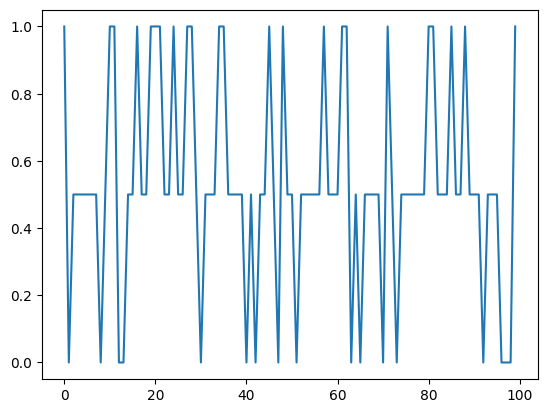

In [ ]:
import matplotlib.pyplot as plt
plt.plot(acc)
plt.show()

In [ ]:
average_acc = sum(acc) / len(acc)
print(f"The average of the values in acc is: {average_acc}")

The average of the values in acc is: 0.53
